In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [6]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [7]:
from exp_config import data_conf

## Prepare train, validation and test data

In [8]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 645.61it/s]
100%|██████████| 720/720 [00:07<00:00, 91.42it/s] 
8280it [00:00, 239413.46it/s]
7920it [00:00, 231695.56it/s]
710it [00:00, 816.68it/s]
100%|██████████| 710/710 [00:07<00:00, 97.15it/s] 
7920it [00:00, 236674.25it/s]
7560it [00:00, 229296.38it/s]
720it [00:00, 768.65it/s]
100%|██████████| 720/720 [00:07<00:00, 92.18it/s] 
8280it [00:00, 85576.95it/s]
720it [00:00, 808.73it/s]
100%|██████████| 720/720 [00:07<00:00, 95.51it/s] 
8280it [00:00, 235883.13it/s]
700it [00:00, 820.63it/s]
100%|██████████| 700/700 [00:07<00:00, 99.41it/s] 
8280it [00:00, 233530.83it/s]
509it [00:00, 1117.60it/s]
100%|██████████| 509/509 [00:02<00:00, 194.74it/s]
3664it [00:00, 234113.76it/s]
700it [00:00, 751.21it/s]
100%|██████████| 700/700 [00:07<00:00, 99.15it/s] 
8280it [00:00, 236636.94it/s]
700it [00:00, 835.87it/s]
100%|██████████| 700/700 [00:06<00:00, 100.76it/s]
8280it [00:00, 237714.07it/s]
710it [00:01, 379.21it/s]
100%|██████████| 710/710 [00:07<00:00, 96.90it/s] 
8280it 

In [9]:
len(data_train), len(data_val), len(data_test)

(16200, 15480, 11)

In [14]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [24]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [25]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [26]:
device = 'cuda:0'

In [27]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [28]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10047


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.027925
Epoch 1...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.025152


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.022451
Epoch 2...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.02204


100%|██████████| 484/484 [00:35<00:00, 13.58it/s]


Mean val loss: 0.020435


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.020762


100%|██████████| 484/484 [00:35<00:00, 13.60it/s]


Mean val loss: 0.020344


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.019687


100%|██████████| 484/484 [00:35<00:00, 13.58it/s]


Mean val loss: 0.019675


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.018958


100%|██████████| 484/484 [00:35<00:00, 13.62it/s]


Mean val loss: 0.018137


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.018395


100%|██████████| 484/484 [00:35<00:00, 13.59it/s]


Mean val loss: 0.017762


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.017979


100%|██████████| 484/484 [00:35<00:00, 13.60it/s]


Mean val loss: 0.01733


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.017544


100%|██████████| 484/484 [00:35<00:00, 13.59it/s]


Mean val loss: 0.017039


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.017255


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.017764
EarlyStopping counter: 1 out of 15
Epoch 10...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.017034


100%|██████████| 484/484 [00:35<00:00, 13.61it/s]


Mean val loss: 0.016647


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.016688


100%|██████████| 484/484 [00:35<00:00, 13.57it/s]


Mean val loss: 0.01626


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 12...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.016468


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.0163
EarlyStopping counter: 1 out of 15
Epoch 13...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.016262


100%|██████████| 484/484 [00:35<00:00, 13.58it/s]


Mean val loss: 0.015846


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.016307


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016547
EarlyStopping counter: 1 out of 15
Epoch 15...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.016046


100%|██████████| 484/484 [00:35<00:00, 13.61it/s]


Mean val loss: 0.015567


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 16...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015754


100%|██████████| 484/484 [00:35<00:00, 13.61it/s]


Mean val loss: 0.015509


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 17...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015625


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016017
EarlyStopping counter: 1 out of 15
Epoch 18...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015524


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015636
EarlyStopping counter: 2 out of 15
Epoch 19...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015453


100%|██████████| 484/484 [00:35<00:00, 13.64it/s]


Mean val loss: 0.015117


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015306


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01544
EarlyStopping counter: 1 out of 15
Epoch 21...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015198


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016047
EarlyStopping counter: 2 out of 15
Epoch 22...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015166


100%|██████████| 484/484 [00:35<00:00, 13.60it/s]


Mean val loss: 0.015051


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 23...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015037


100%|██████████| 484/484 [00:35<00:00, 13.61it/s]


Mean val loss: 0.014902


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 24...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014912


100%|██████████| 484/484 [00:35<00:00, 13.59it/s]


Mean val loss: 0.014738


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 25...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014886


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015552
EarlyStopping counter: 1 out of 15
Epoch 26...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014837


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01528
EarlyStopping counter: 2 out of 15
Epoch 27...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014695


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014962
EarlyStopping counter: 3 out of 15
Epoch 28...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014656


100%|██████████| 484/484 [00:35<00:00, 13.62it/s]


Mean val loss: 0.014633


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 29...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014479


100%|██████████| 484/484 [00:35<00:00, 13.58it/s]


Mean val loss: 0.014441


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 30...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014467


100%|██████████| 484/484 [00:35<00:00, 13.64it/s]


Mean val loss: 0.014415


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 31...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014293


100%|██████████| 484/484 [00:35<00:00, 13.64it/s]


Mean val loss: 0.014278


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 32...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014186


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014281
EarlyStopping counter: 1 out of 15
Epoch 33...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014103


100%|██████████| 484/484 [00:35<00:00, 13.62it/s]


Mean val loss: 0.014227


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 34...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014008


100%|██████████| 484/484 [00:35<00:00, 13.61it/s]


Mean val loss: 0.014226


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 35...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.013804


100%|██████████| 484/484 [00:35<00:00, 13.62it/s]


Mean val loss: 0.014223


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 36...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.013605


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014898
EarlyStopping counter: 1 out of 15
Epoch 37...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.013365


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01443
EarlyStopping counter: 2 out of 15
Epoch 38...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.013129


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.0145
EarlyStopping counter: 3 out of 15
Epoch 39...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.012852


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015478
EarlyStopping counter: 4 out of 15
Epoch 40...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.012502


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015184
EarlyStopping counter: 5 out of 15
Epoch 41...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.012137


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01489
EarlyStopping counter: 6 out of 15
Epoch 42...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.011788


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015277
EarlyStopping counter: 7 out of 15
Epoch 43...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.011419


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015744
EarlyStopping counter: 8 out of 15
Epoch 44...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.010983


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015721
EarlyStopping counter: 9 out of 15
Epoch 45...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.010499


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015955
EarlyStopping counter: 10 out of 15
Epoch 46...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.010071


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016201
EarlyStopping counter: 11 out of 15
Epoch 47...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.0096415


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016825
EarlyStopping counter: 12 out of 15
Epoch 48...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.0091828


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016998
EarlyStopping counter: 13 out of 15
Epoch 49...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.0087122


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.017038
EarlyStopping counter: 14 out of 15
Epoch 50...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.0082935


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.017645
EarlyStopping counter: 15 out of 15


100%|██████████| 259/259 [03:16<00:00,  1.32it/s]


## Dump experiment results

In [11]:
import pickle
import json

In [16]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [12]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [13]:
# import torch
# model.load_state_dict(torch.load('./{}_exp_model.torch'.format(data_conf['conf_name'])))

## Train and validation losses

In [29]:
from itertools import chain

In [30]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [31]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

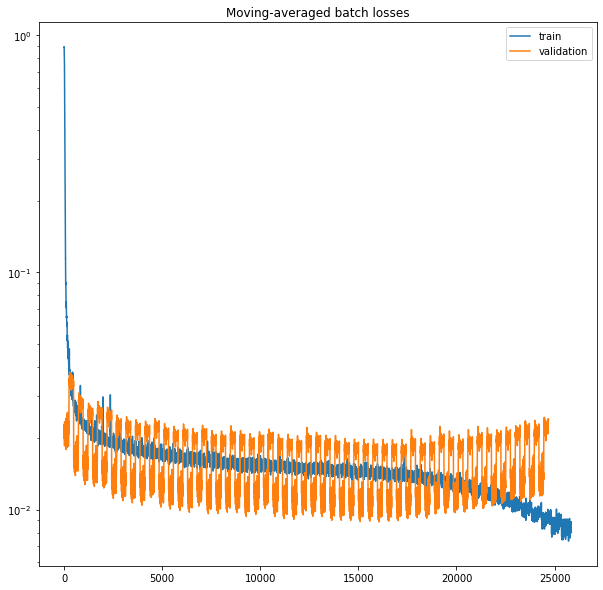

In [32]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [33]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

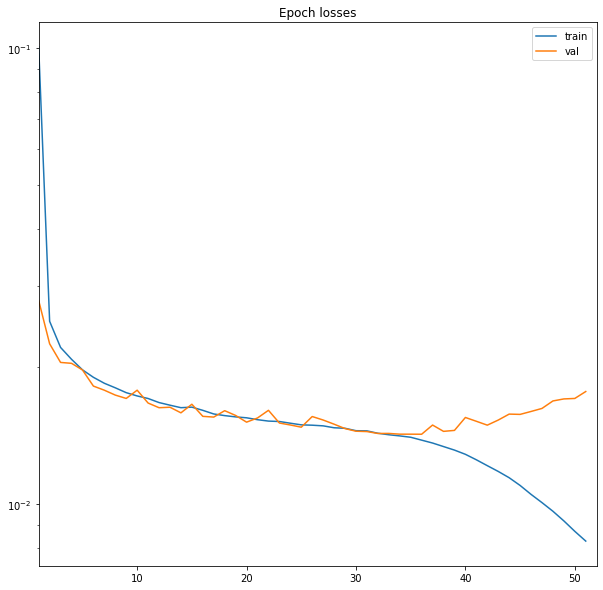

In [34]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [35]:
import os

In [36]:
import torch

In [41]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [39]:
threshold = 0.5
to_plot = 10

Prediction for carb96558:


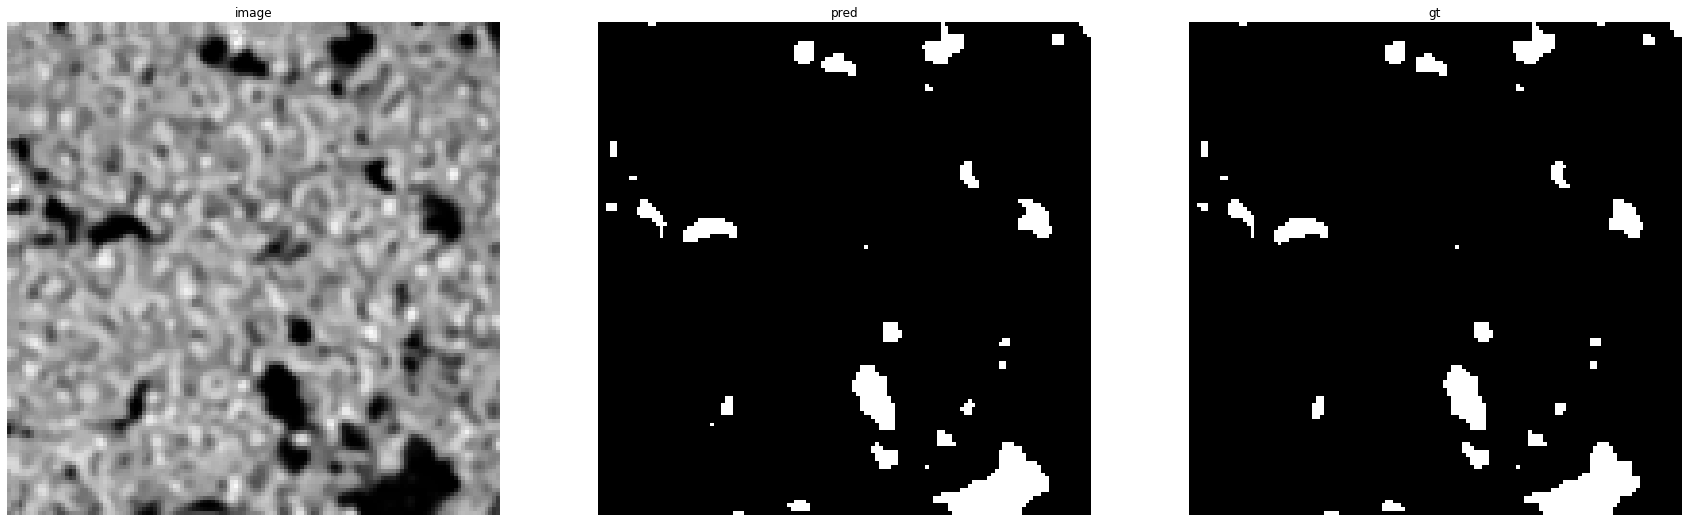

accuracy    : 0.99664306640625
precision   : 0.9651162790697675
recall      : 0.9707602339181286
f1          : 0.967930029154519
pr_auc      : 0.9972134855375685
iou         : 0.9378531073446328


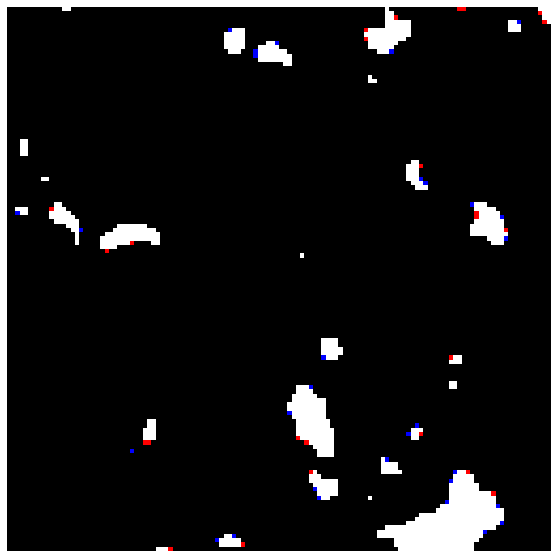

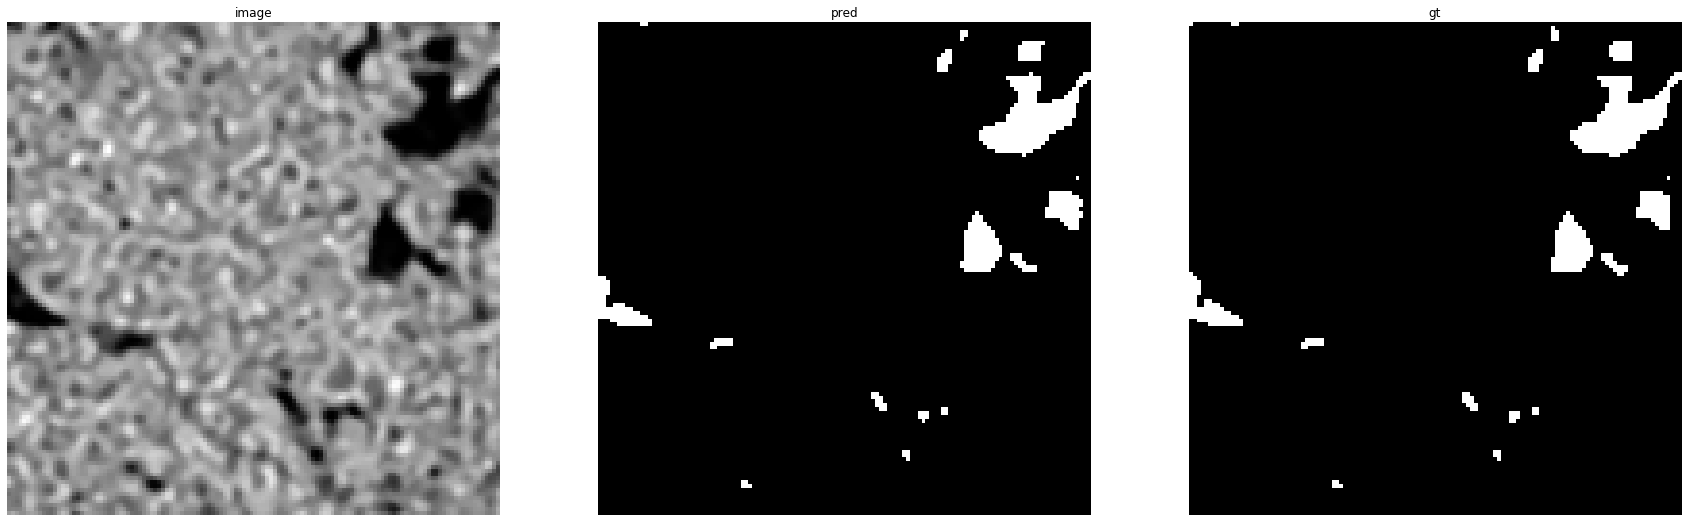

accuracy    : 0.99810791015625
precision   : 0.9853587115666179
recall      : 0.9697406340057637
f1          : 0.9774872912127816
pr_auc      : 0.9987368982619967
iou         : 0.9559659090909091


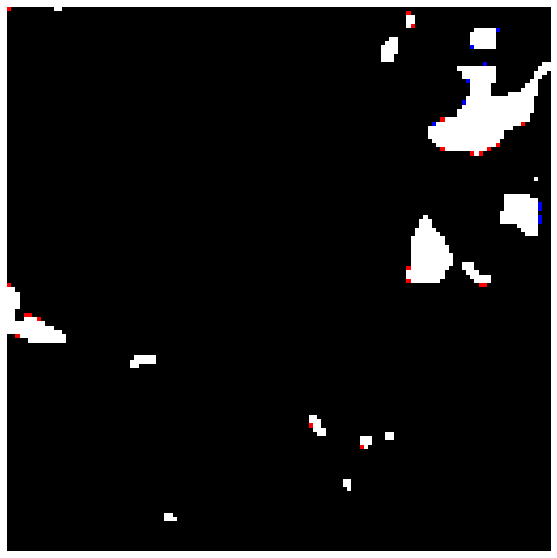

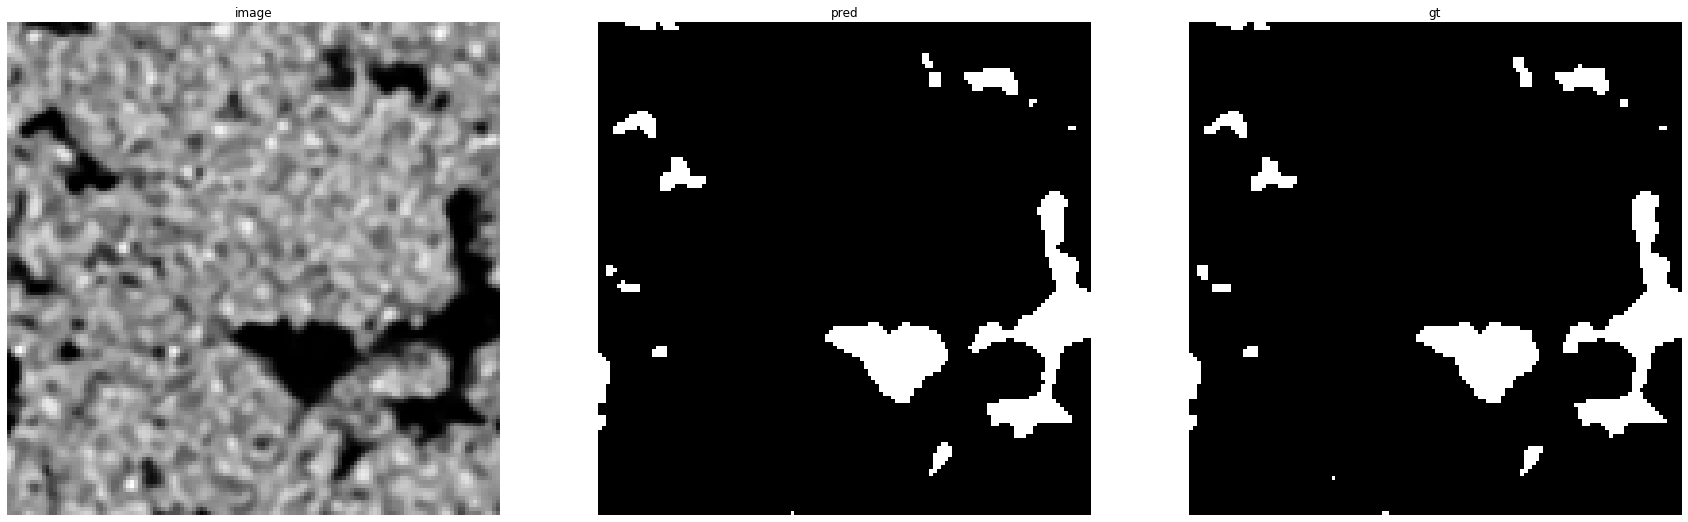

accuracy    : 0.995849609375
precision   : 0.9727479182437547
recall      : 0.9757023538344722
f1          : 0.9742228961334344
pr_auc      : 0.9982496569699355
iou         : 0.9497413155949741


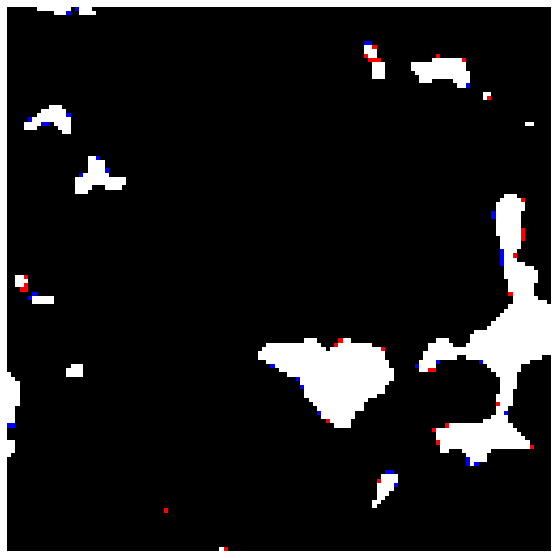

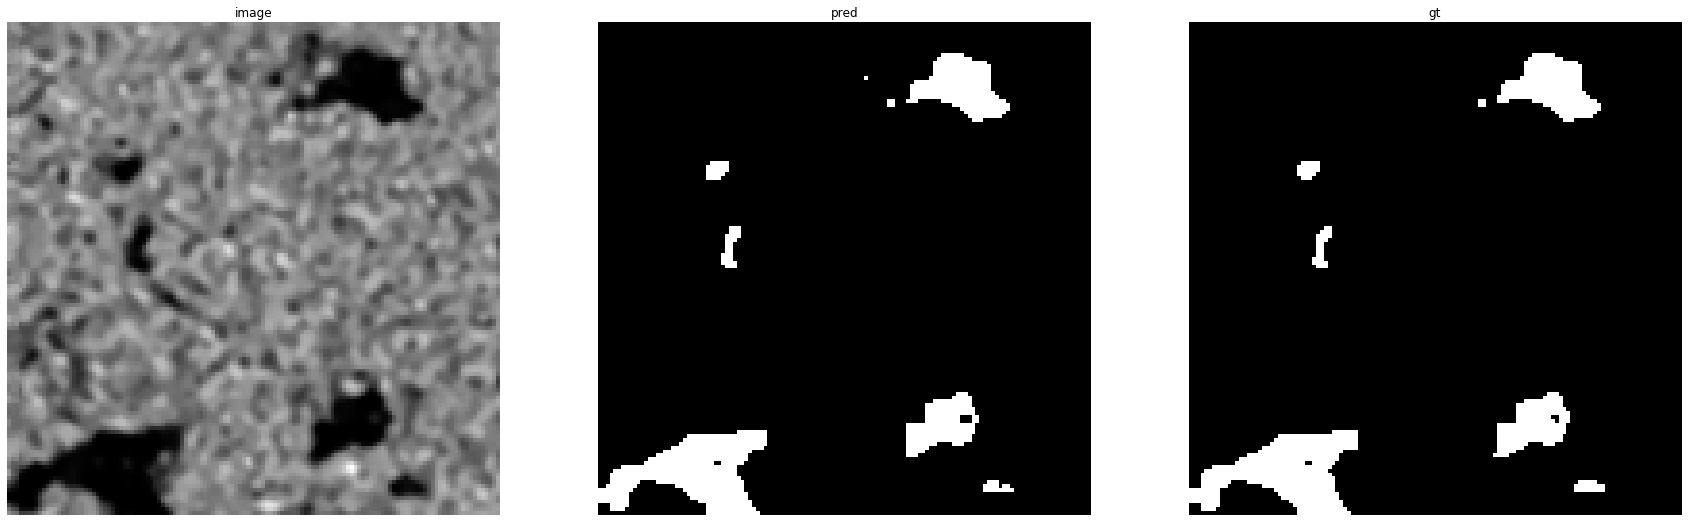

accuracy    : 0.99847412109375
precision   : 0.992467043314501
recall      : 0.9841269841269841
f1          : 0.9882794186591655
pr_auc      : 0.999547962329276
iou         : 0.9768303985171455


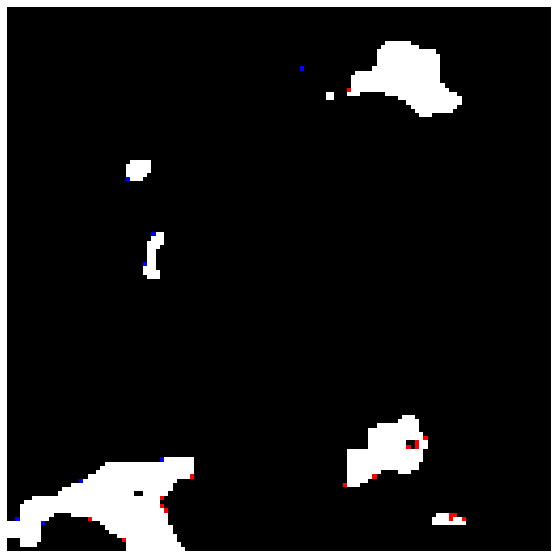

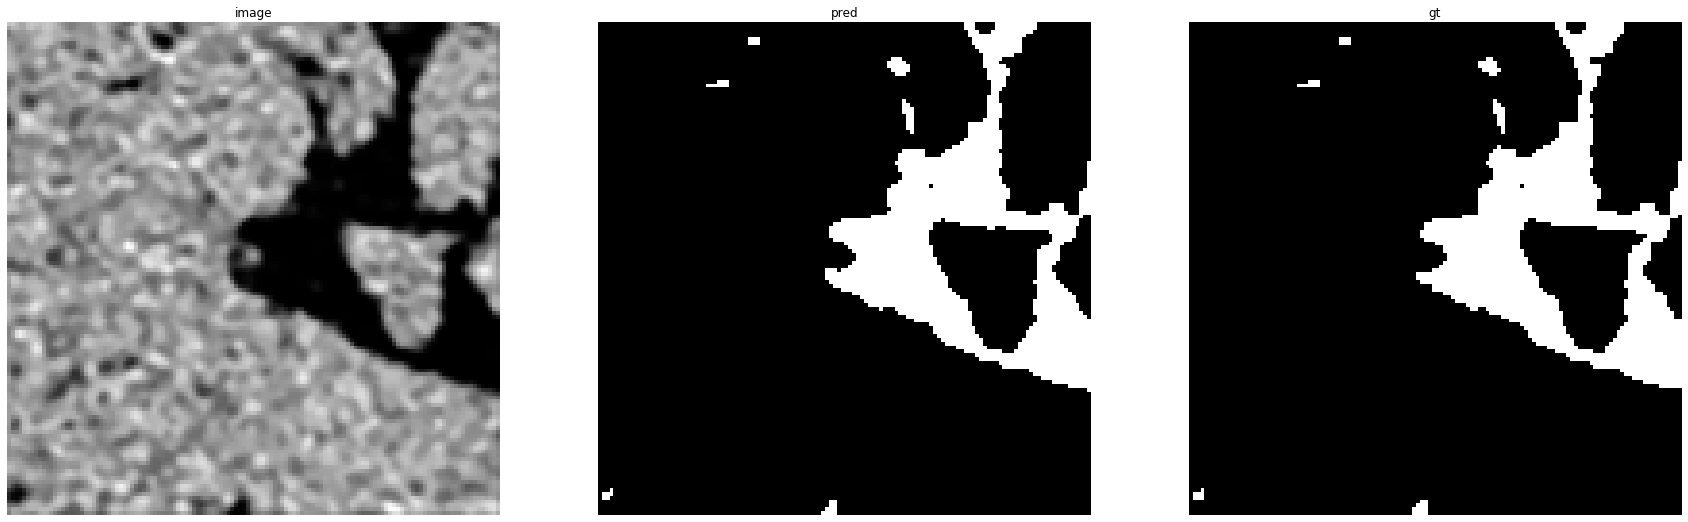

accuracy    : 0.99664306640625
precision   : 0.9838709677419355
recall      : 0.9914221218961625
f1          : 0.9876321115358668
pr_auc      : 0.9995671991306719
iou         : 0.9755664149266993


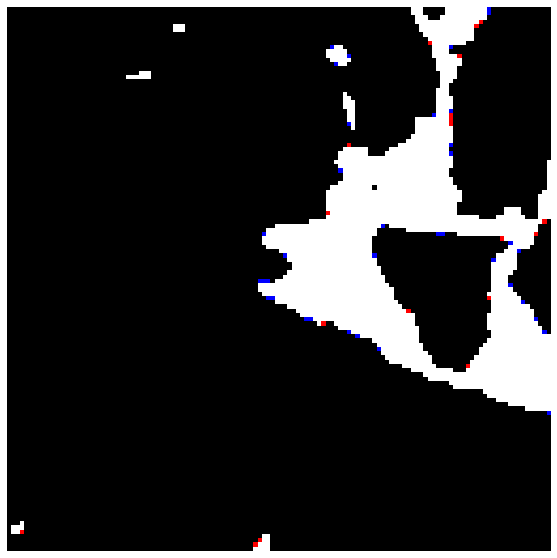

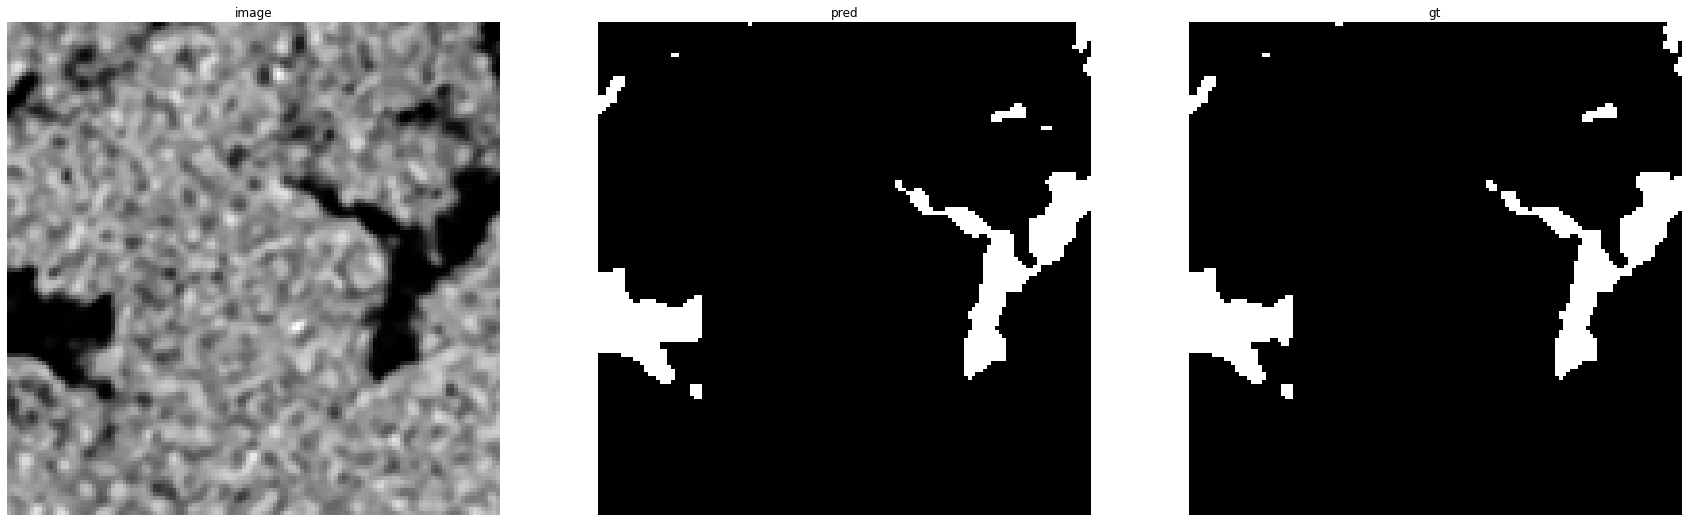

accuracy    : 0.9971923828125
precision   : 0.982011447260834
recall      : 0.9804081632653061
f1          : 0.9812091503267975
pr_auc      : 0.9991019327482837
iou         : 0.9631114675220529


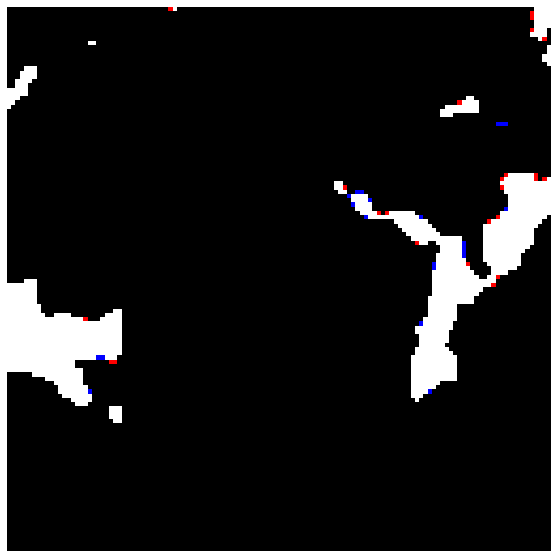

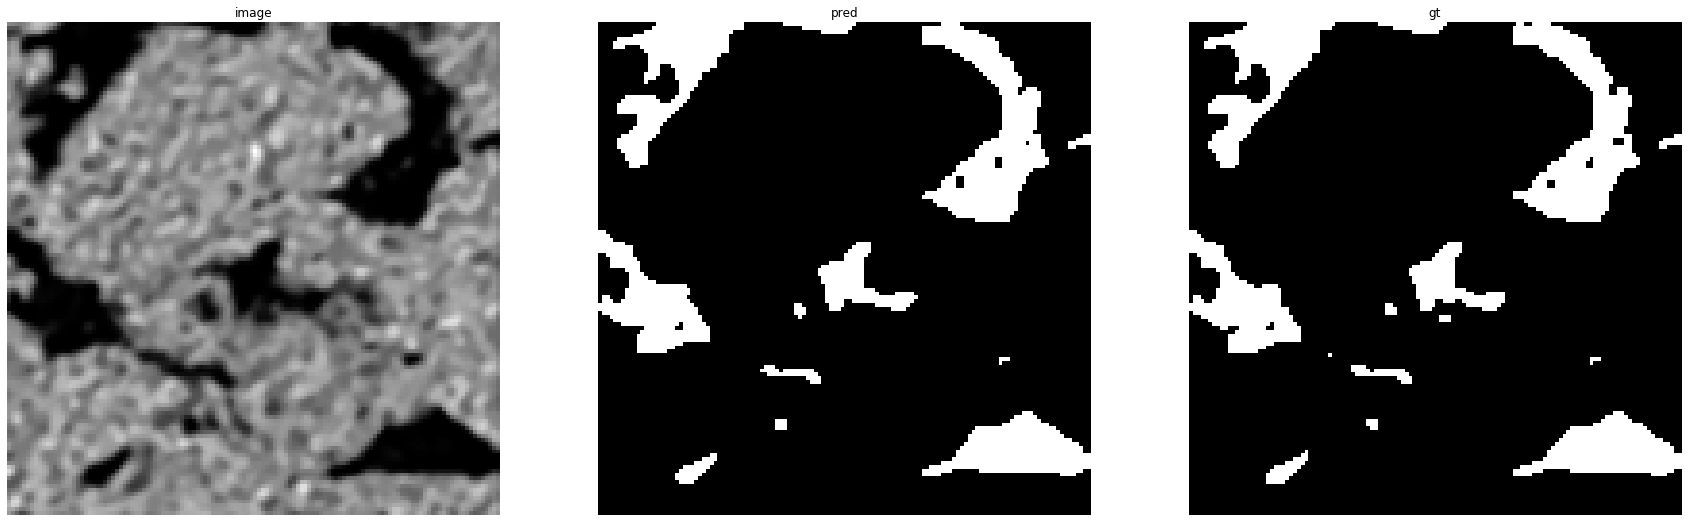

accuracy    : 0.995849609375
precision   : 0.9859038142620232
recall      : 0.9859038142620232
f1          : 0.9859038142620232
pr_auc      : 0.9992026474111125
iou         : 0.9721995094031071


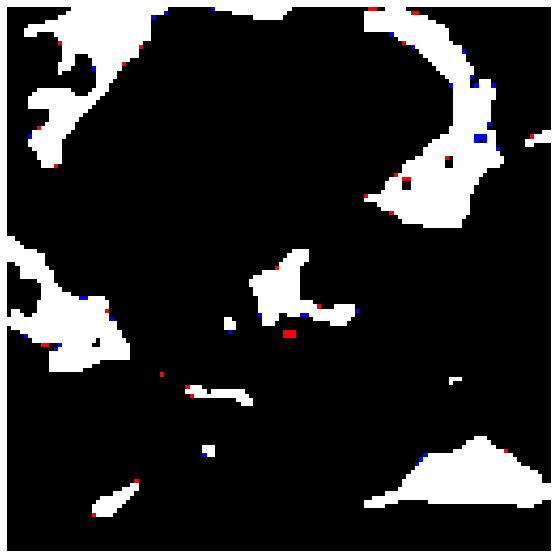

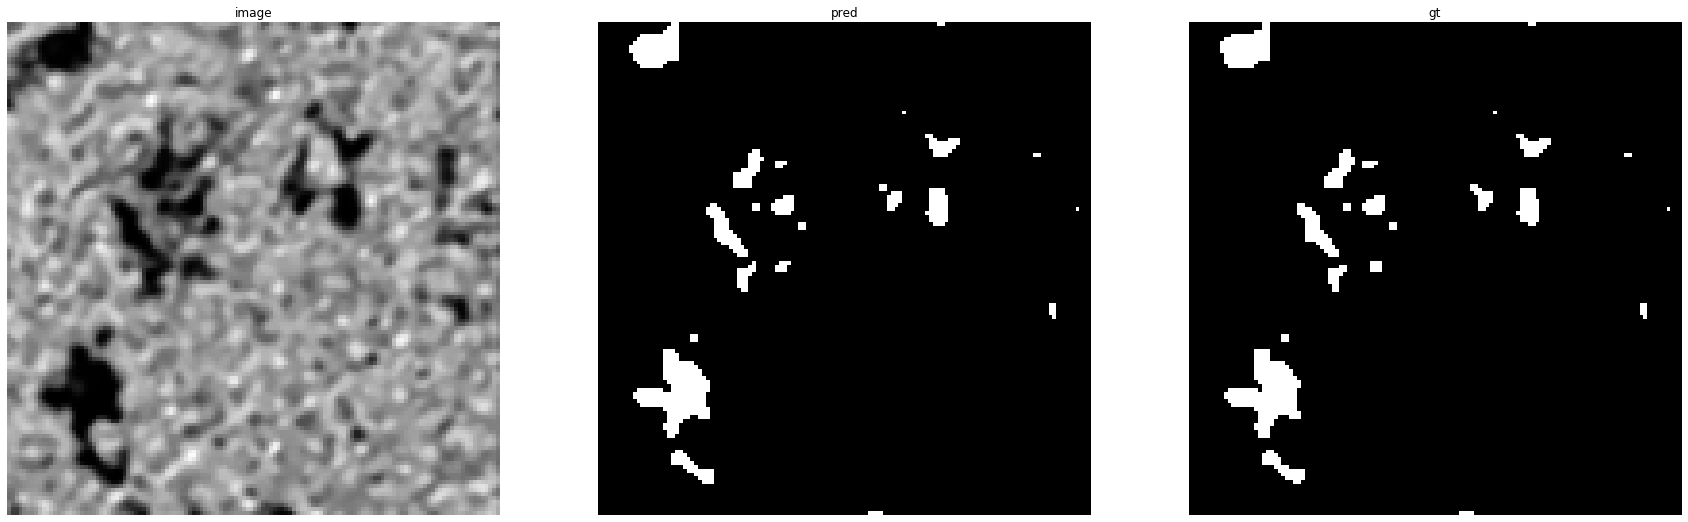

accuracy    : 0.997802734375
precision   : 0.9770642201834863
recall      : 0.9681818181818181
f1          : 0.9726027397260274
pr_auc      : 0.9974833437417159
iou         : 0.9466666666666667


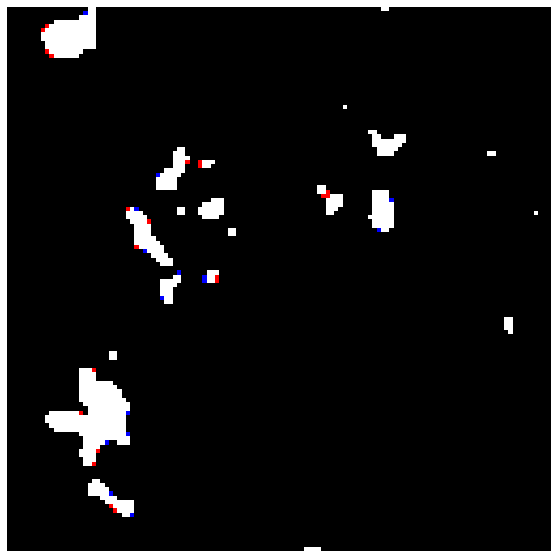

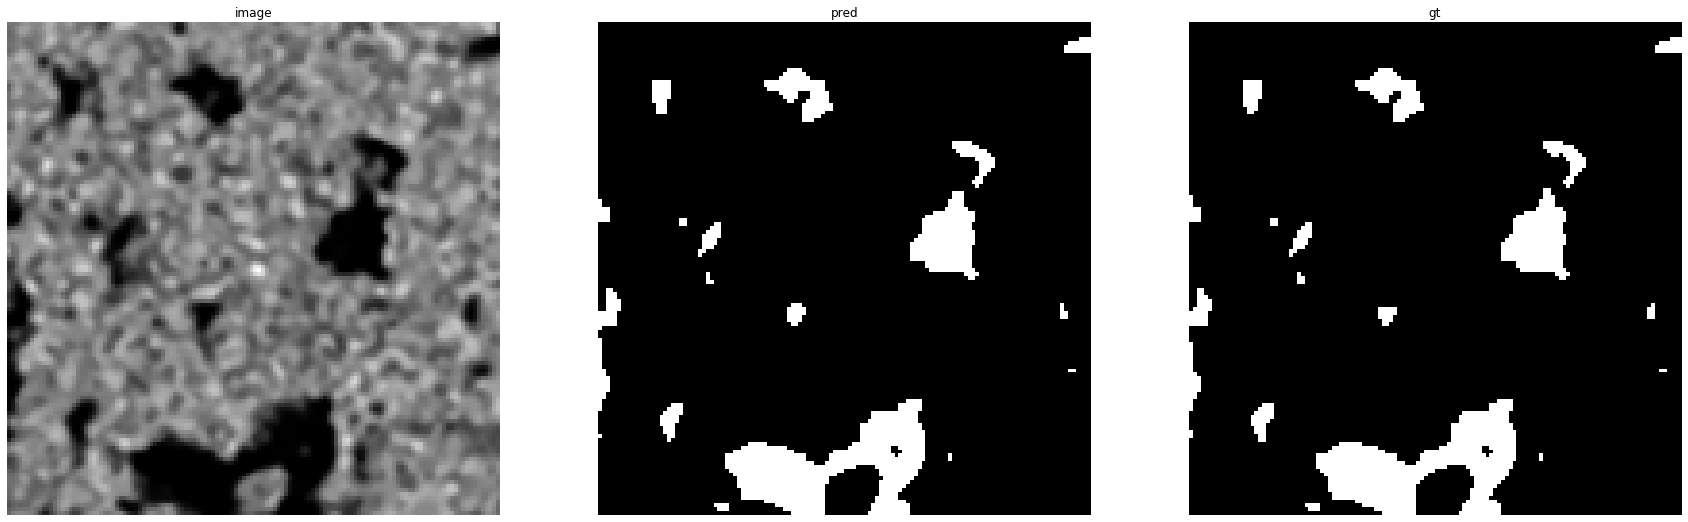

accuracy    : 0.99737548828125
precision   : 0.985406532314107
recall      : 0.9847222222222223
f1          : 0.9850642584230636
pr_auc      : 0.9991077167375942
iou         : 0.9705681040383299


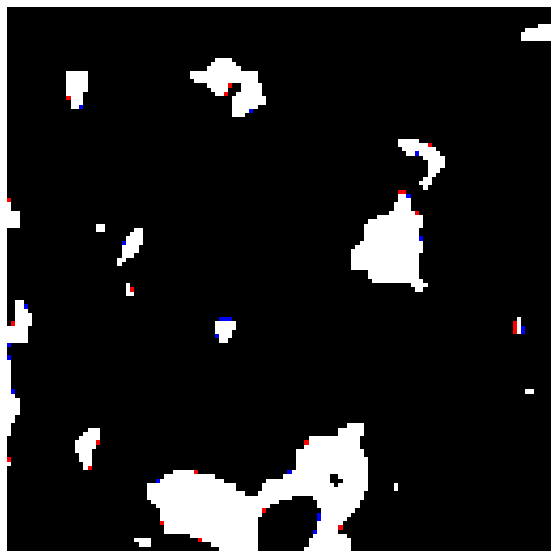

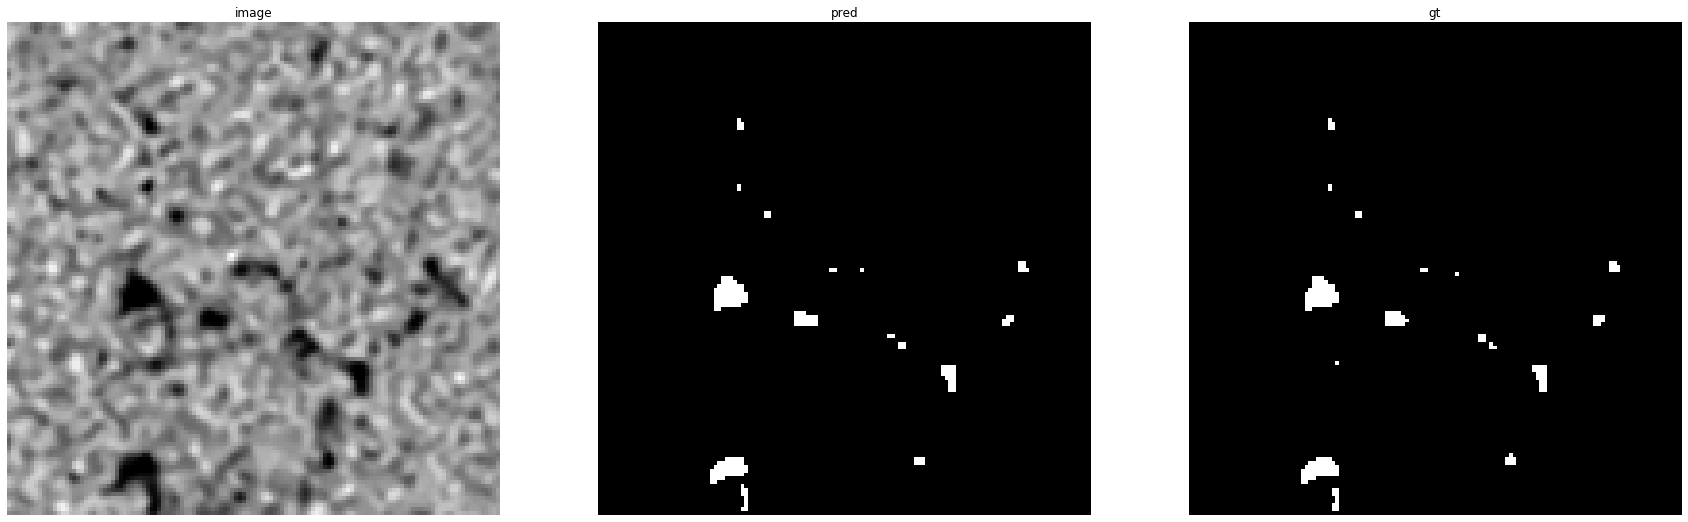

accuracy    : 0.99884033203125
precision   : 0.9540816326530612
recall      : 0.949238578680203
f1          : 0.9516539440203563
pr_auc      : 0.9921412355759207
iou         : 0.9077669902912622


Prediction for carb71:


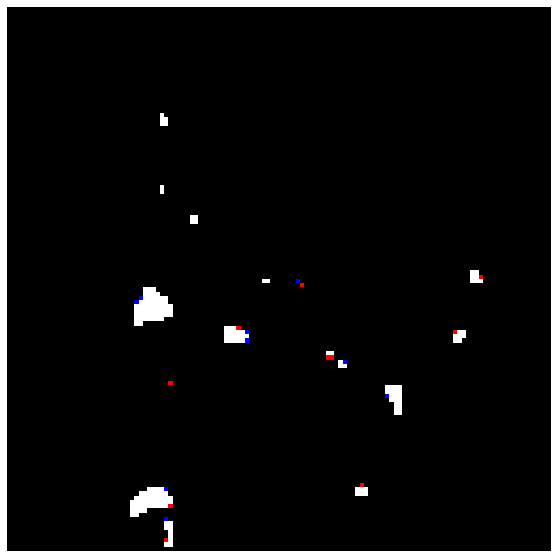

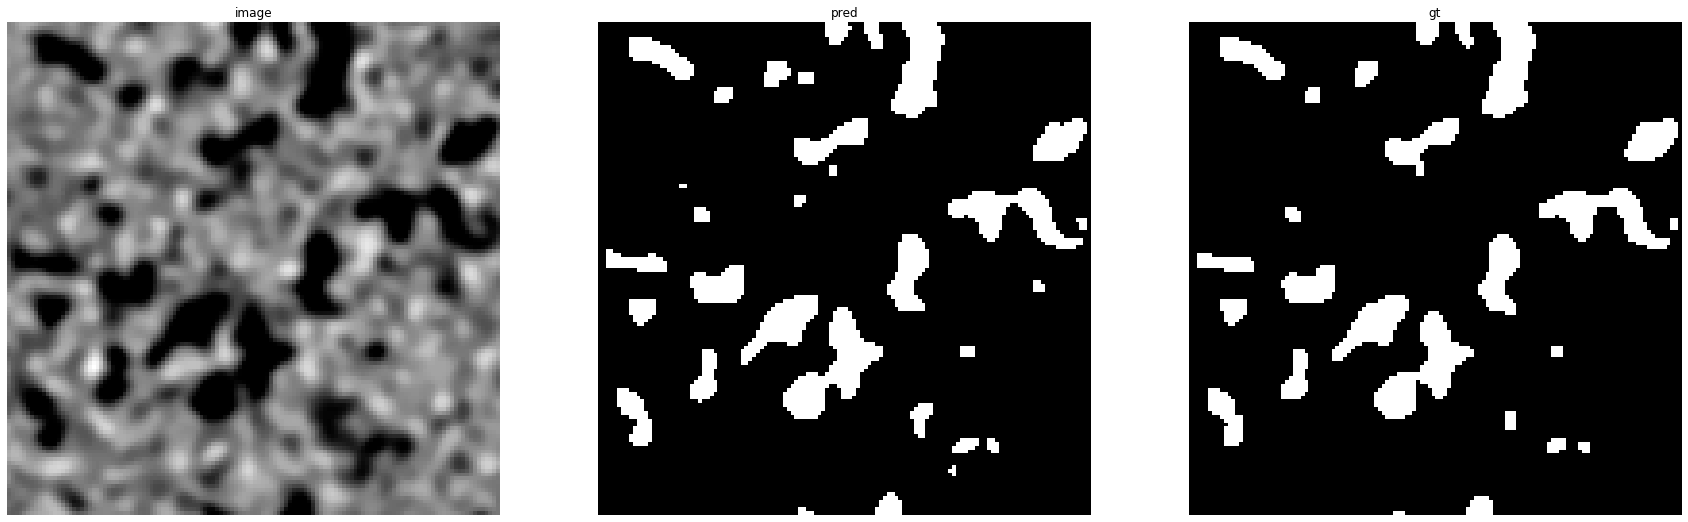

accuracy    : 0.9891357421875
precision   : 0.9300941993058999
recall      : 0.9806586513329848
f1          : 0.9547073791348601
pr_auc      : 0.9933296292229284
iou         : 0.9133398247322297


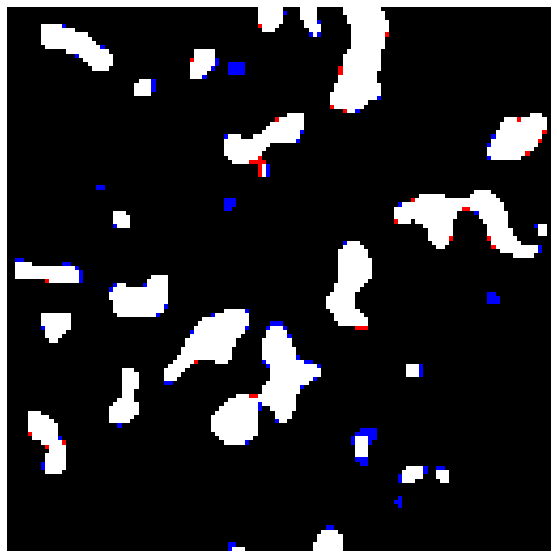

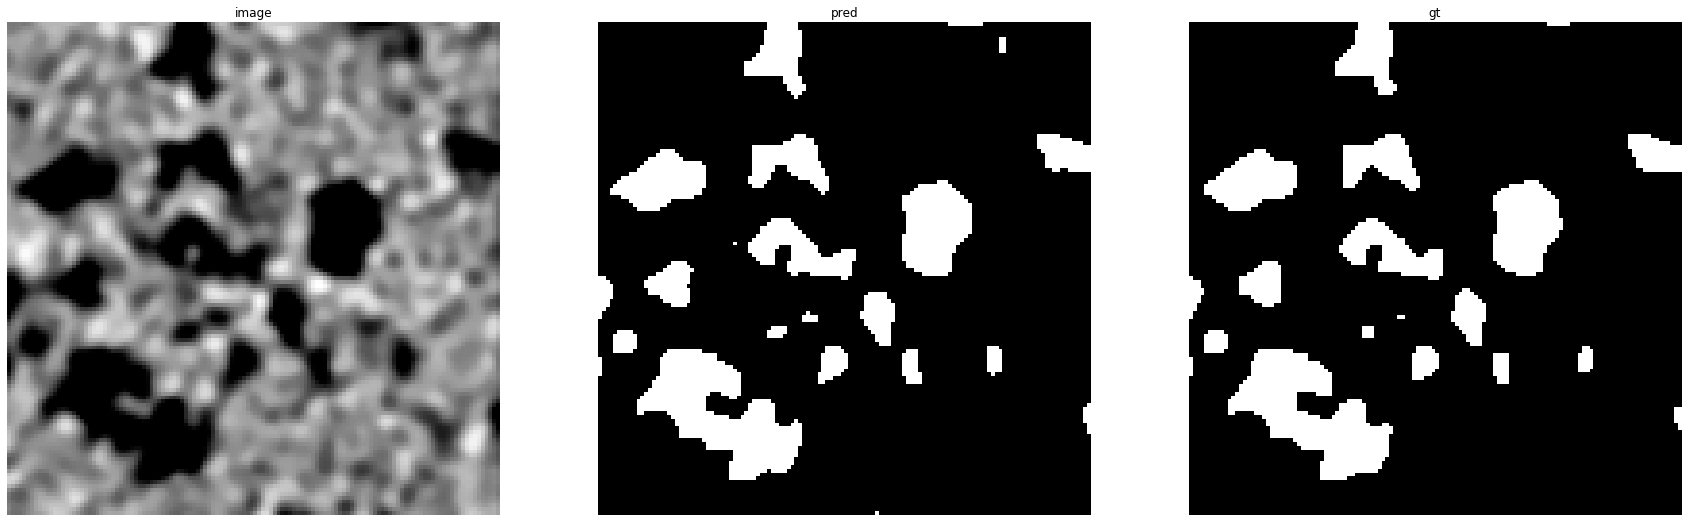

accuracy    : 0.992431640625
precision   : 0.9626743232157506
recall      : 0.9861344537815127
f1          : 0.9742631797426318
pr_auc      : 0.9976403622263492
iou         : 0.9498178874949413


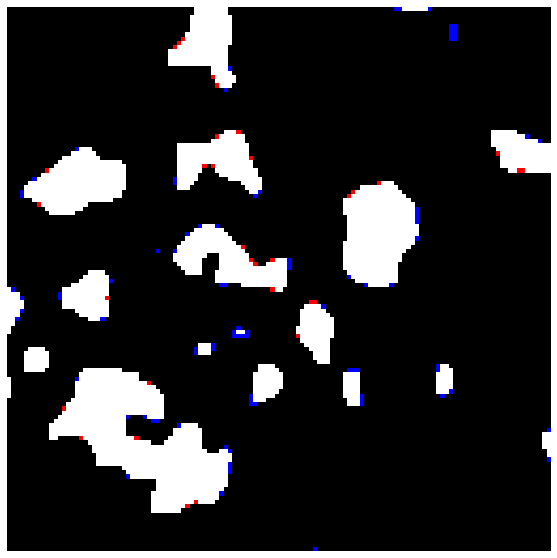

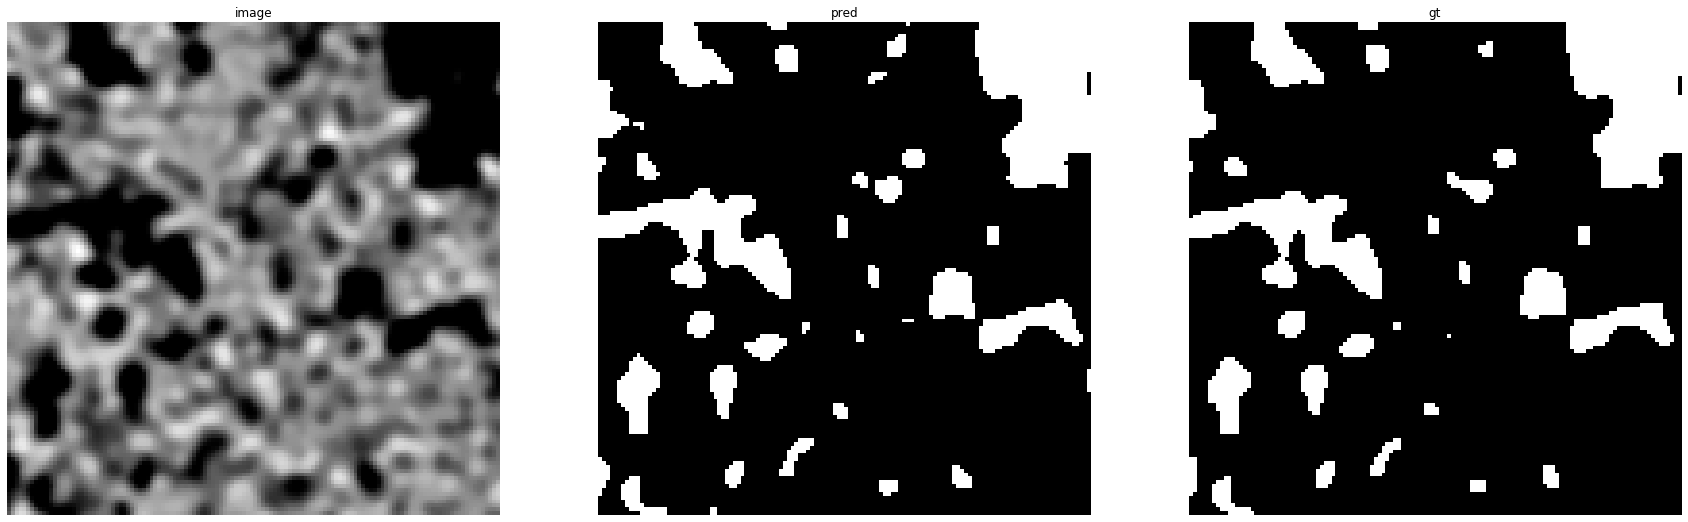

accuracy    : 0.98809814453125
precision   : 0.953168044077135
recall      : 0.9791298195967457
f1          : 0.9659745245157914
pr_auc      : 0.9963556925073708
iou         : 0.934188322645967


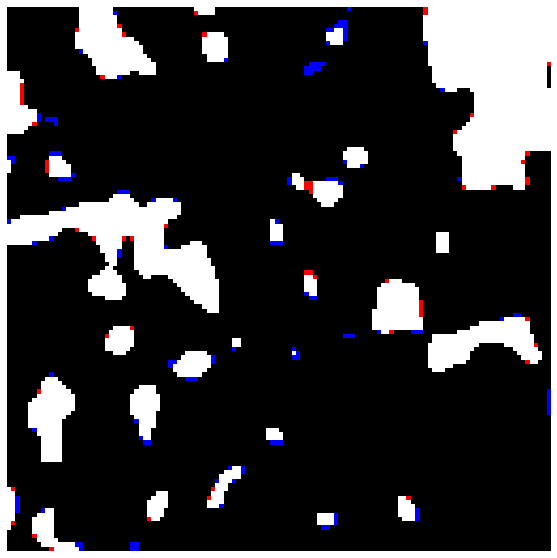

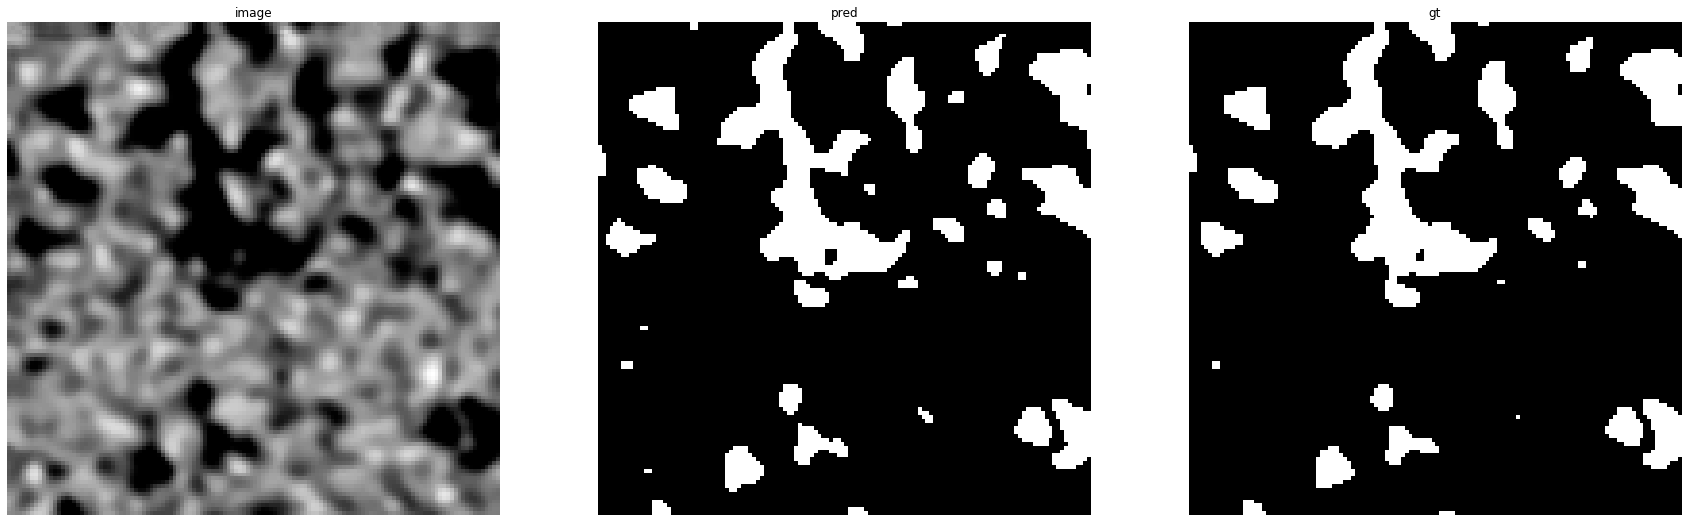

accuracy    : 0.9862060546875
precision   : 0.9322816467872258
recall      : 0.9797816417306915
f1          : 0.9554416403785488
pr_auc      : 0.994645061030743
iou         : 0.9146847867119667


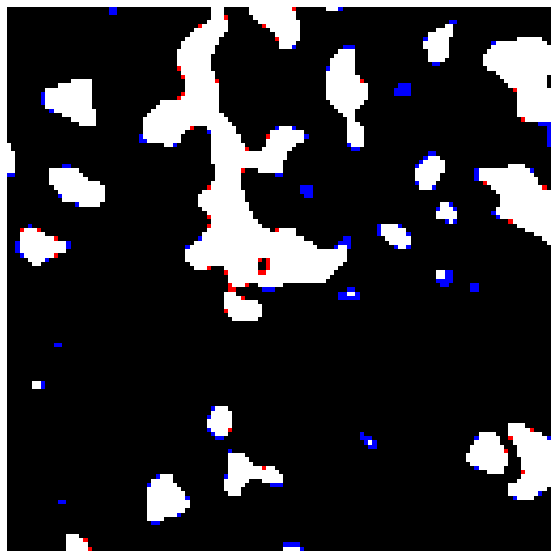

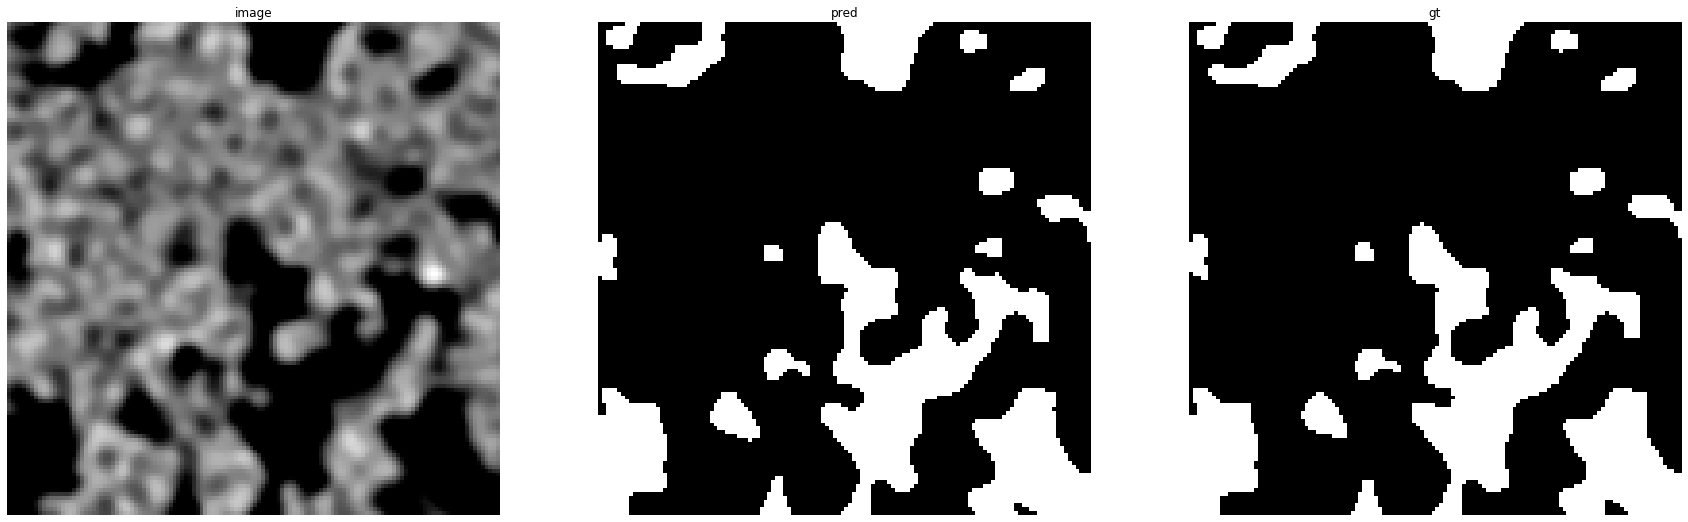

accuracy    : 0.99200439453125
precision   : 0.9789639758085722
recall      : 0.9864864864864865
f1          : 0.9827108354229906
pr_auc      : 0.9989976189333081
iou         : 0.9660093409444733


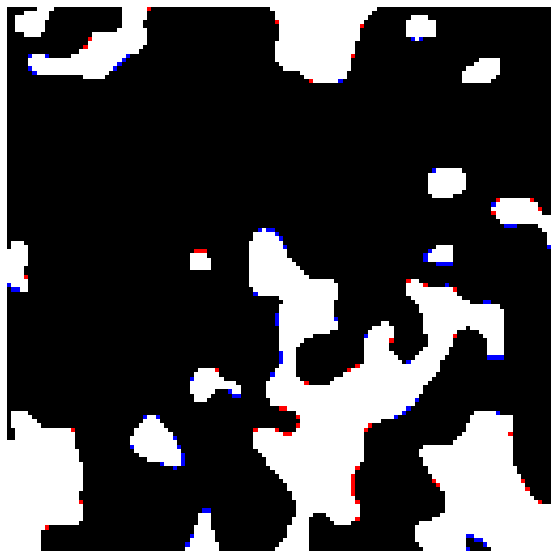

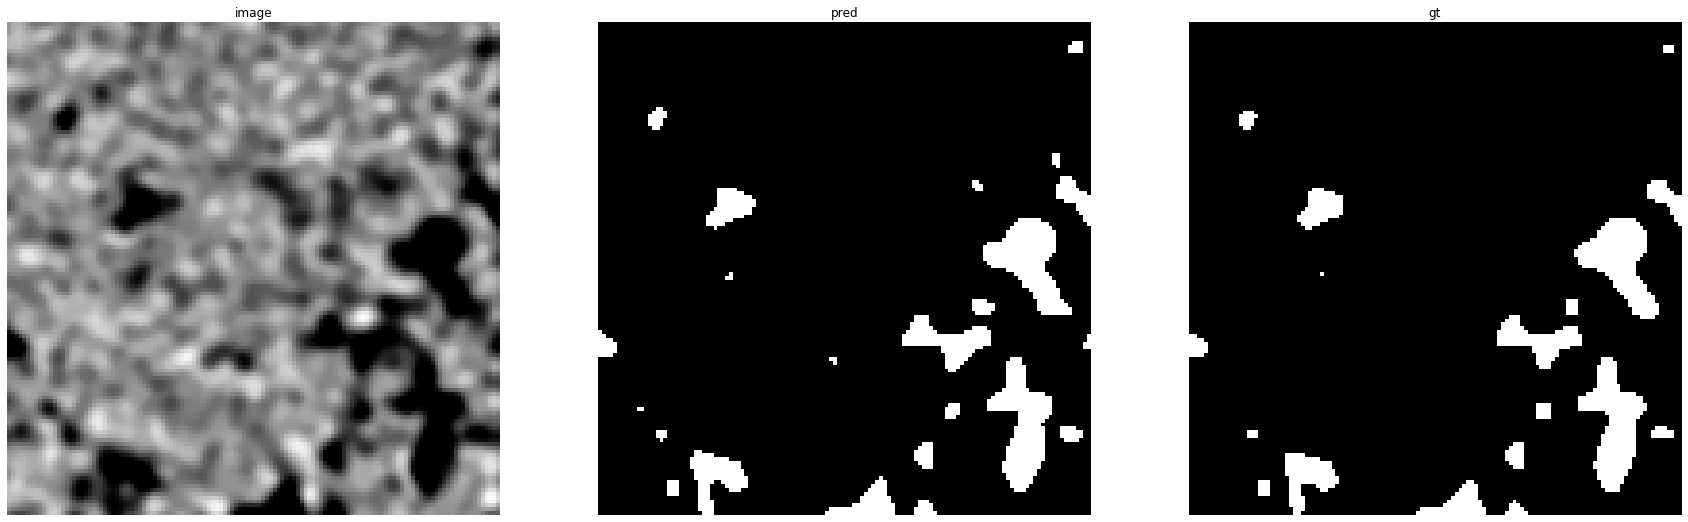

accuracy    : 0.99188232421875
precision   : 0.9186676994577847
recall      : 0.9769357495881383
f1          : 0.9469061876247504
pr_auc      : 0.9924032869950515
iou         : 0.8991660348749052


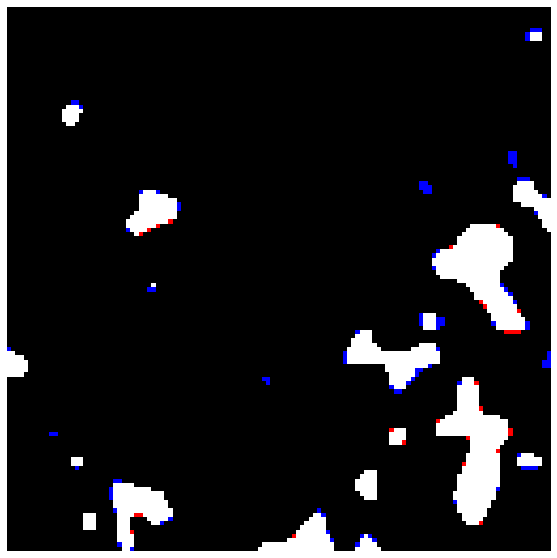

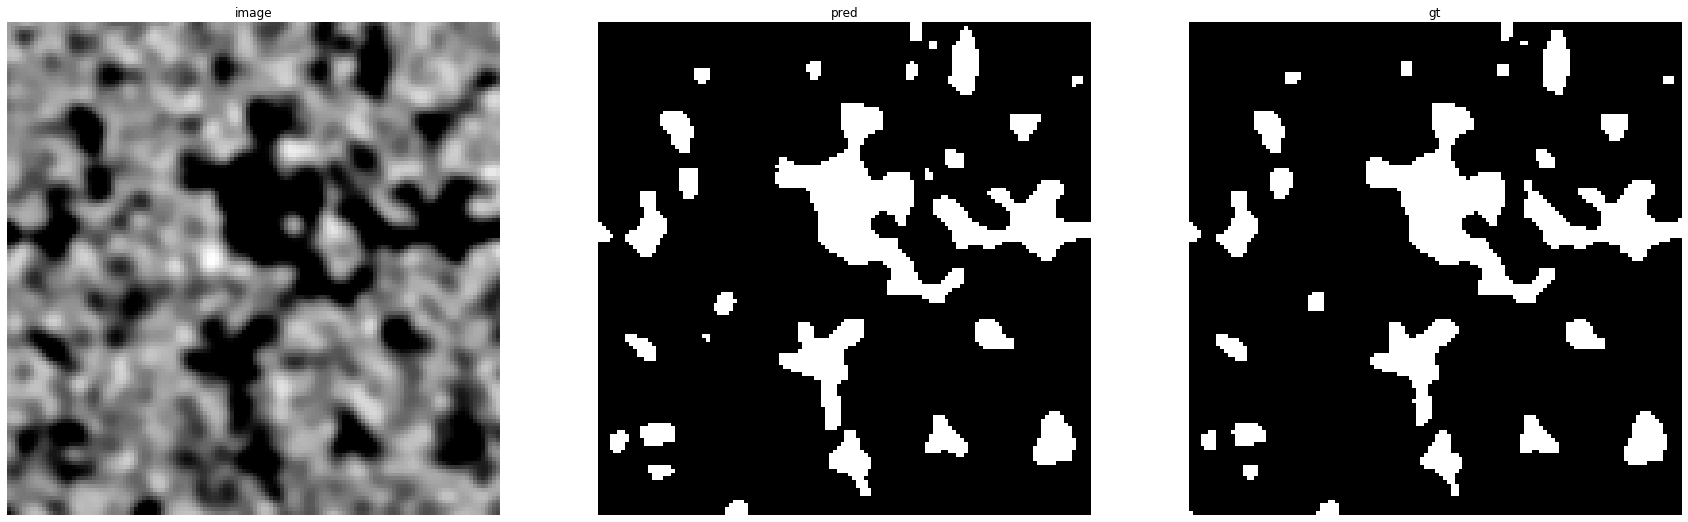

accuracy    : 0.98968505859375
precision   : 0.9559902200488998
recall      : 0.9746572496884088
f1          : 0.965233491051224
pr_auc      : 0.9960008806259815
iou         : 0.932803180914513


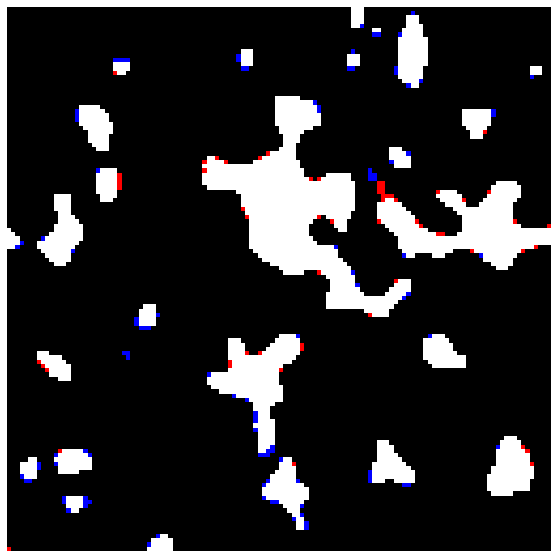

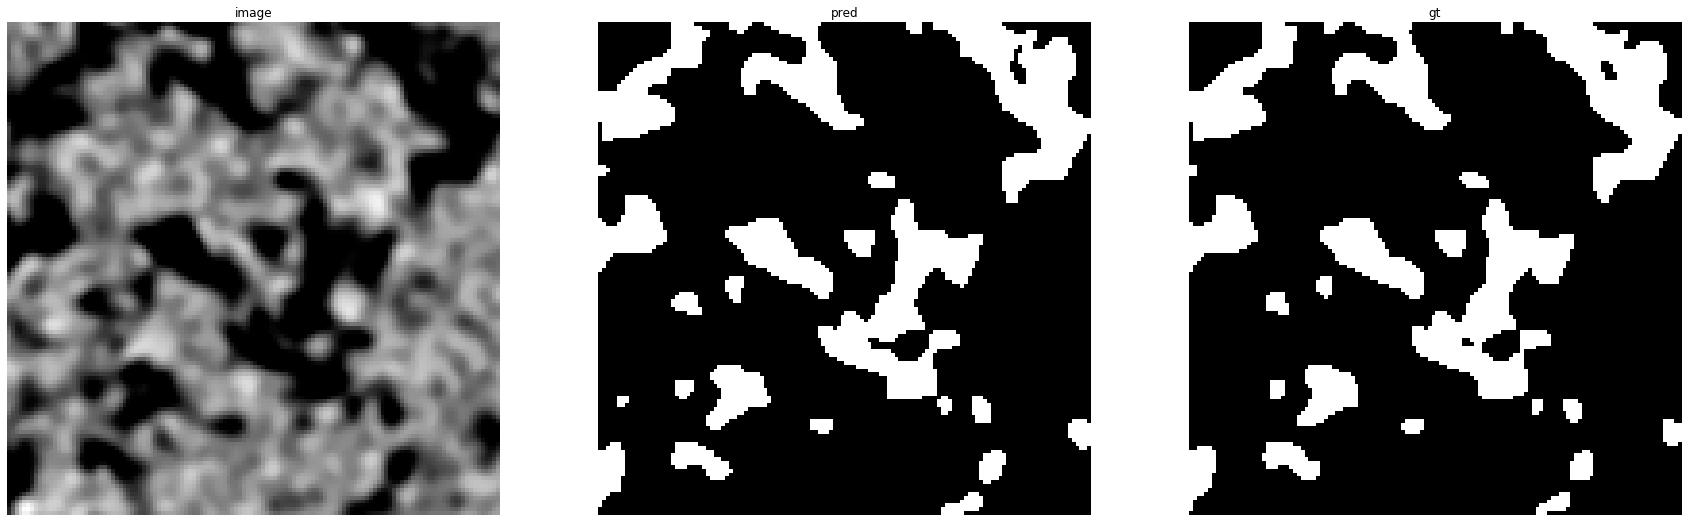

accuracy    : 0.98602294921875
precision   : 0.9661495063469676
recall      : 0.9691567628749292
f1          : 0.9676507981353298
pr_auc      : 0.9967607595818199
iou         : 0.9373289545703338


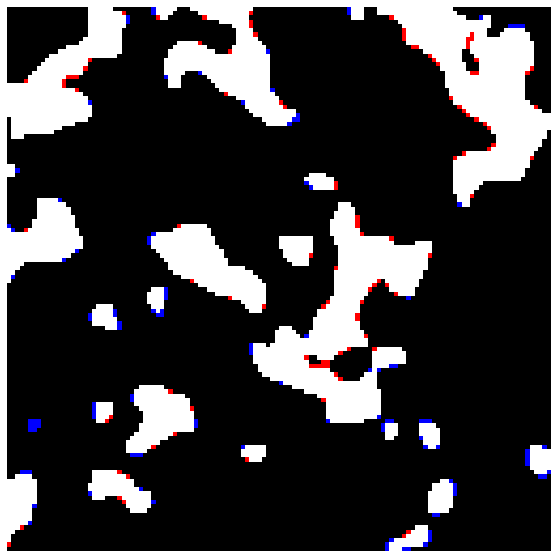

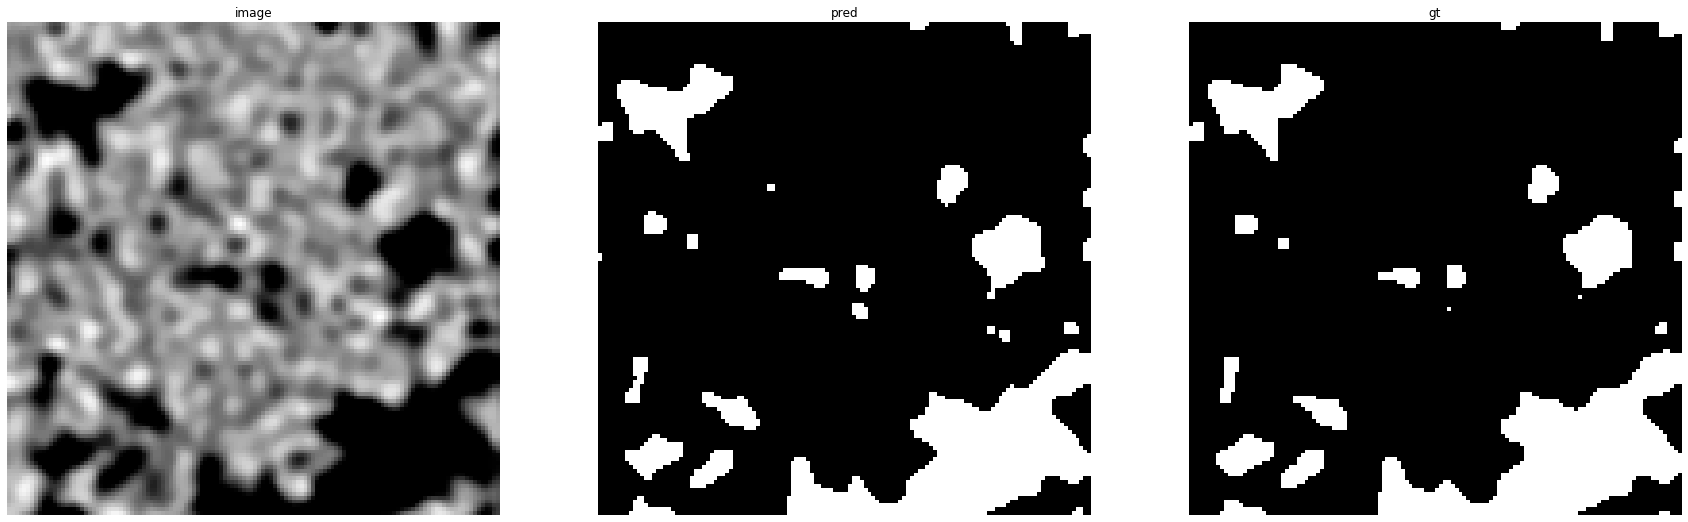

accuracy    : 0.9903564453125
precision   : 0.9594694178334562
recall      : 0.9819004524886877
f1          : 0.9705553484904956
pr_auc      : 0.9971077019984158
iou         : 0.942795076031861


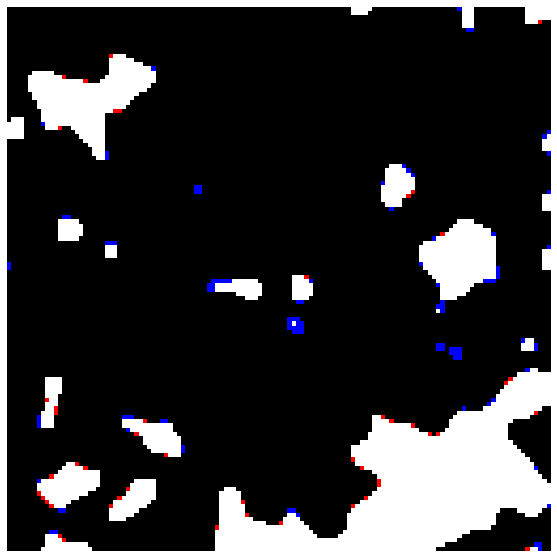

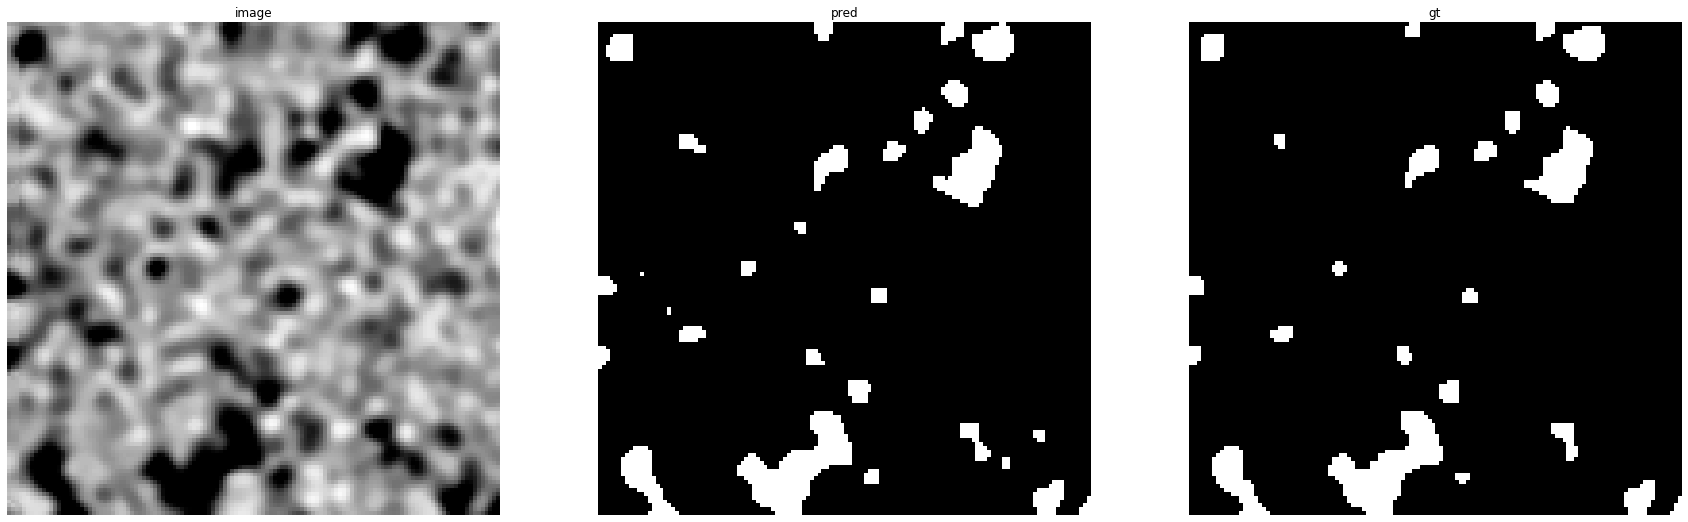

accuracy    : 0.99102783203125
precision   : 0.906369915579432
recall      : 0.9792703150912107
f1          : 0.9414109206855322
pr_auc      : 0.989287740281478
iou         : 0.8893072289156626


Prediction for carbRNF:


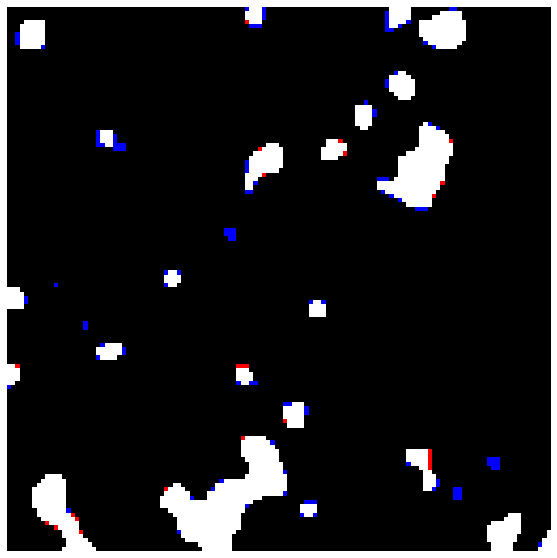

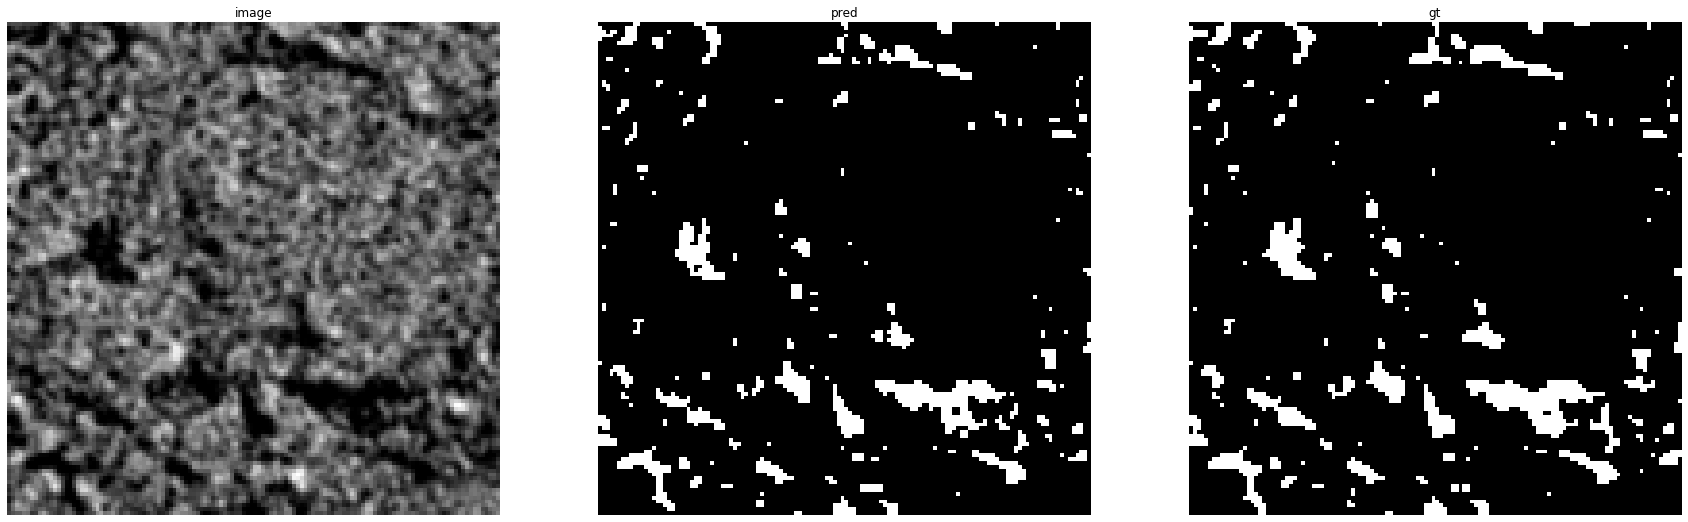

accuracy    : 0.98504638671875
precision   : 0.9772905246671887
recall      : 0.8524590163934426
f1          : 0.9106165632980664
pr_auc      : 0.9868137069735832
iou         : 0.8359008707300737


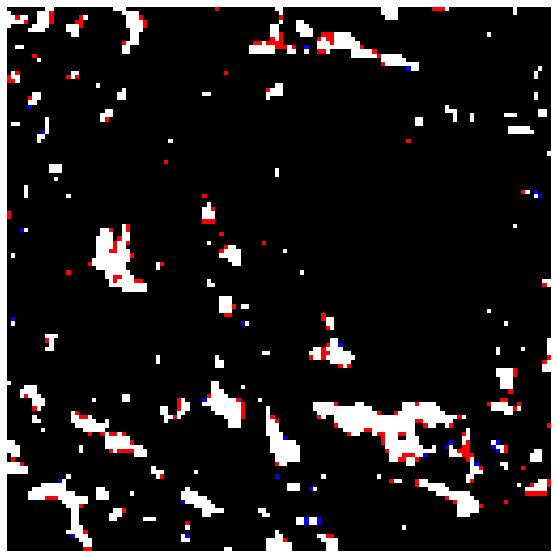

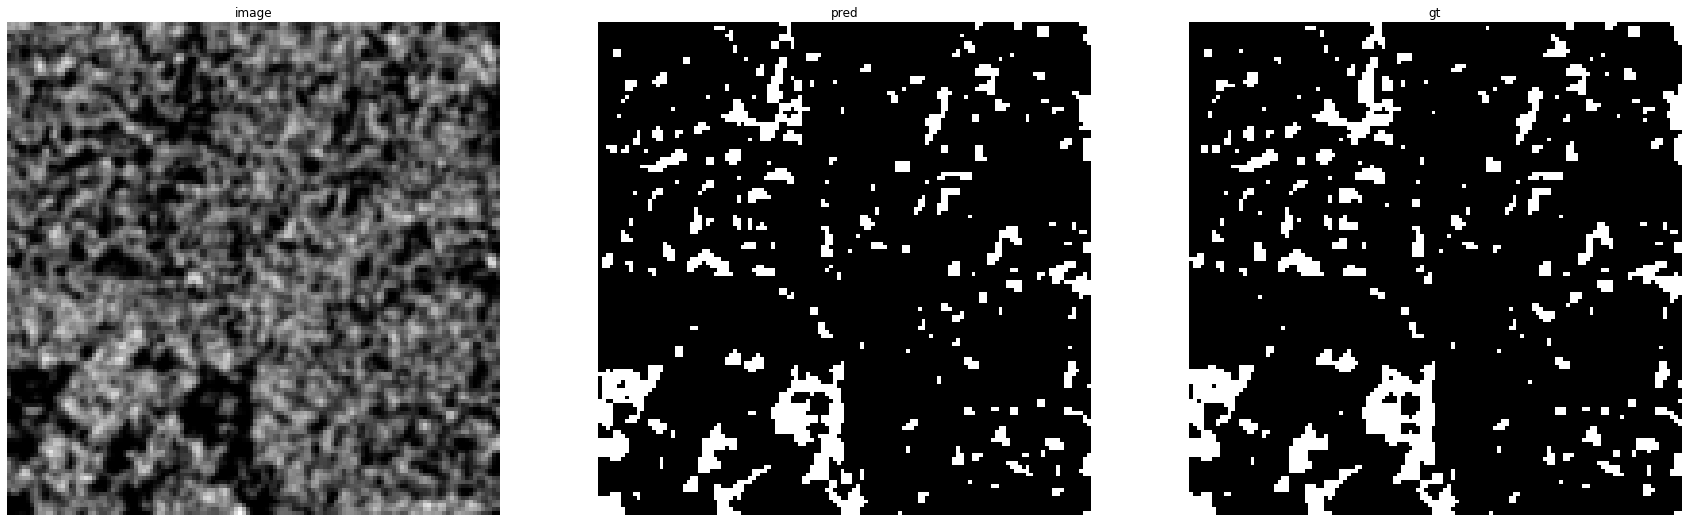

accuracy    : 0.981689453125
precision   : 0.9800942902042954
recall      : 0.8771683075480544
f1          : 0.925779317169718
pr_auc      : 0.9891050882627036
iou         : 0.8618148318747121


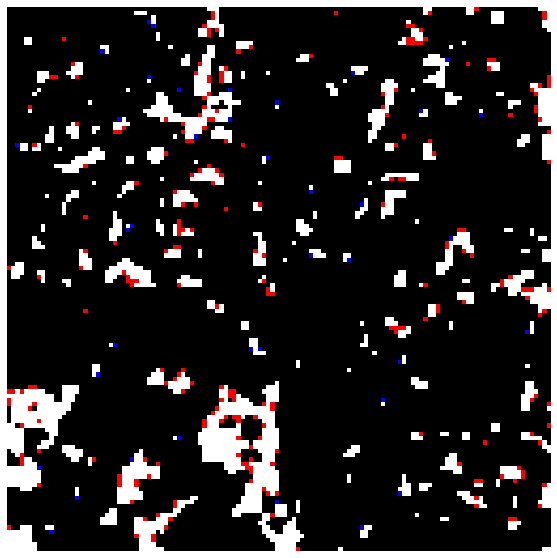

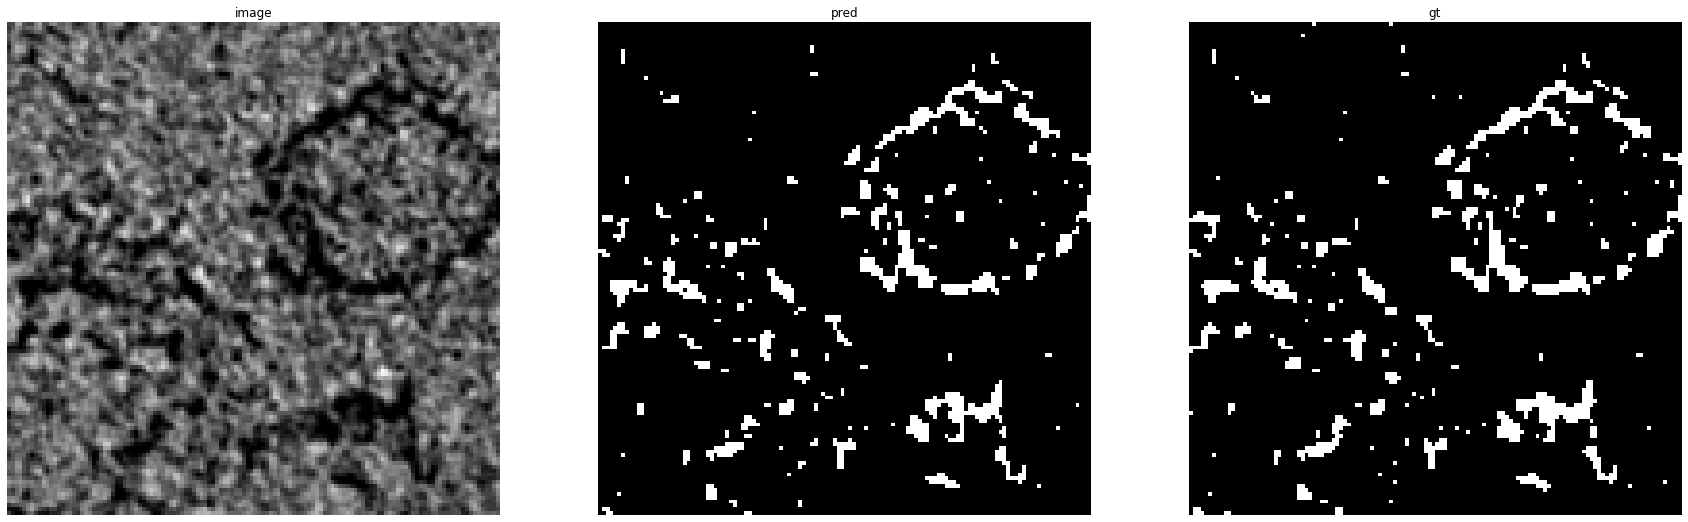

accuracy    : 0.98724365234375
precision   : 0.9627059843885516
recall      : 0.8699059561128527
f1          : 0.9139563606422396
pr_auc      : 0.9856159748850144
iou         : 0.8415466262319939


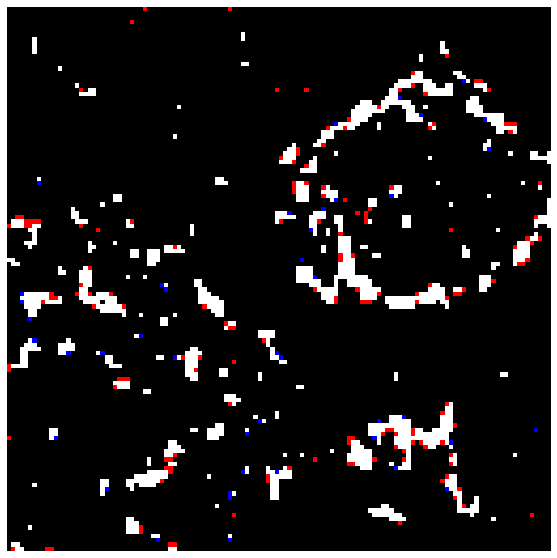

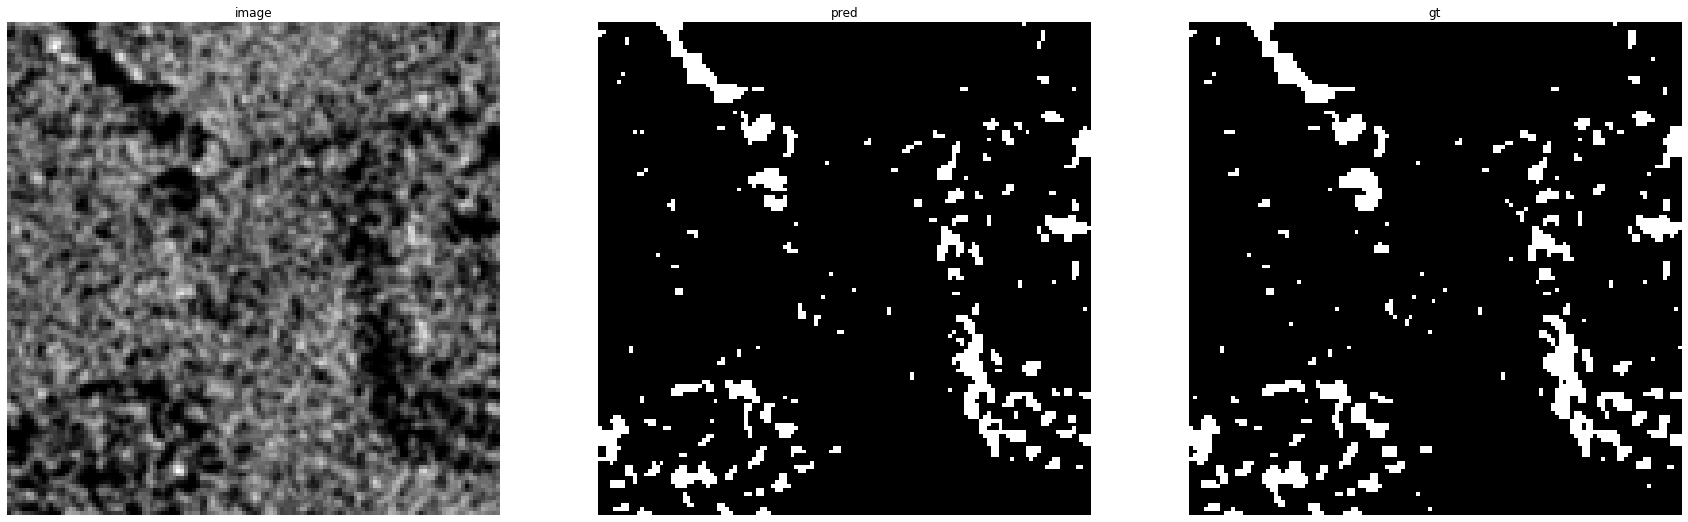

accuracy    : 0.98388671875
precision   : 0.983477576711251
recall      : 0.8372404554588078
f1          : 0.9044862518089725
pr_auc      : 0.9876961567665767
iou         : 0.8256274768824307


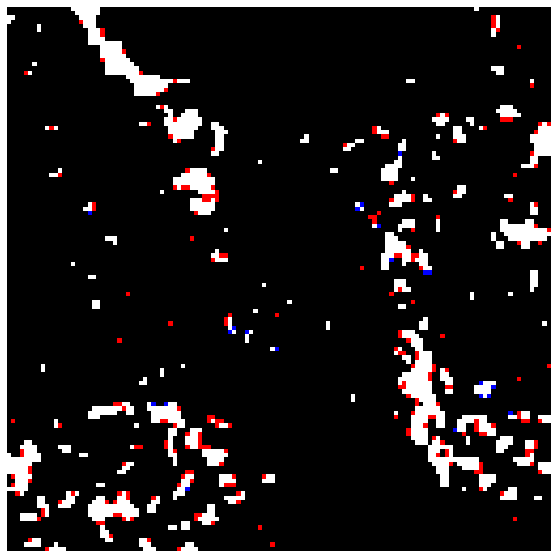

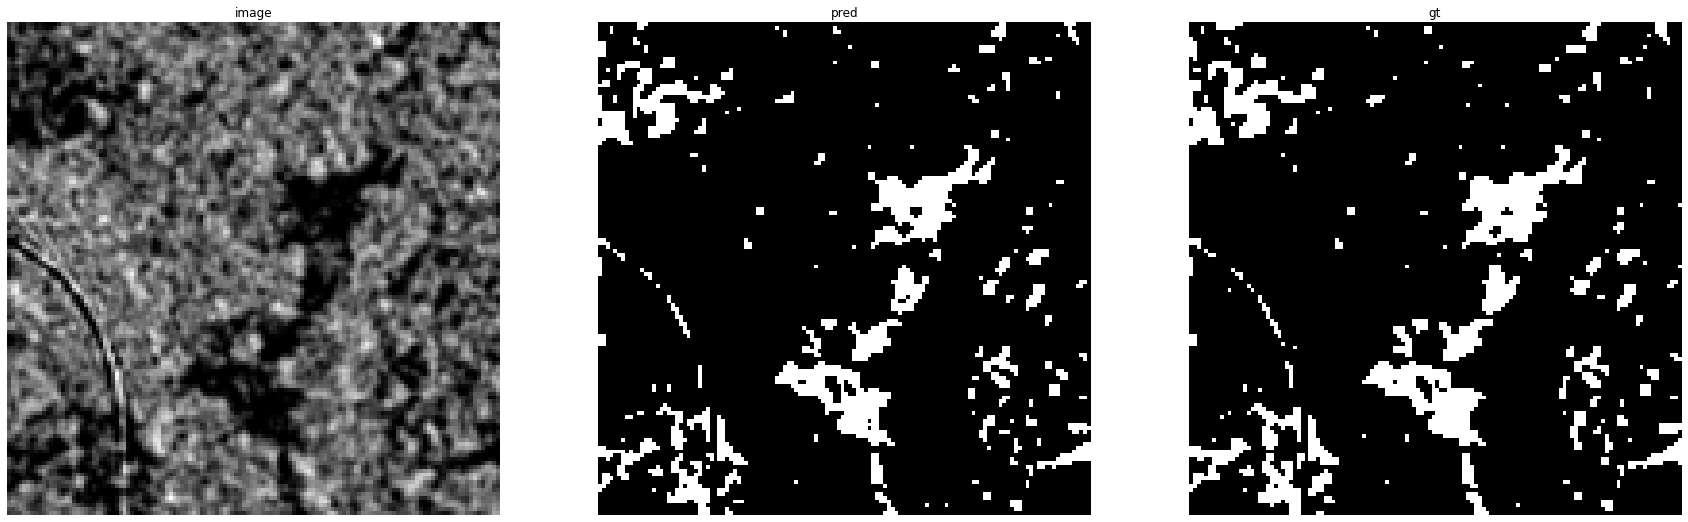

accuracy    : 0.9822998046875
precision   : 0.9879187259747392
recall      : 0.8703434929850025
f1          : 0.9254115226337448
pr_auc      : 0.9924826311739243
iou         : 0.8611775969363332


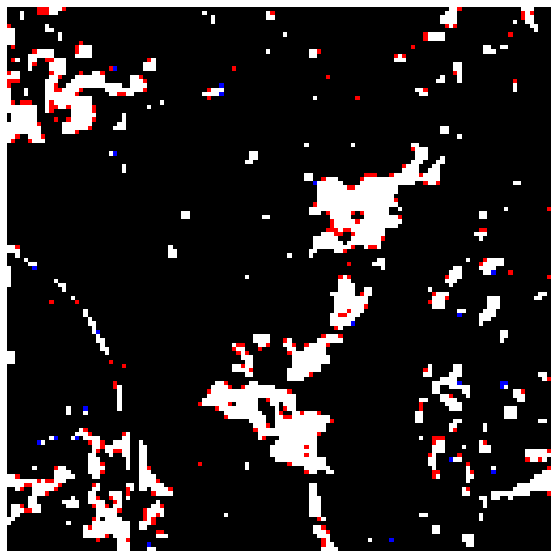

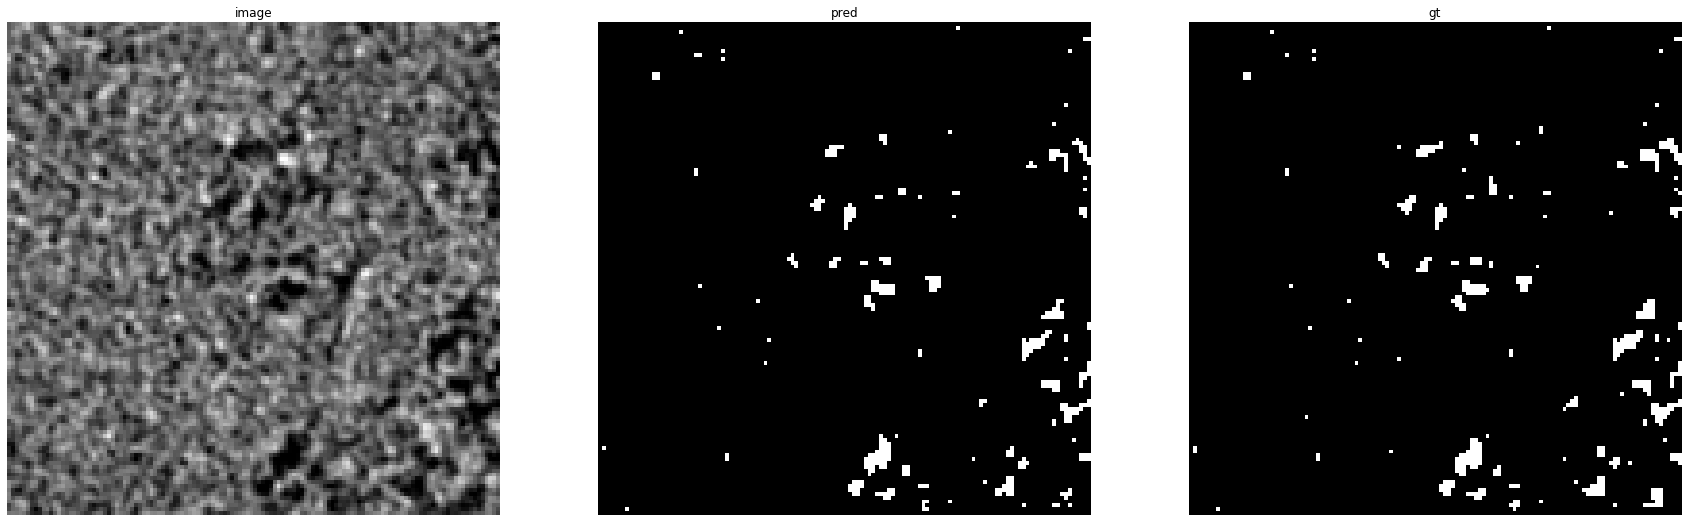

accuracy    : 0.9942626953125
precision   : 0.979328165374677
recall      : 0.8150537634408602
f1          : 0.8896713615023474
pr_auc      : 0.9793506894968517
iou         : 0.8012684989429175


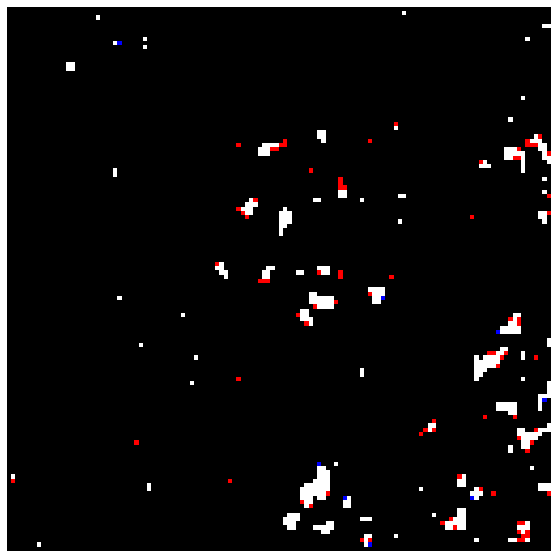

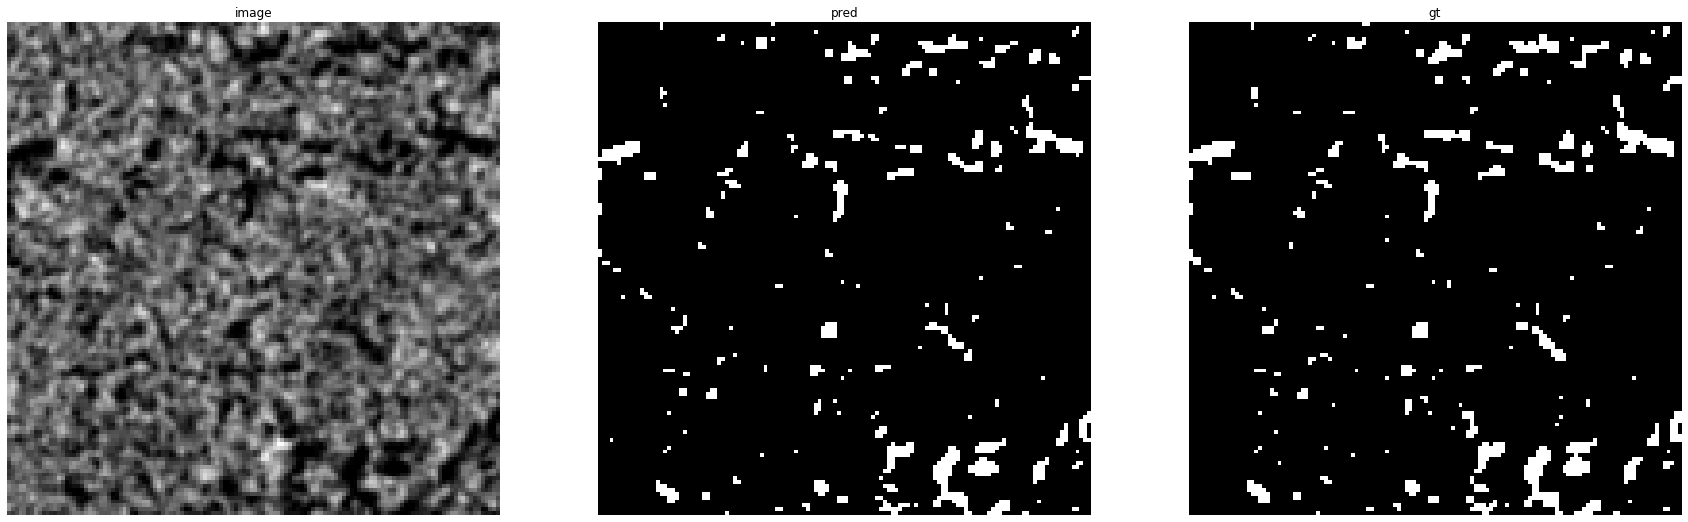

accuracy    : 0.989501953125
precision   : 0.9797752808988764
recall      : 0.8499025341130604
f1          : 0.9102296450939458
pr_auc      : 0.983692892078186
iou         : 0.8352490421455939


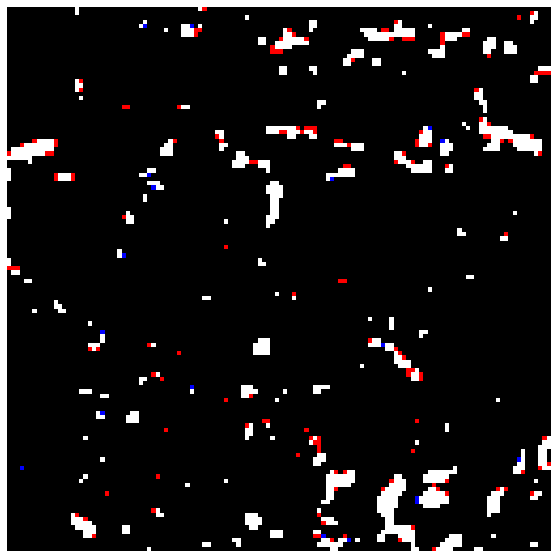

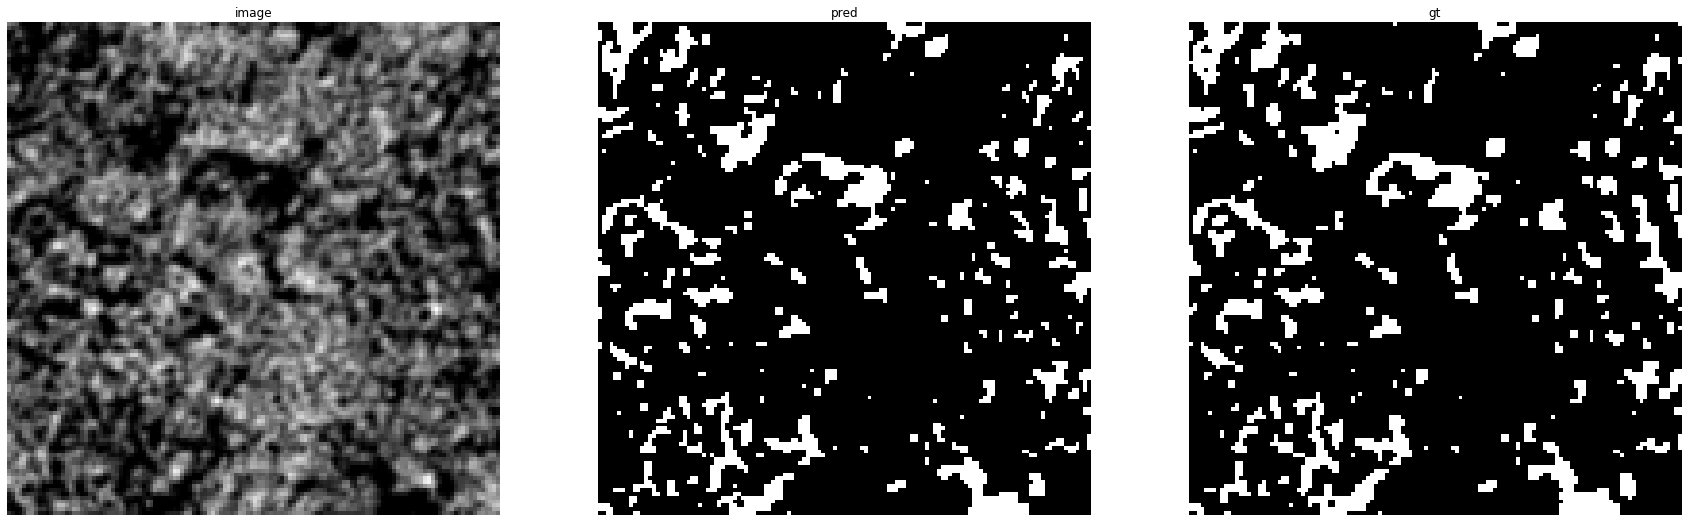

accuracy    : 0.9739990234375
precision   : 0.9790849673202614
recall      : 0.856
f1          : 0.9134146341463415
pr_auc      : 0.987975935907967
iou         : 0.8406285072951739


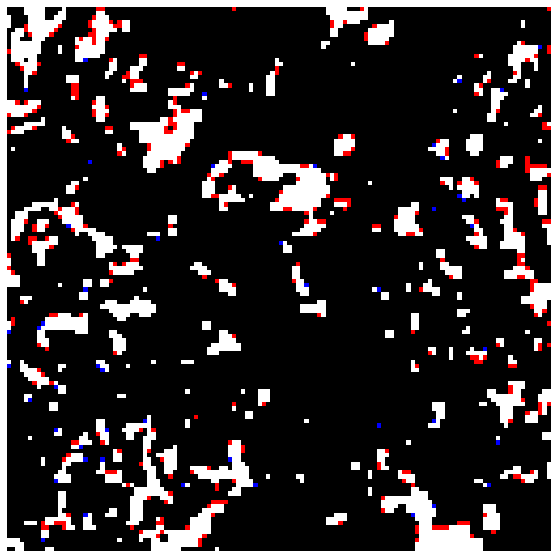

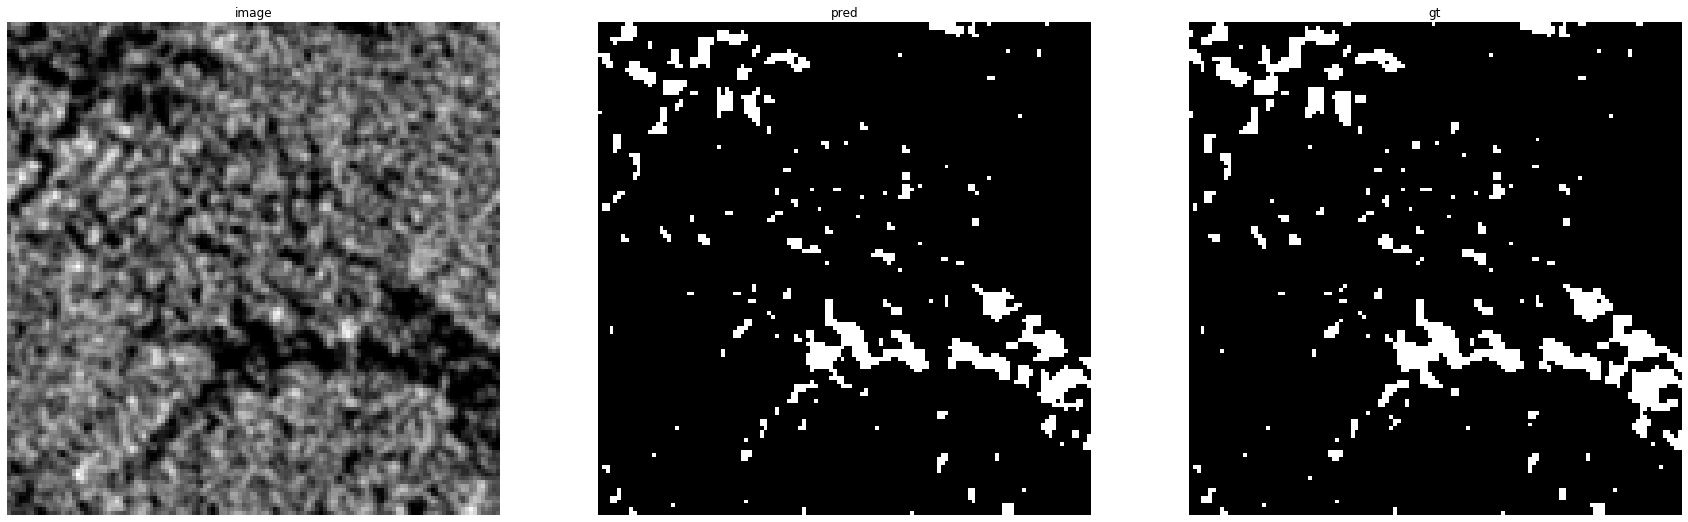

accuracy    : 0.98370361328125
precision   : 0.989010989010989
recall      : 0.8216292134831461
f1          : 0.8975834292289989
pr_auc      : 0.9873595532877599
iou         : 0.81419624217119


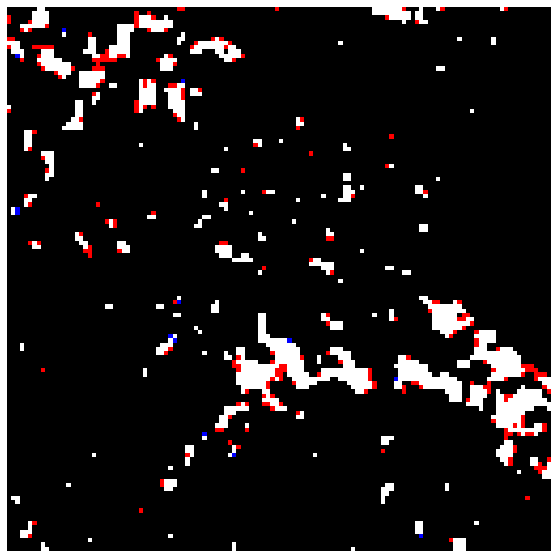

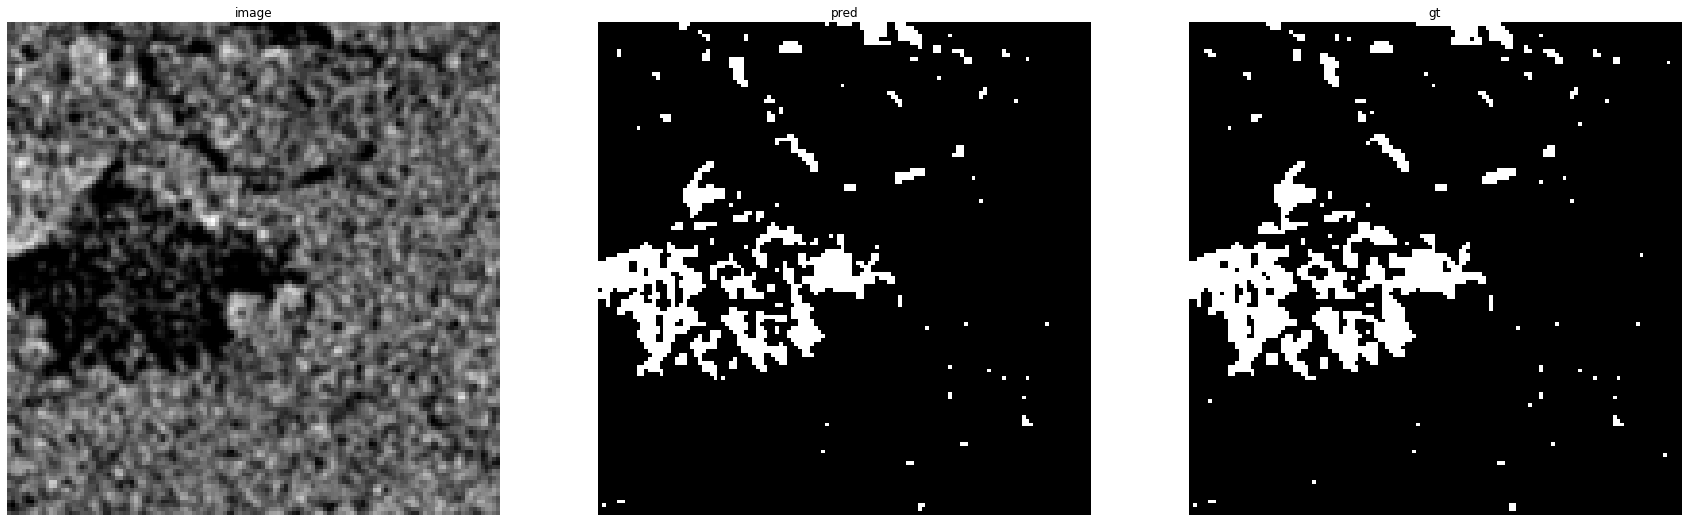

accuracy    : 0.98291015625
precision   : 0.9908835904628331
recall      : 0.8410714285714286
f1          : 0.9098518995492595
pr_auc      : 0.9921982208895765
iou         : 0.8346131128174837


Prediction for SPE_carb10_58_box3:


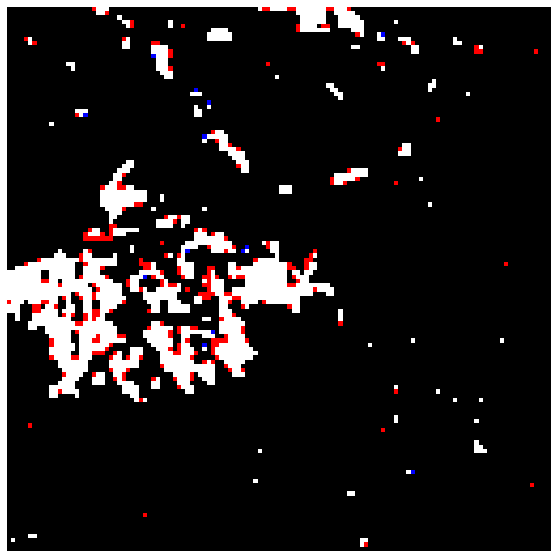

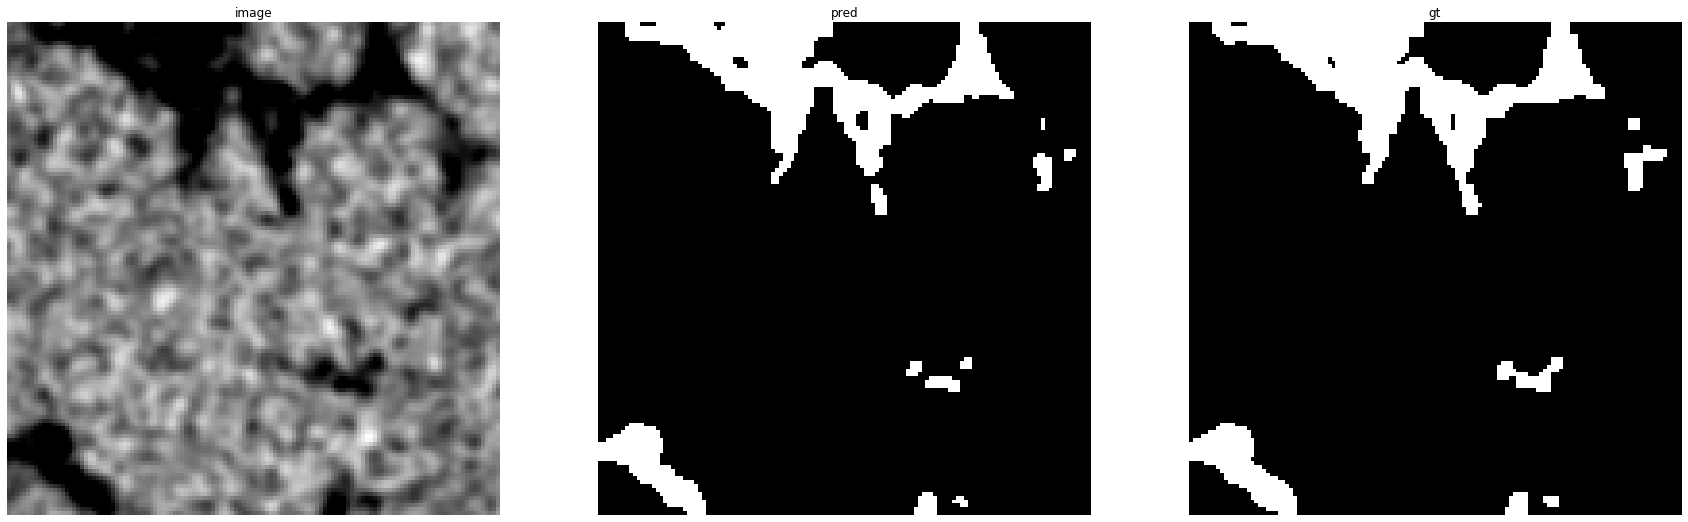

accuracy    : 0.98870849609375
precision   : 0.9994511525795828
recall      : 0.9082294264339152
f1          : 0.9516592631303894
pr_auc      : 0.998404052900403
iou         : 0.9077766699900299


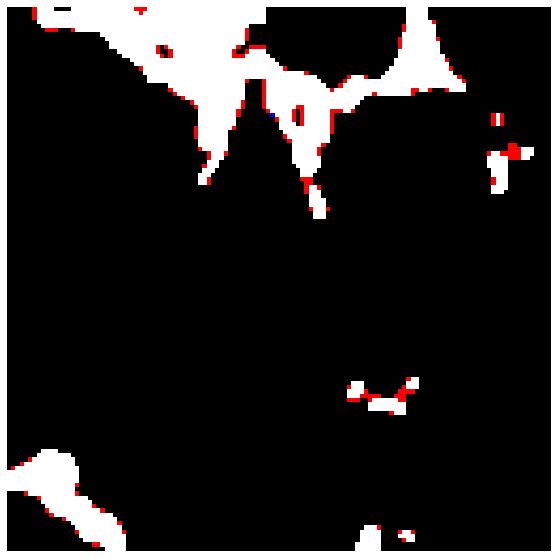

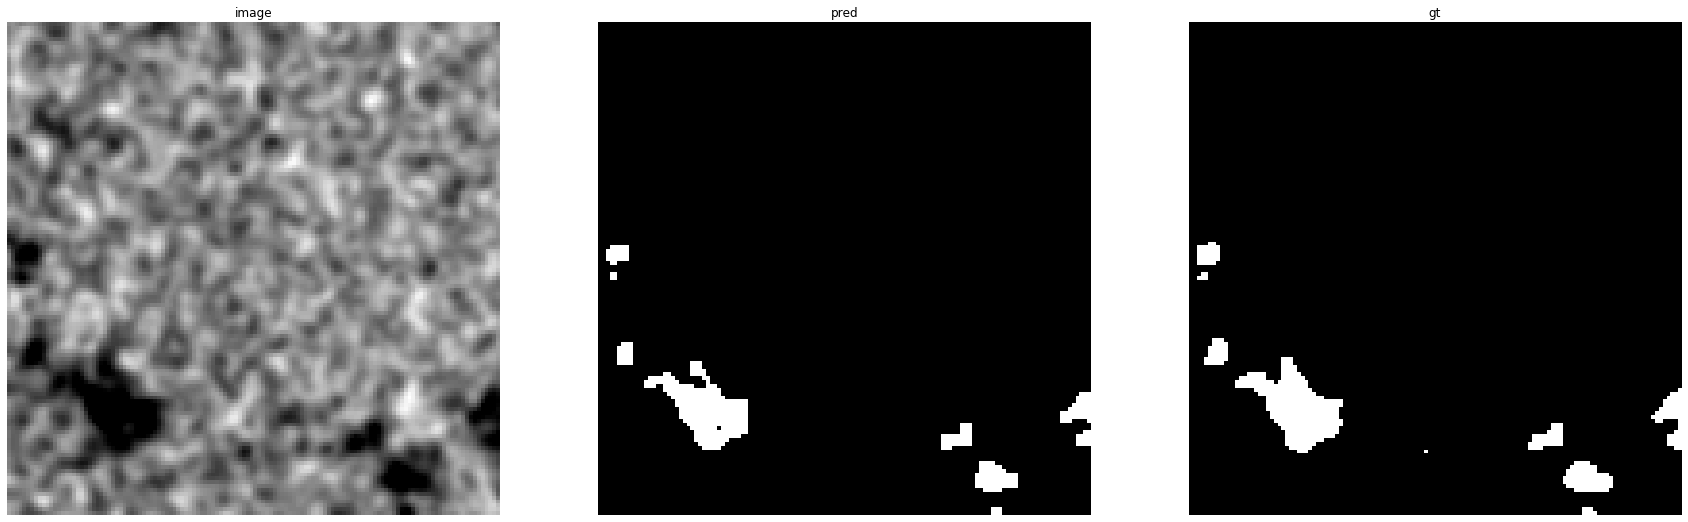

accuracy    : 0.99481201171875
precision   : 0.9919028340080972
recall      : 0.8581436077057794
f1          : 0.9201877934272301
pr_auc      : 0.9953228835607011
iou         : 0.8521739130434782


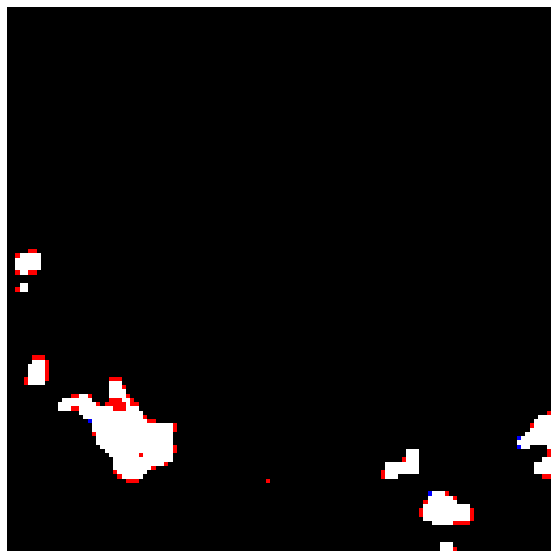

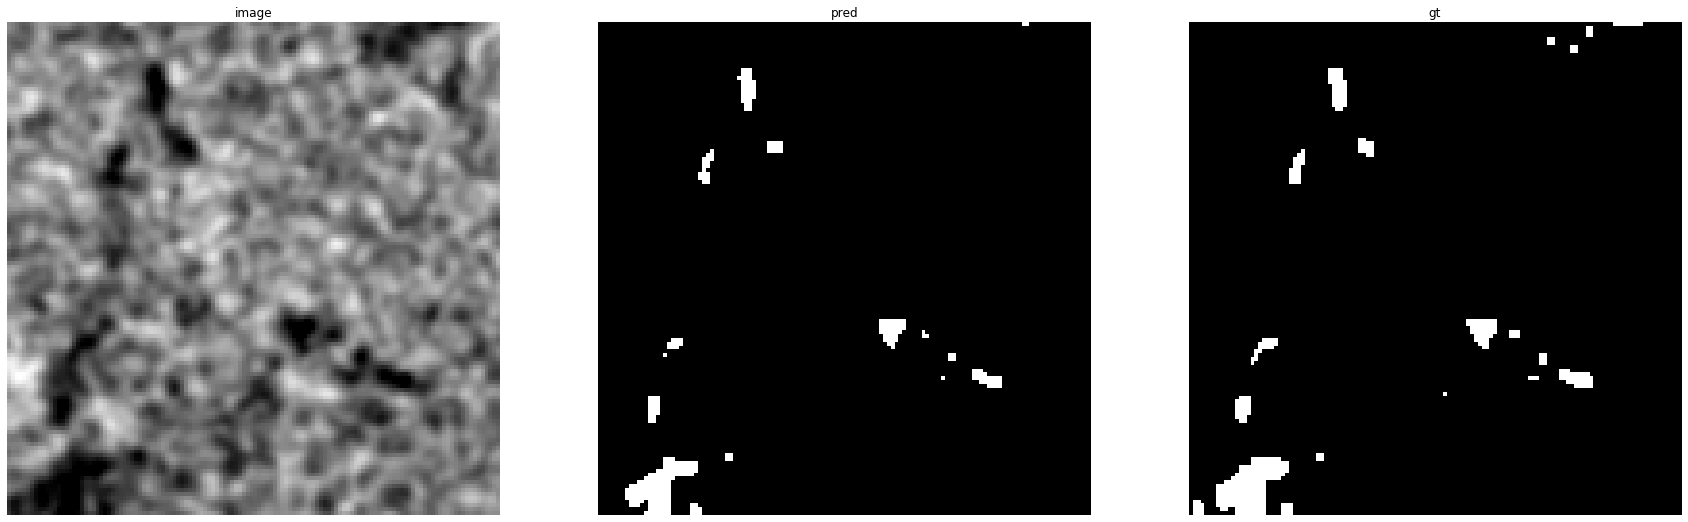

accuracy    : 0.99273681640625
precision   : 0.9969040247678018
recall      : 0.7318181818181818
f1          : 0.8440366972477064
pr_auc      : 0.9925197293754188
iou         : 0.7301587301587301


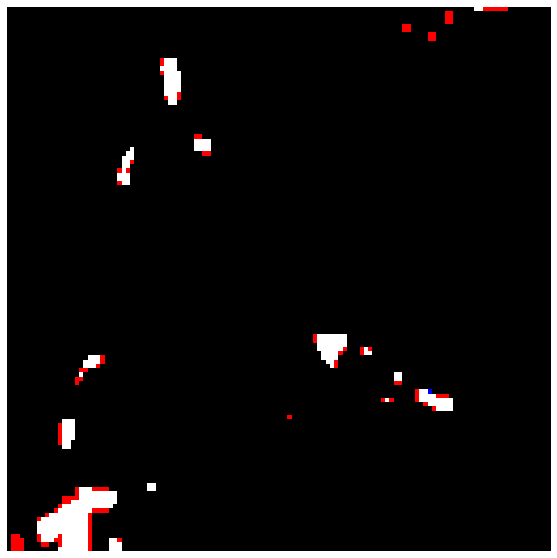

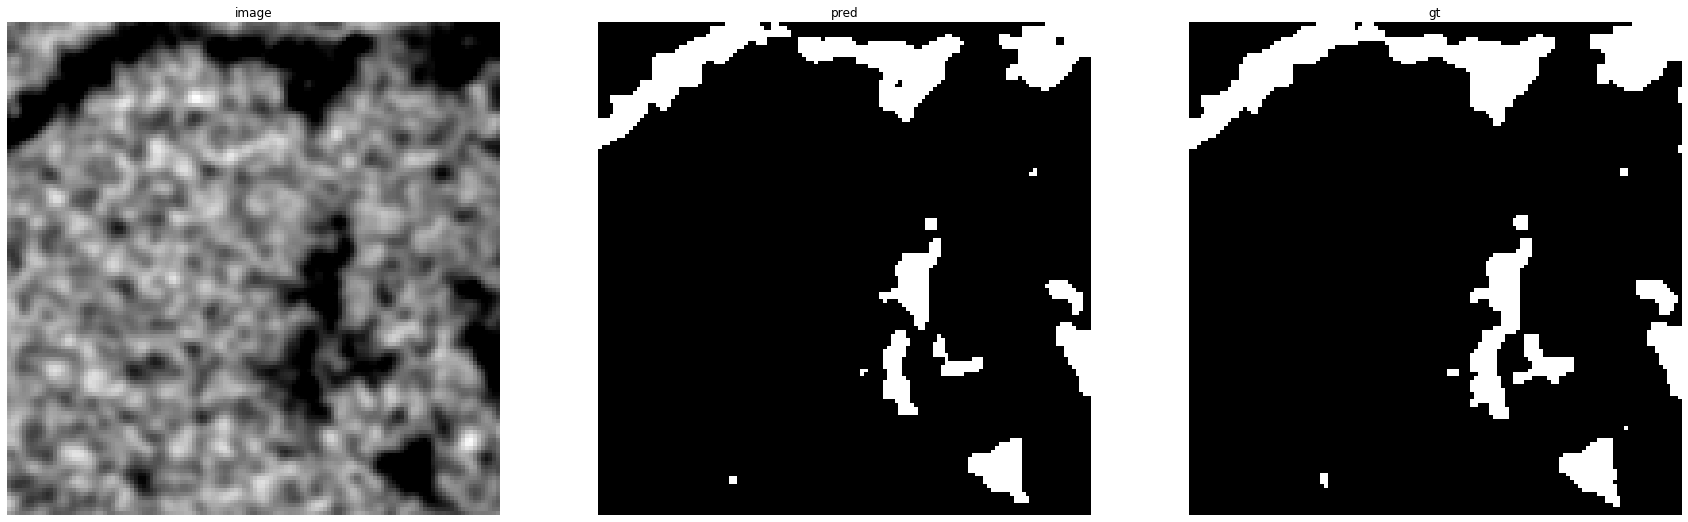

accuracy    : 0.98394775390625
precision   : 0.9988845510317903
recall      : 0.8728070175438597
f1          : 0.9315994798439533
pr_auc      : 0.9971125785596863
iou         : 0.8719571567672834


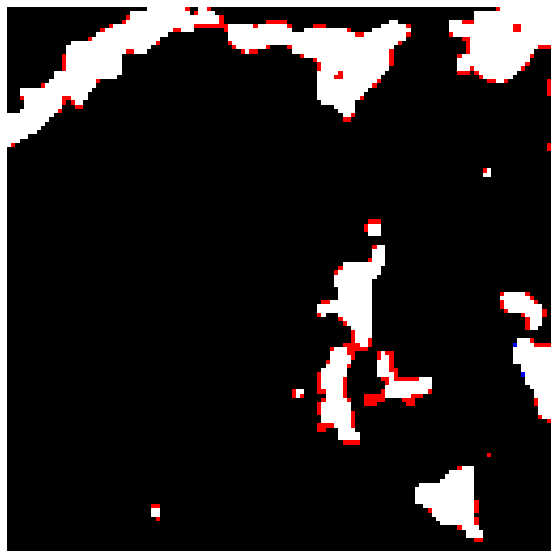

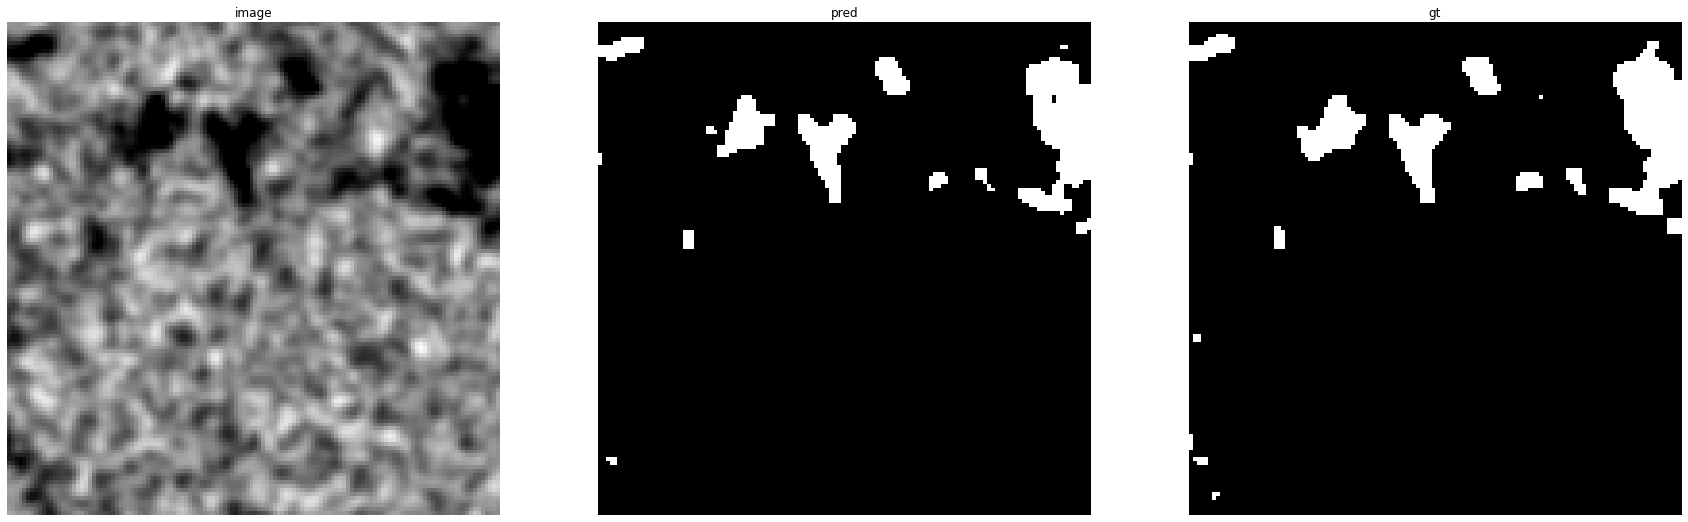

accuracy    : 0.9898681640625
precision   : 0.9989473684210526
recall      : 0.8518850987432675
f1          : 0.9195736434108526
pr_auc      : 0.9976726583620293
iou         : 0.8511210762331839


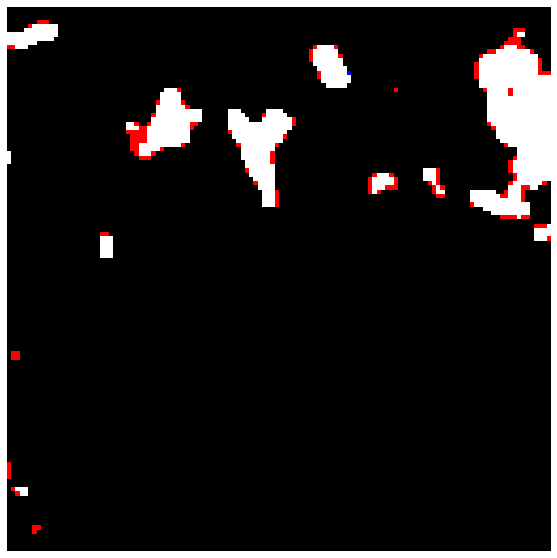

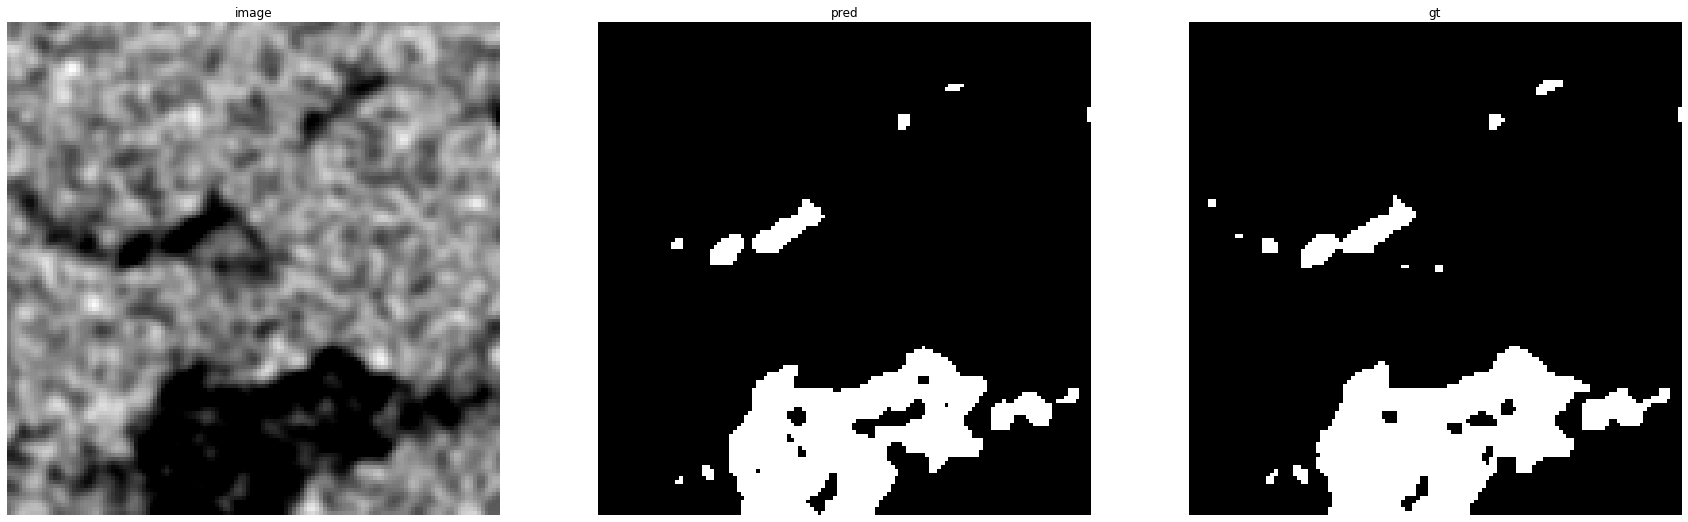

accuracy    : 0.98590087890625
precision   : 1.0
recall      : 0.9000865051903114
f1          : 0.9474163441839291
pr_auc      : 0.998381316163866
iou         : 0.9000865051903114


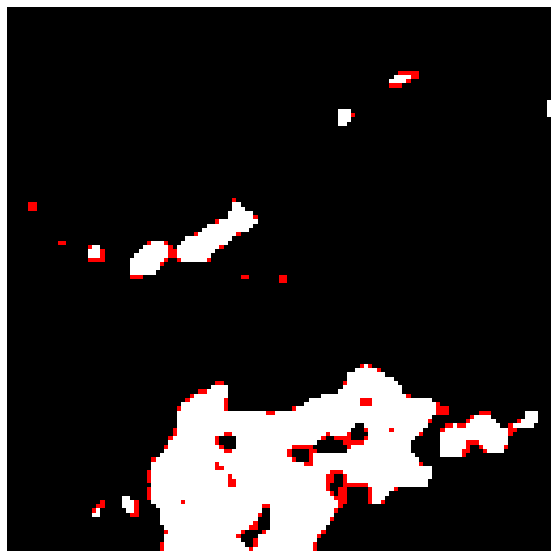

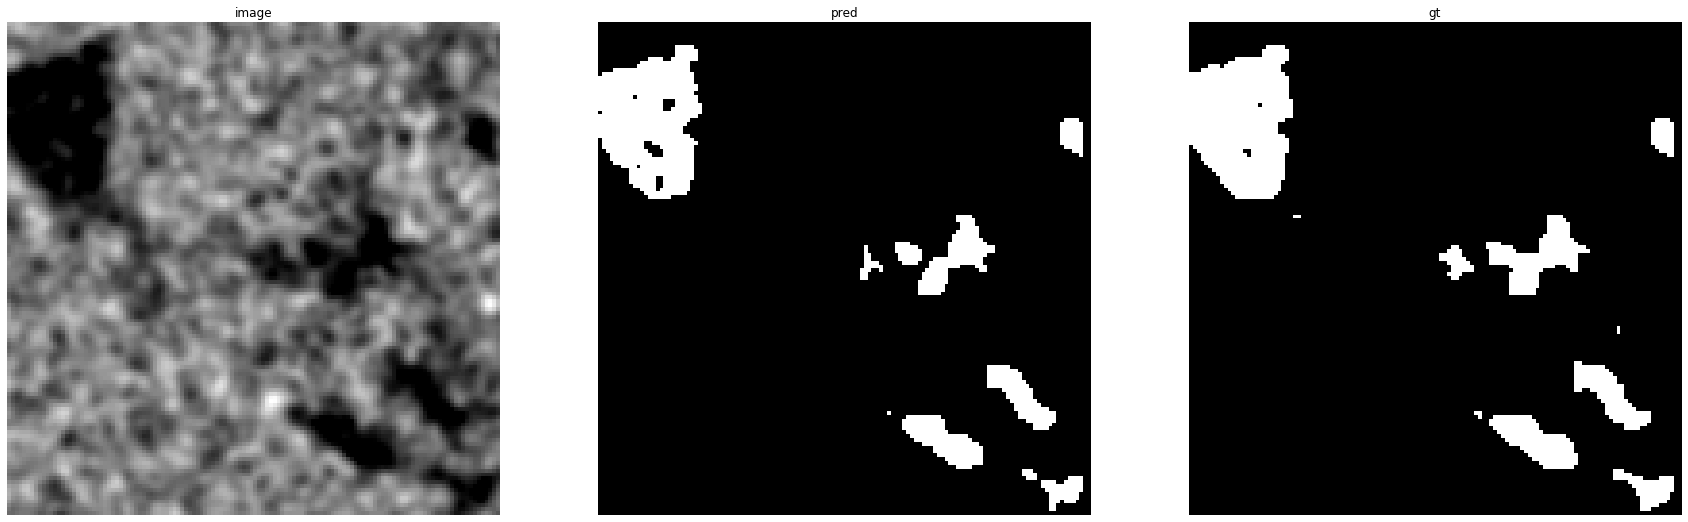

accuracy    : 0.98883056640625
precision   : 0.9985734664764622
recall      : 0.8855154965211891
f1          : 0.9386523633925579
pr_auc      : 0.9975700567304188
iou         : 0.8843967150979154


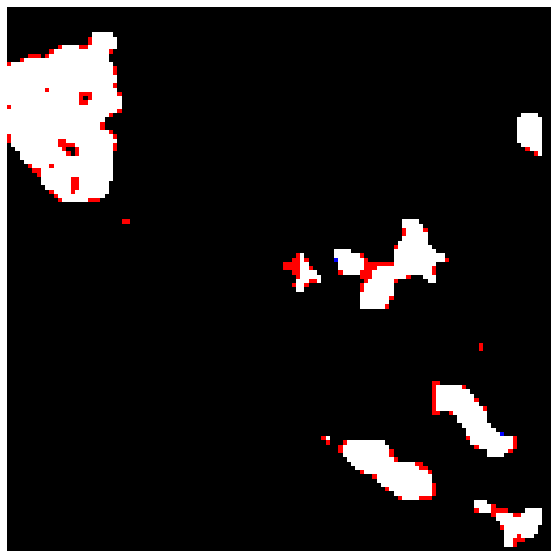

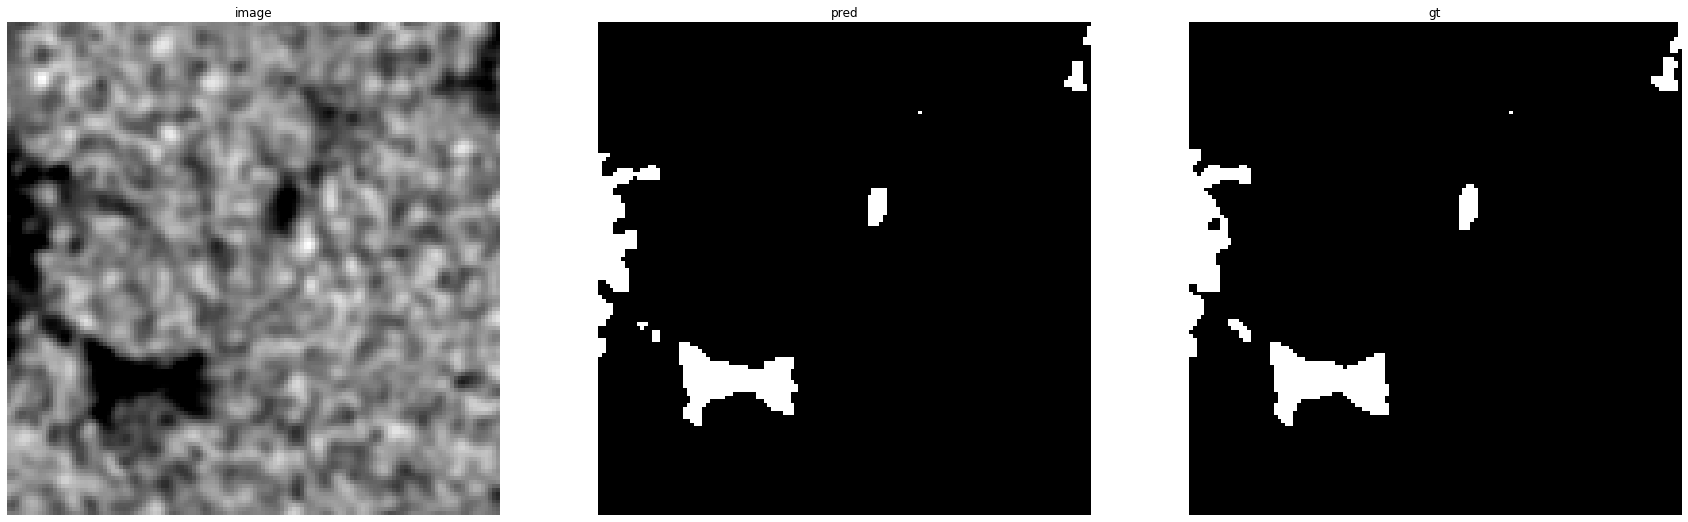

accuracy    : 0.99261474609375
precision   : 0.997179125528914
recall      : 0.8559322033898306
f1          : 0.9211726384364822
pr_auc      : 0.9965034875047628
iou         : 0.8538647342995169


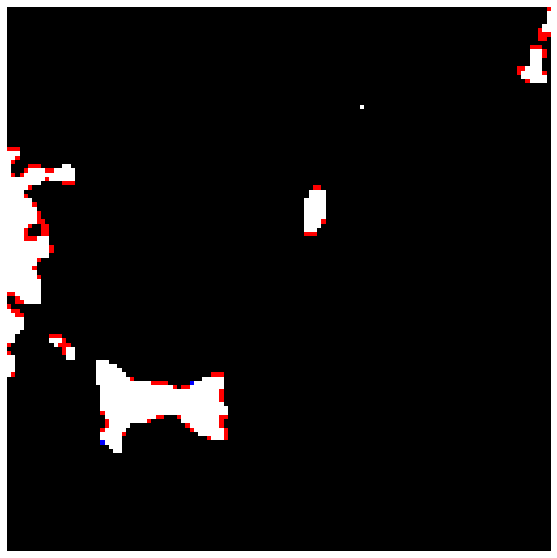

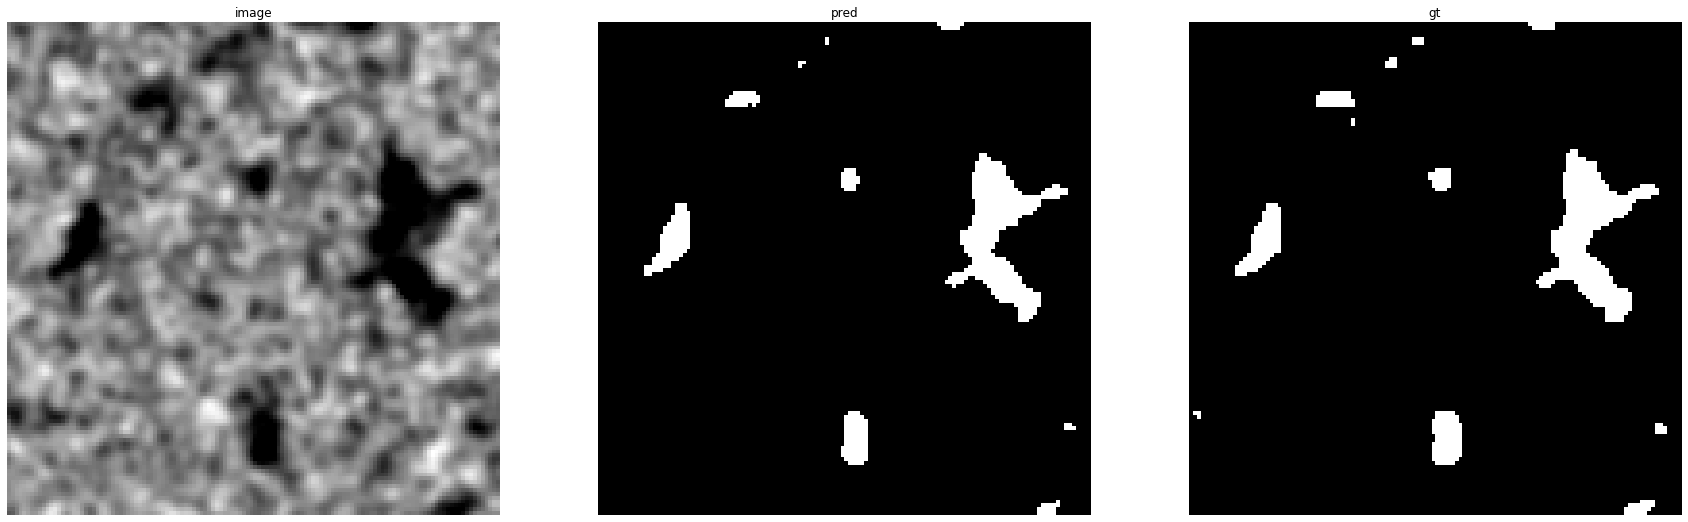

accuracy    : 0.9931640625
precision   : 1.0
recall      : 0.8722919042189282
f1          : 0.9317904993909866
pr_auc      : 0.9970698658857782
iou         : 0.8722919042189282


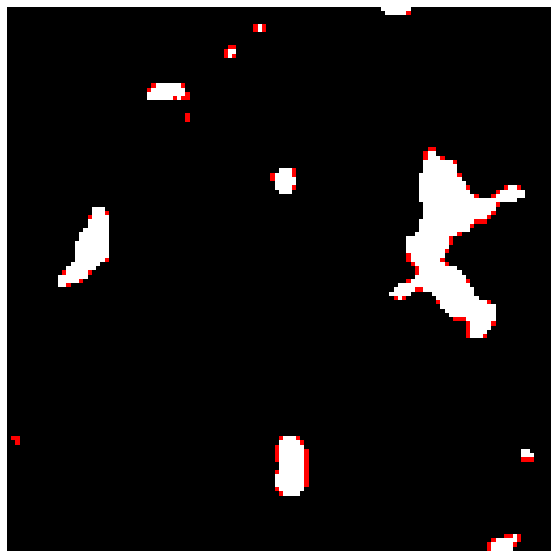

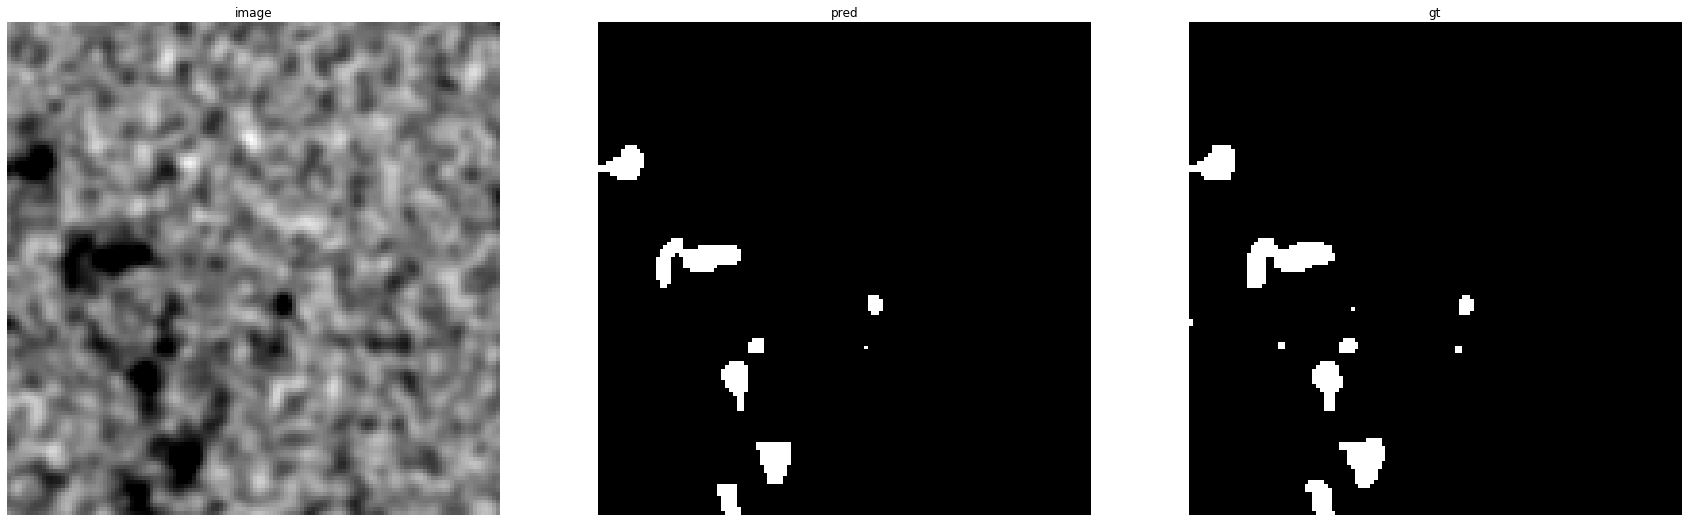

accuracy    : 0.9942626953125
precision   : 0.995085995085995
recall      : 0.8148893360160966
f1          : 0.8960176991150443
pr_auc      : 0.9956204640608205
iou         : 0.811623246492986


Prediction for SoilAh-1:


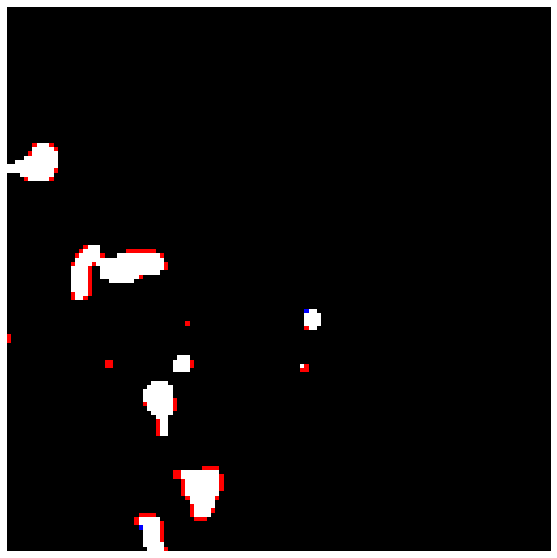

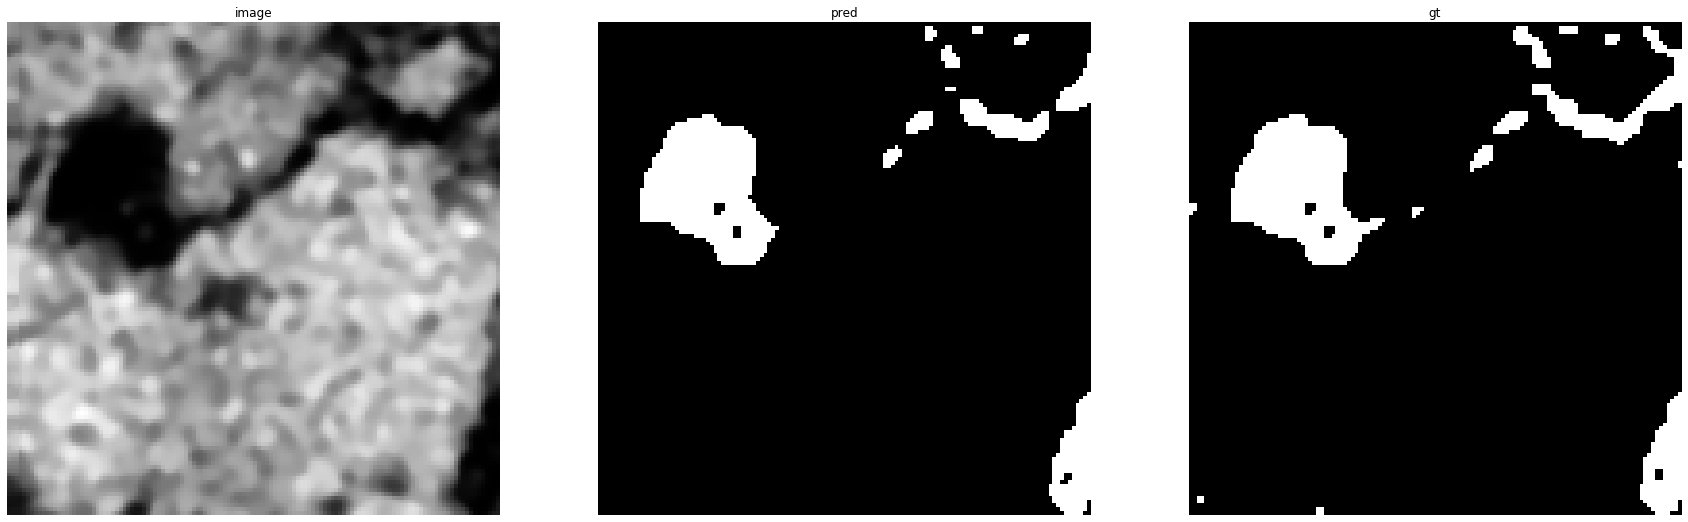

accuracy    : 0.98956298828125
precision   : 0.9914346895074947
recall      : 0.8972868217054264
f1          : 0.9420142421159715
pr_auc      : 0.9944434162741729
iou         : 0.8903846153846153


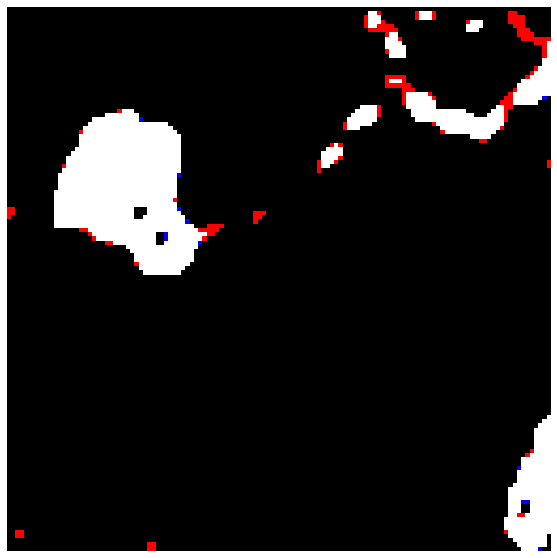

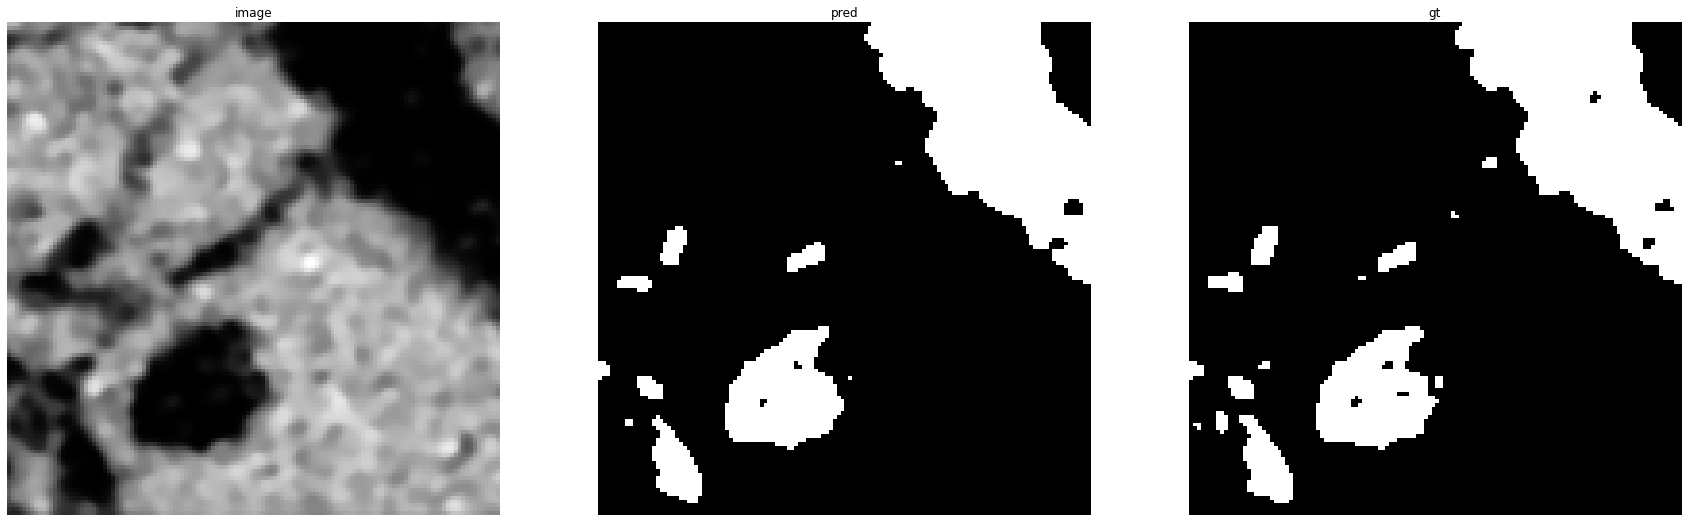

accuracy    : 0.991455078125
precision   : 0.9917851500789889
recall      : 0.9649554257608361
f1          : 0.9781863508881272
pr_auc      : 0.9988841385782666
iou         : 0.9573040561146691


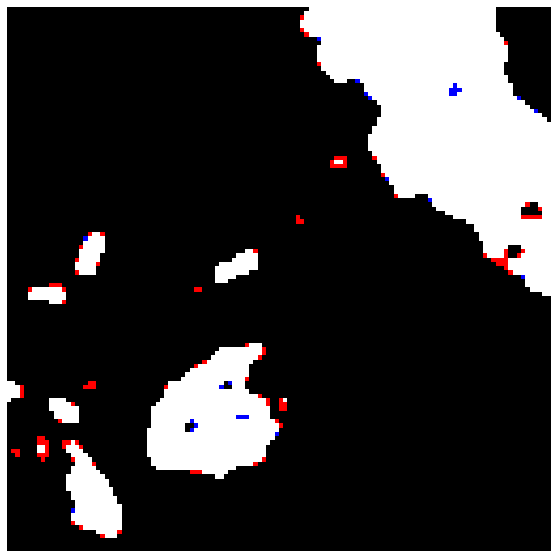

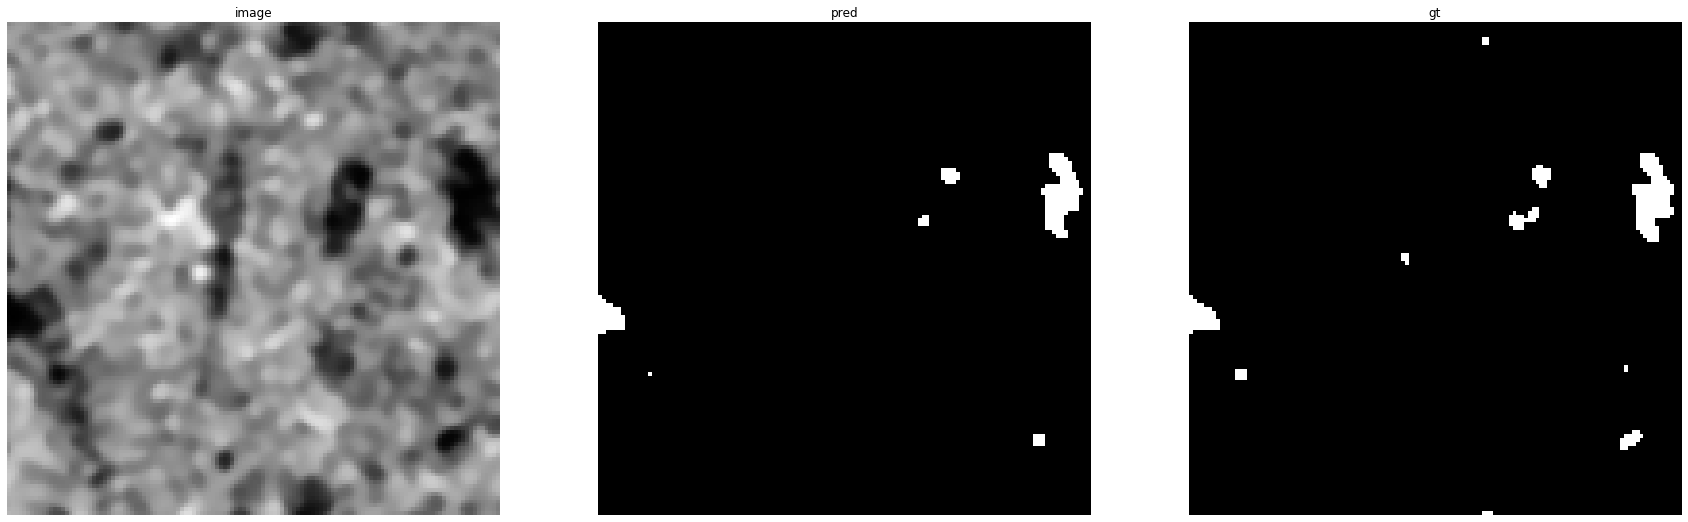

accuracy    : 0.99517822265625
precision   : 0.9866071428571429
recall      : 0.7441077441077442
f1          : 0.8483685220729367
pr_auc      : 0.977054085591477
iou         : 0.7366666666666667


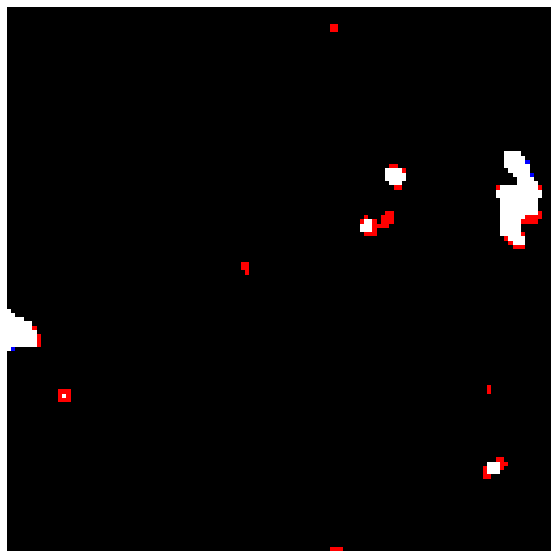

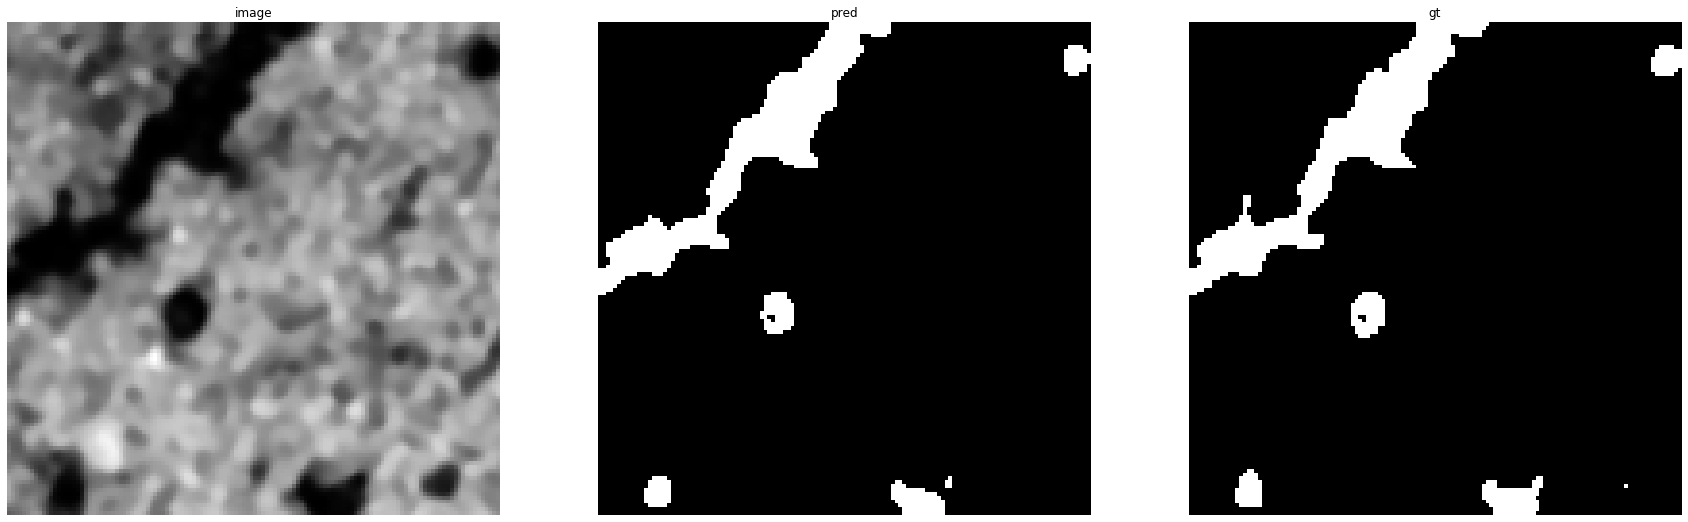

accuracy    : 0.9937744140625
precision   : 0.9947328818660647
recall      : 0.9329569513055752
f1          : 0.9628550619082301
pr_auc      : 0.9977038885994562
iou         : 0.9283707865168539


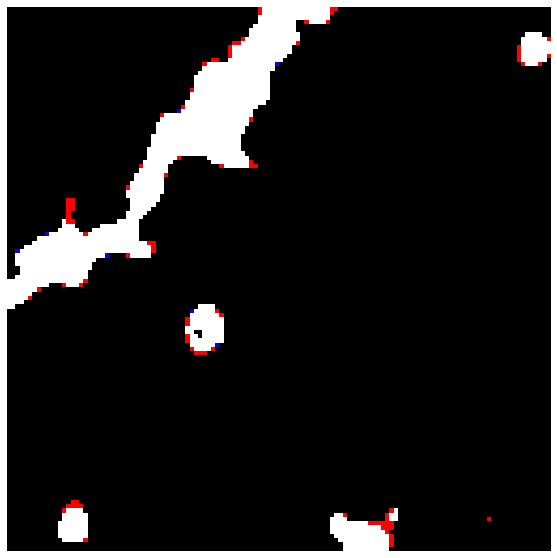

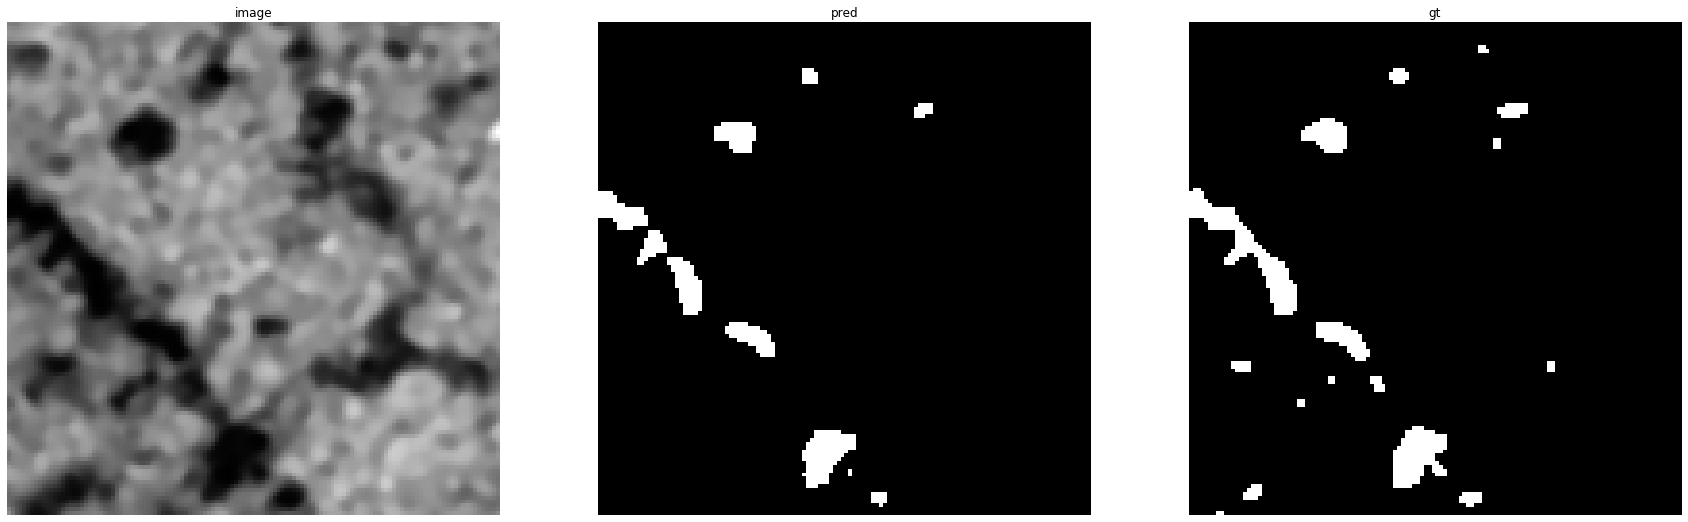

accuracy    : 0.9896240234375
precision   : 0.9922928709055877
recall      : 0.7562408223201175
f1          : 0.8583333333333333
pr_auc      : 0.9836283671985745
iou         : 0.7518248175182481


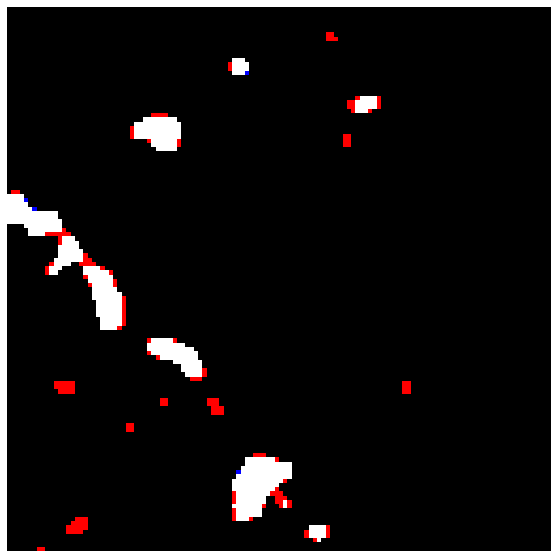

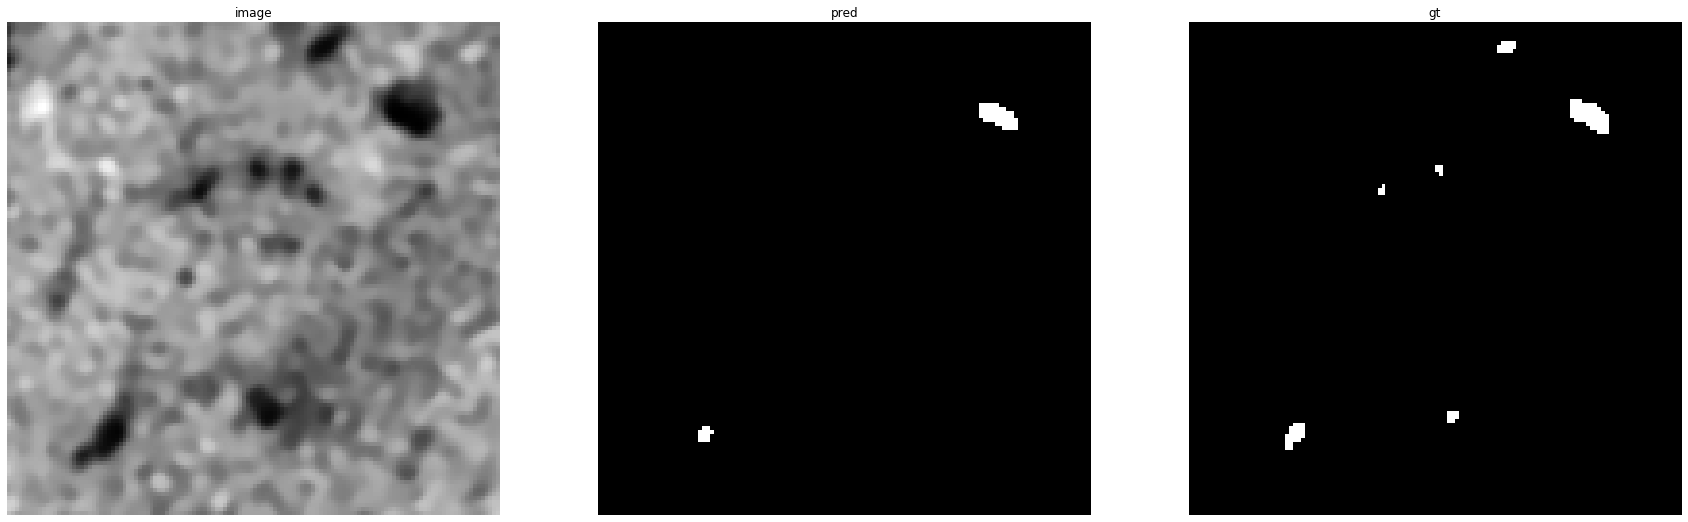

accuracy    : 0.9967041015625
precision   : 1.0
recall      : 0.5304347826086957
f1          : 0.6931818181818182
pr_auc      : 0.9574696579207963
iou         : 0.5304347826086957


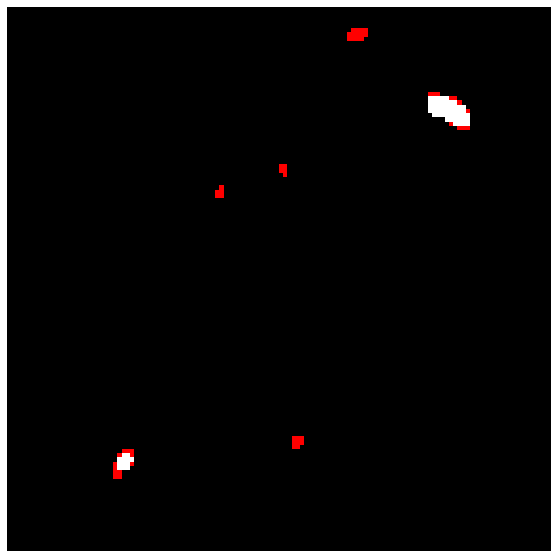

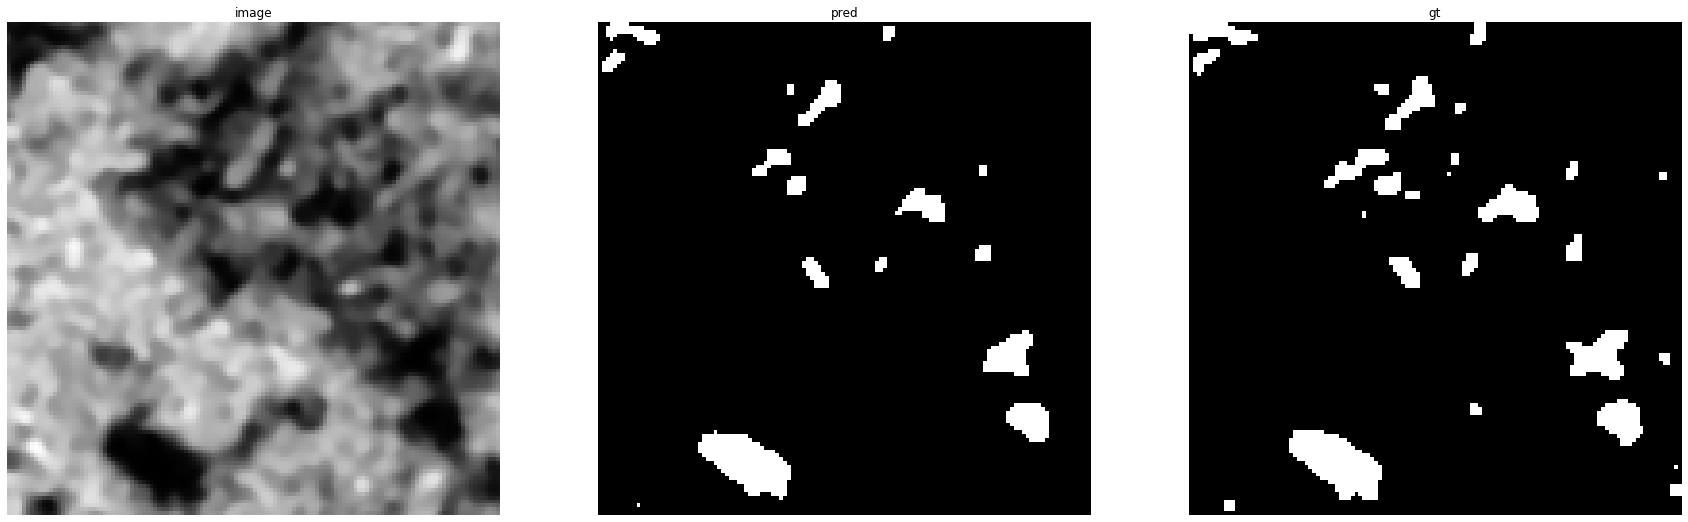

accuracy    : 0.98162841796875
precision   : 0.9935400516795866
recall      : 0.7220657276995305
f1          : 0.8363240891789016
pr_auc      : 0.9839761043732735
iou         : 0.7186915887850467


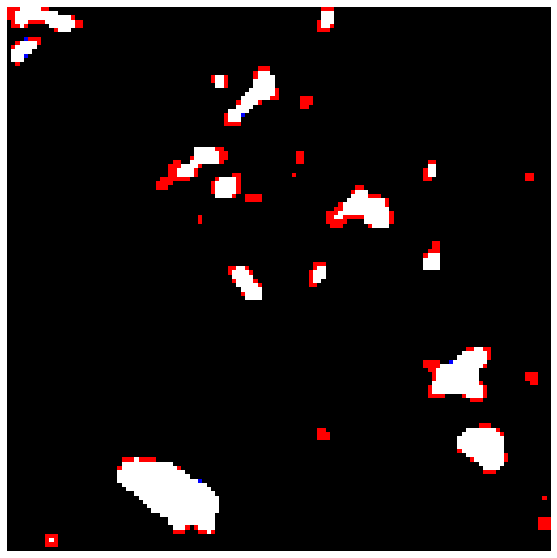

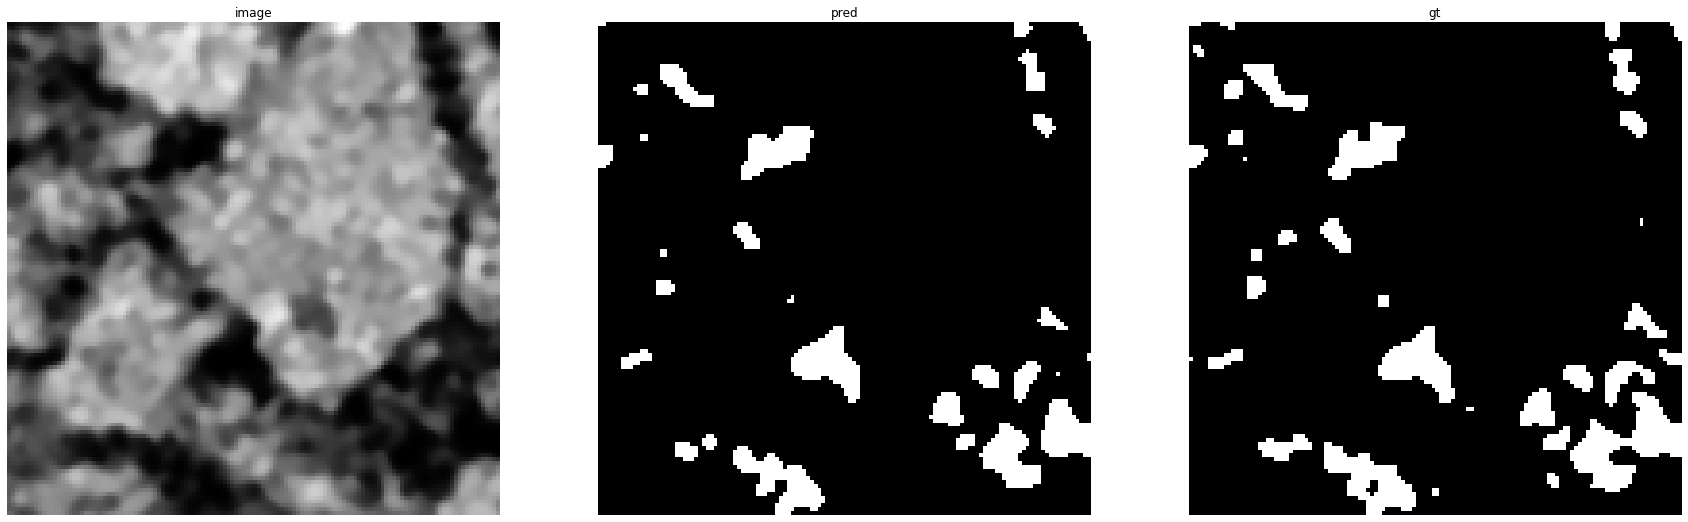

accuracy    : 0.9774169921875
precision   : 0.9902912621359223
recall      : 0.7878787878787878
f1          : 0.8775645268034414
pr_auc      : 0.9849608664542938
iou         : 0.7818396226415094


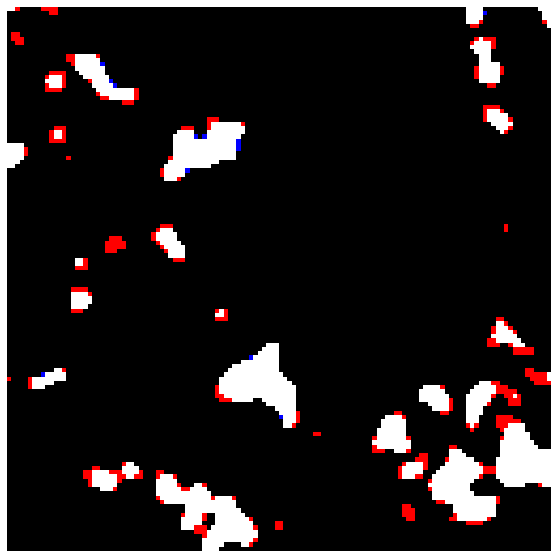

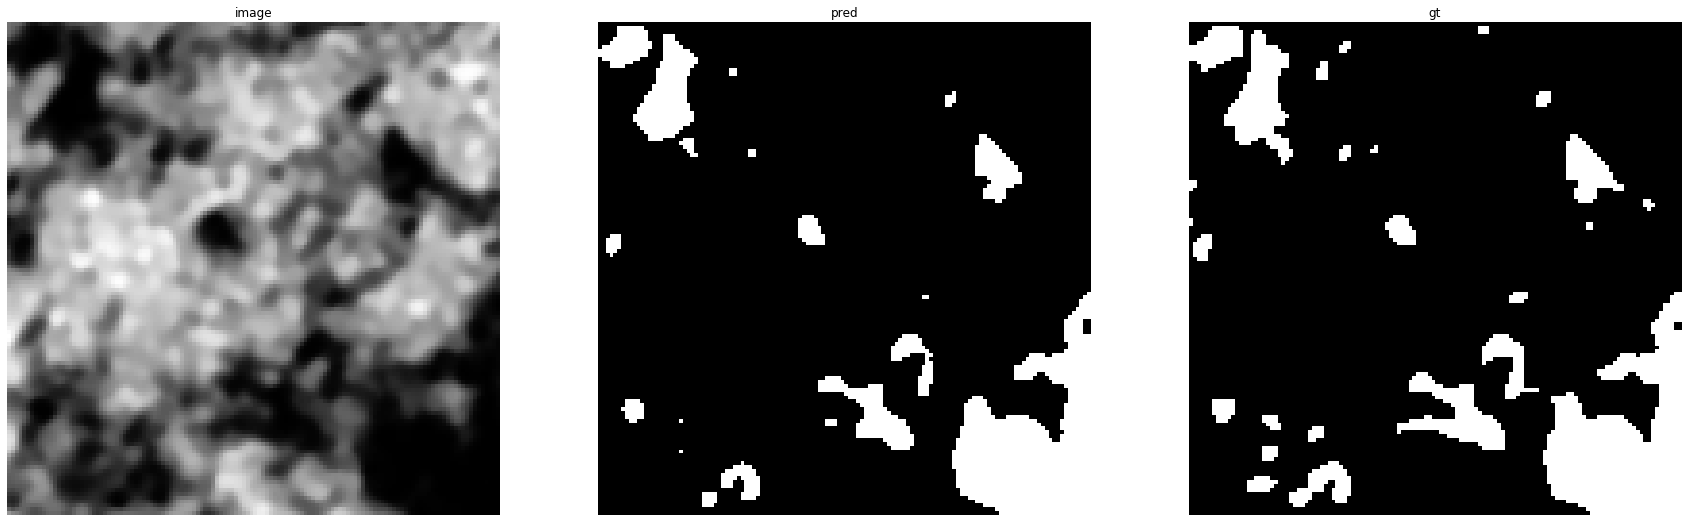

accuracy    : 0.97772216796875
precision   : 0.9942112879884226
recall      : 0.8537696768848384
f1          : 0.9186538890127034
pr_auc      : 0.9928330106513639
iou         : 0.8495465787304205


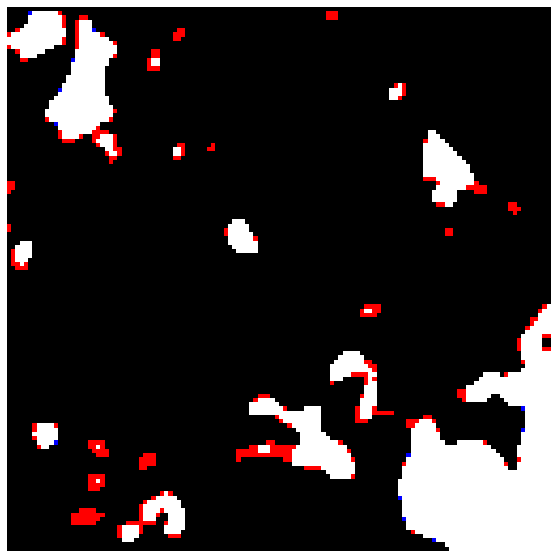

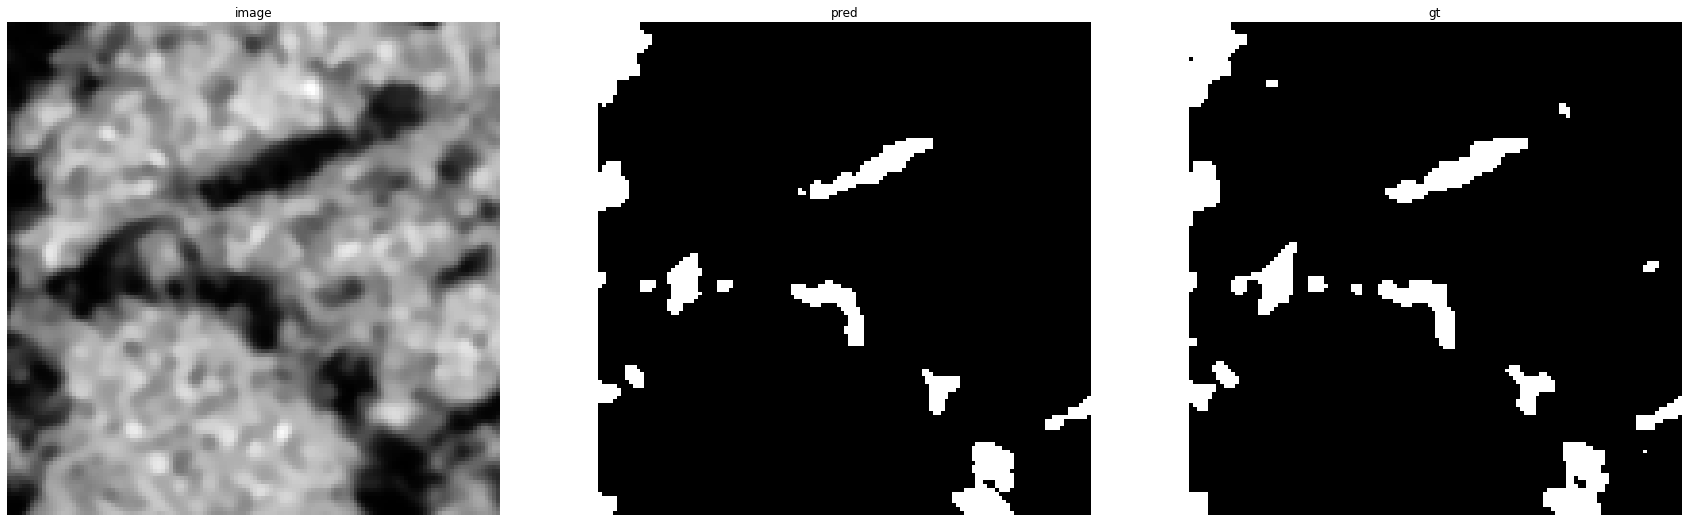

accuracy    : 0.98541259765625
precision   : 0.9935304990757856
recall      : 0.8224942616679418
f1          : 0.8999581414817915
pr_auc      : 0.9905994686391186
iou         : 0.8181126331811264


Prediction for SoilB-2:


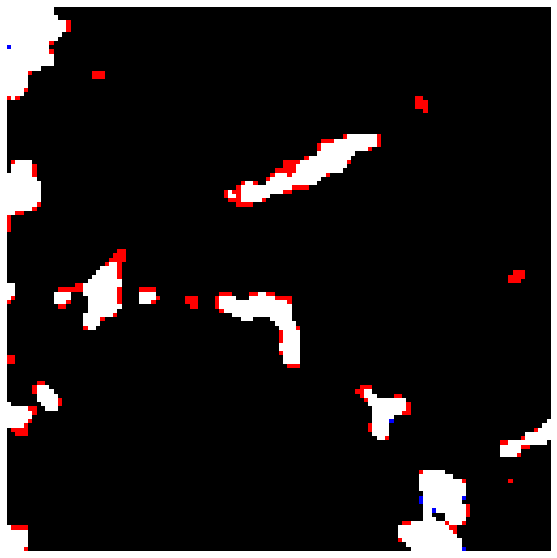

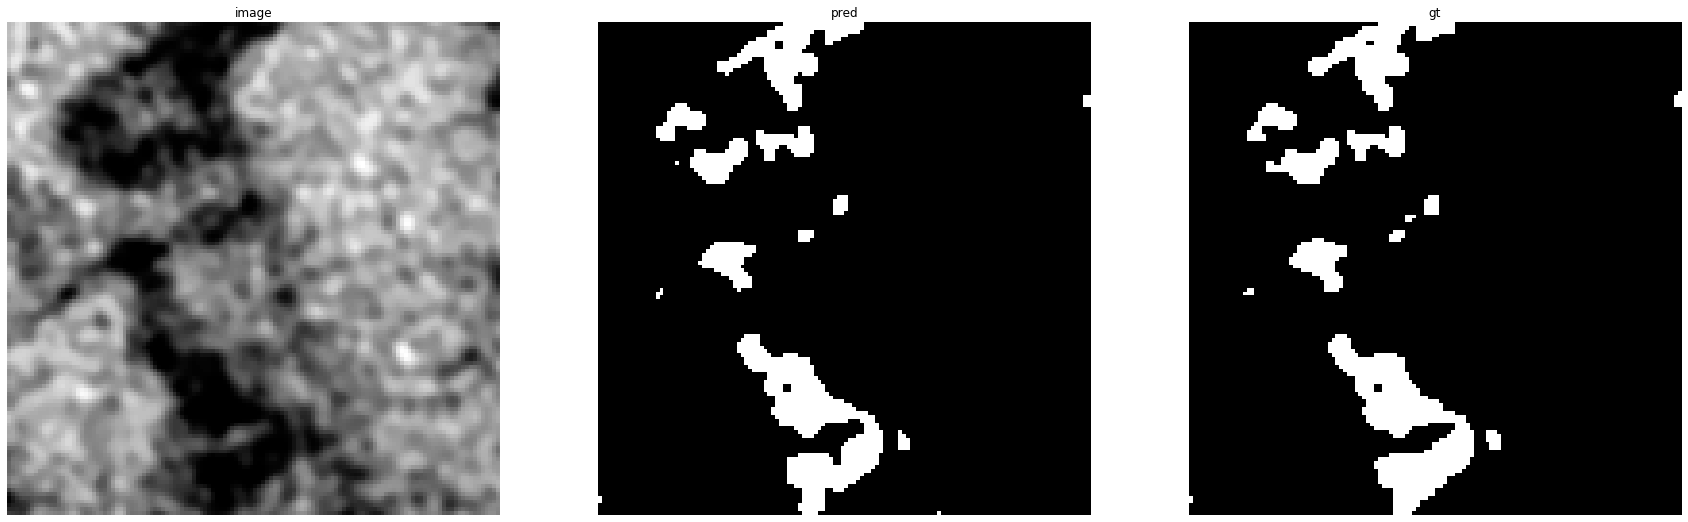

accuracy    : 0.99163818359375
precision   : 0.9833935018050541
recall      : 0.9227642276422764
f1          : 0.952114645228941
pr_auc      : 0.995116226878984
iou         : 0.9086057371581054


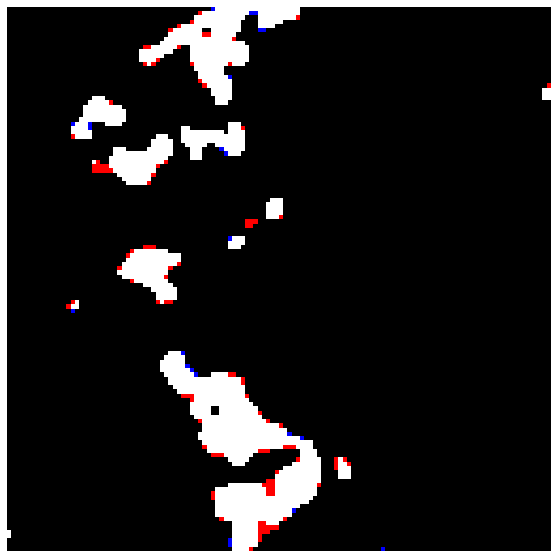

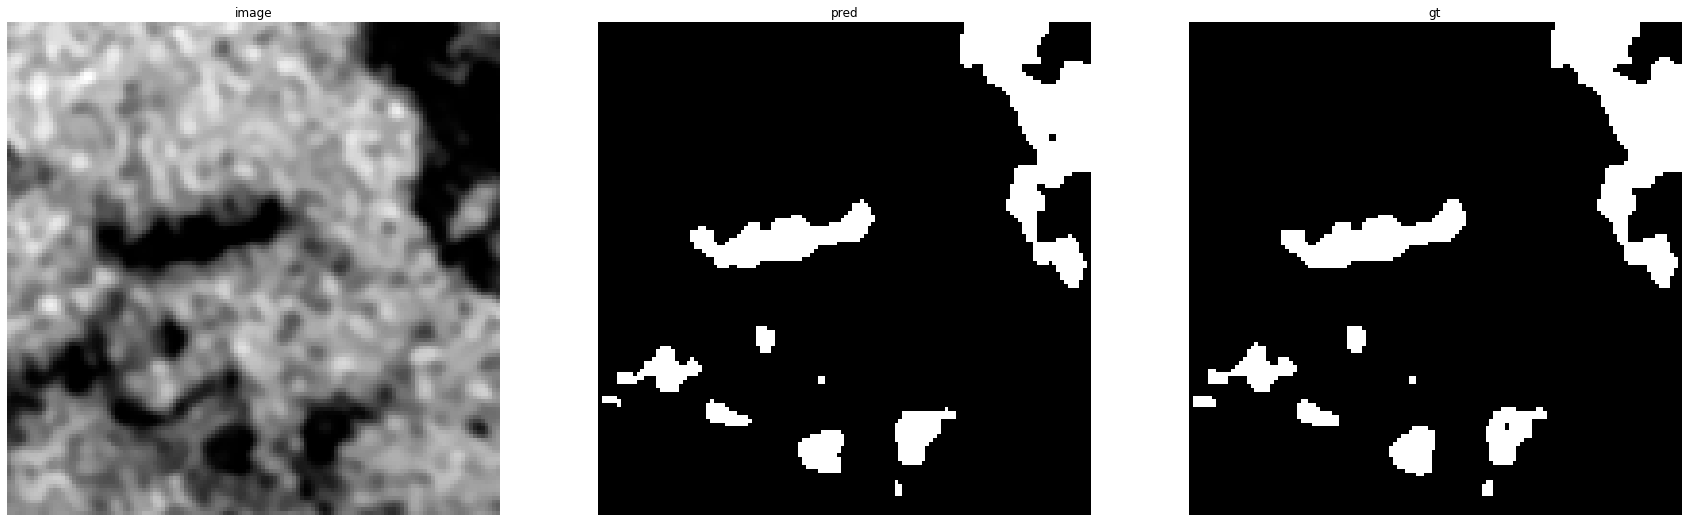

accuracy    : 0.99371337890625
precision   : 0.9919224555735057
recall      : 0.9544041450777202
f1          : 0.9728016899920782
pr_auc      : 0.9982213708718137
iou         : 0.9470437017994858


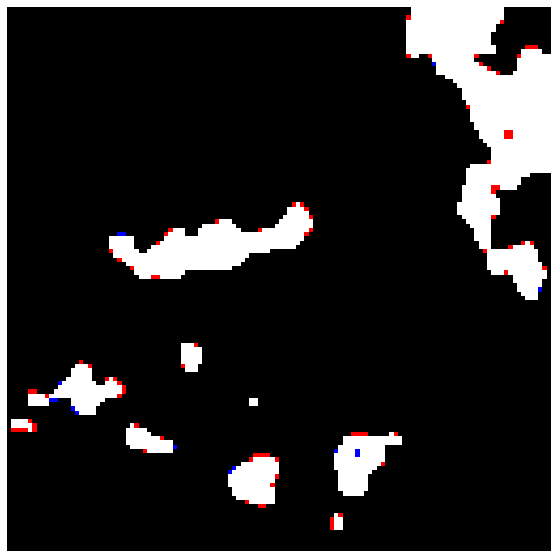

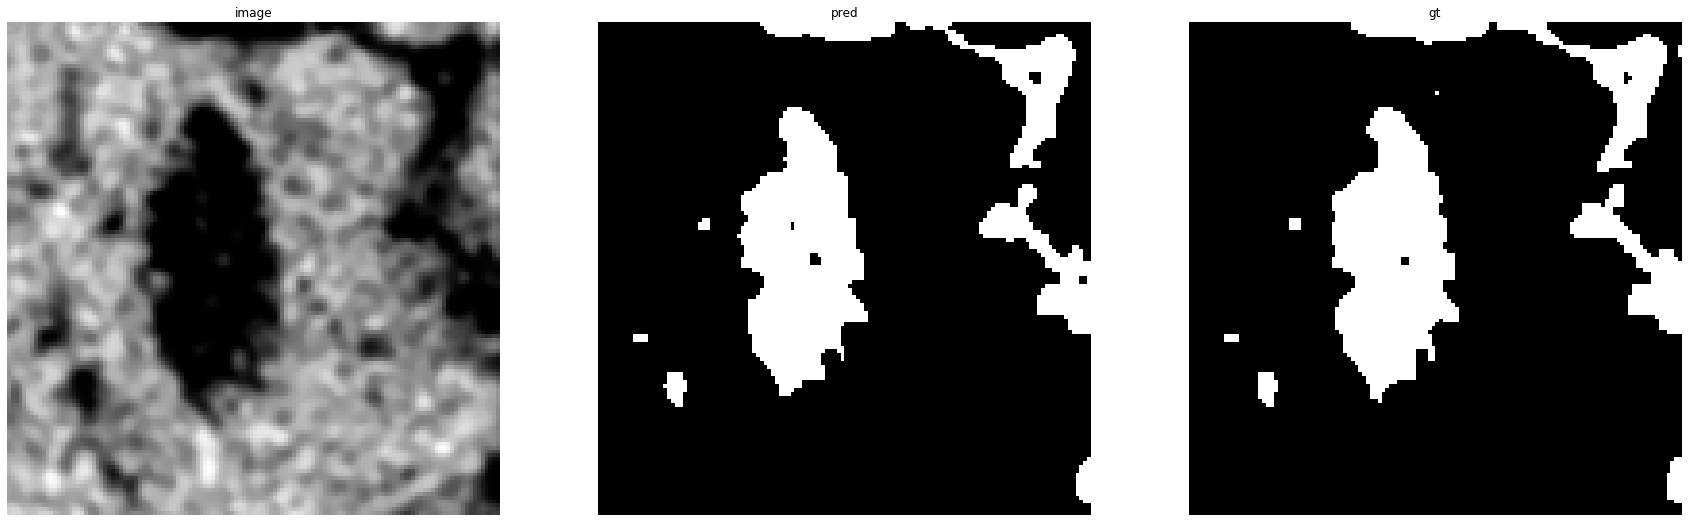

accuracy    : 0.99261474609375
precision   : 0.9904067536454336
recall      : 0.9641389615240942
f1          : 0.977096346772667
pr_auc      : 0.9986101900250435
iou         : 0.9552183567727609


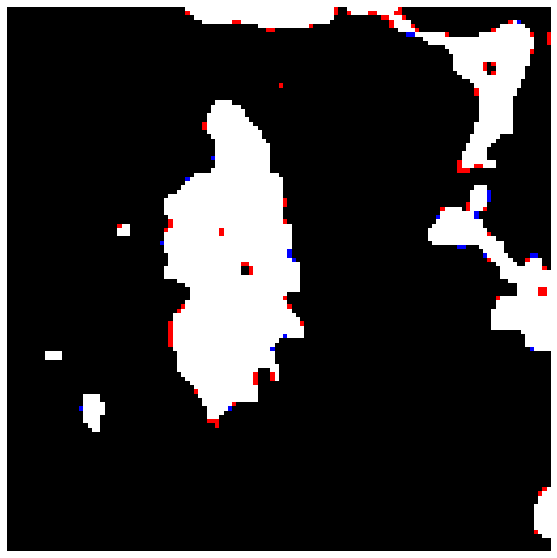

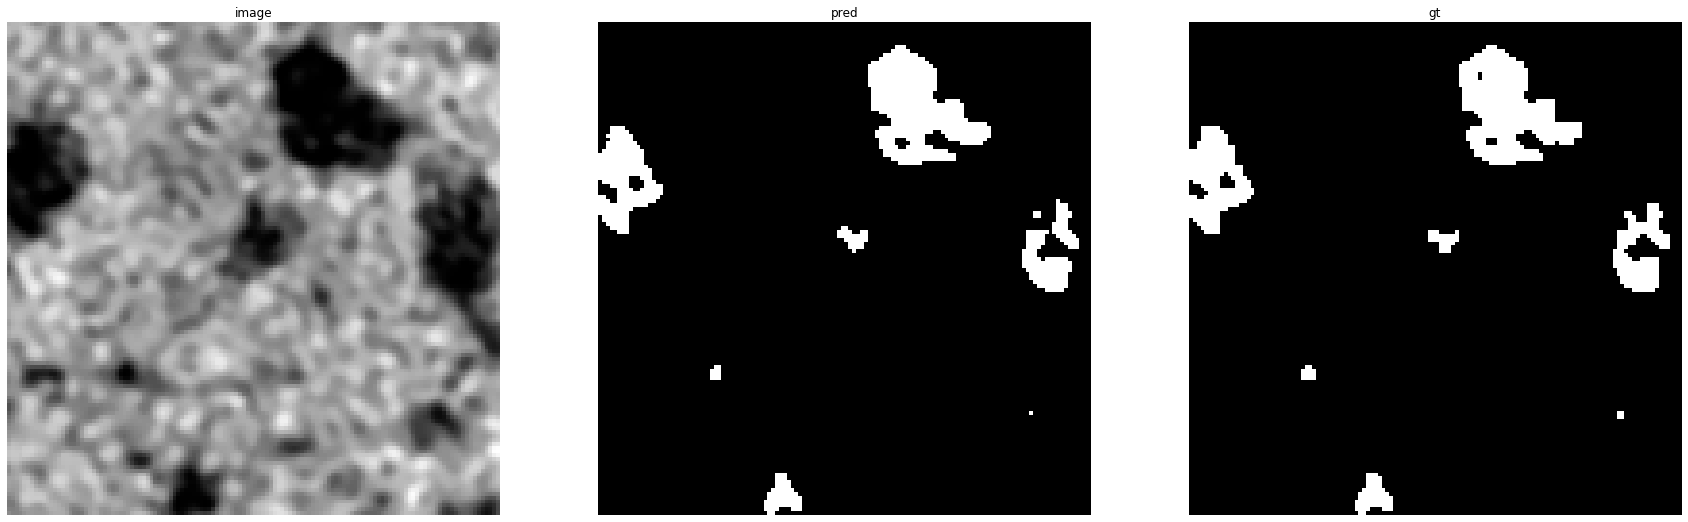

accuracy    : 0.9949951171875
precision   : 0.9789184234647113
recall      : 0.9476486246672582
f1          : 0.9630297565374211
pr_auc      : 0.9967576043712124
iou         : 0.928695652173913


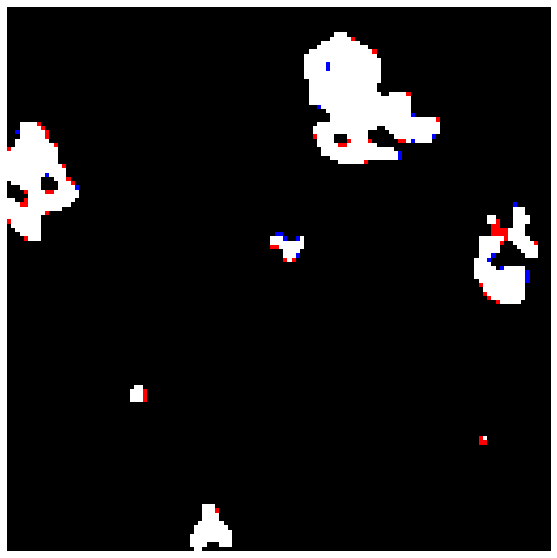

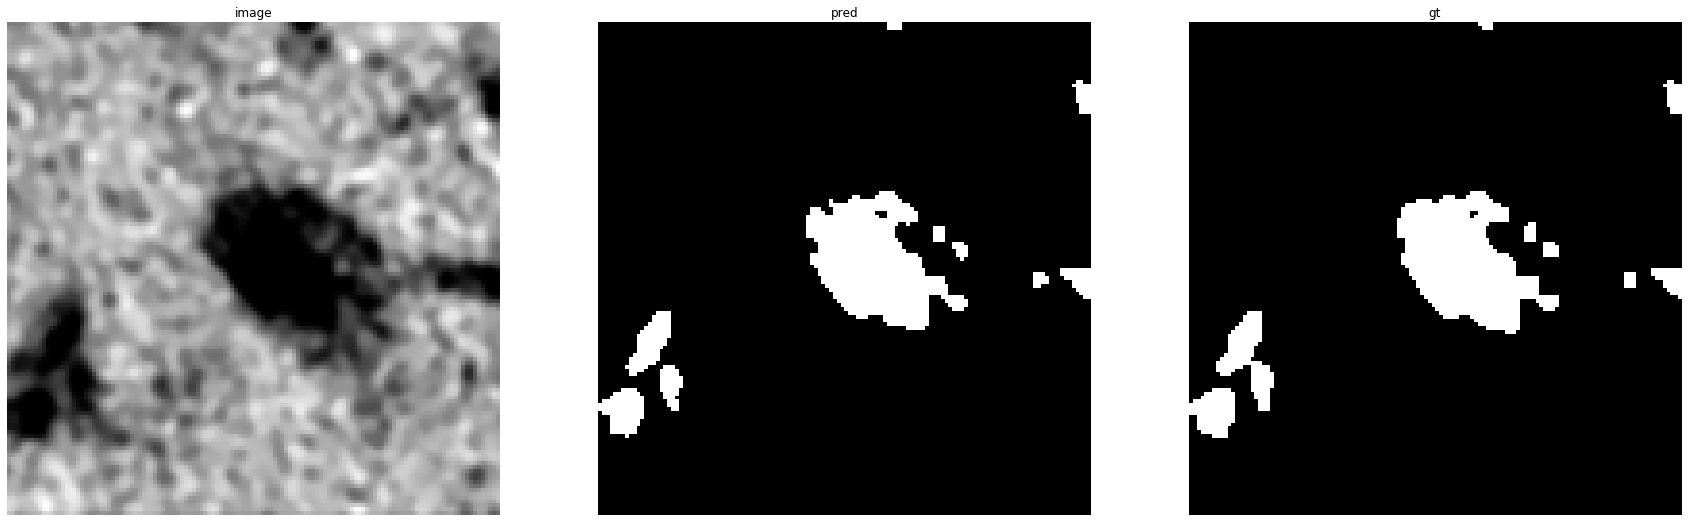

accuracy    : 0.99517822265625
precision   : 0.9926470588235294
recall      : 0.9455252918287937
f1          : 0.968513351933041
pr_auc      : 0.998142254824048
iou         : 0.9389489953632149


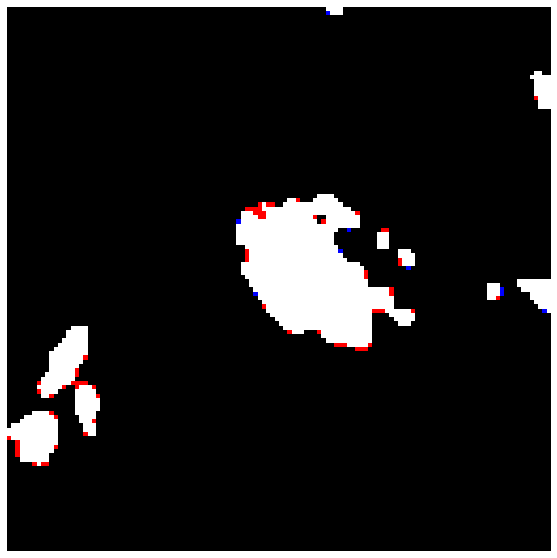

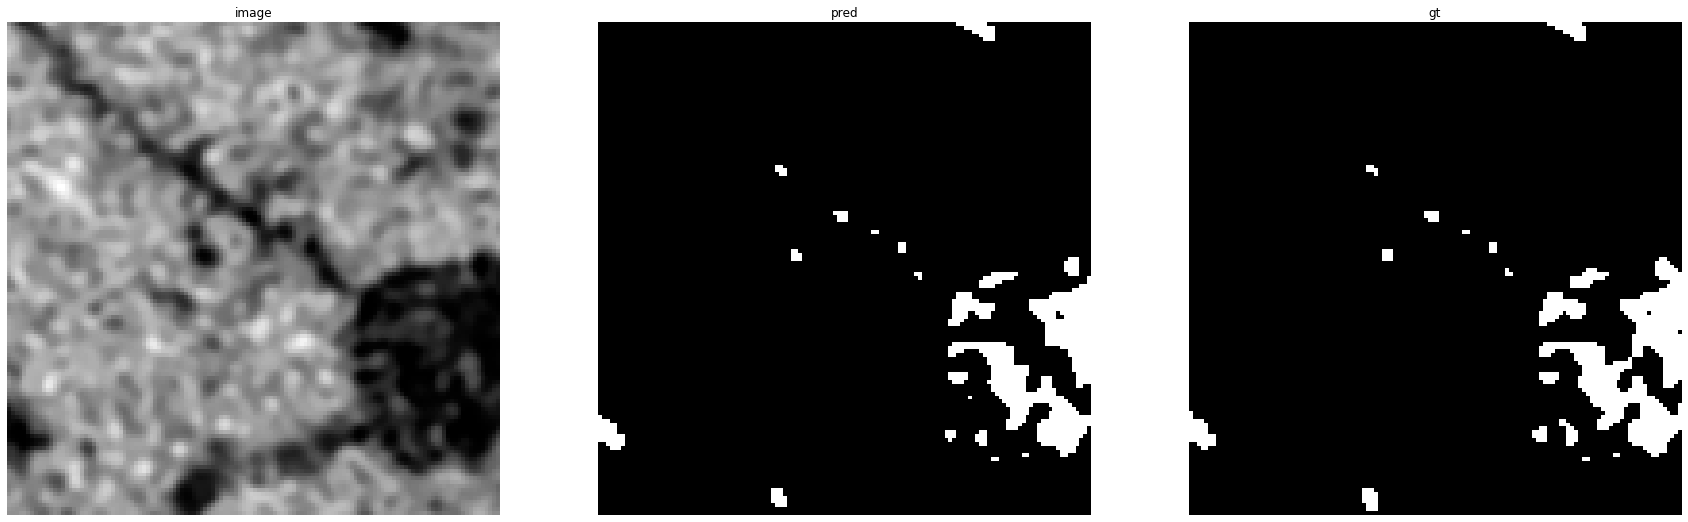

accuracy    : 0.9930419921875
precision   : 0.9872685185185185
recall      : 0.8922594142259415
f1          : 0.9373626373626374
pr_auc      : 0.991185302626135
iou         : 0.8821096173733195


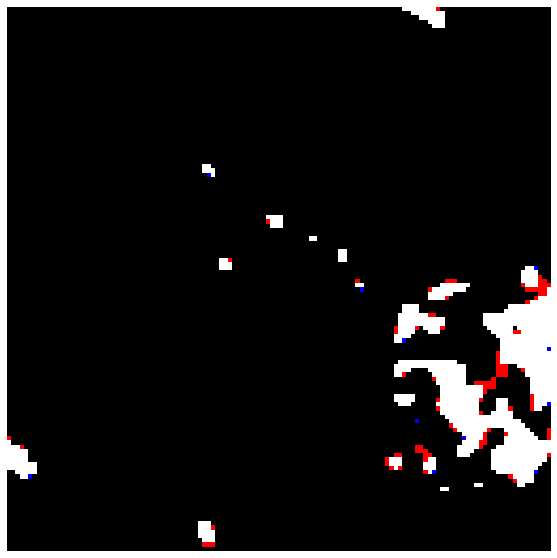

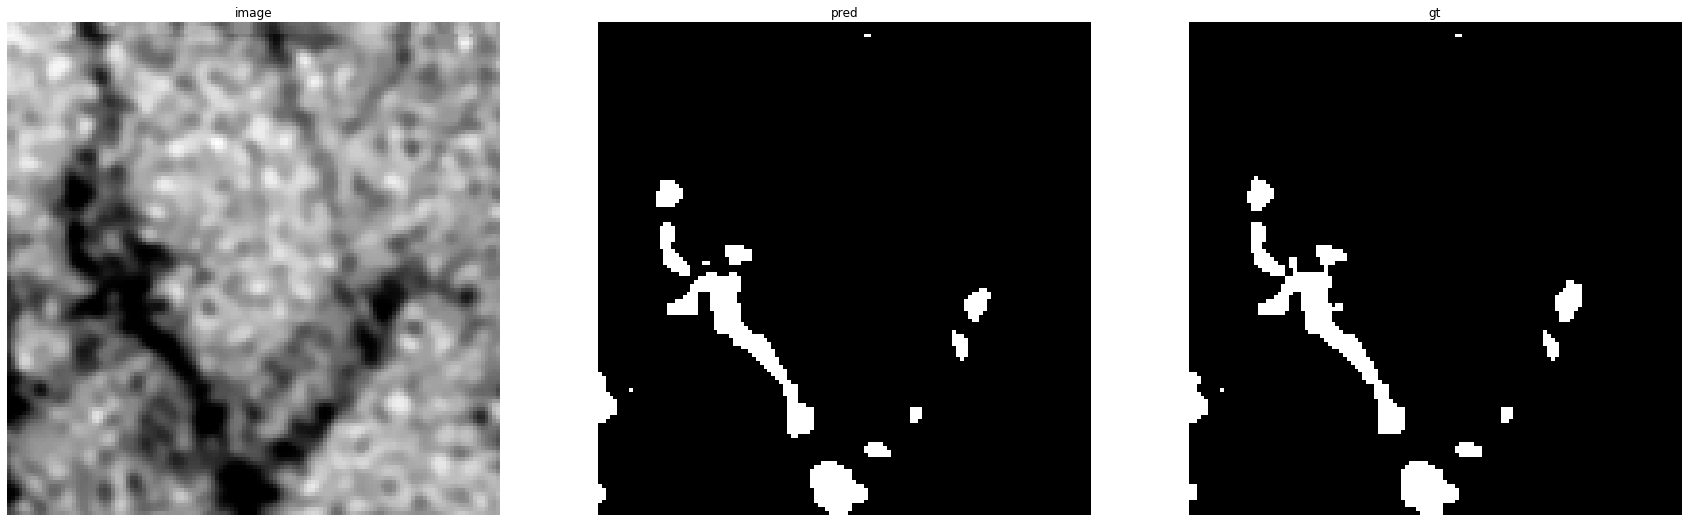

accuracy    : 0.99554443359375
precision   : 0.9853137516688919
recall      : 0.9225
f1          : 0.9528728211749515
pr_auc      : 0.994857270479459
iou         : 0.9099876695437731


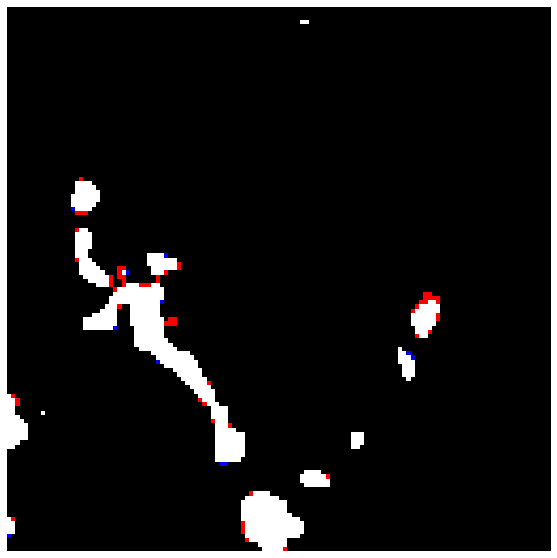

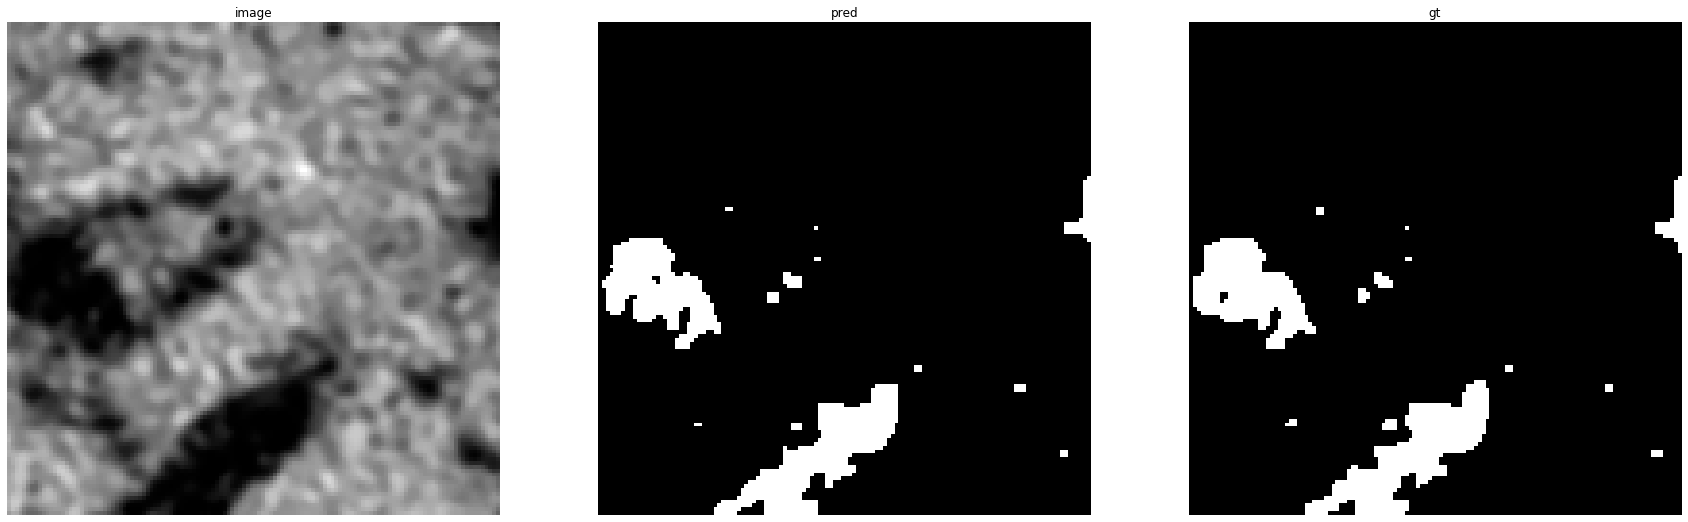

accuracy    : 0.99359130859375
precision   : 0.9821580288870009
recall      : 0.932258064516129
f1          : 0.9565577161770791
pr_auc      : 0.9958743242224505
iou         : 0.9167327517842981


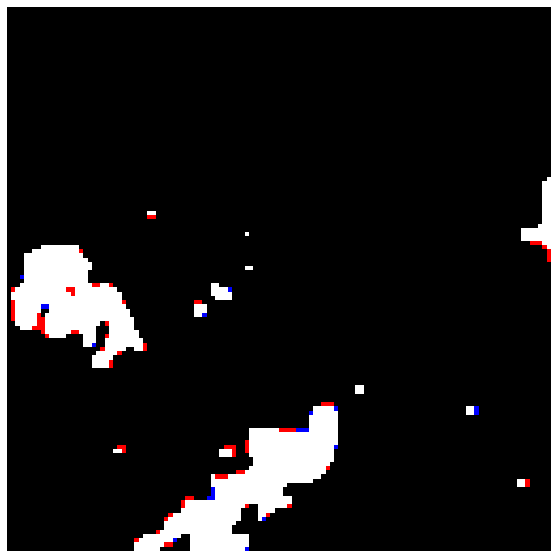

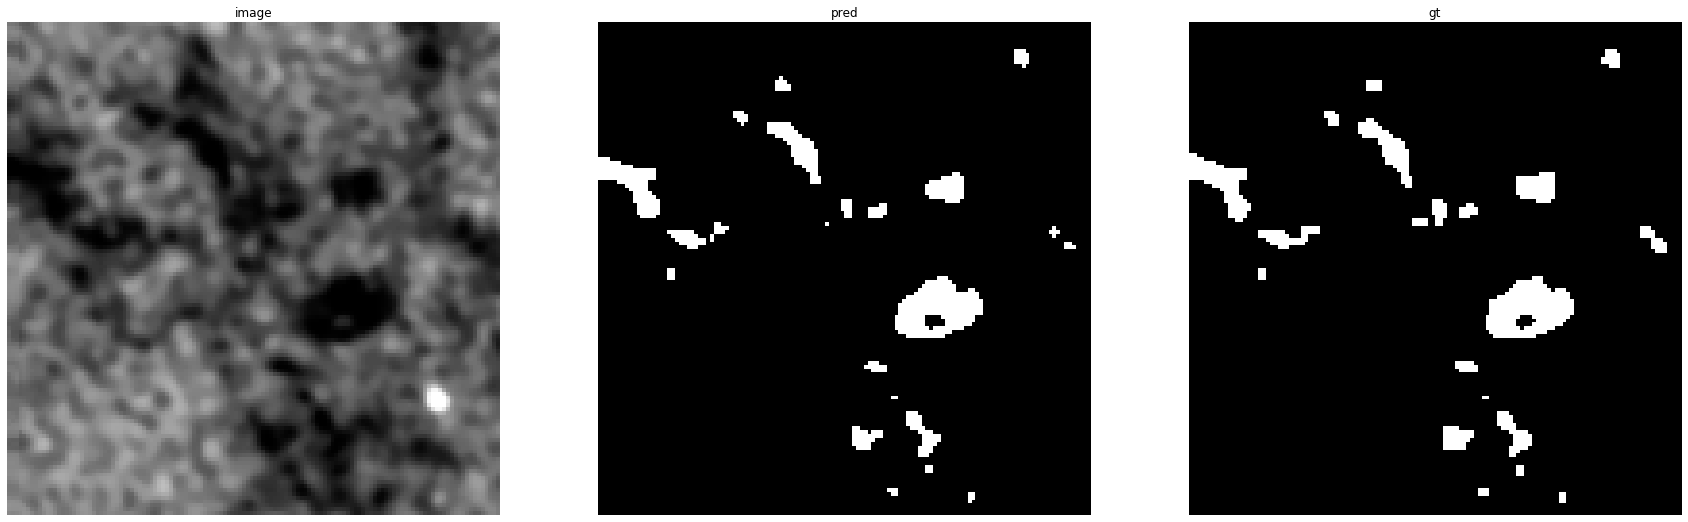

accuracy    : 0.99322509765625
precision   : 0.9800266311584553
recall      : 0.8846153846153846
f1          : 0.9298799747315224
pr_auc      : 0.9902255340281826
iou         : 0.8689492325855962


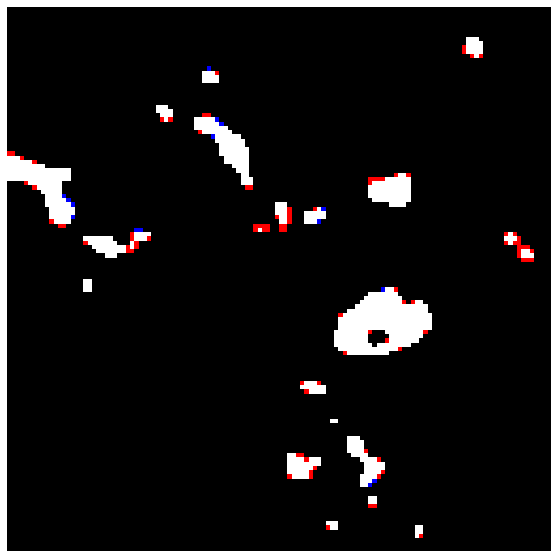

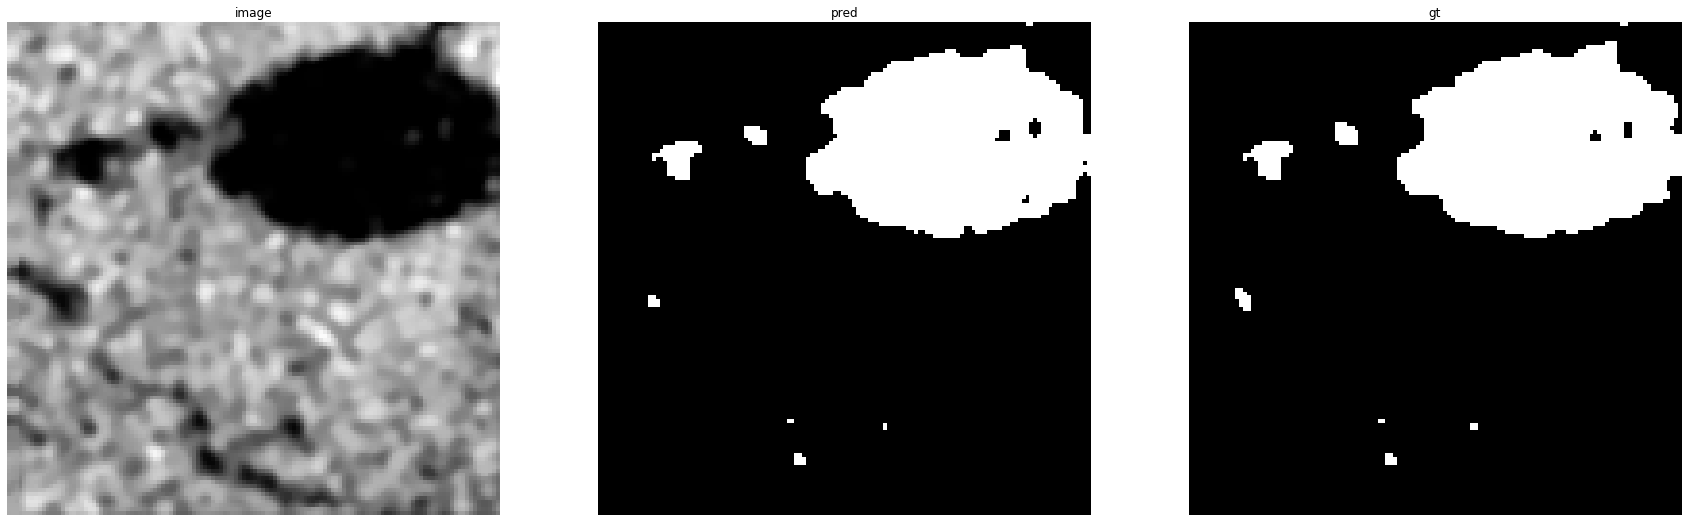

accuracy    : 0.99566650390625
precision   : 0.9982123703968537
recall      : 0.9769069279216235
f1          : 0.987444739168877
pr_auc      : 0.9997115624254153
iou         : 0.9752008382815229


Prediction for TeTree_subset1:


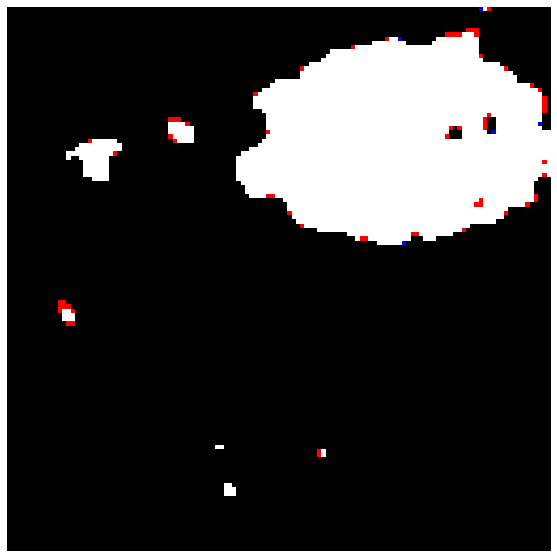

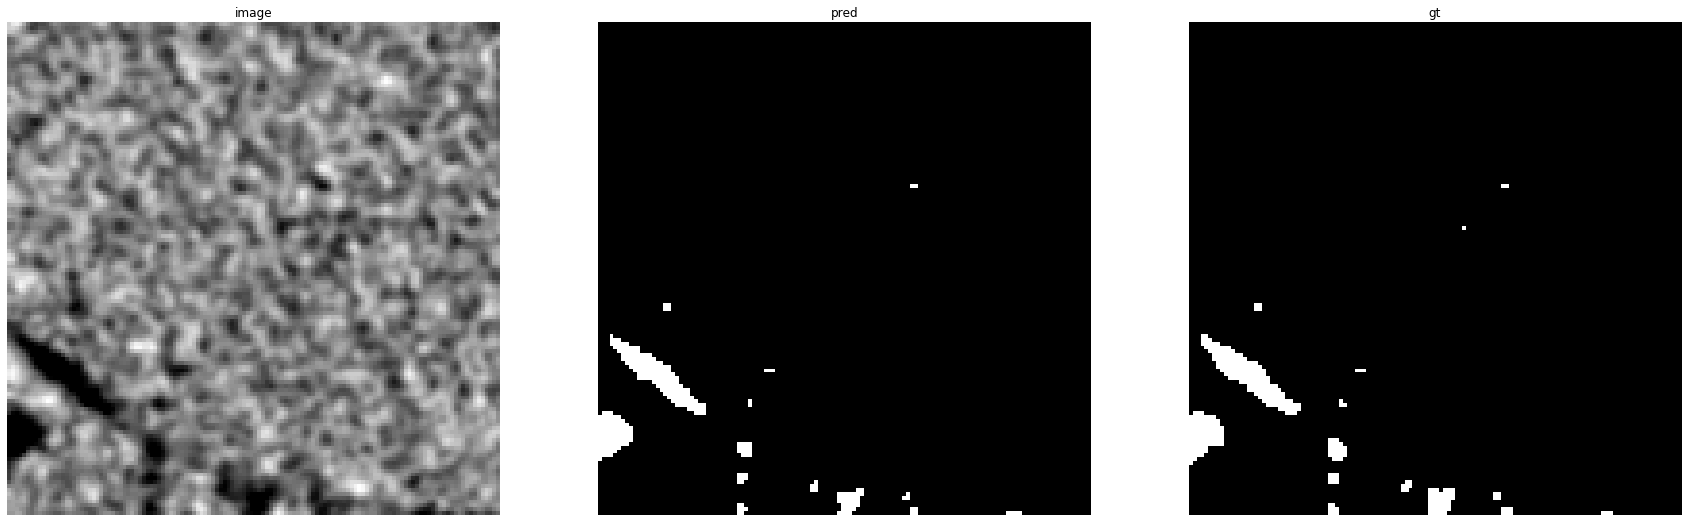

accuracy    : 0.99700927734375
precision   : 0.9938461538461538
recall      : 0.8729729729729729
f1          : 0.9294964028776979
pr_auc      : 0.9950954490580783
iou         : 0.8682795698924731


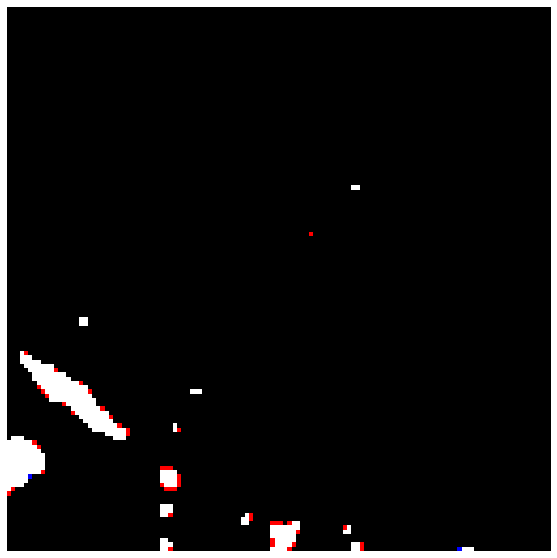

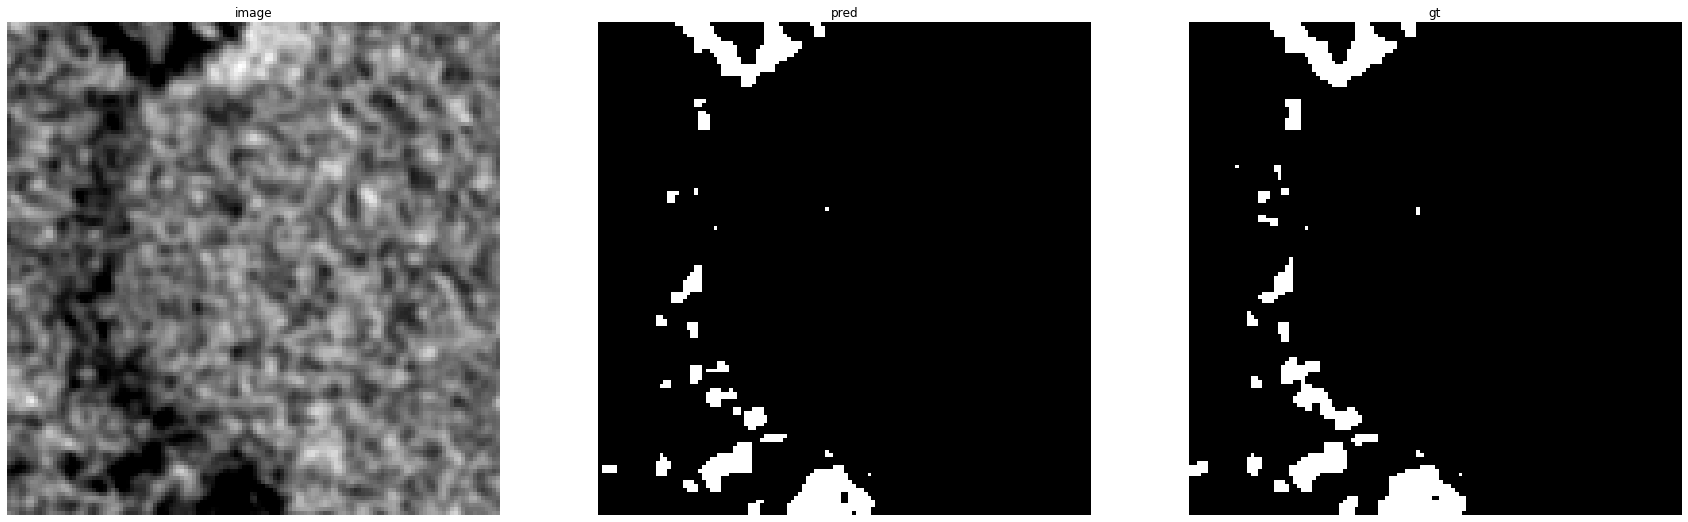

accuracy    : 0.98895263671875
precision   : 0.9947229551451188
recall      : 0.8098818474758325
f1          : 0.8928359976317347
pr_auc      : 0.991867179752648
iou         : 0.8064171122994652


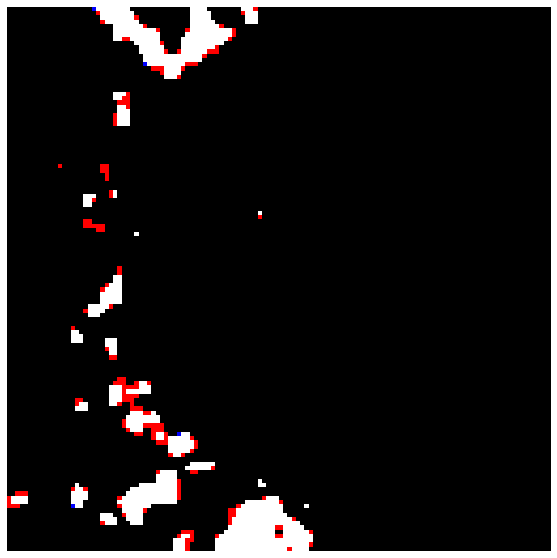

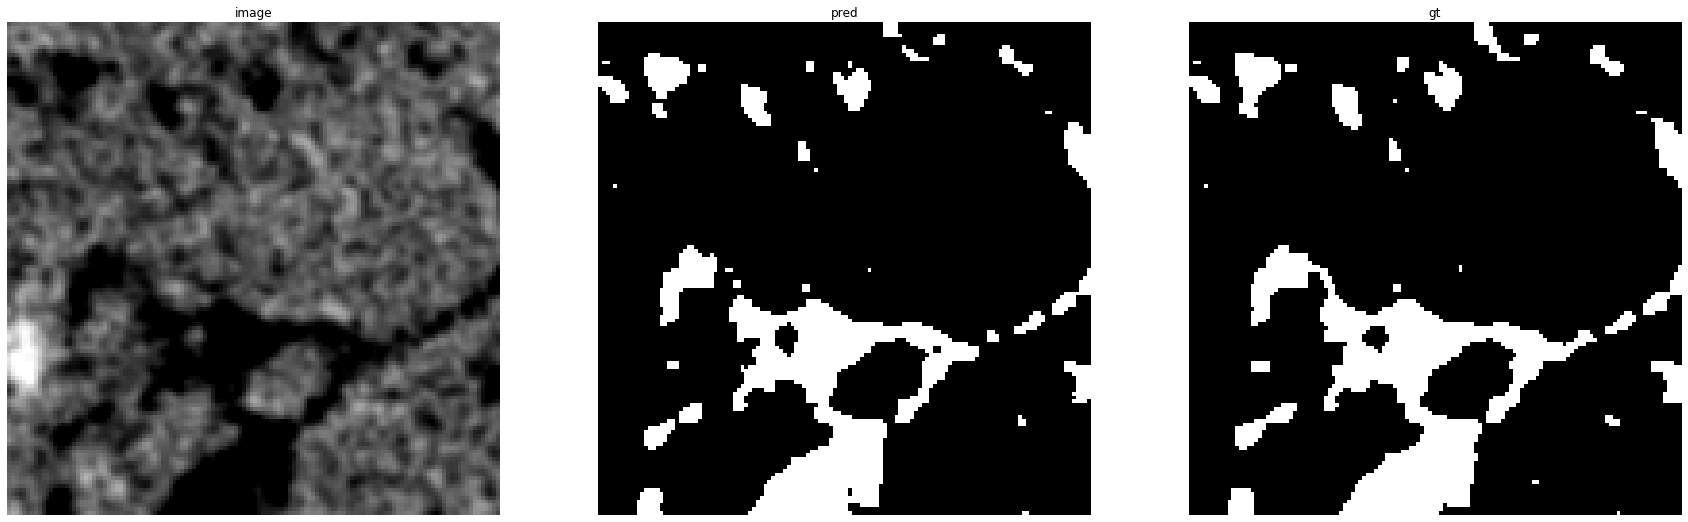

accuracy    : 0.9837646484375
precision   : 0.9956859361518551
recall      : 0.9001560062402496
f1          : 0.9455141335518231
pr_auc      : 0.9971378700068213
iou         : 0.8966588966588966


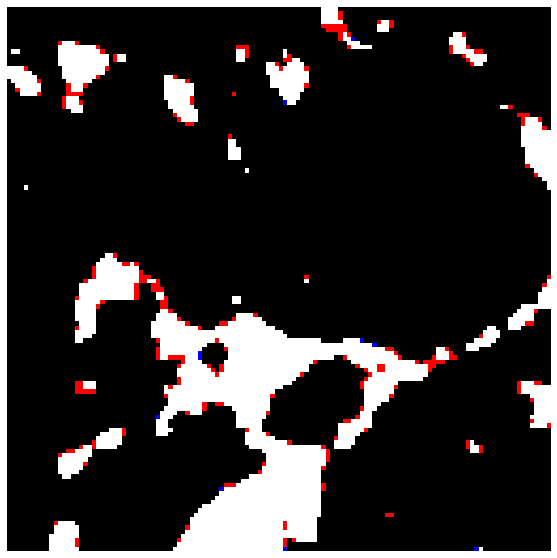

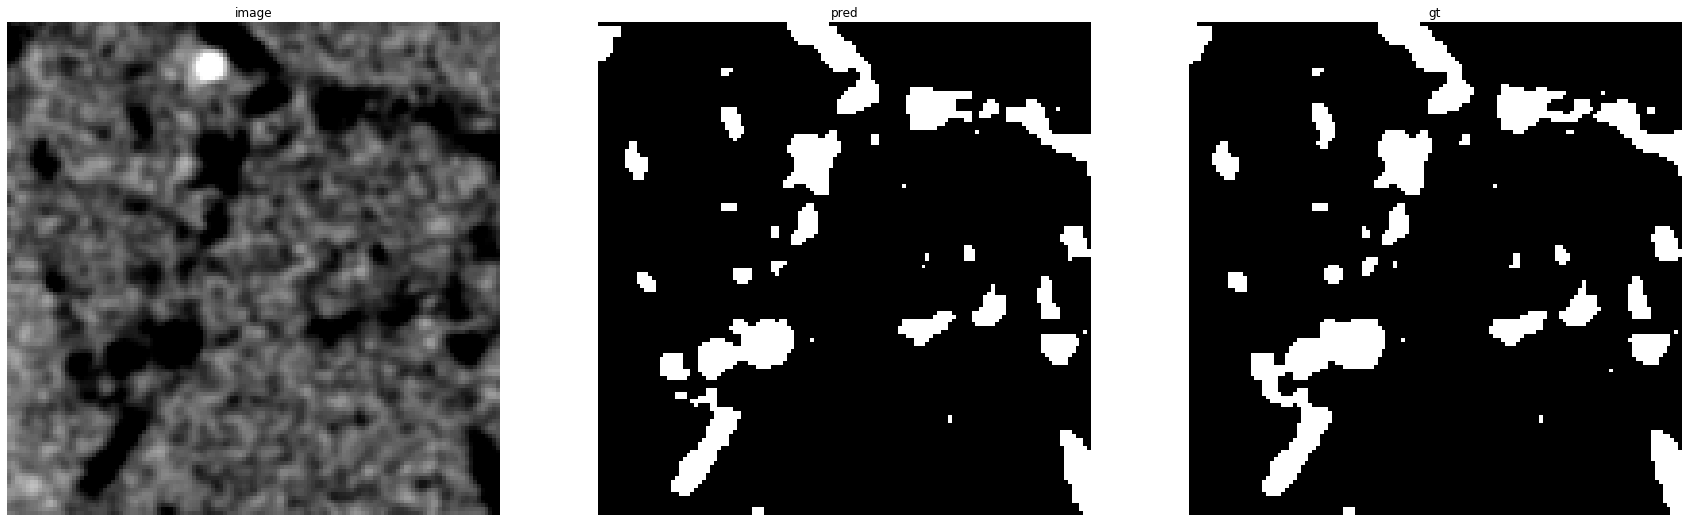

accuracy    : 0.98565673828125
precision   : 0.9978213507625272
recall      : 0.8880271449345614
f1          : 0.9397281354193383
pr_auc      : 0.9964051337581865
iou         : 0.8863086598935656


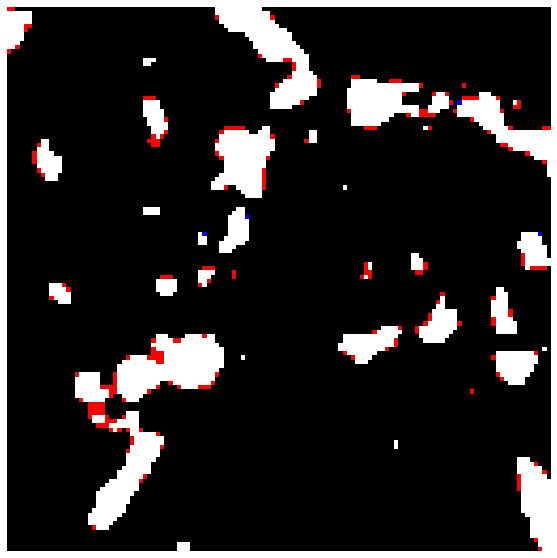

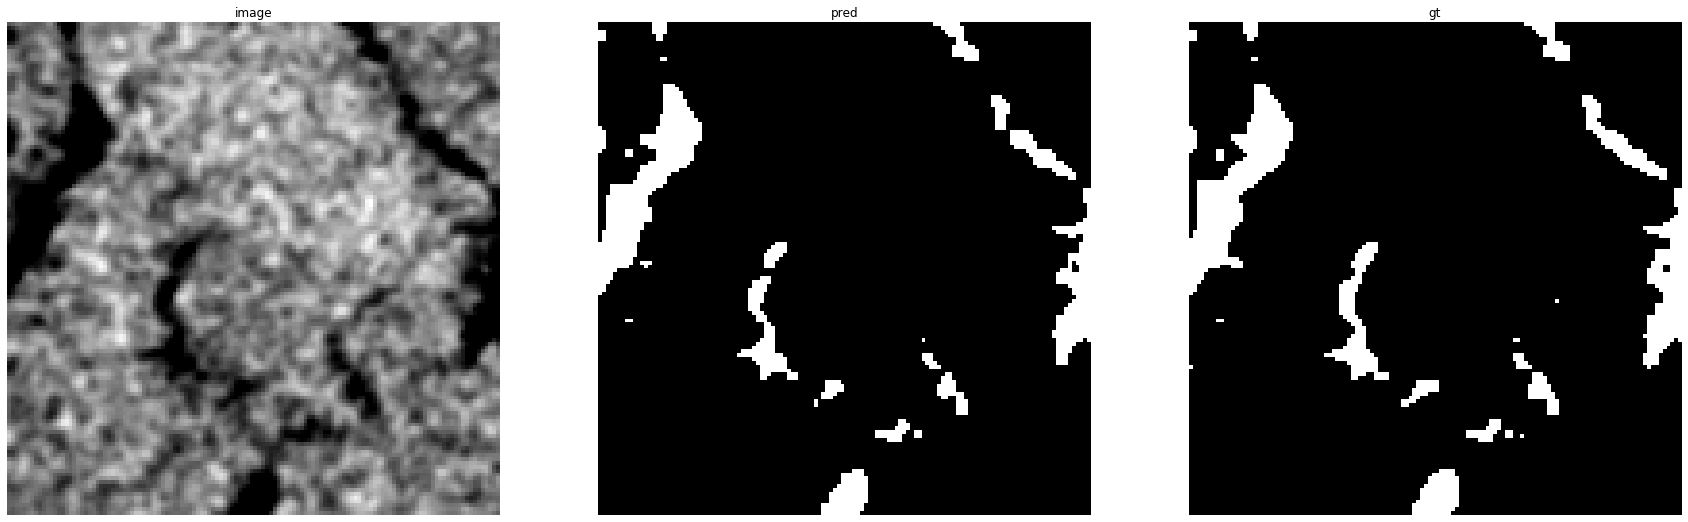

accuracy    : 0.99127197265625
precision   : 0.9946889226100152
recall      : 0.9060124395300622
f1          : 0.9482820976491864
pr_auc      : 0.9973162507678117
iou         : 0.9016506189821183


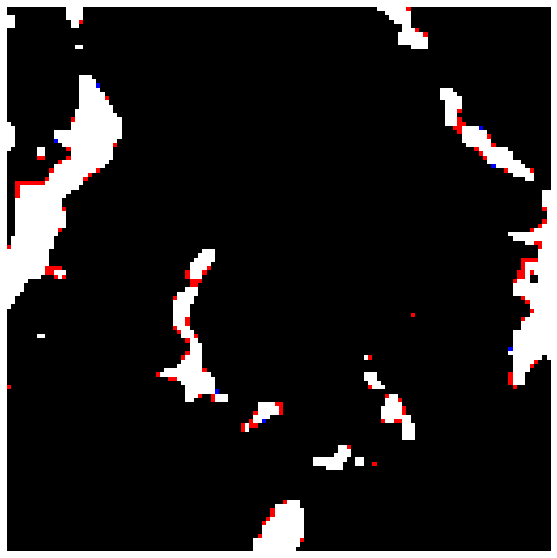

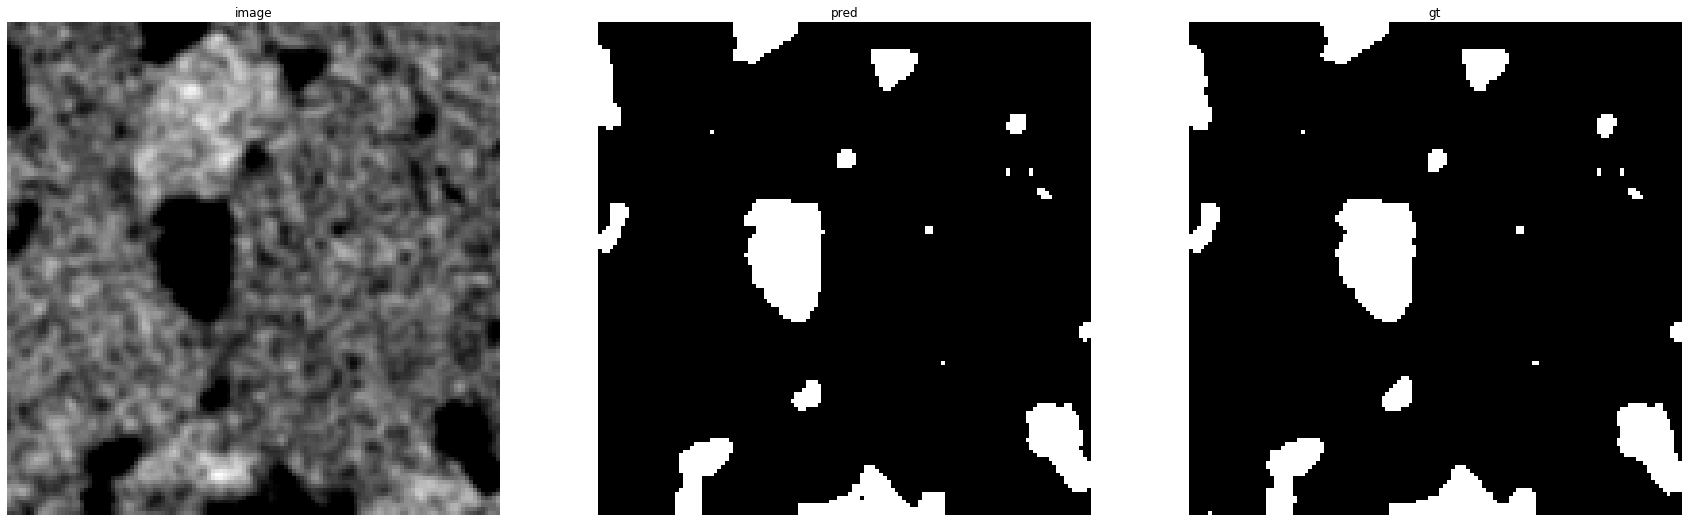

accuracy    : 0.99420166015625
precision   : 0.9963547995139733
recall      : 0.9485251590514748
f1          : 0.971851851851852
pr_auc      : 0.9990368104298032
iou         : 0.9452449567723343


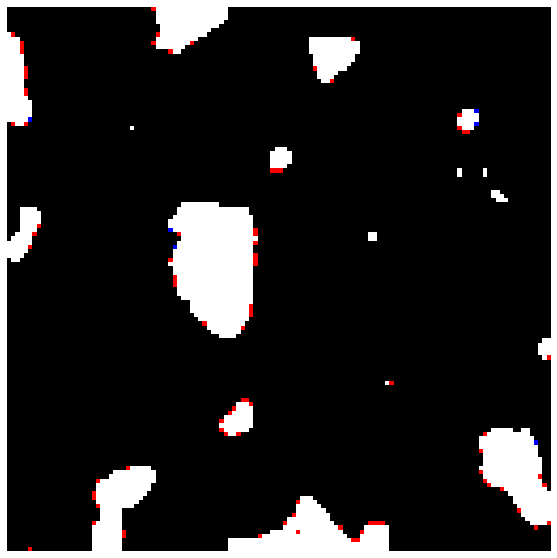

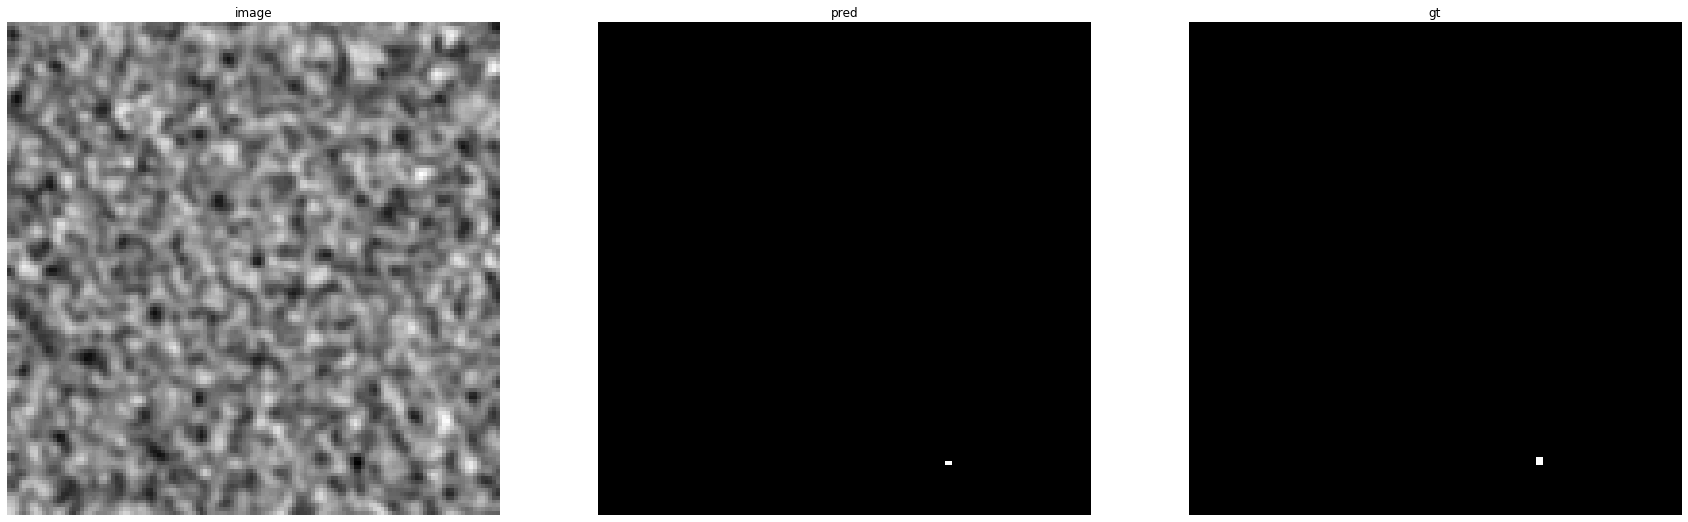

accuracy    : 0.9998779296875
precision   : 1.0
recall      : 0.5
f1          : 0.6666666666666666
pr_auc      : 1.0
iou         : 0.5


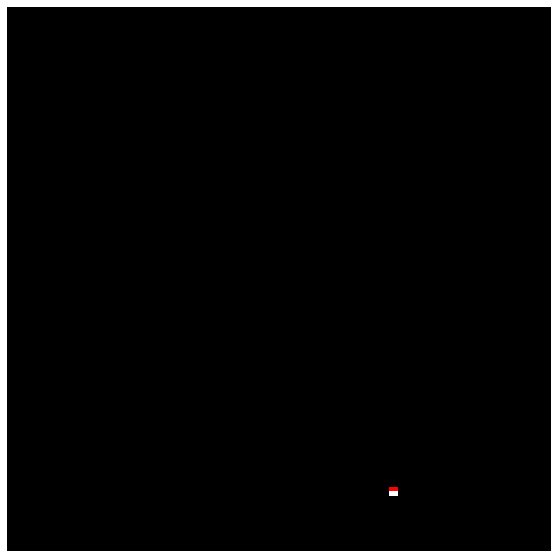

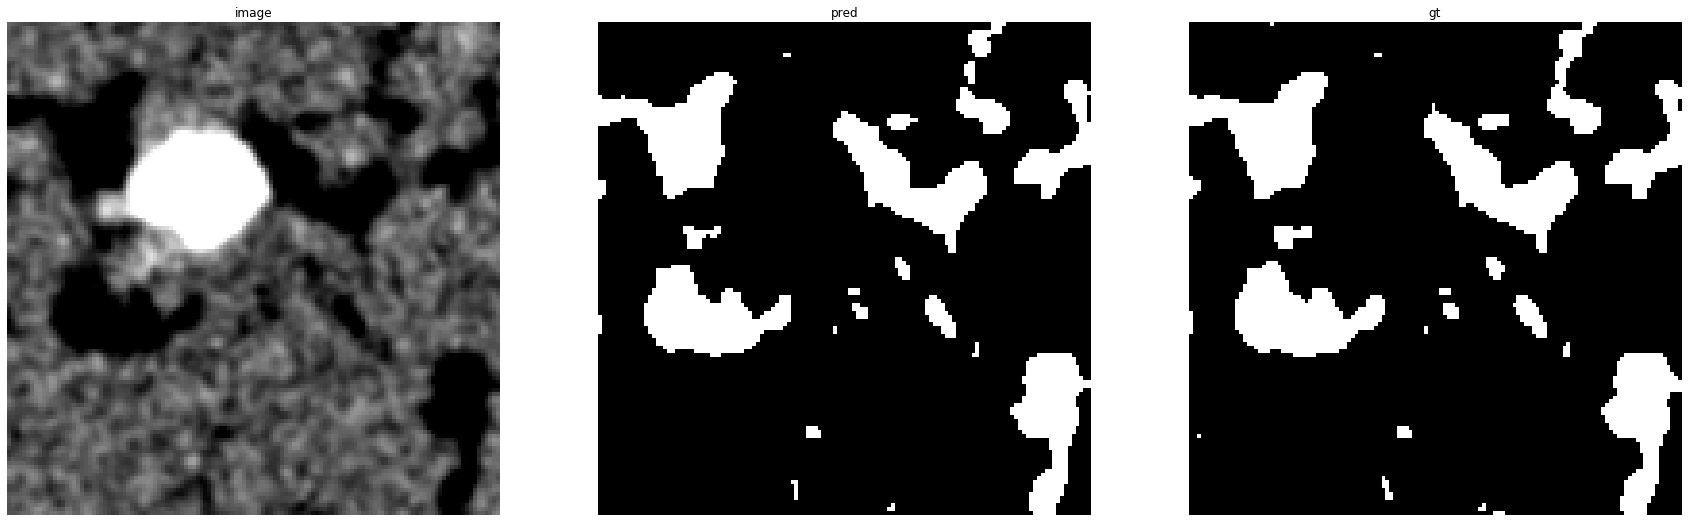

accuracy    : 0.9893798828125
precision   : 0.9981089258698941
recall      : 0.9398148148148148
f1          : 0.9680851063829787
pr_auc      : 0.999187520517864
iou         : 0.9381443298969072


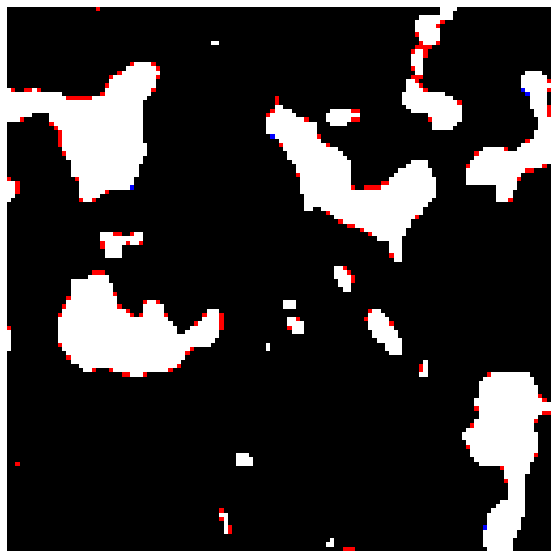

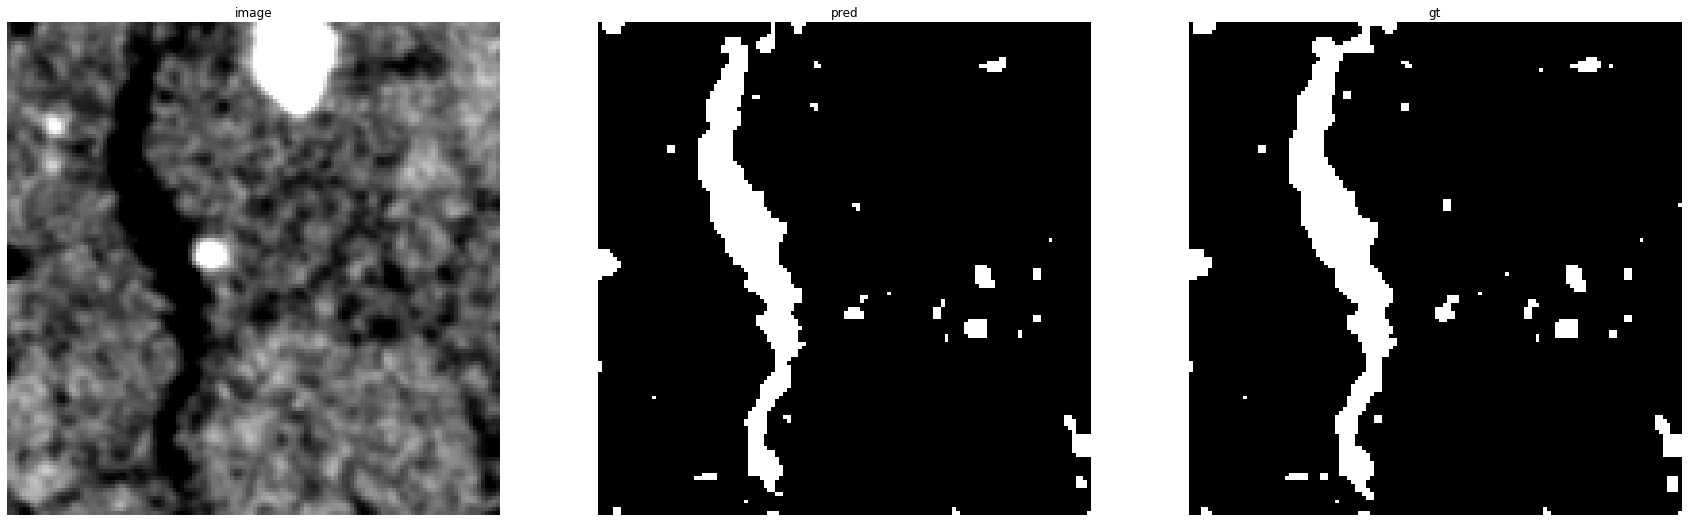

accuracy    : 0.99114990234375
precision   : 0.9977443609022556
recall      : 0.9033356024506467
f1          : 0.9481957842086459
pr_auc      : 0.9975809237334751
iou         : 0.9014945652173914


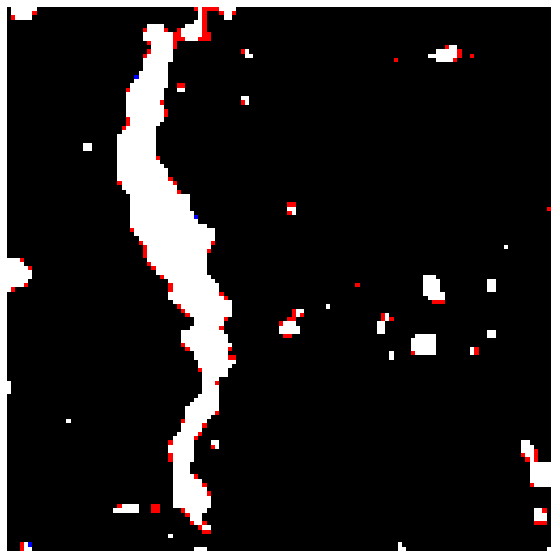

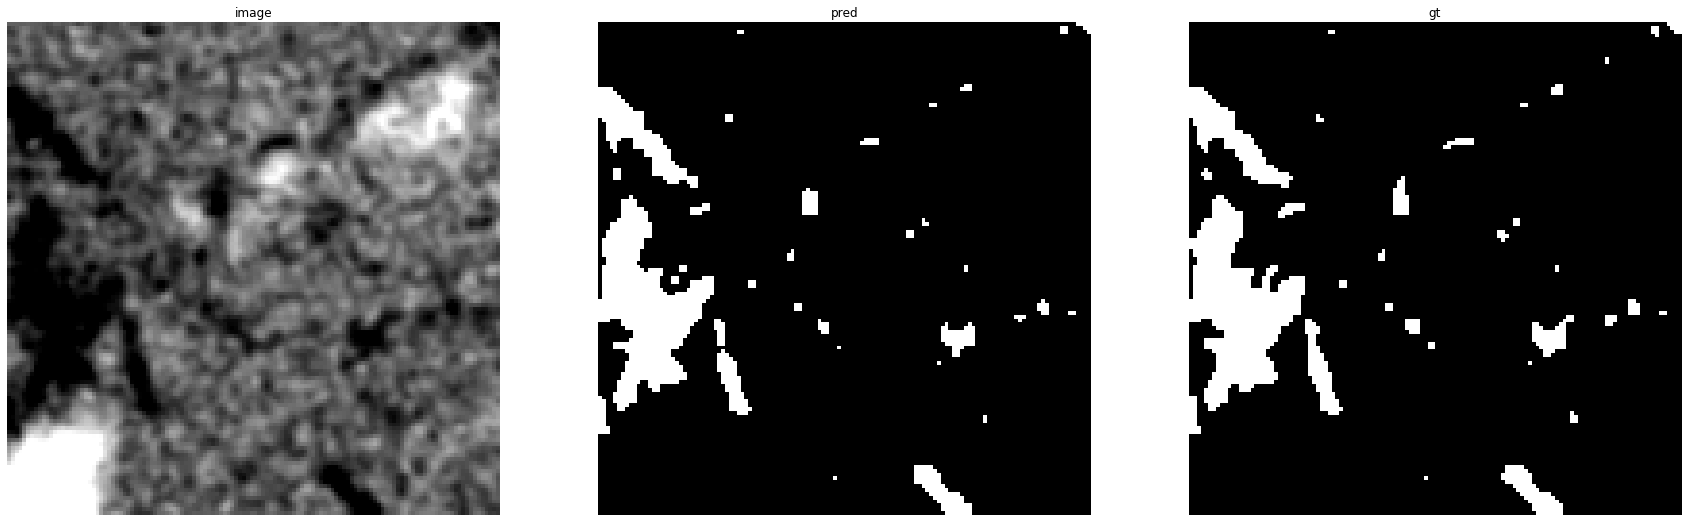

accuracy    : 0.99102783203125
precision   : 0.9978134110787172
recall      : 0.9048248512888302
f1          : 0.949046793760832
pr_auc      : 0.9973848376315643
iou         : 0.9030343007915568


Prediction for TiTree_subset2:


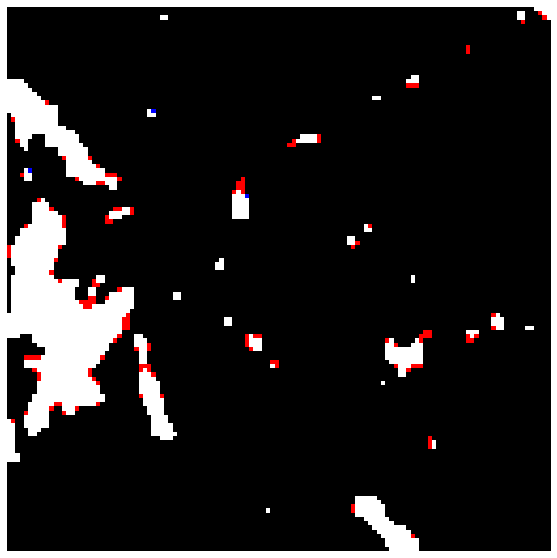

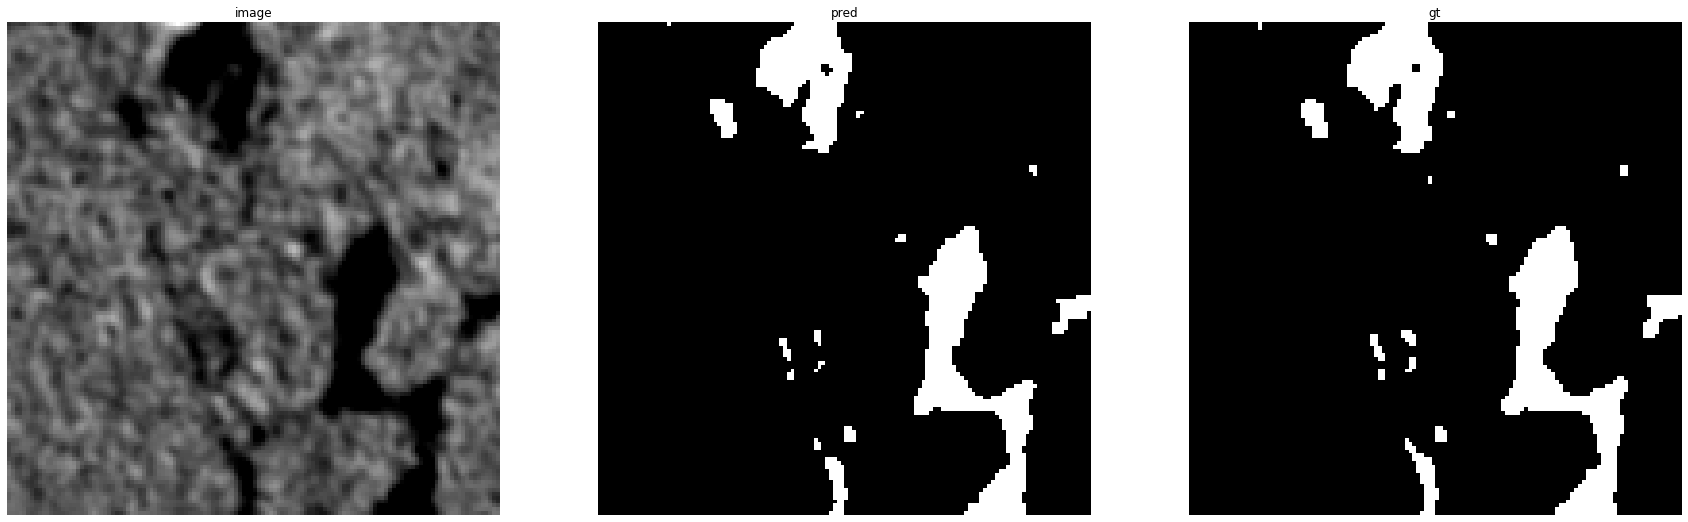

accuracy    : 0.99261474609375
precision   : 0.9993523316062176
recall      : 0.9278412507516537
f1          : 0.9622700342999688
pr_auc      : 0.9990585774429174
iou         : 0.9272836538461539


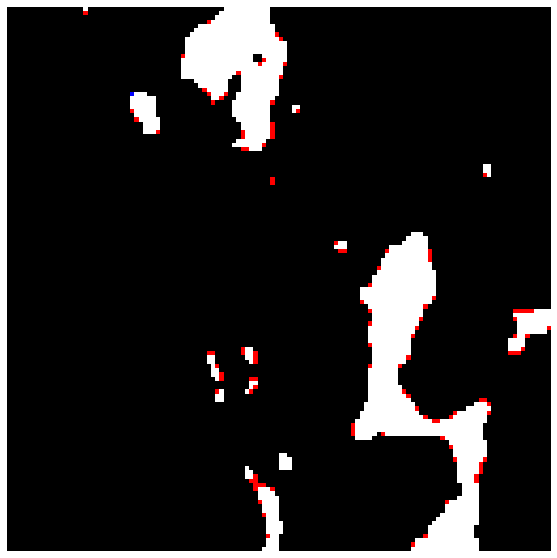

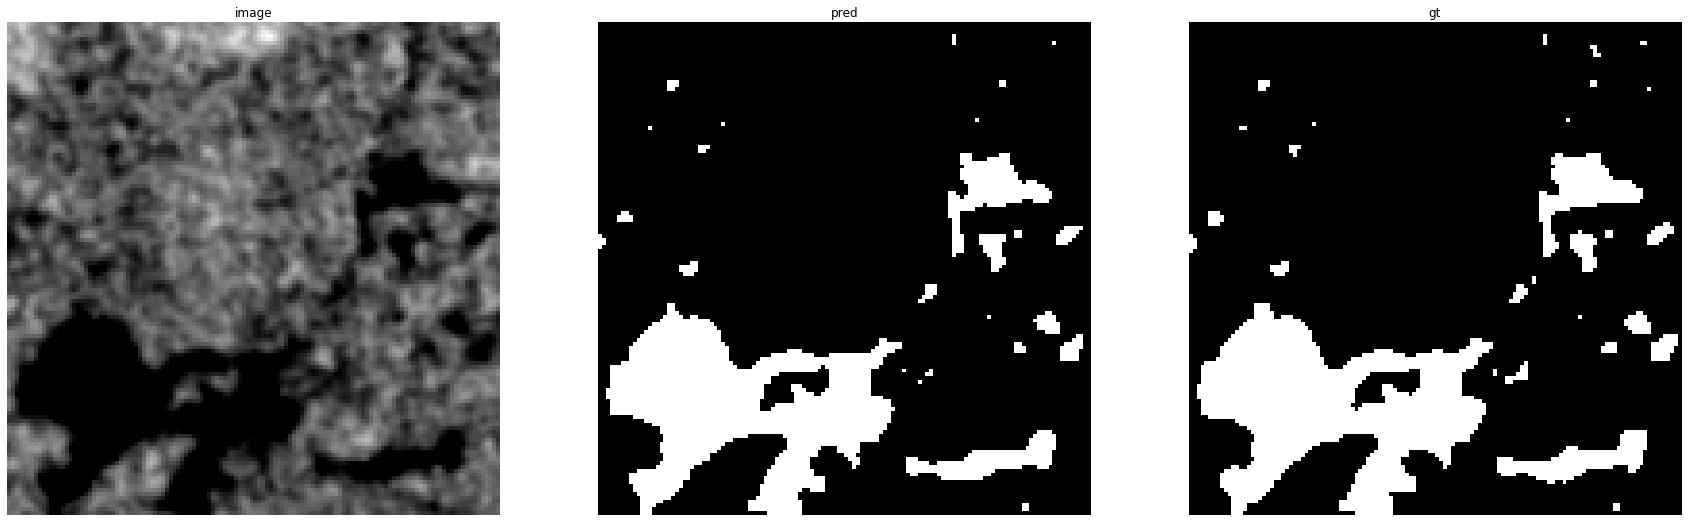

accuracy    : 0.98980712890625
precision   : 0.9985575189325641
recall      : 0.944406548431105
f1          : 0.9707274320771253
pr_auc      : 0.9991621447755288
iou         : 0.9431198910081744


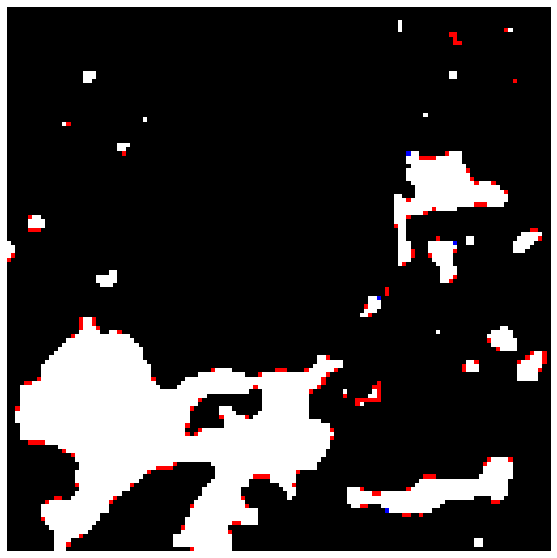

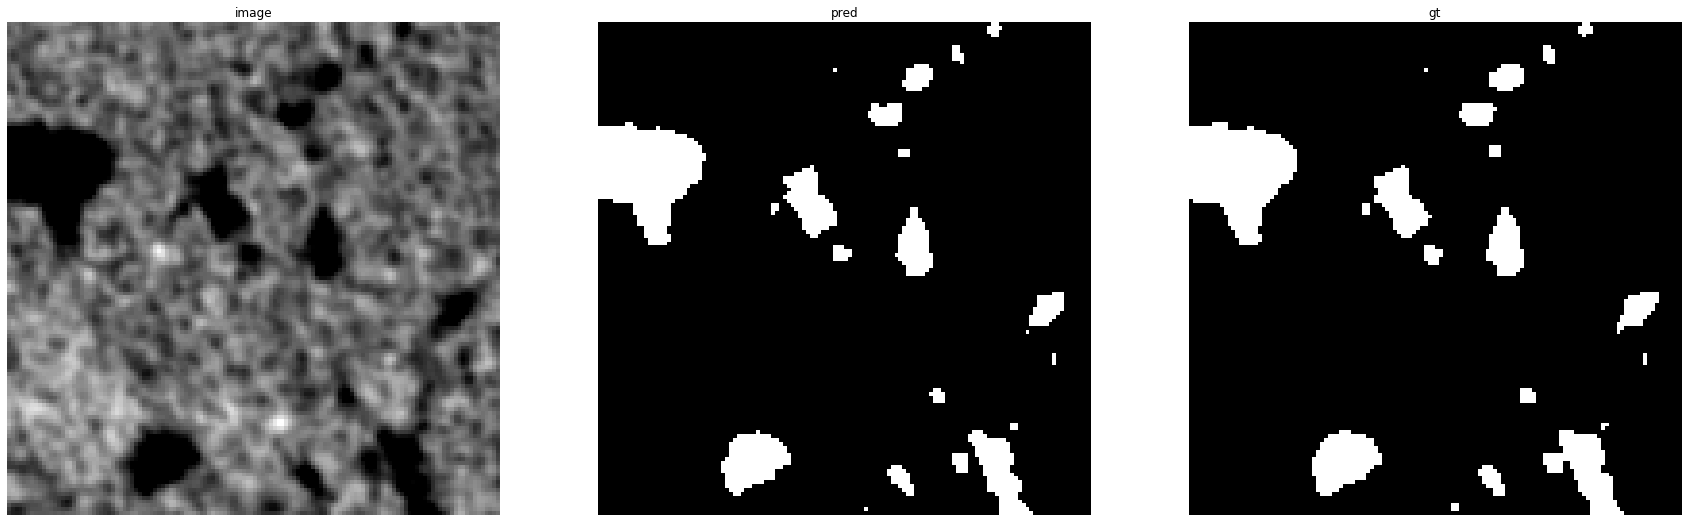

accuracy    : 0.99322509765625
precision   : 0.9979564032697548
recall      : 0.9313413858868405
f1          : 0.9634988490628084
pr_auc      : 0.9986478171258062
iou         : 0.9295685279187818


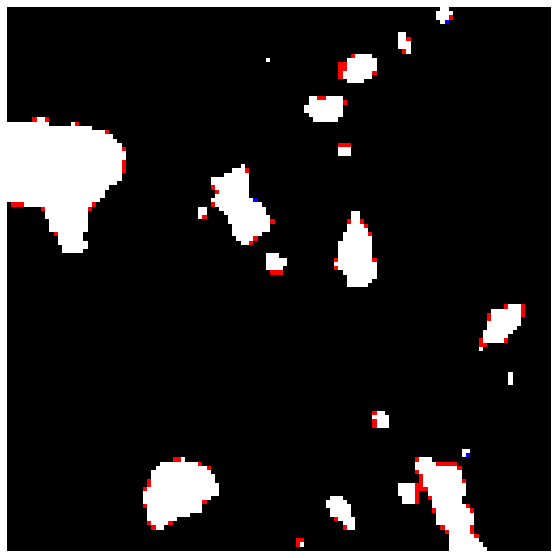

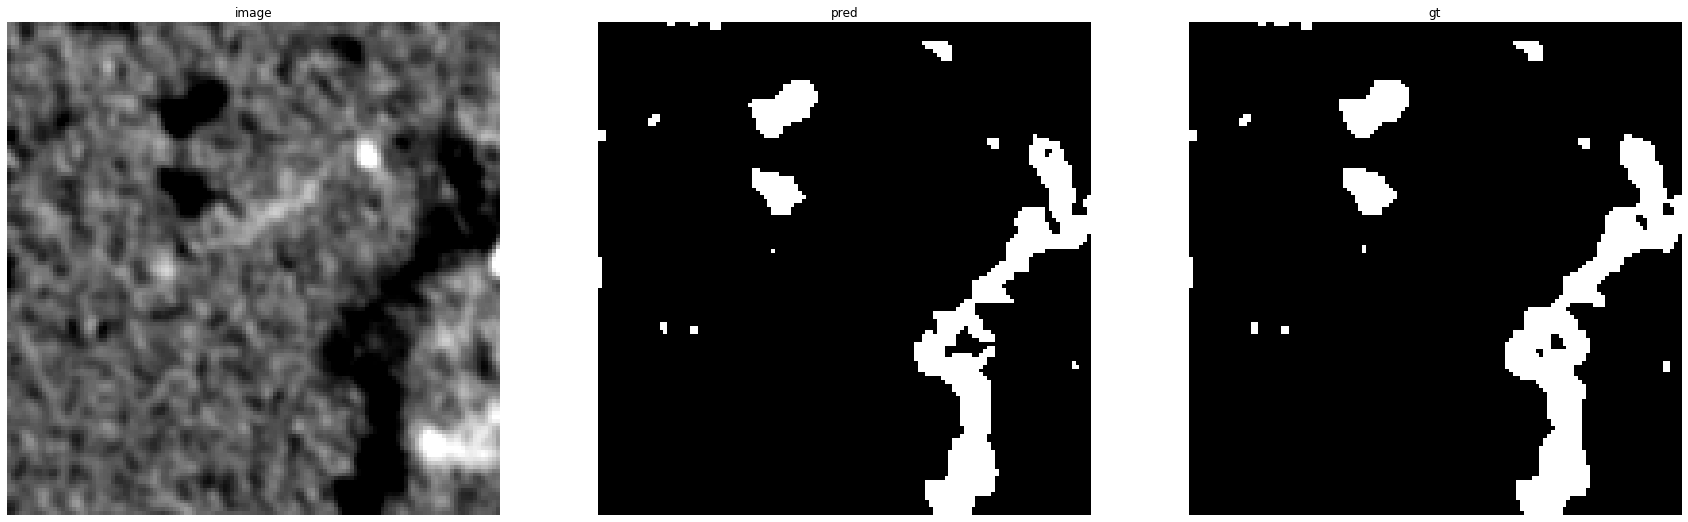

accuracy    : 0.98956298828125
precision   : 1.0
recall      : 0.8933250155957579
f1          : 0.943657331136738
pr_auc      : 0.9979558764688878
iou         : 0.8933250155957579


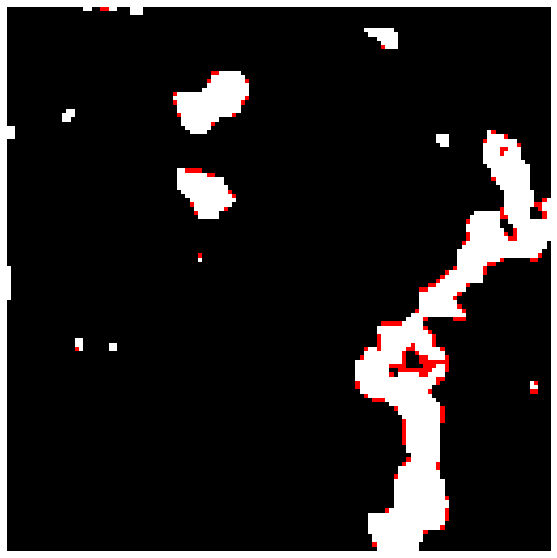

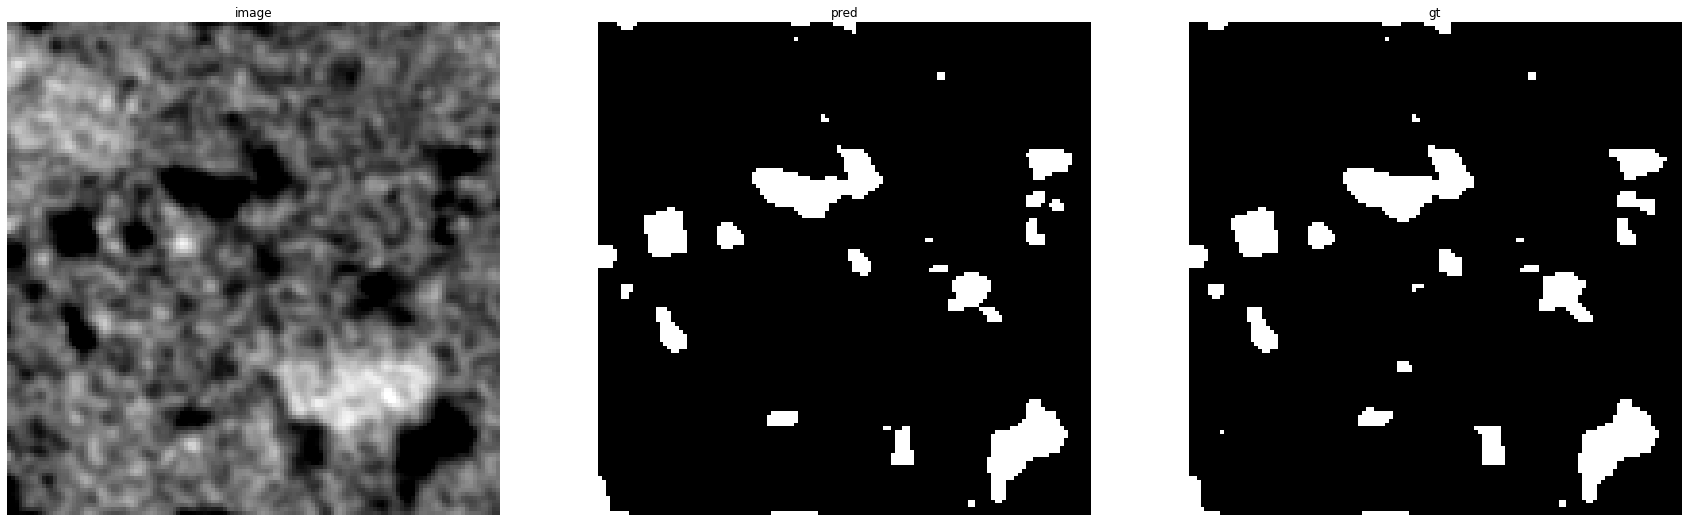

accuracy    : 0.99224853515625
precision   : 0.9983646770237122
recall      : 0.9071322436849926
f1          : 0.9505644219540678
pr_auc      : 0.9964698671825442
iou         : 0.905786350148368


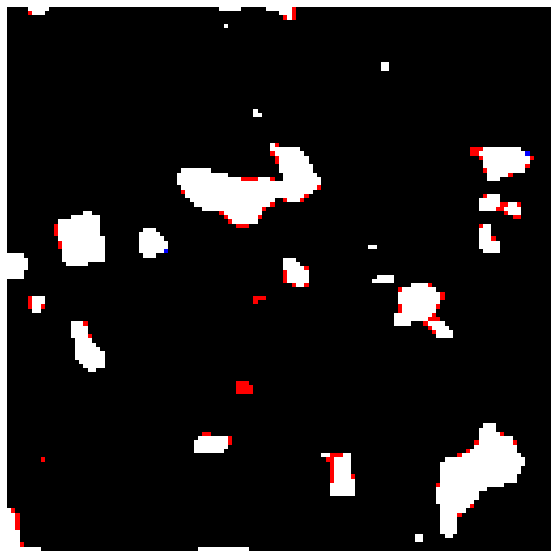

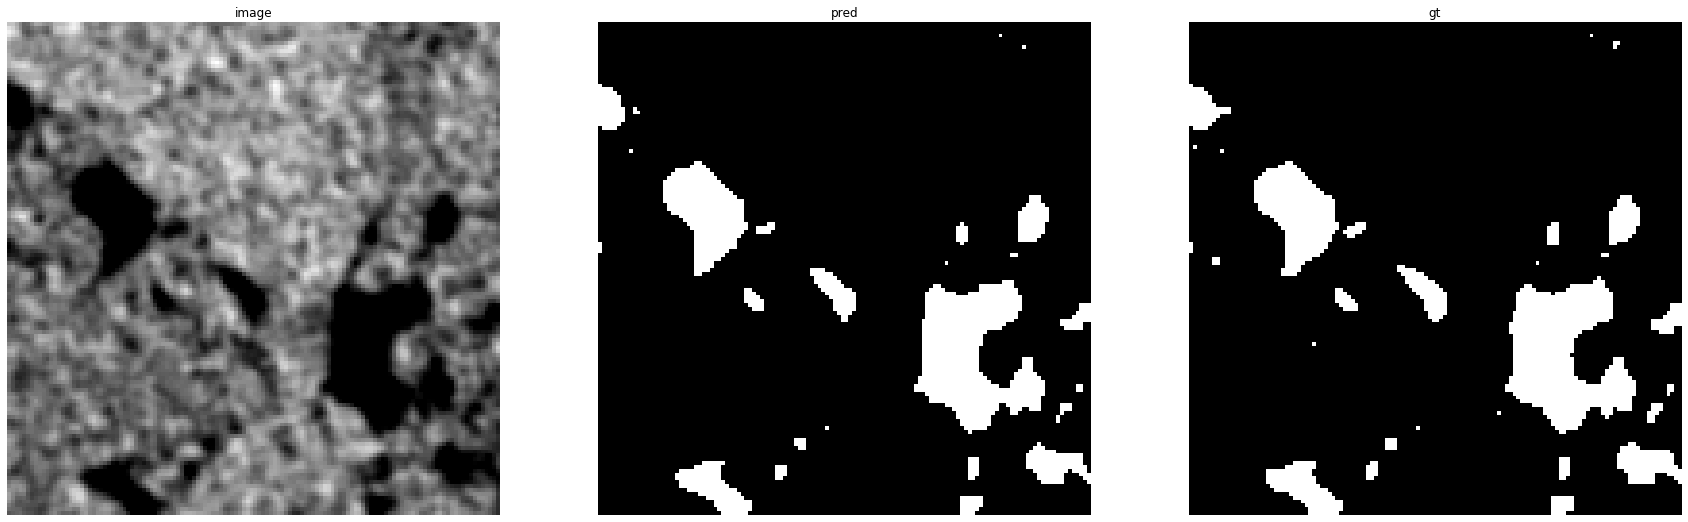

accuracy    : 0.99249267578125
precision   : 0.9994347088750707
recall      : 0.9354497354497354
f1          : 0.9663842579939874
pr_auc      : 0.998702697828713
iou         : 0.9349550502379693


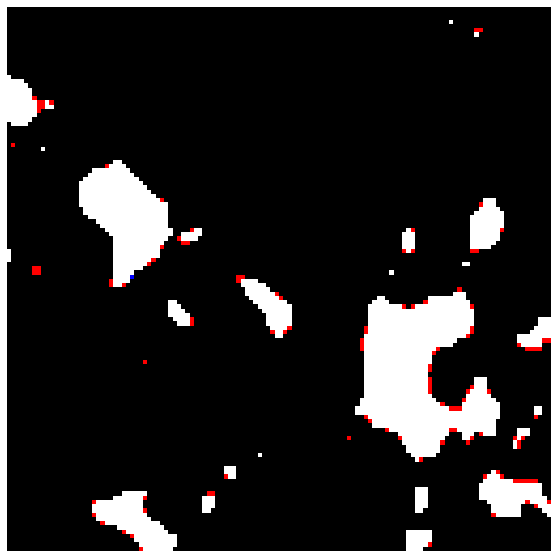

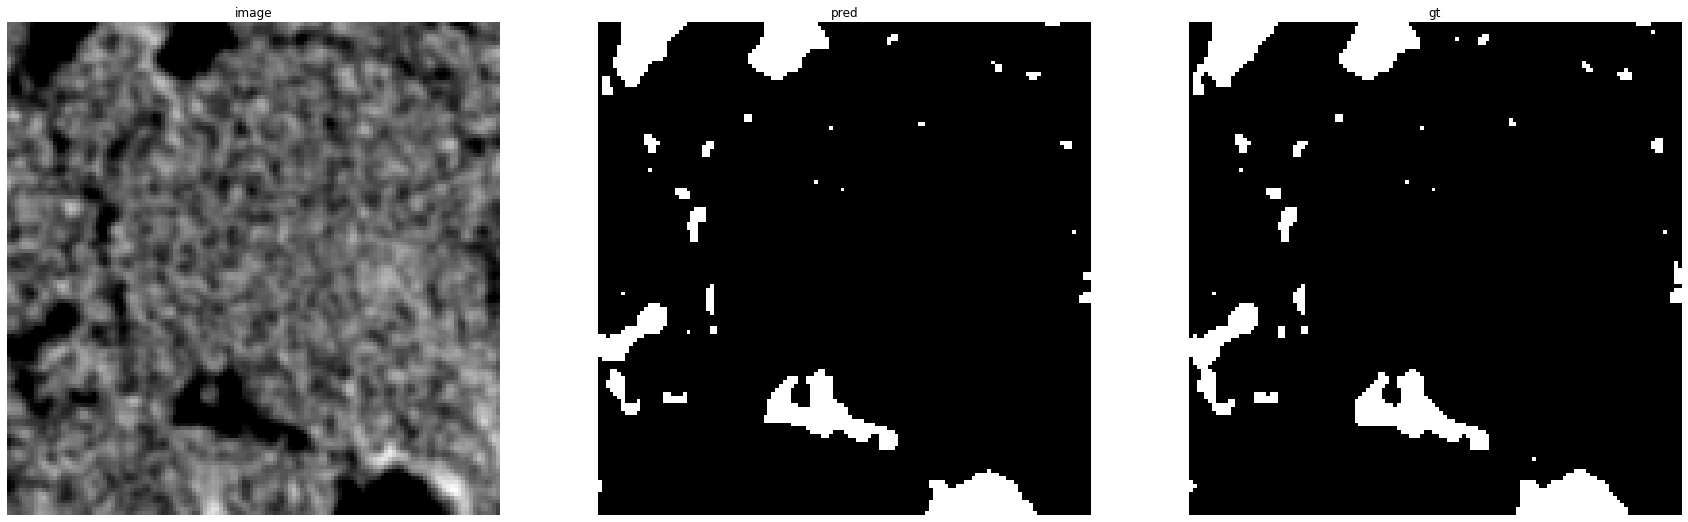

accuracy    : 0.9927978515625
precision   : 0.9959150326797386
recall      : 0.9151651651651652
f1          : 0.9538341158059469
pr_auc      : 0.9970770846155035
iou         : 0.9117427075542259


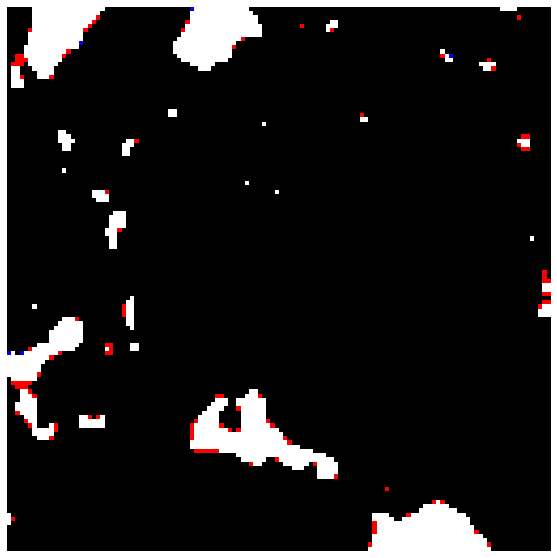

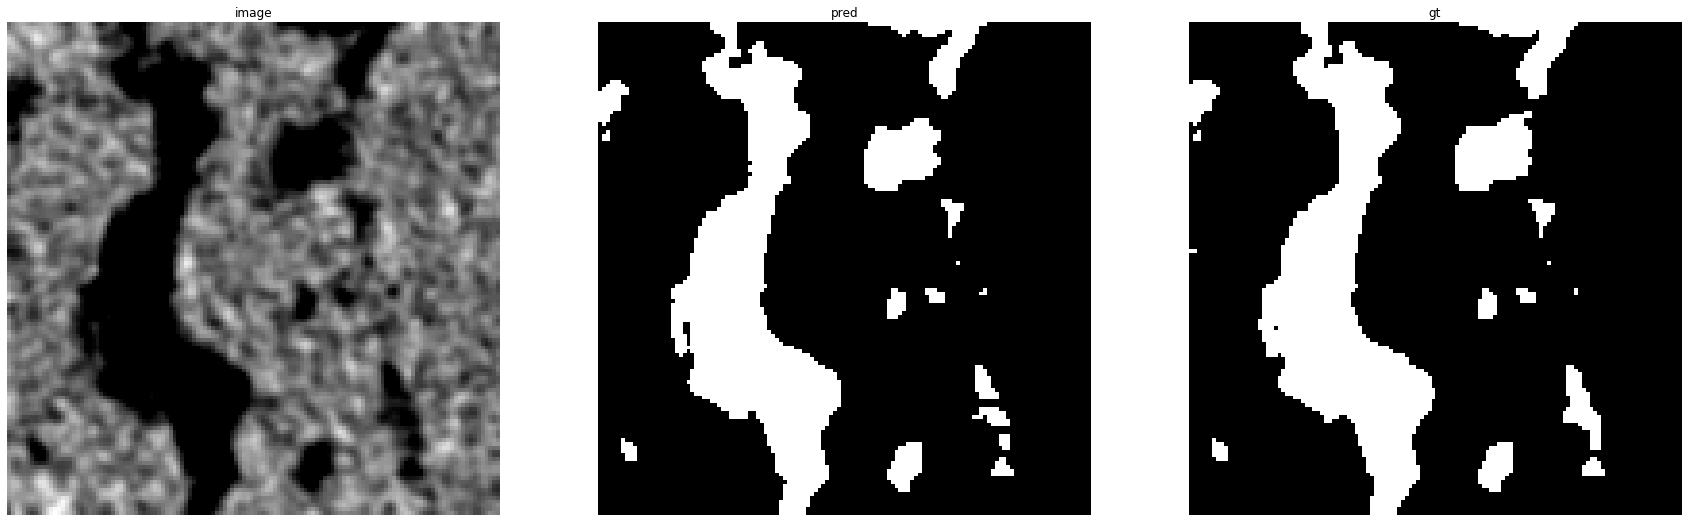

accuracy    : 0.98870849609375
precision   : 0.9984202211690363
recall      : 0.9461077844311377
f1          : 0.9715603382013835
pr_auc      : 0.9991178149506218
iou         : 0.9446935724962631


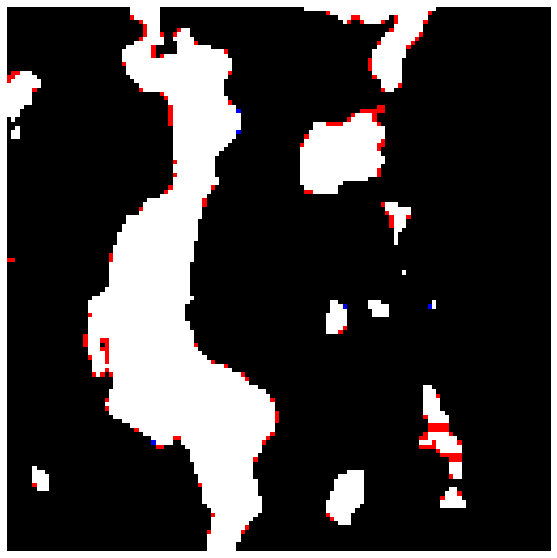

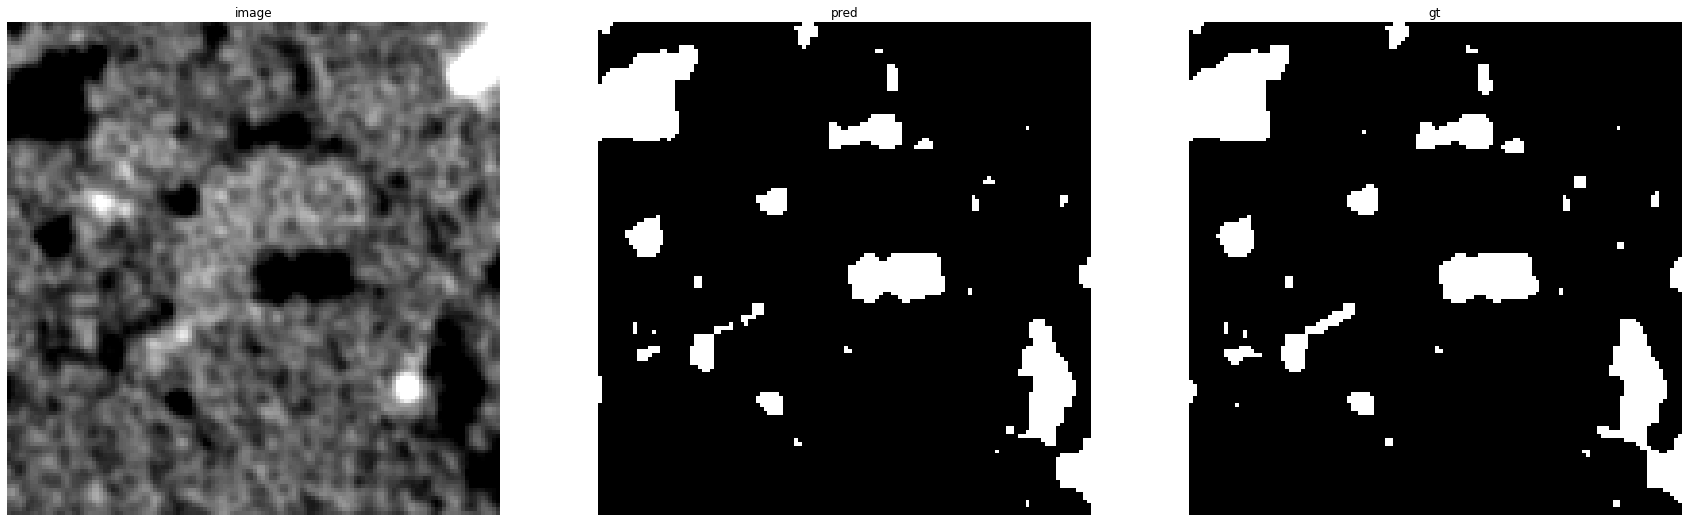

accuracy    : 0.98974609375
precision   : 0.9956548727498448
recall      : 0.9087818696883853
f1          : 0.9502369668246445
pr_auc      : 0.99759051765276
iou         : 0.9051918735891648


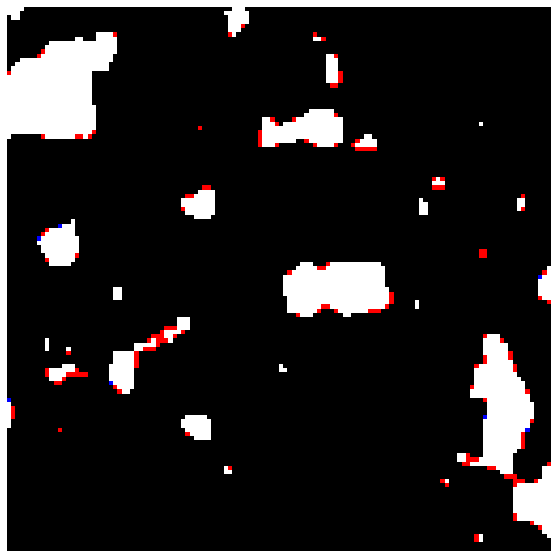

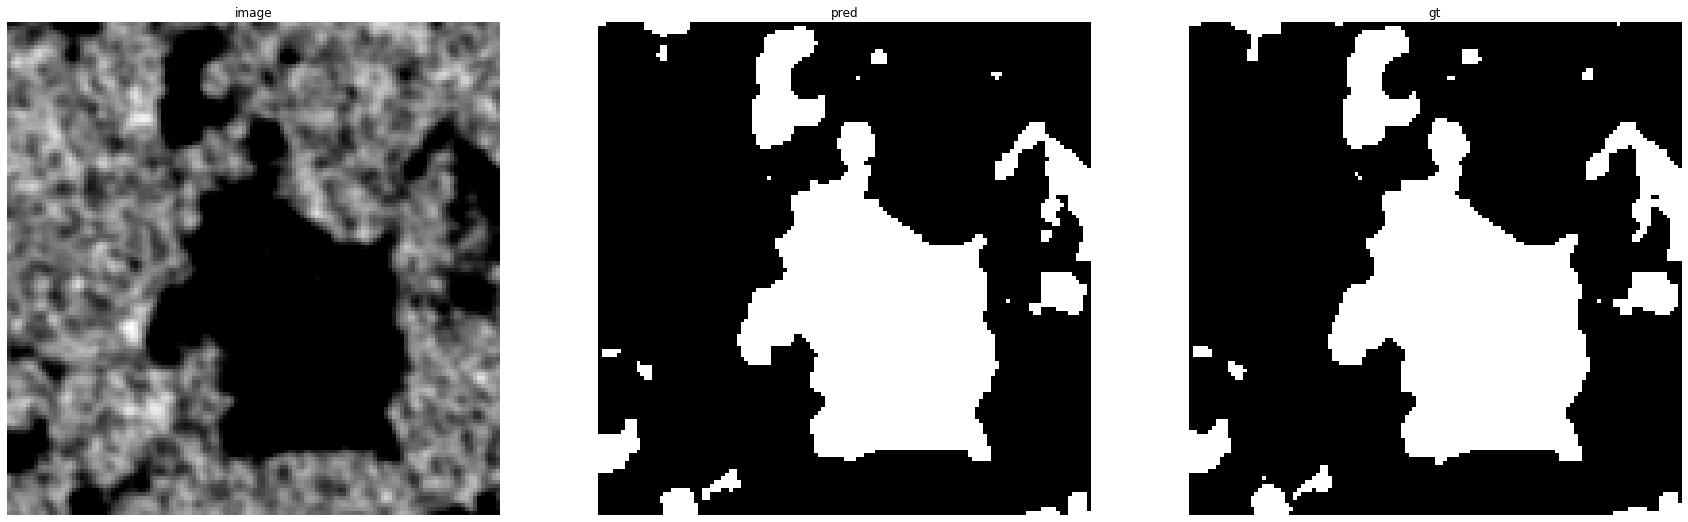

accuracy    : 0.98876953125
precision   : 0.9988893824966681
recall      : 0.9617194183062446
f1          : 0.9799520592721725
pr_auc      : 0.9996983892723795
iou         : 0.9606921597949156


Prediction for Urna_22:


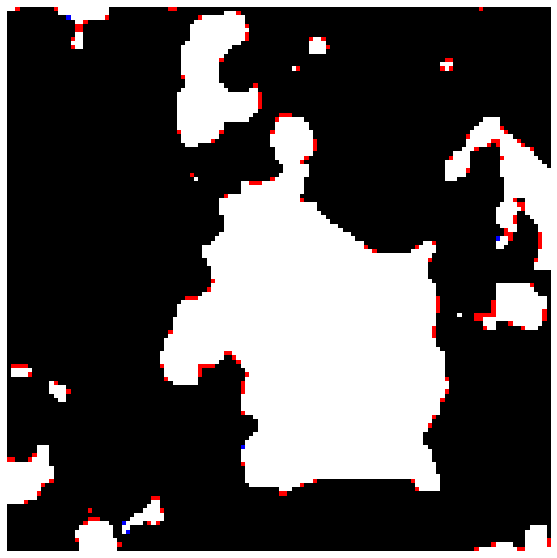

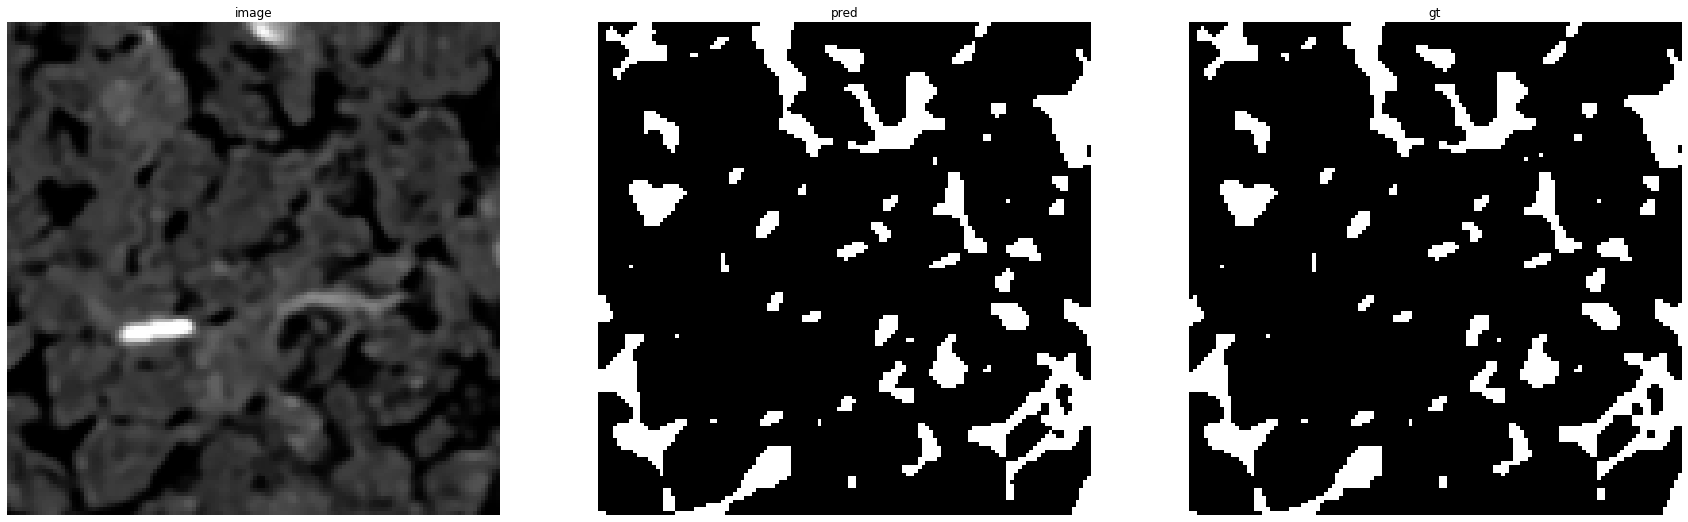

accuracy    : 0.9920654296875
precision   : 0.9704510108864697
recall      : 0.9788235294117648
f1          : 0.9746192893401016
pr_auc      : 0.9981303448069496
iou         : 0.9504950495049505


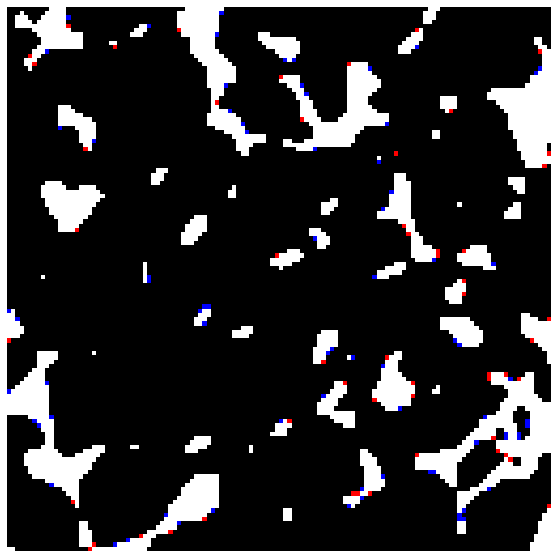

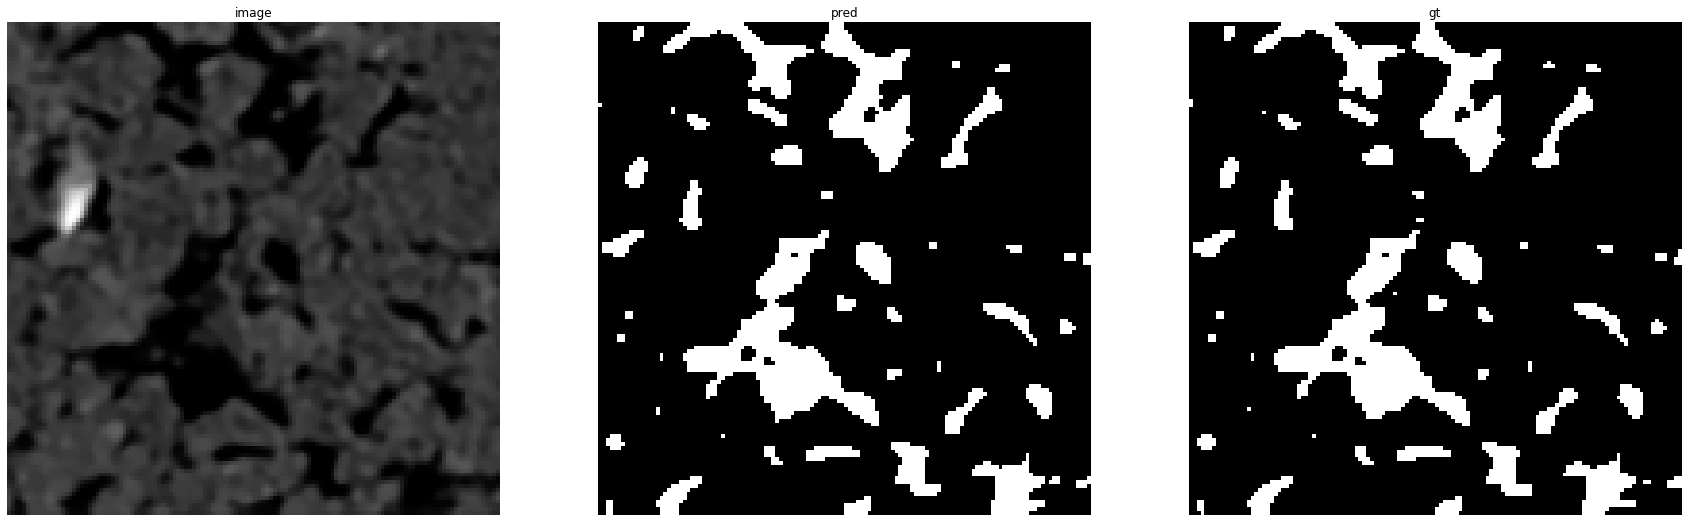

accuracy    : 0.993896484375
precision   : 0.9757358790771679
recall      : 0.9843499197431782
f1          : 0.9800239712345185
pr_auc      : 0.9985287248006922
iou         : 0.9608303956130043


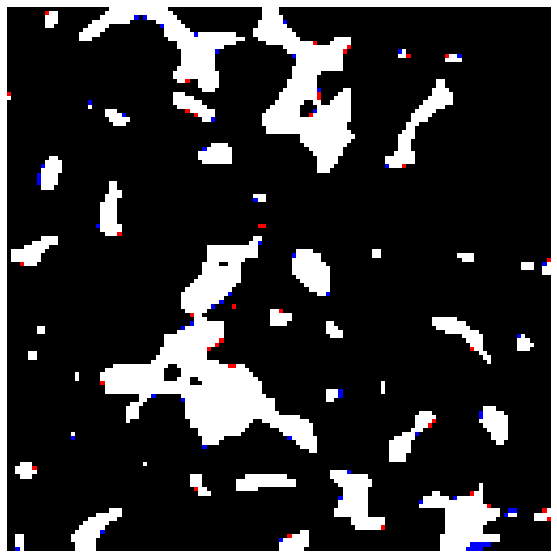

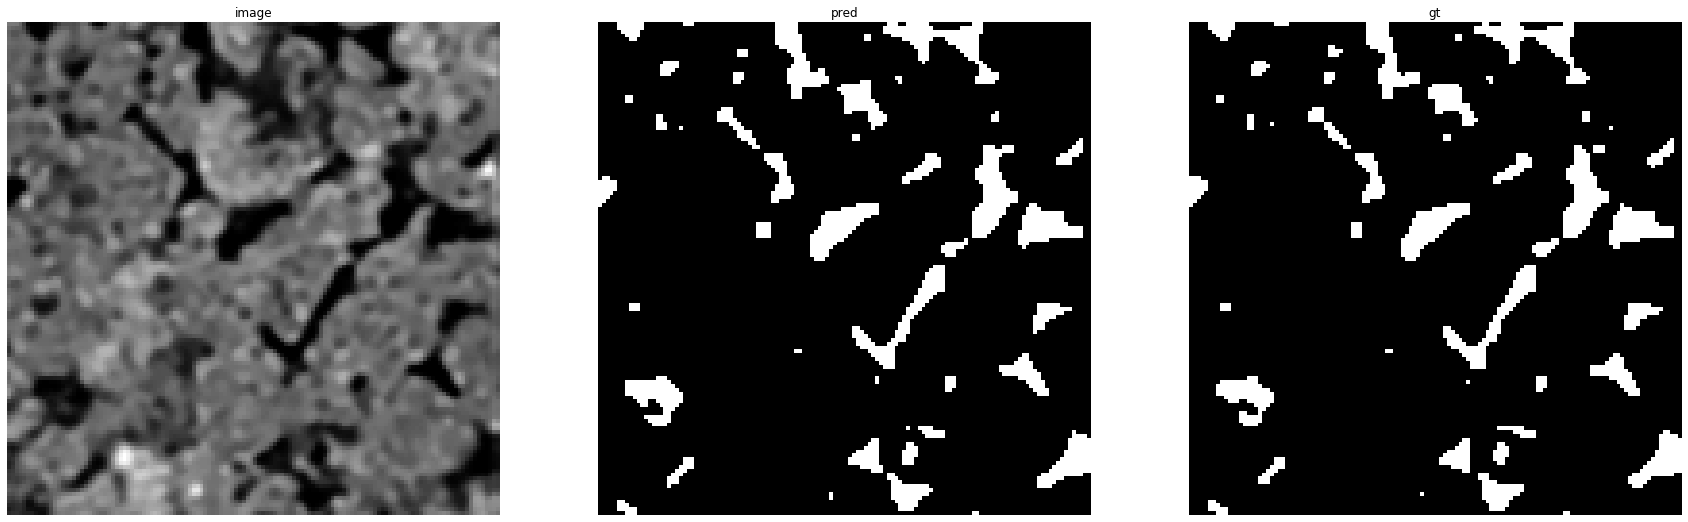

accuracy    : 0.993896484375
precision   : 0.9623406720741599
recall      : 0.9793632075471698
f1          : 0.9707773232028054
pr_auc      : 0.9970714153500033
iou         : 0.9432140829074389


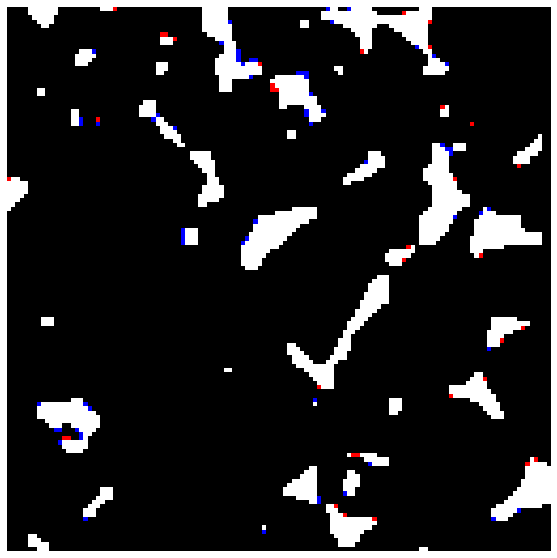

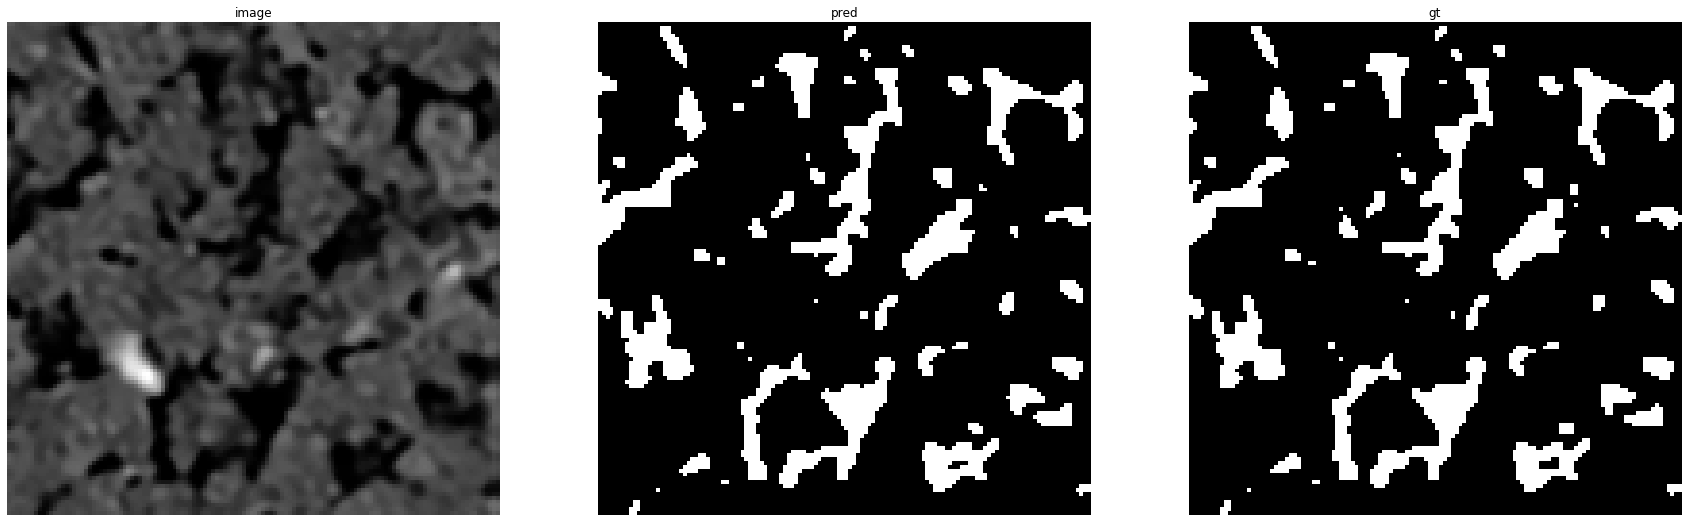

accuracy    : 0.99188232421875
precision   : 0.9677033492822966
recall      : 0.9790237999193223
f1          : 0.9733306597152597
pr_auc      : 0.9977986838875825
iou         : 0.948046875


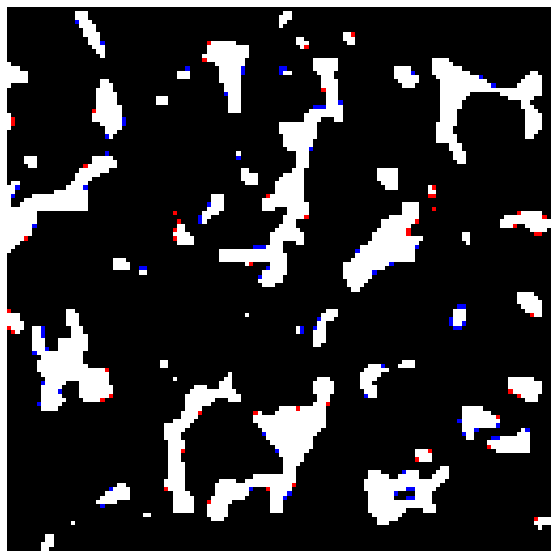

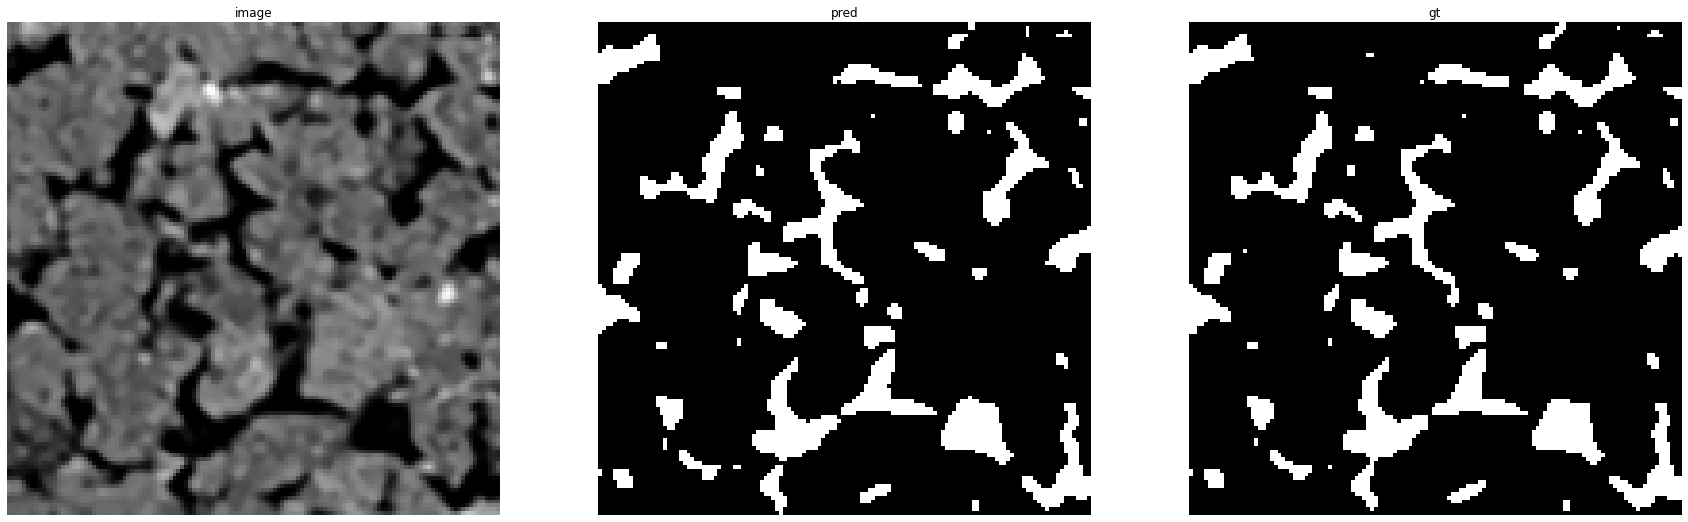

accuracy    : 0.99298095703125
precision   : 0.9765817584223501
recall      : 0.9761806981519507
f1          : 0.9763811871020742
pr_auc      : 0.9981368821615516
iou         : 0.9538523274478331


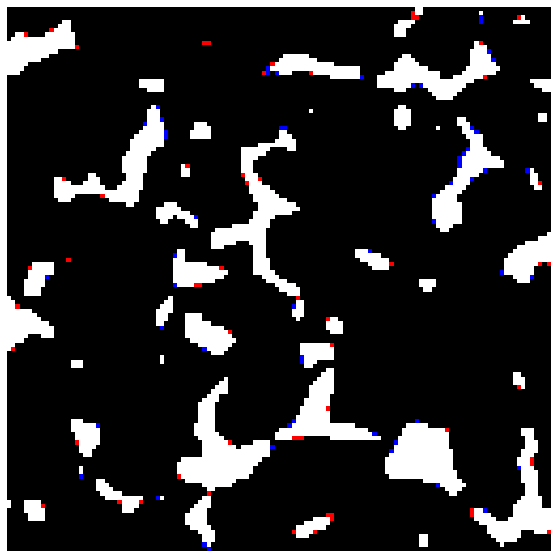

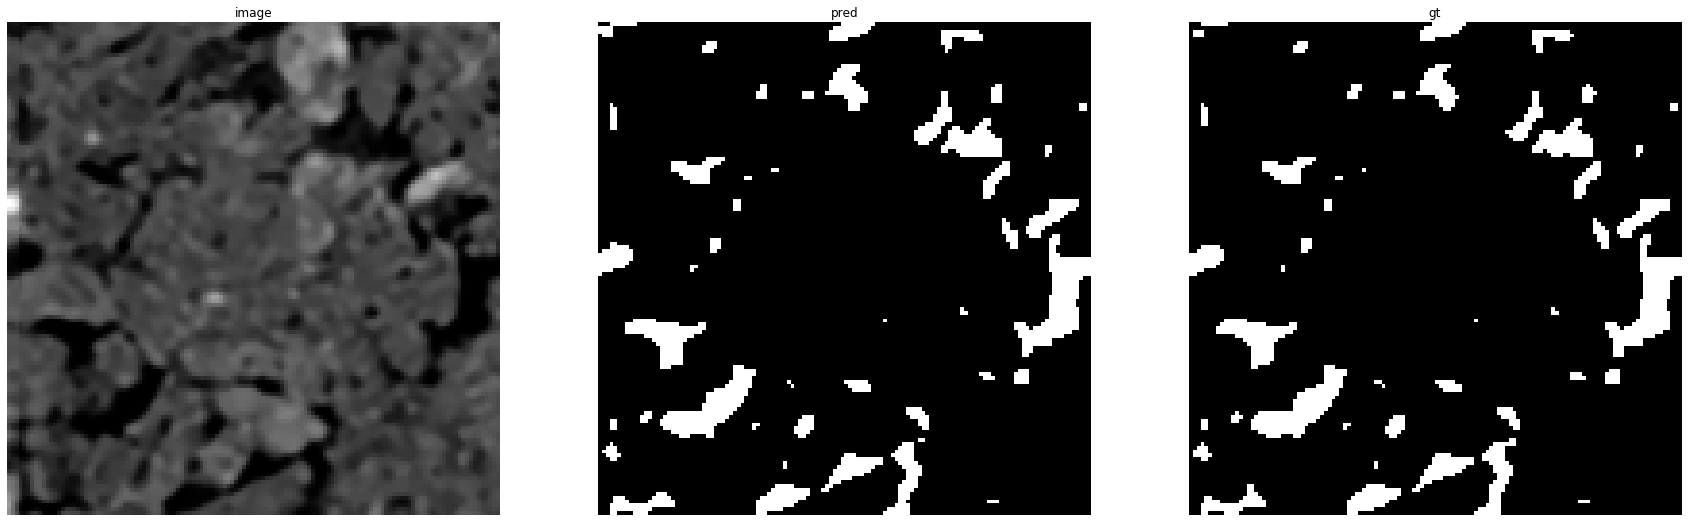

accuracy    : 0.99468994140625
precision   : 0.9653215636822194
recall      : 0.9795265515035189
f1          : 0.9723721816449667
pr_auc      : 0.9971905772295092
iou         : 0.946229913473424


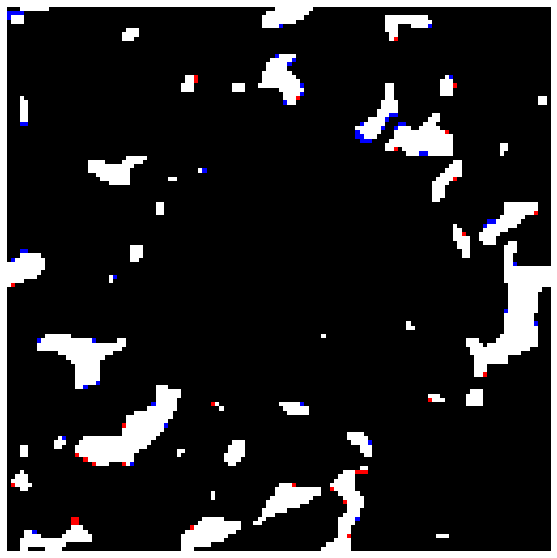

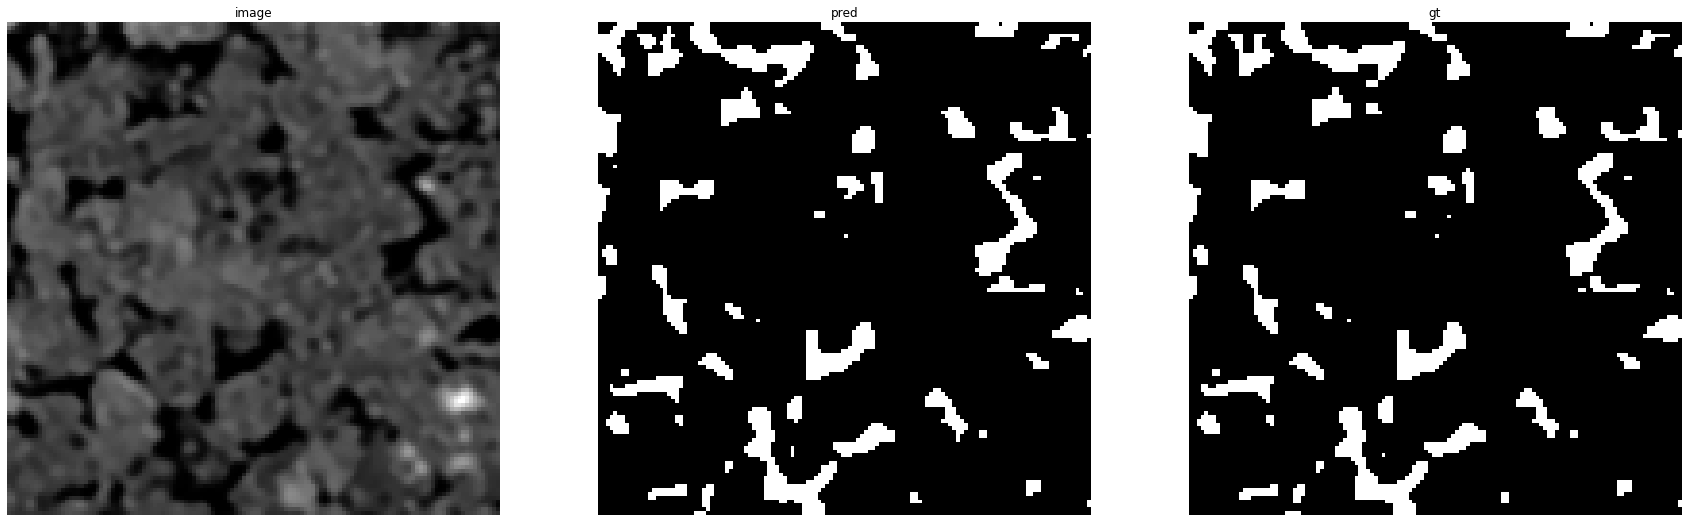

accuracy    : 0.9931640625
precision   : 0.9708333333333333
recall      : 0.9708333333333333
f1          : 0.9708333333333333
pr_auc      : 0.9972775693708891
iou         : 0.9433198380566802


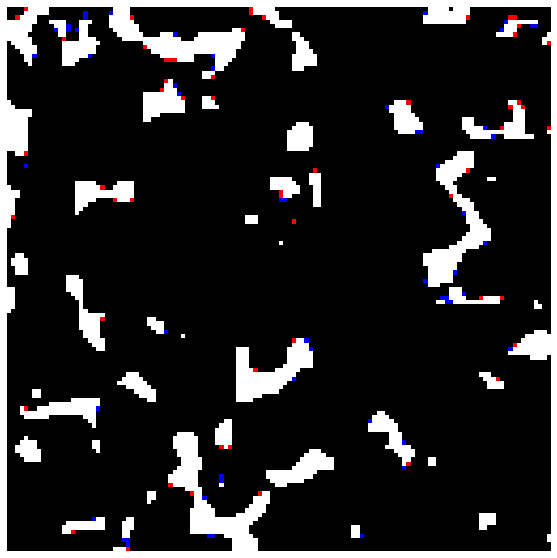

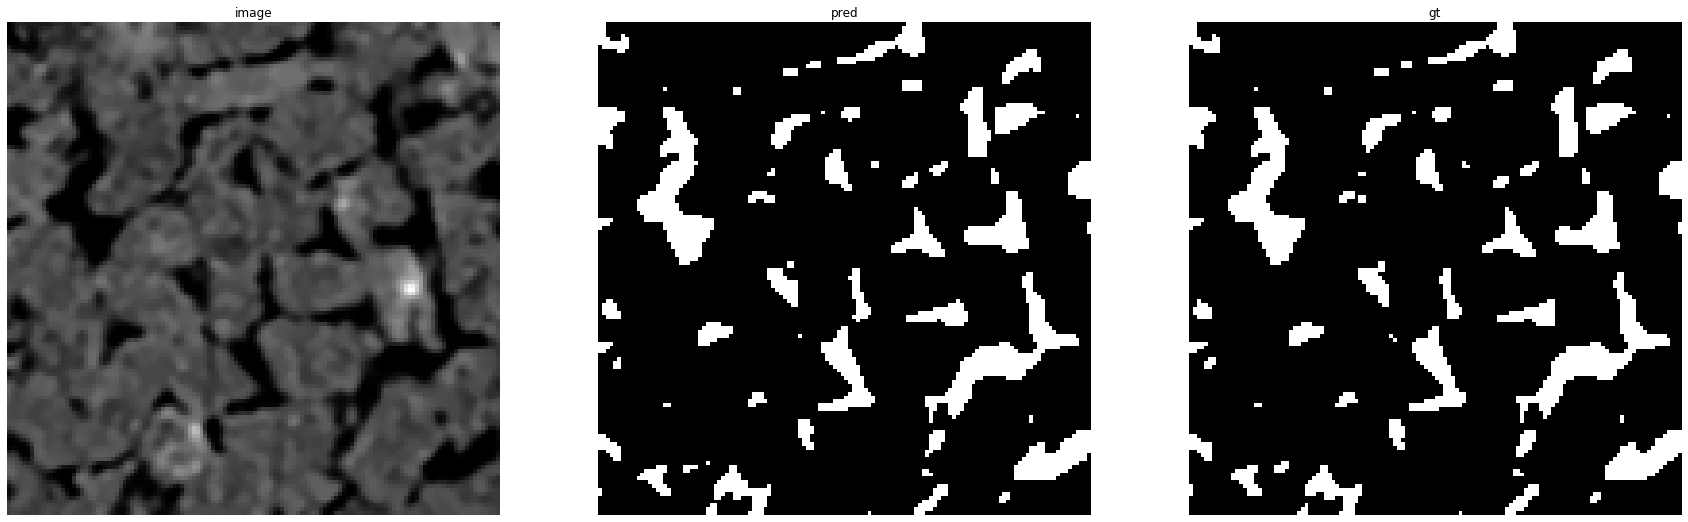

accuracy    : 0.992919921875
precision   : 0.9735566328779198
recall      : 0.9752759381898455
f1          : 0.9744155271283634
pr_auc      : 0.9979357588428073
iou         : 0.9501075268817204


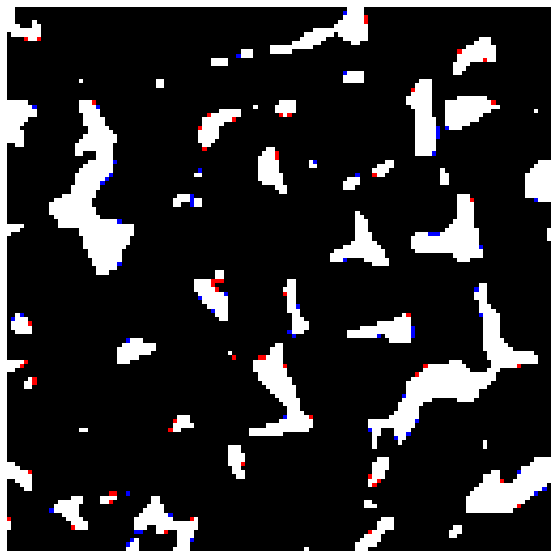

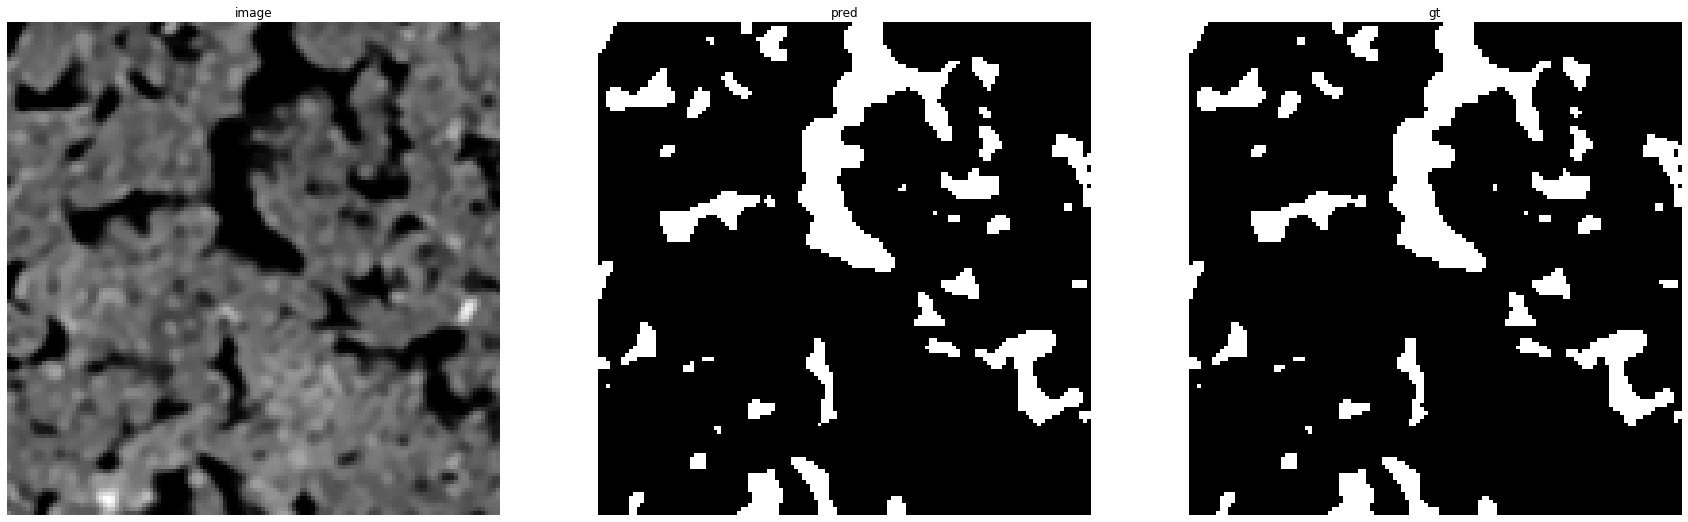

accuracy    : 0.993896484375
precision   : 0.9810152703260421
recall      : 0.9777869189633895
f1          : 0.9793984342810054
pr_auc      : 0.9985417903998252
iou         : 0.959628582963262


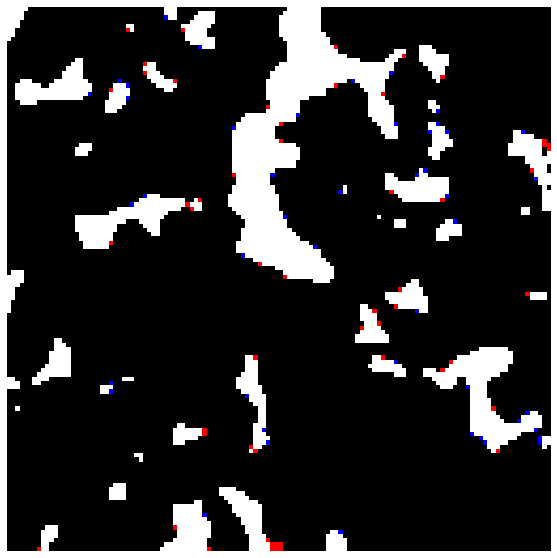

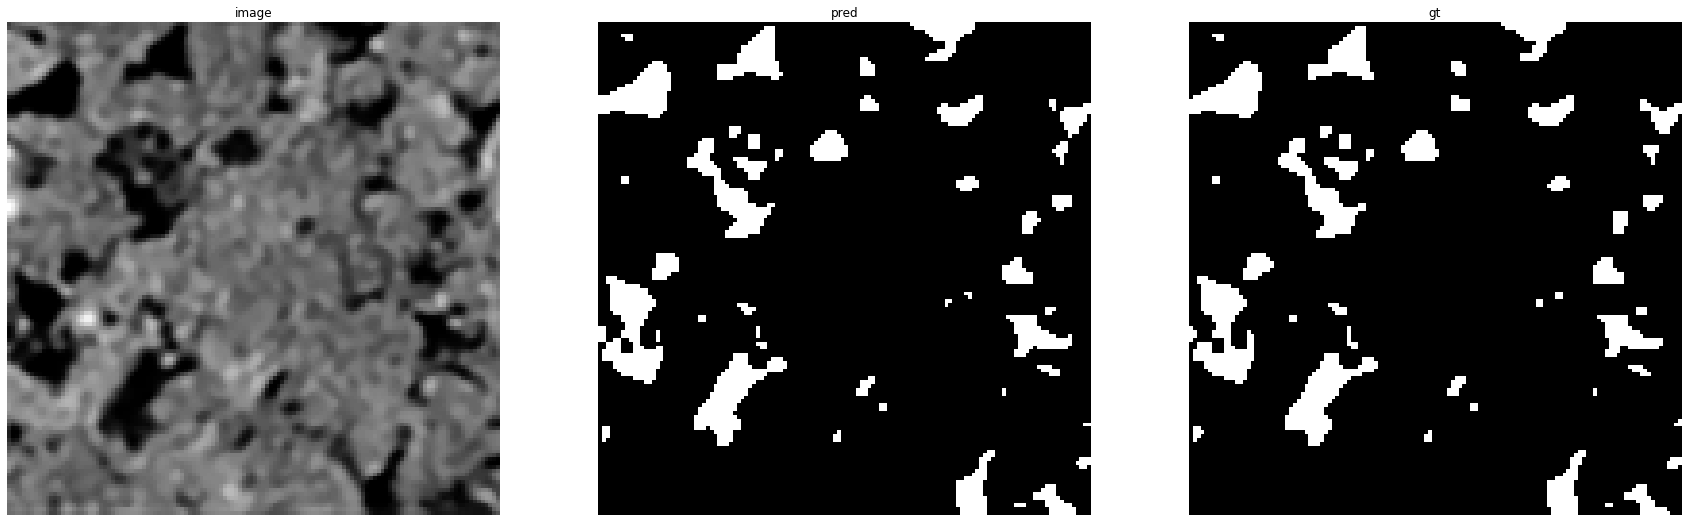

accuracy    : 0.99444580078125
precision   : 0.9733106189664963
recall      : 0.9749715585893061
f1          : 0.9741403807899972
pr_auc      : 0.9977423037423881
iou         : 0.949584487534626


Prediction for Urna_30:


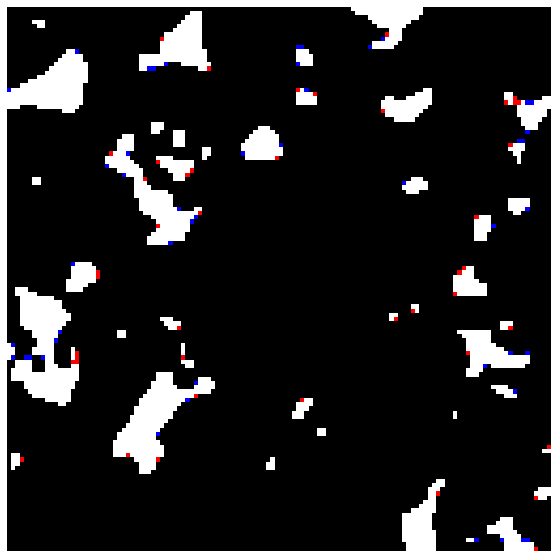

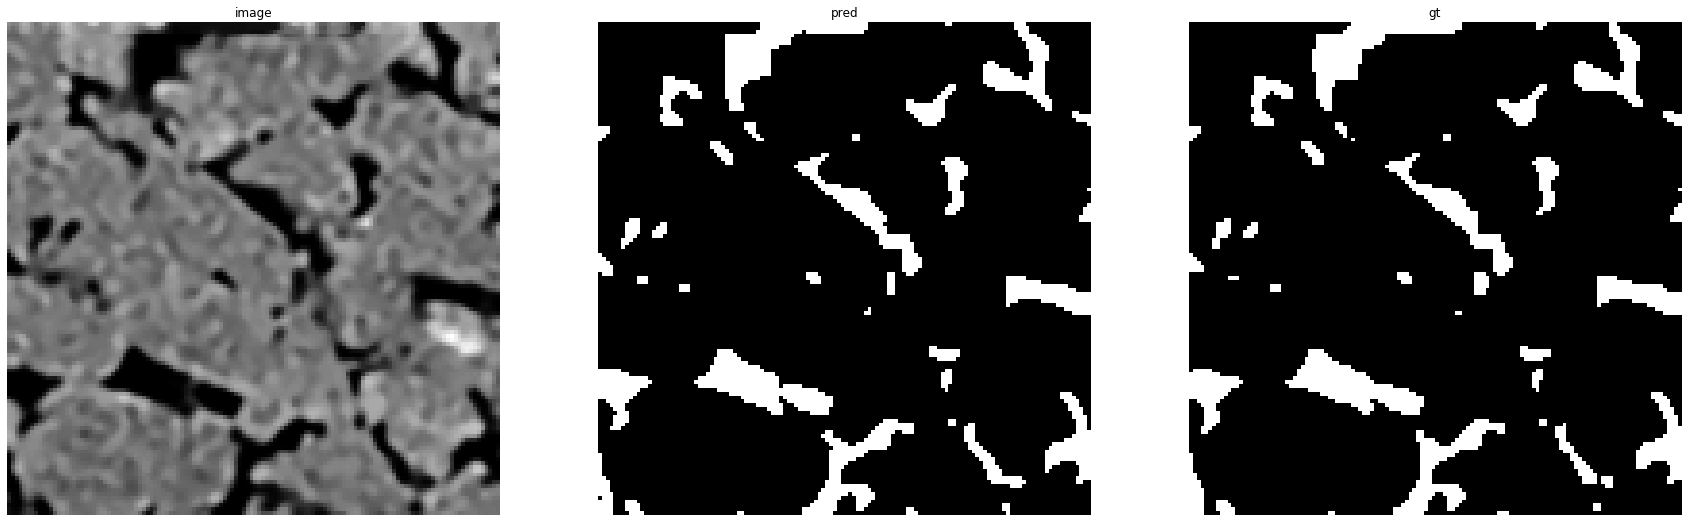

accuracy    : 0.99273681640625
precision   : 0.9713155291790306
recall      : 0.9698765432098766
f1          : 0.970595502841611
pr_auc      : 0.9973945459843168
iou         : 0.942870859337494


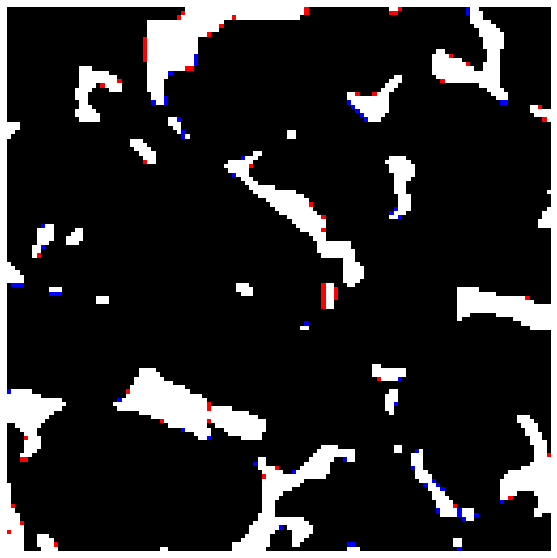

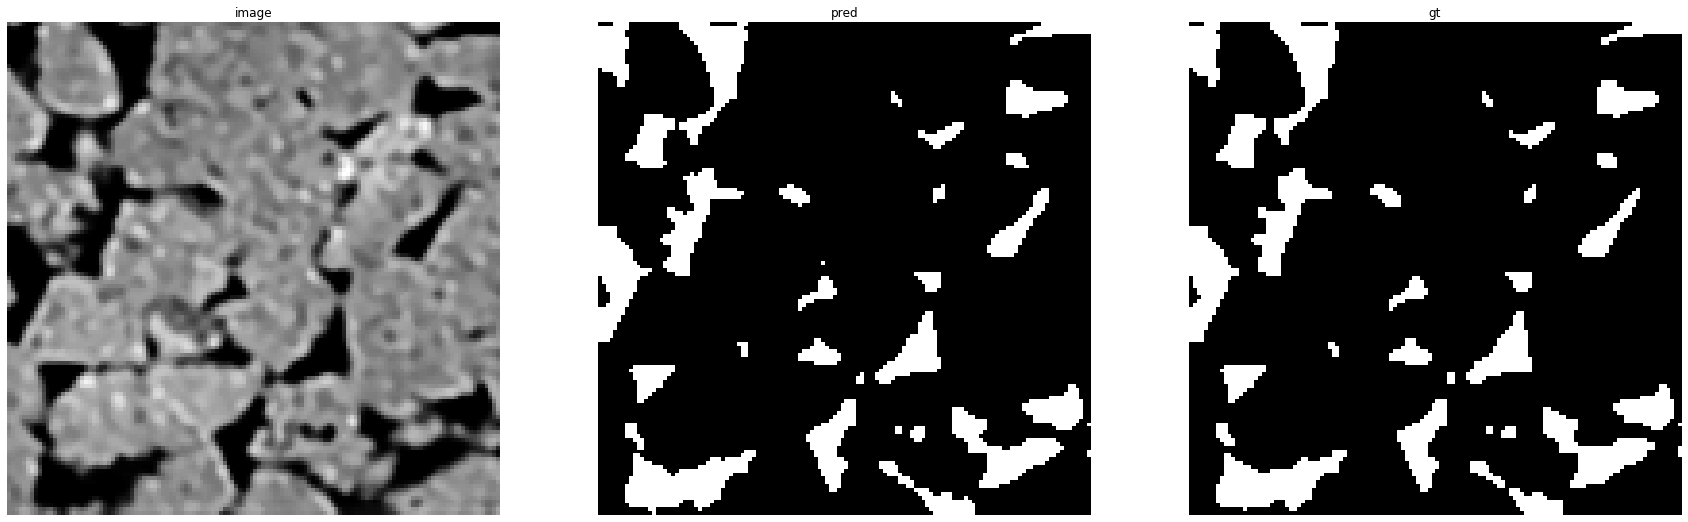

accuracy    : 0.993408203125
precision   : 0.9794547609640458
recall      : 0.9779092702169625
f1          : 0.9786814054480852
pr_auc      : 0.9987062144391392
iou         : 0.958252802473908


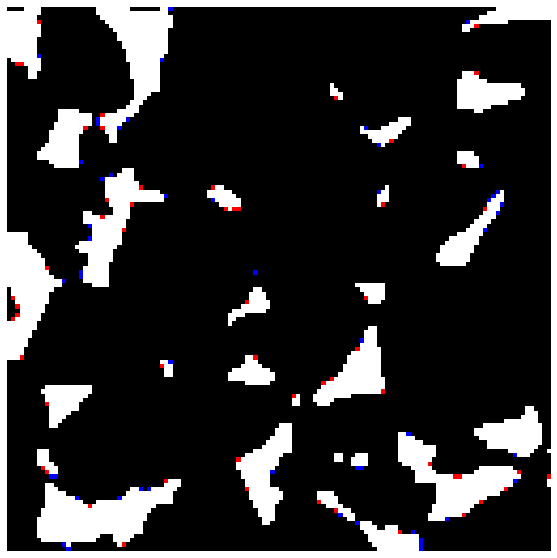

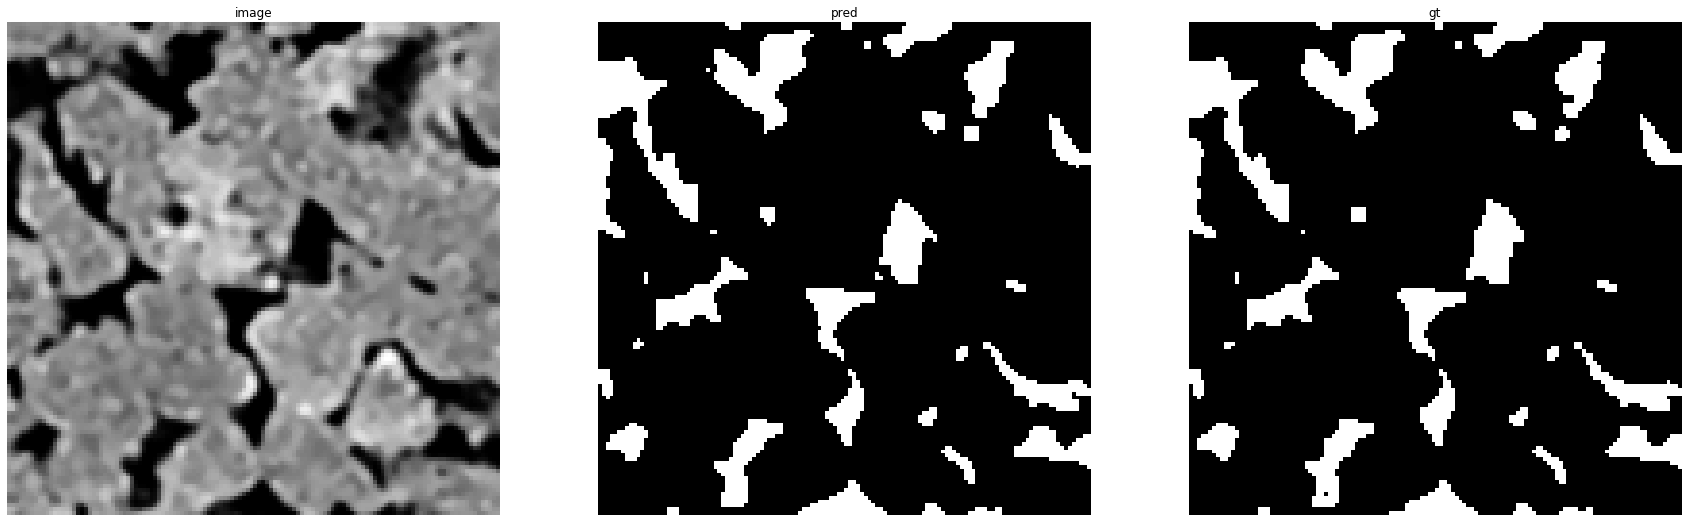

accuracy    : 0.991943359375
precision   : 0.9756600660066007
recall      : 0.9700574241181296
f1          : 0.9728506787330317
pr_auc      : 0.9977715188196258
iou         : 0.947136563876652


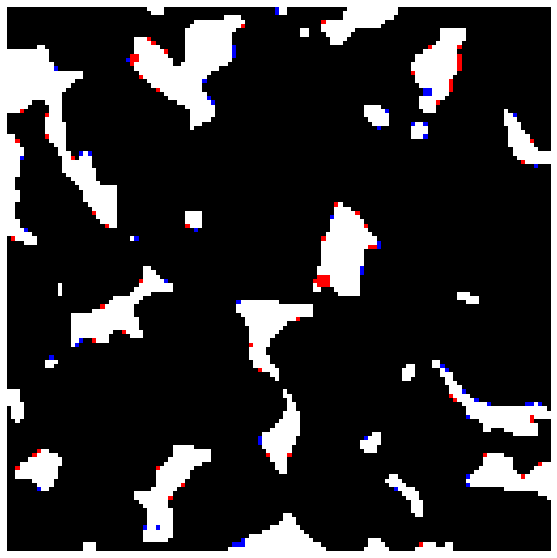

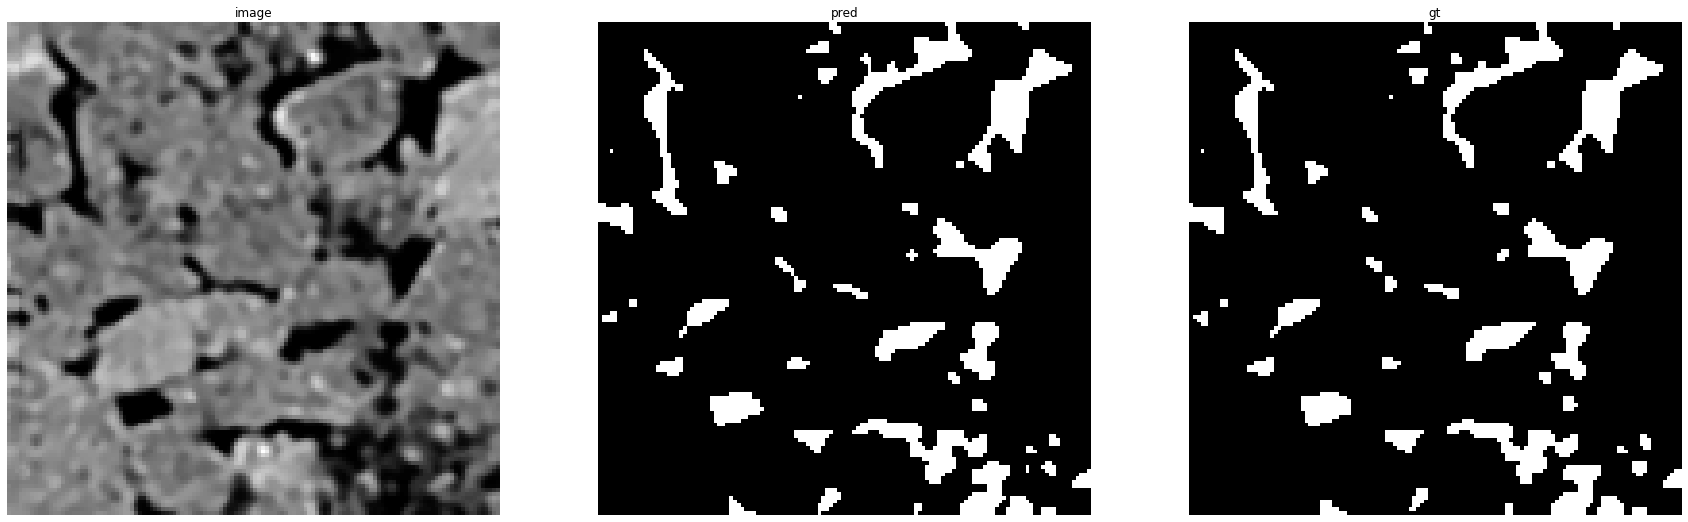

accuracy    : 0.99188232421875
precision   : 0.9633123689727463
recall      : 0.9668595476065229
f1          : 0.9650826988710948
pr_auc      : 0.9964865718886359
iou         : 0.9325215626585489


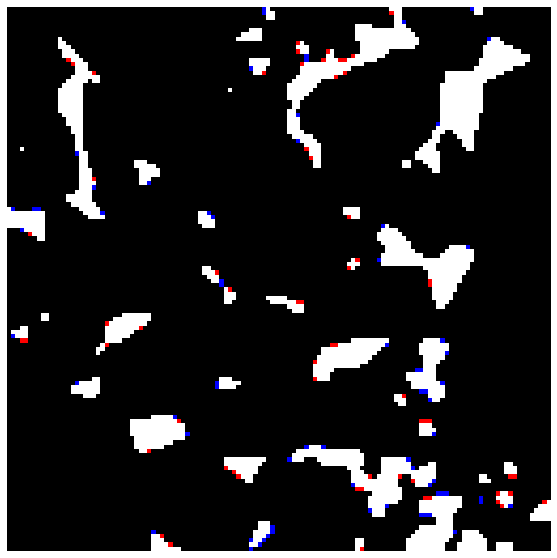

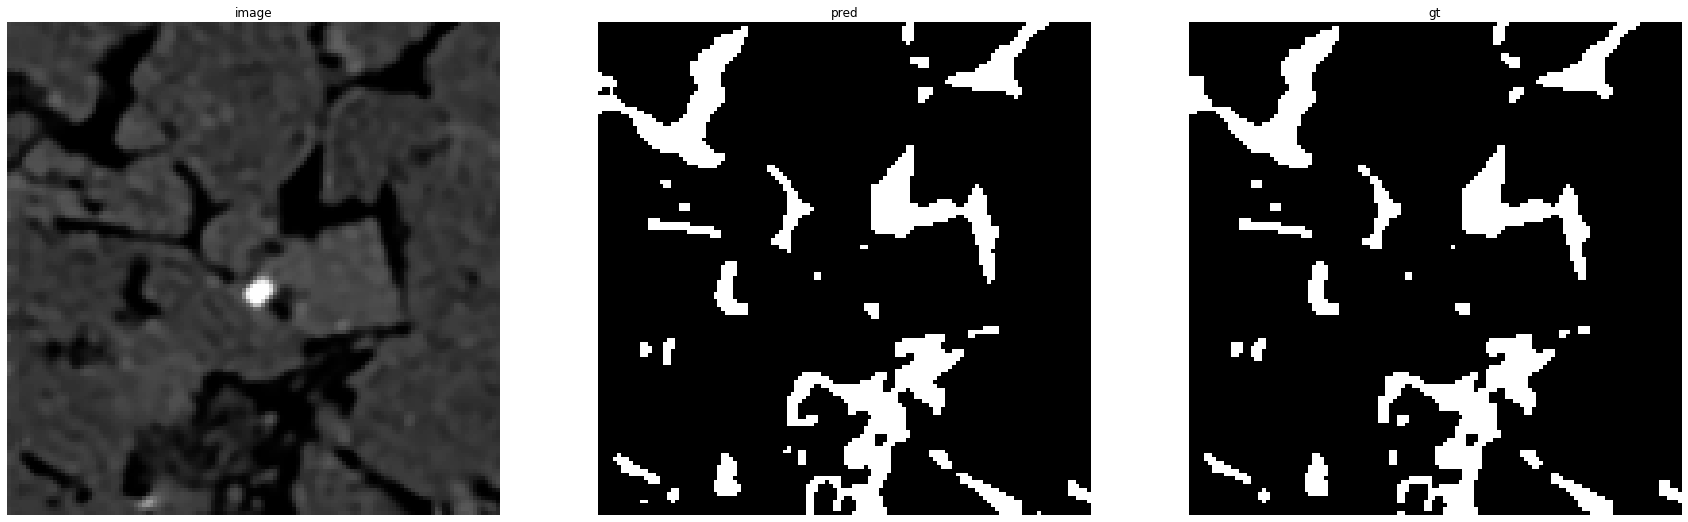

accuracy    : 0.99072265625
precision   : 0.9565018315018315
recall      : 0.9734389561975769
f1          : 0.9648960739030024
pr_auc      : 0.996888580503776
iou         : 0.9321731369924141


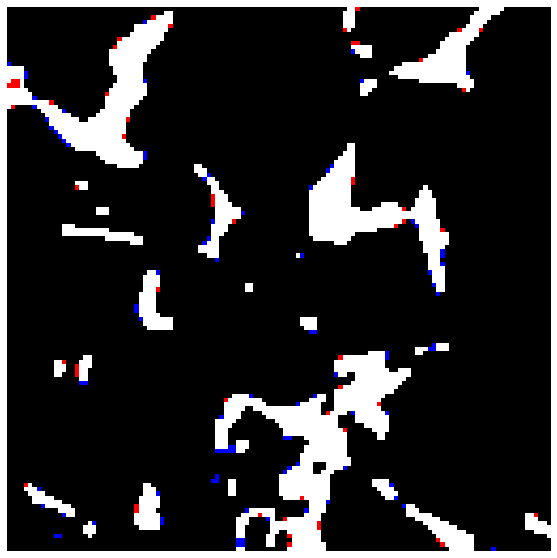

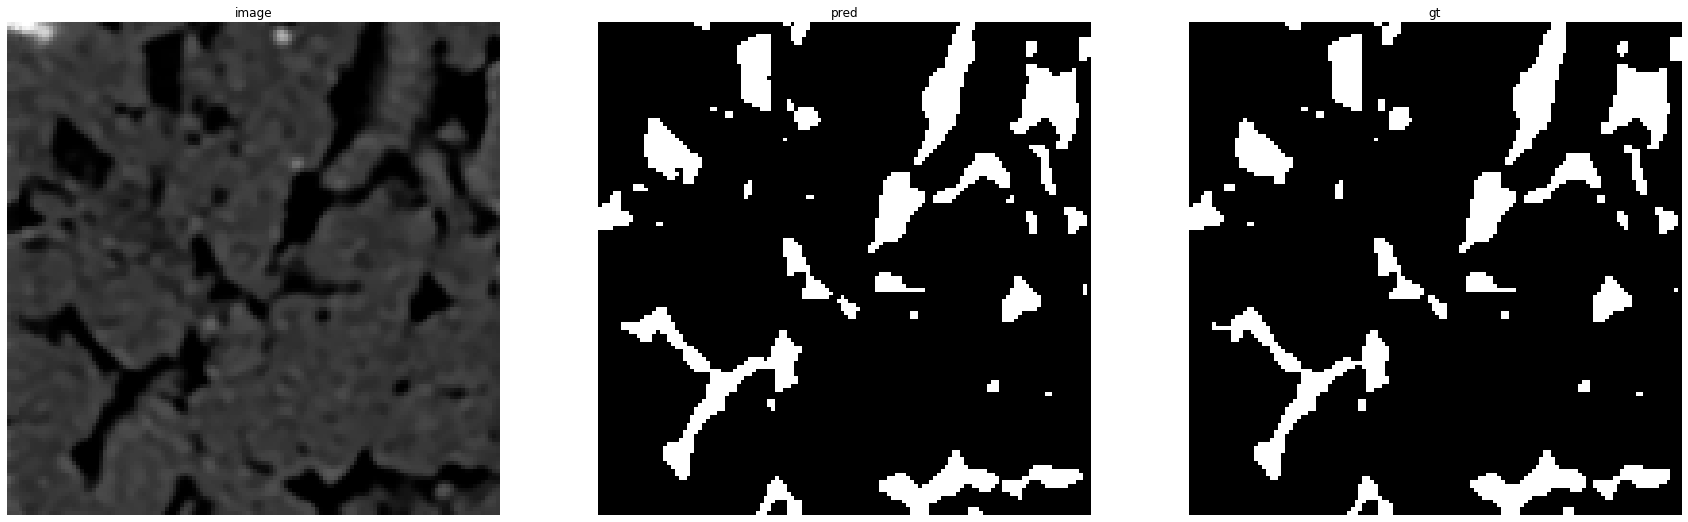

accuracy    : 0.99072265625
precision   : 0.9638766519823788
recall      : 0.9689991142604074
f1          : 0.9664310954063604
pr_auc      : 0.9969496821158195
iou         : 0.935042735042735


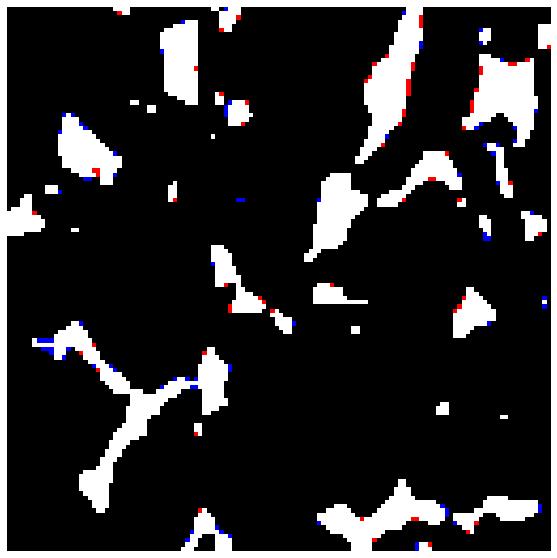

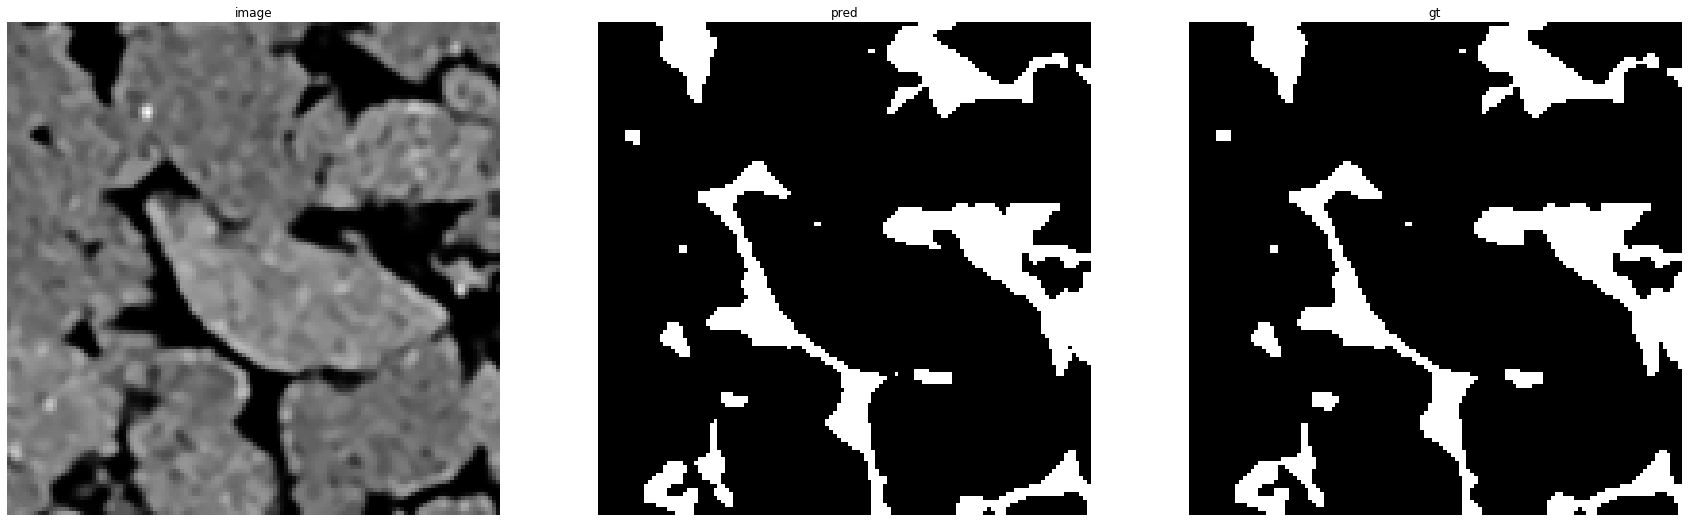

accuracy    : 0.99237060546875
precision   : 0.9824689554419284
recall      : 0.9721720274665703
f1          : 0.9772933696639419
pr_auc      : 0.9987321844369956
iou         : 0.955595026642984


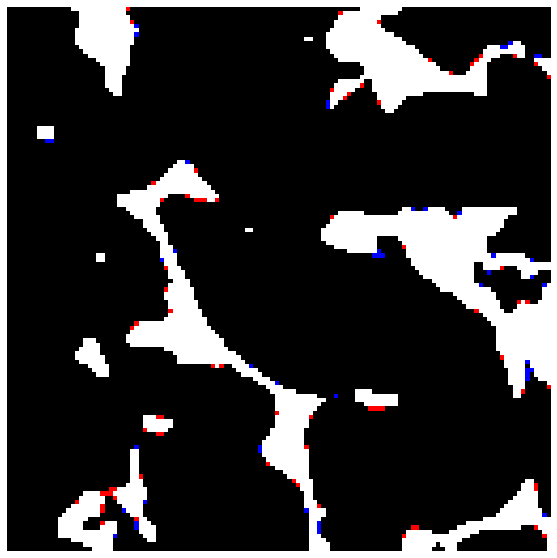

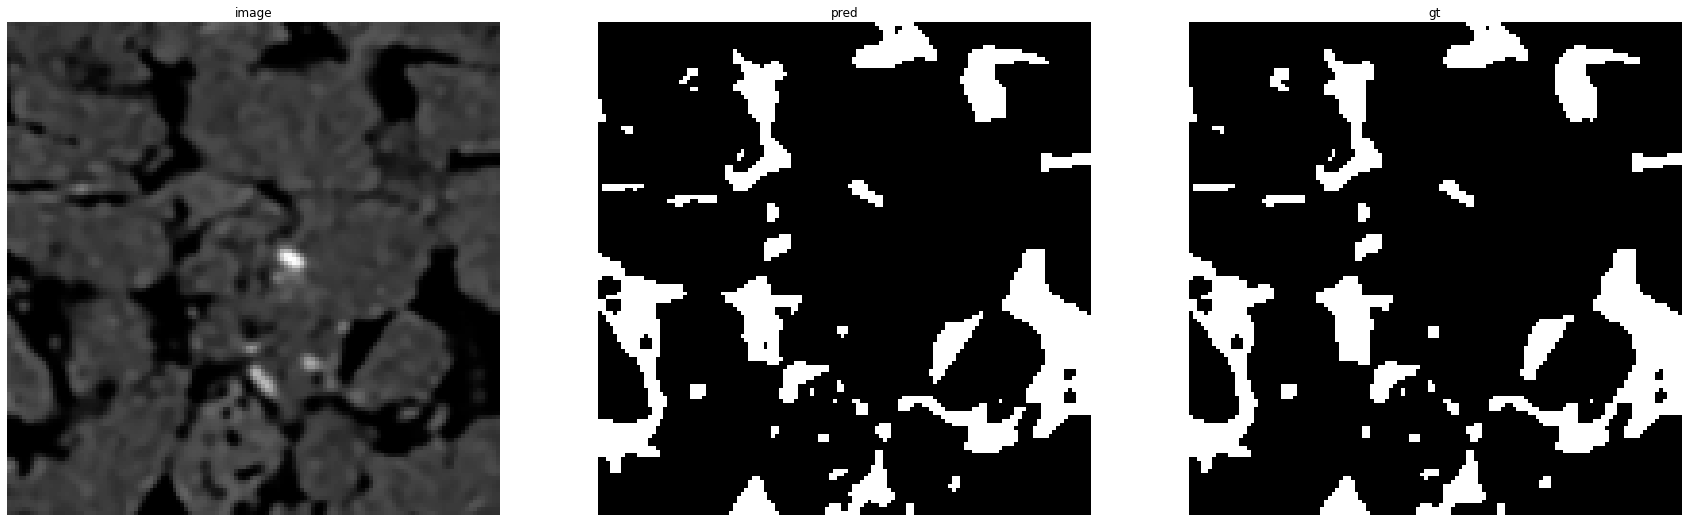

accuracy    : 0.99017333984375
precision   : 0.9785999274573812
recall      : 0.9635714285714285
f1          : 0.9710275328414613
pr_auc      : 0.9977262010901368
iou         : 0.94368660370759


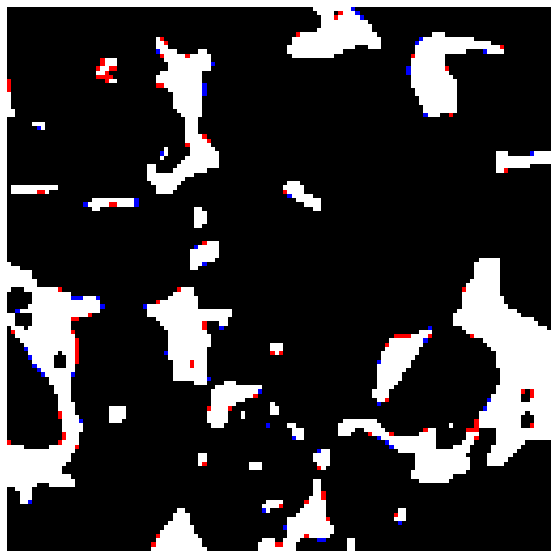

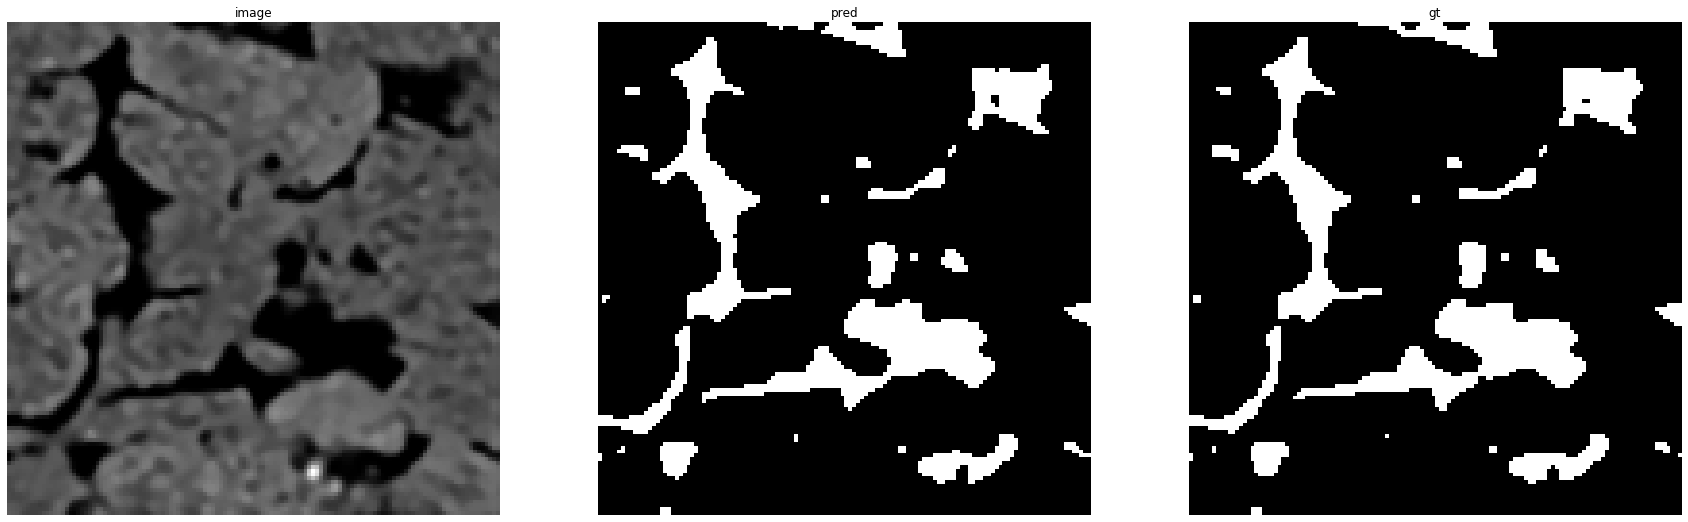

accuracy    : 0.99298095703125
precision   : 0.9796257796257797
recall      : 0.9727497935590421
f1          : 0.9761756784752434
pr_auc      : 0.9983438327807364
iou         : 0.9534601375961149


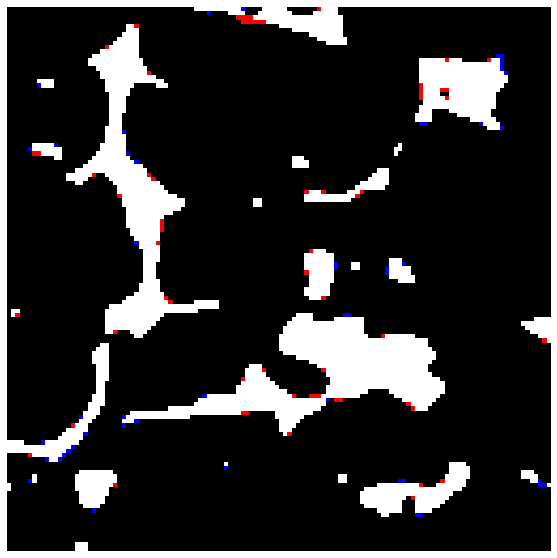

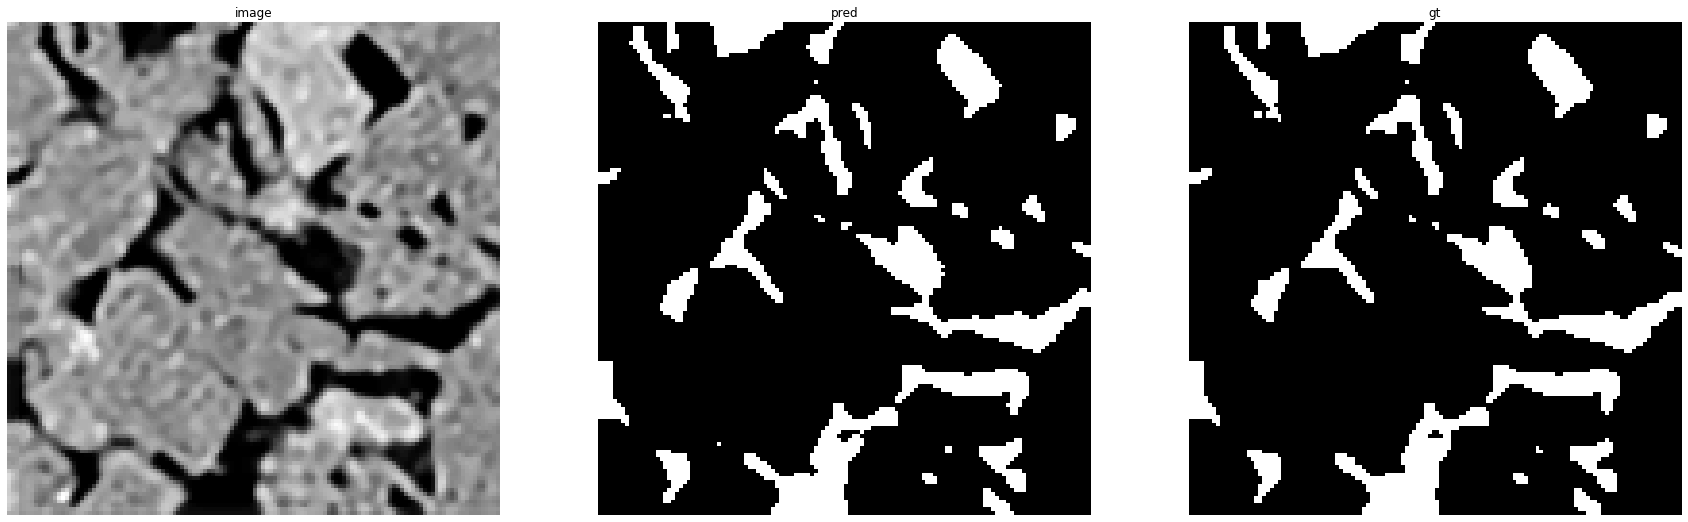

accuracy    : 0.99127197265625
precision   : 0.9708815317112086
recall      : 0.9720447284345048
f1          : 0.9714627818798643
pr_auc      : 0.9978805356742789
iou         : 0.9445091191307722


Prediction for Urna_34:


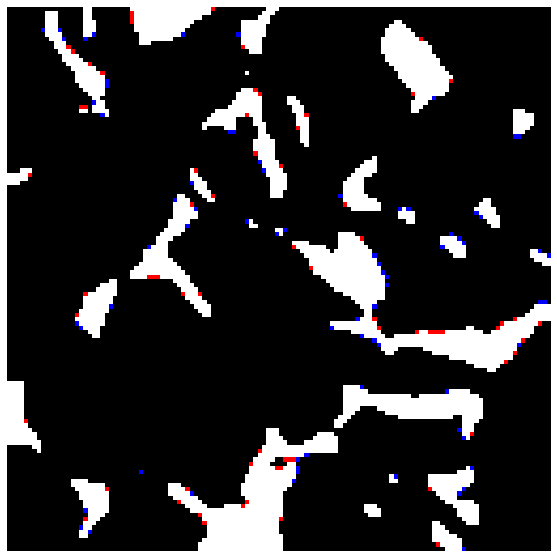

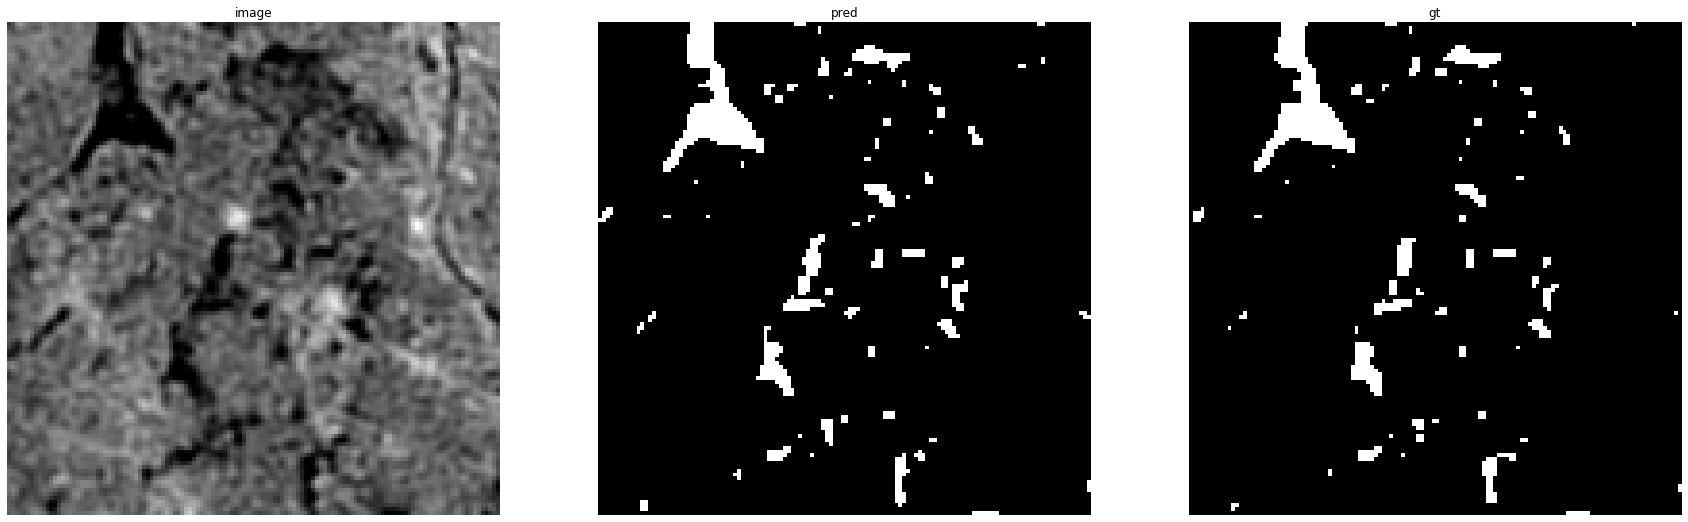

accuracy    : 0.99102783203125
precision   : 0.8816837315130831
recall      : 0.9474327628361858
f1          : 0.9133765468473777
pr_auc      : 0.983708536654115
iou         : 0.8405639913232104


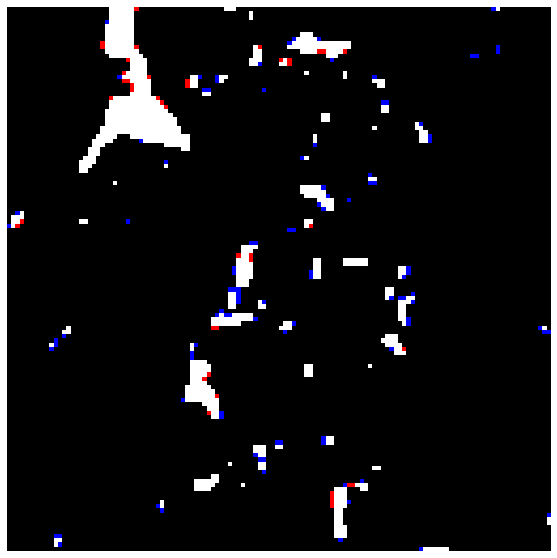

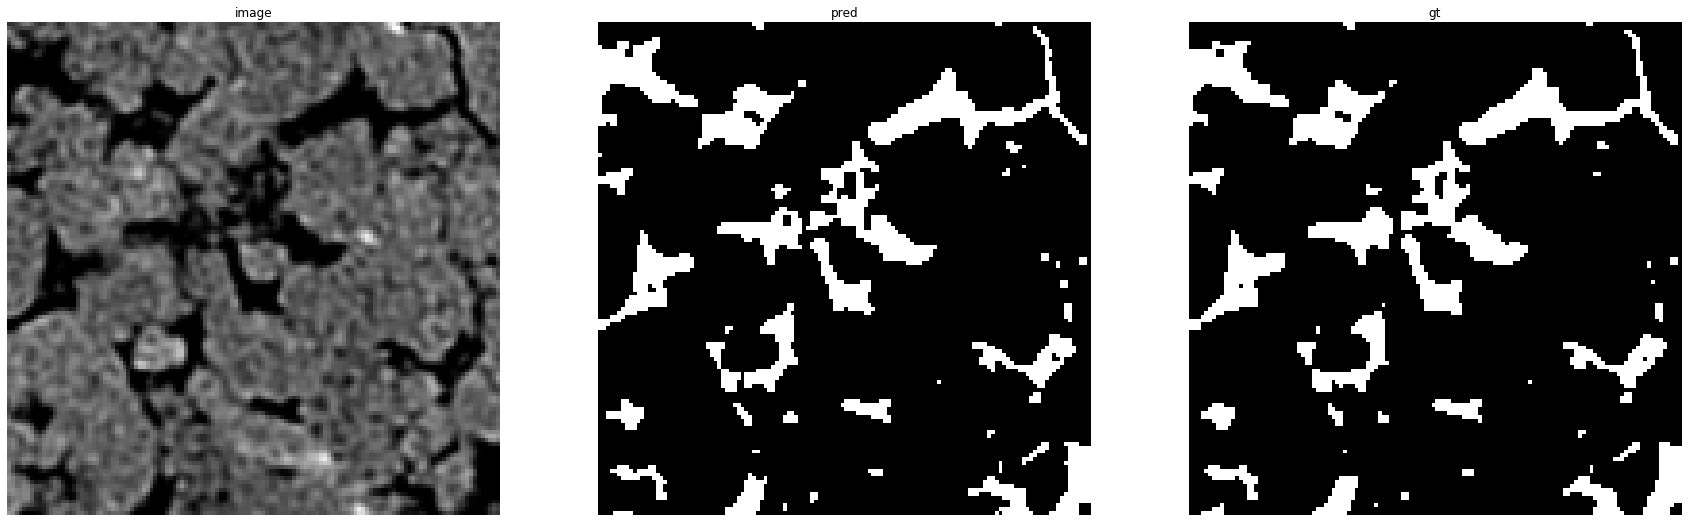

accuracy    : 0.98419189453125
precision   : 0.9578041786153216
recall      : 0.9374498797113071
f1          : 0.9475177304964538
pr_auc      : 0.9925366496598164
iou         : 0.9002695417789758


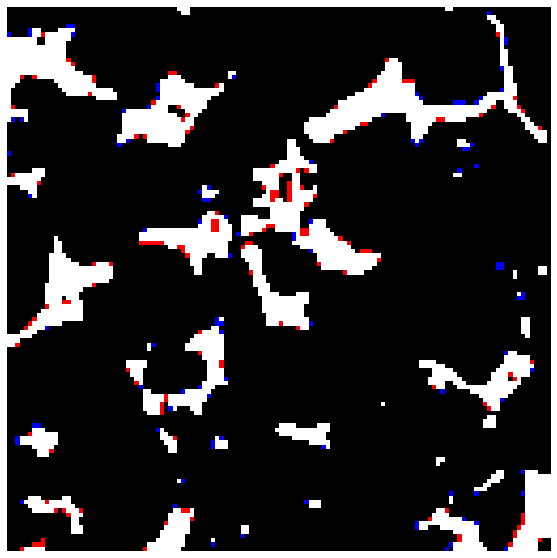

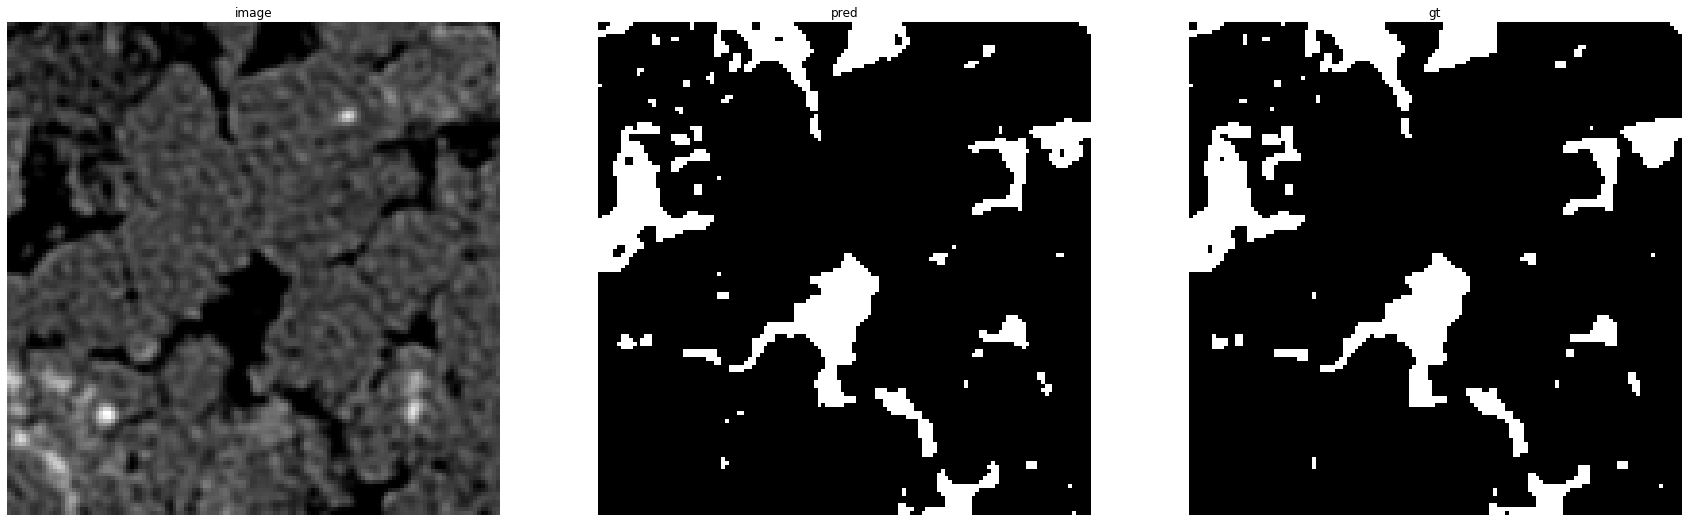

accuracy    : 0.98748779296875
precision   : 0.9648456057007125
recall      : 0.9394079555966698
f1          : 0.9519568783688774
pr_auc      : 0.9930264848695635
iou         : 0.9083184257602862


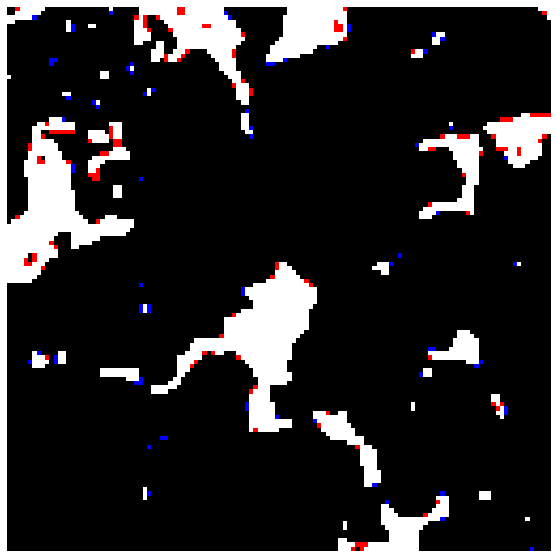

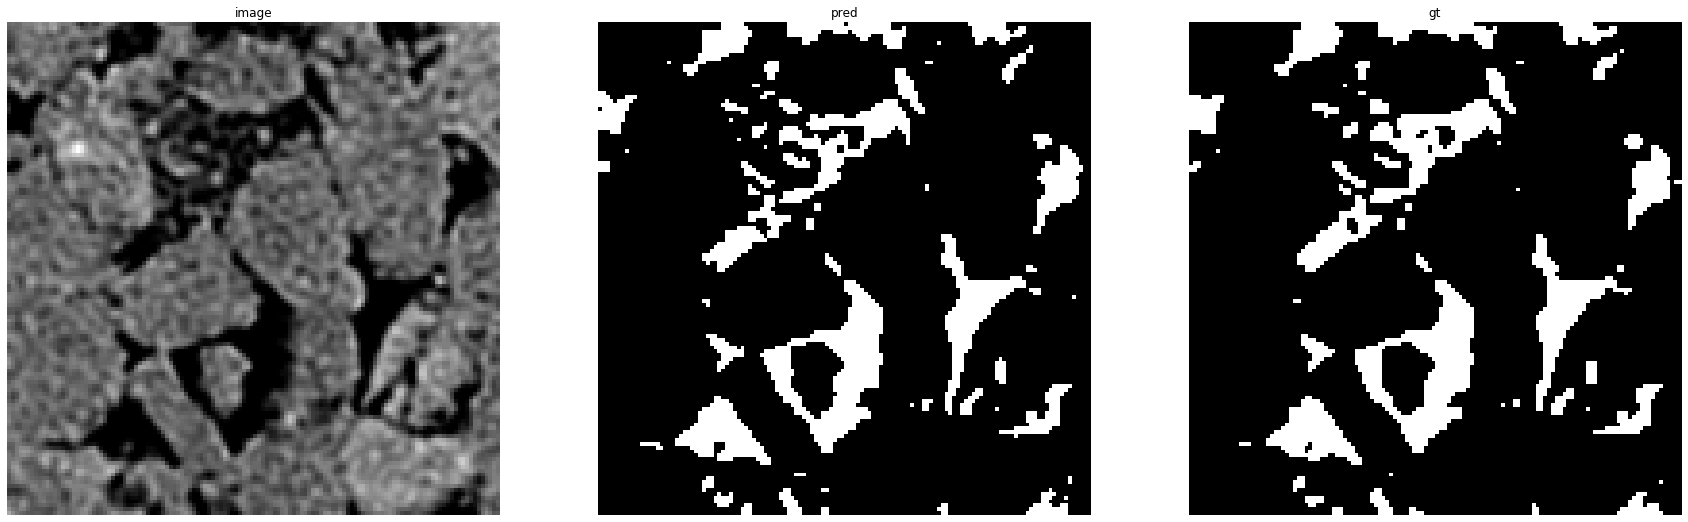

accuracy    : 0.98297119140625
precision   : 0.9576338928856915
recall      : 0.9326586220319191
f1          : 0.9449812660224809
pr_auc      : 0.9916226533904866
iou         : 0.8957009345794392


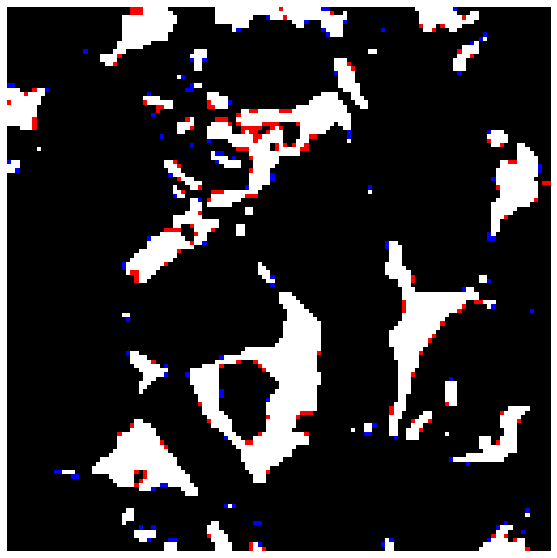

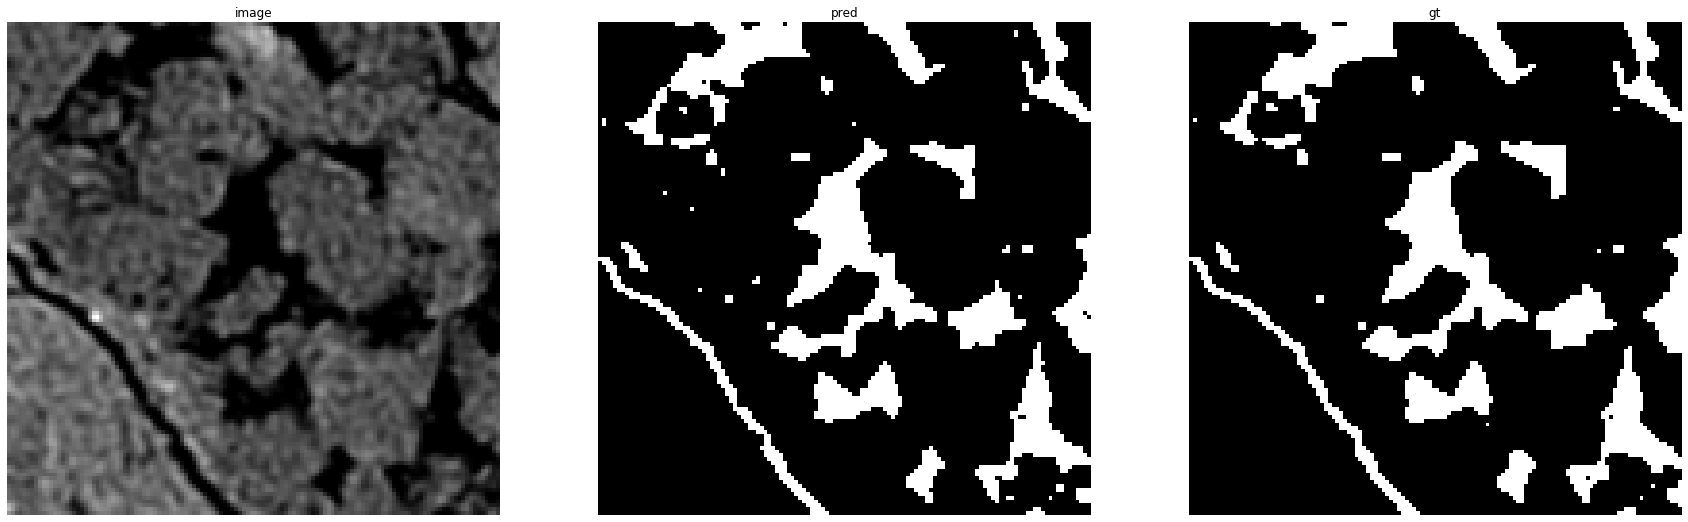

accuracy    : 0.9853515625
precision   : 0.9718847622353349
recall      : 0.9462656302805001
f1          : 0.958904109589041
pr_auc      : 0.9948184732297335
iou         : 0.9210526315789473


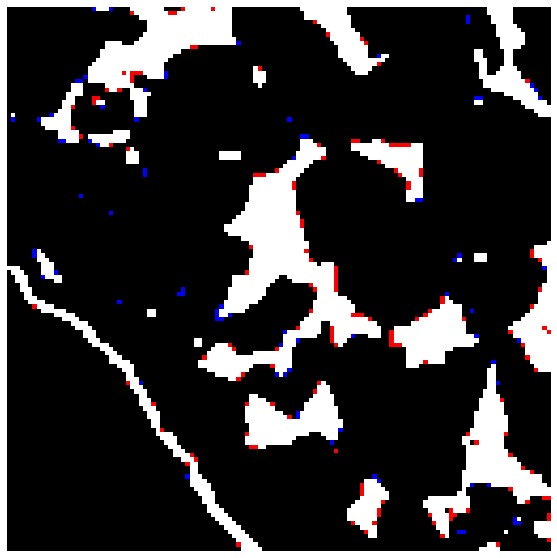

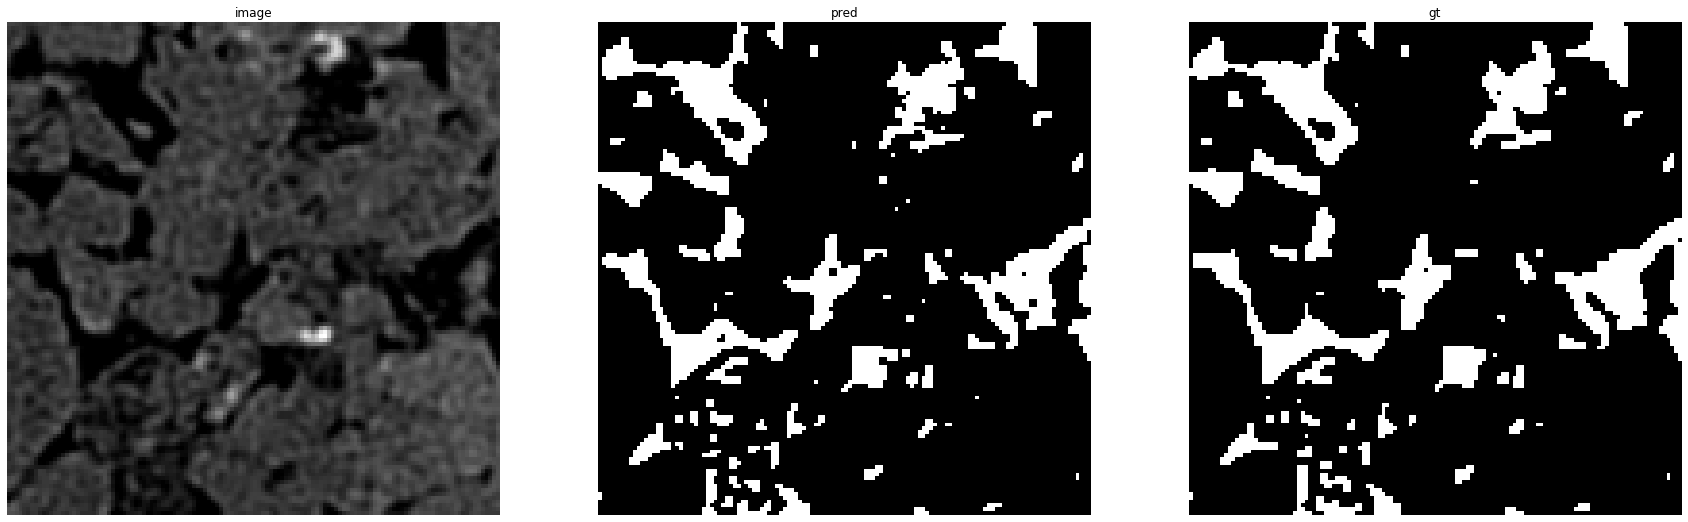

accuracy    : 0.98052978515625
precision   : 0.9587476979742173
recall      : 0.9263345195729538
f1          : 0.9422624434389141
pr_auc      : 0.991420326572582
iou         : 0.8908281998631075


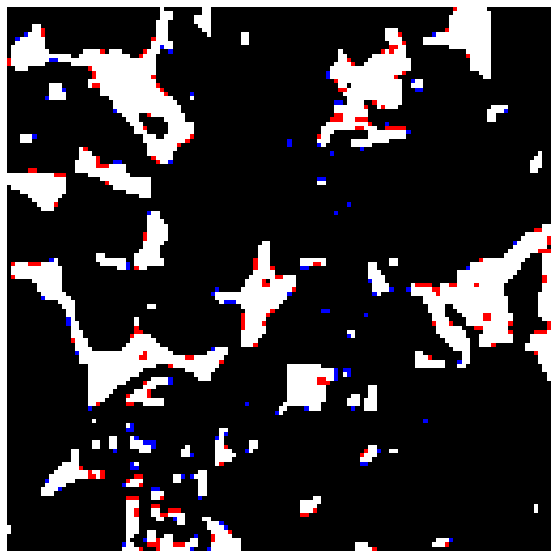

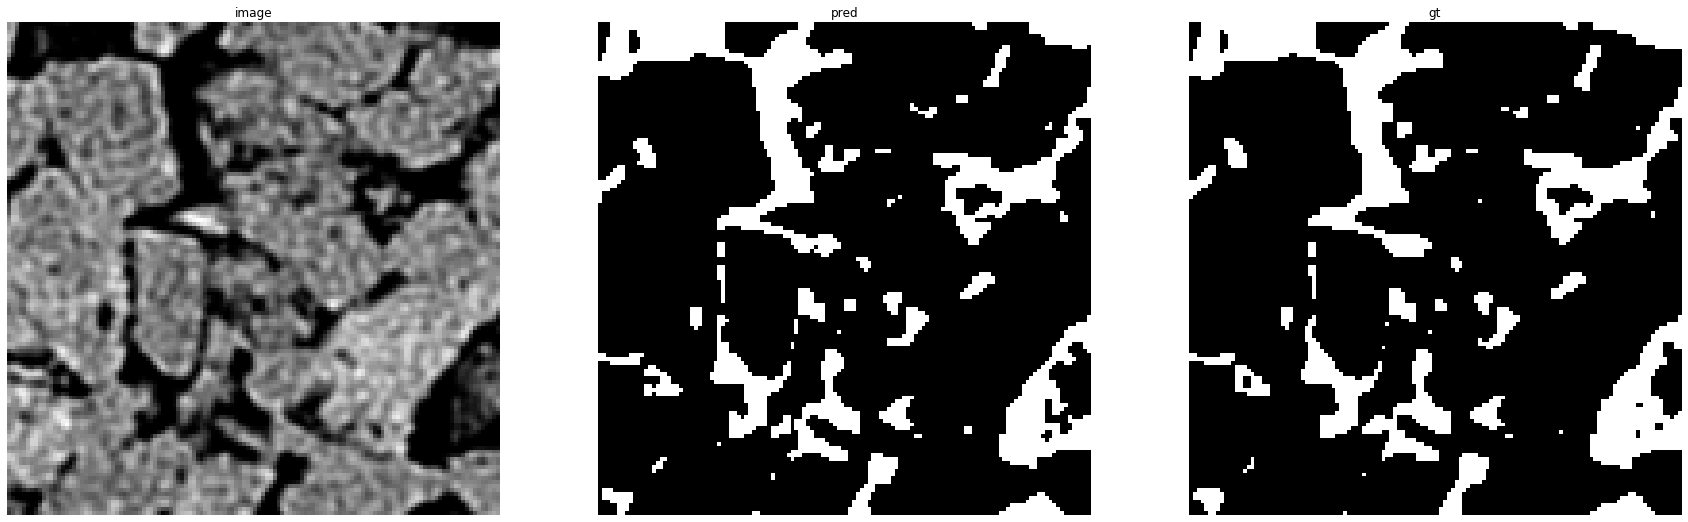

accuracy    : 0.979248046875
precision   : 0.9710621506083525
recall      : 0.9213728549141965
f1          : 0.9455651617034903
pr_auc      : 0.9924870710718754
iou         : 0.8967506832675372


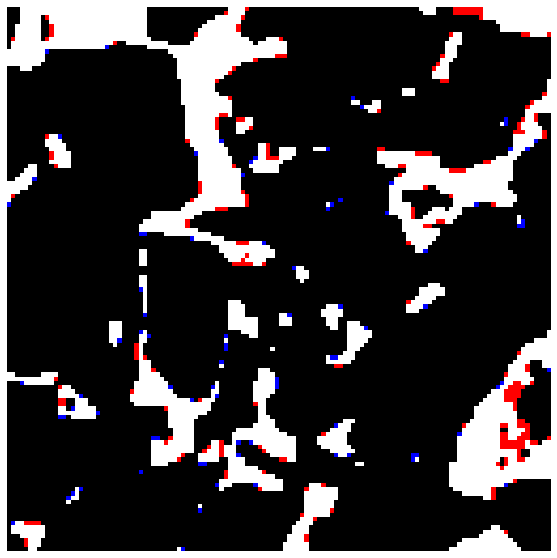

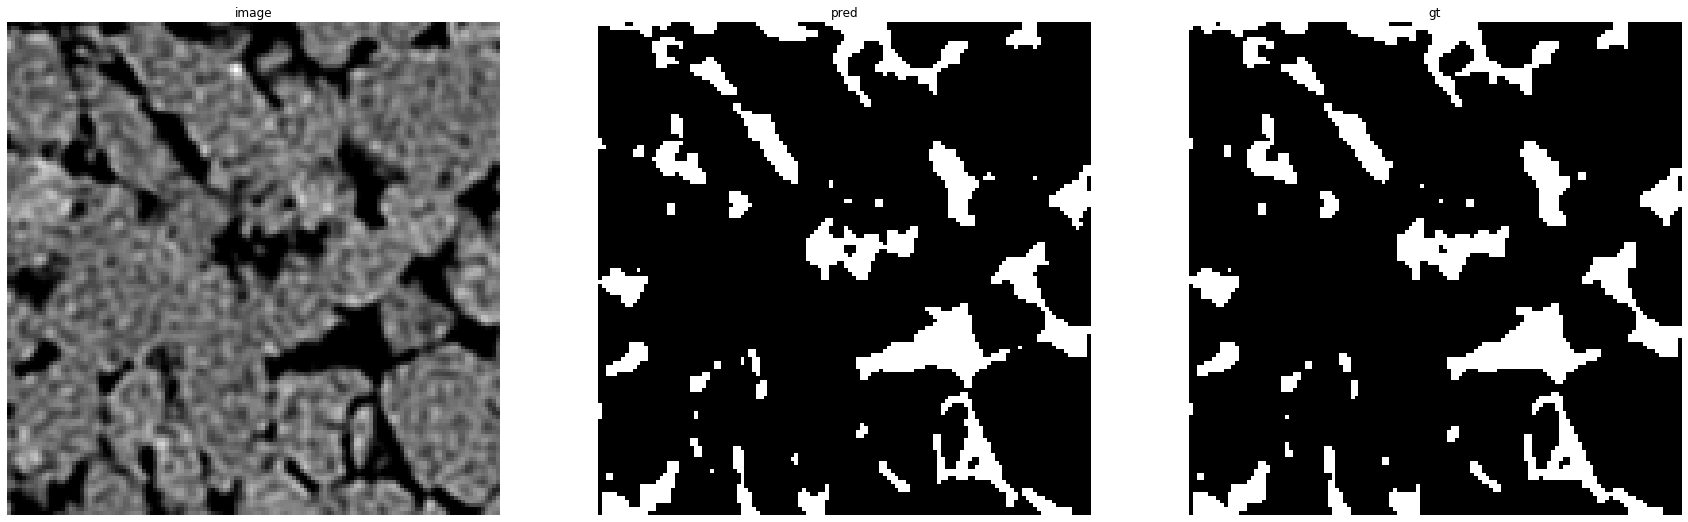

accuracy    : 0.98406982421875
precision   : 0.9666130329847143
recall      : 0.9310344827586207
f1          : 0.9484902309058615
pr_auc      : 0.9925797491341641
iou         : 0.902027027027027


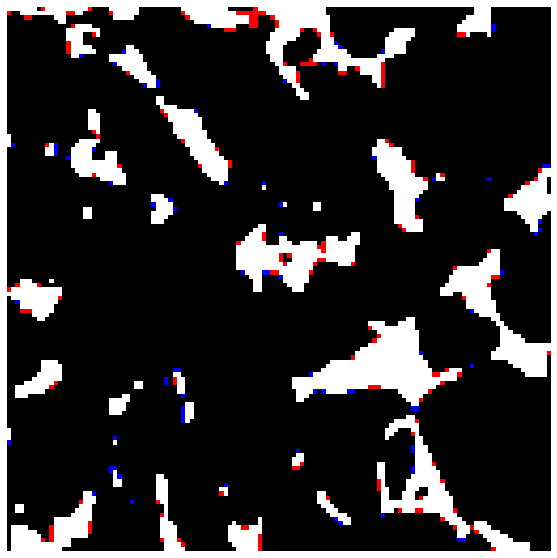

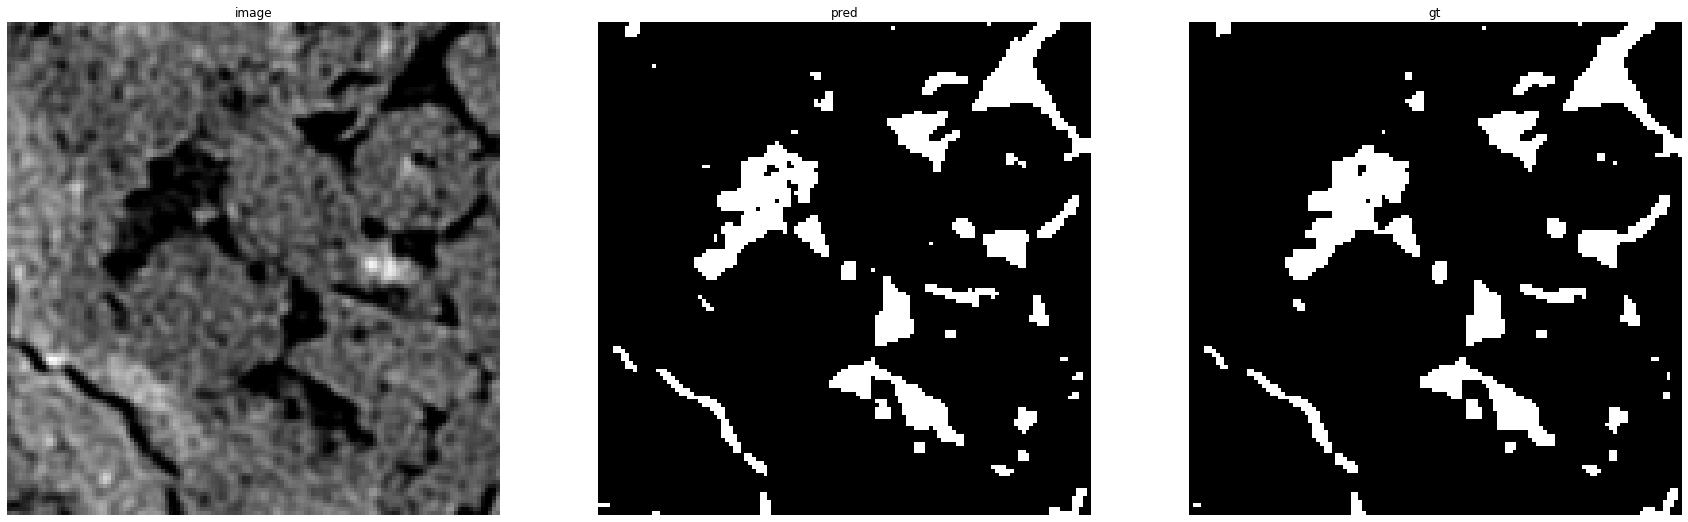

accuracy    : 0.98822021484375
precision   : 0.9560381355932204
recall      : 0.9425587467362925
f1          : 0.9492505916381804
pr_auc      : 0.993015763978415
iou         : 0.9034034034034034


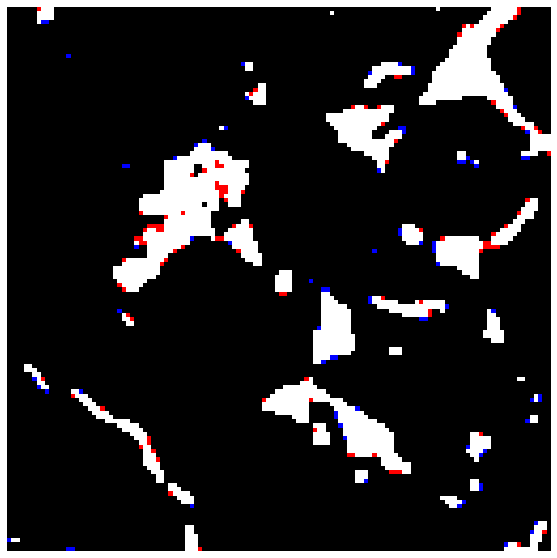

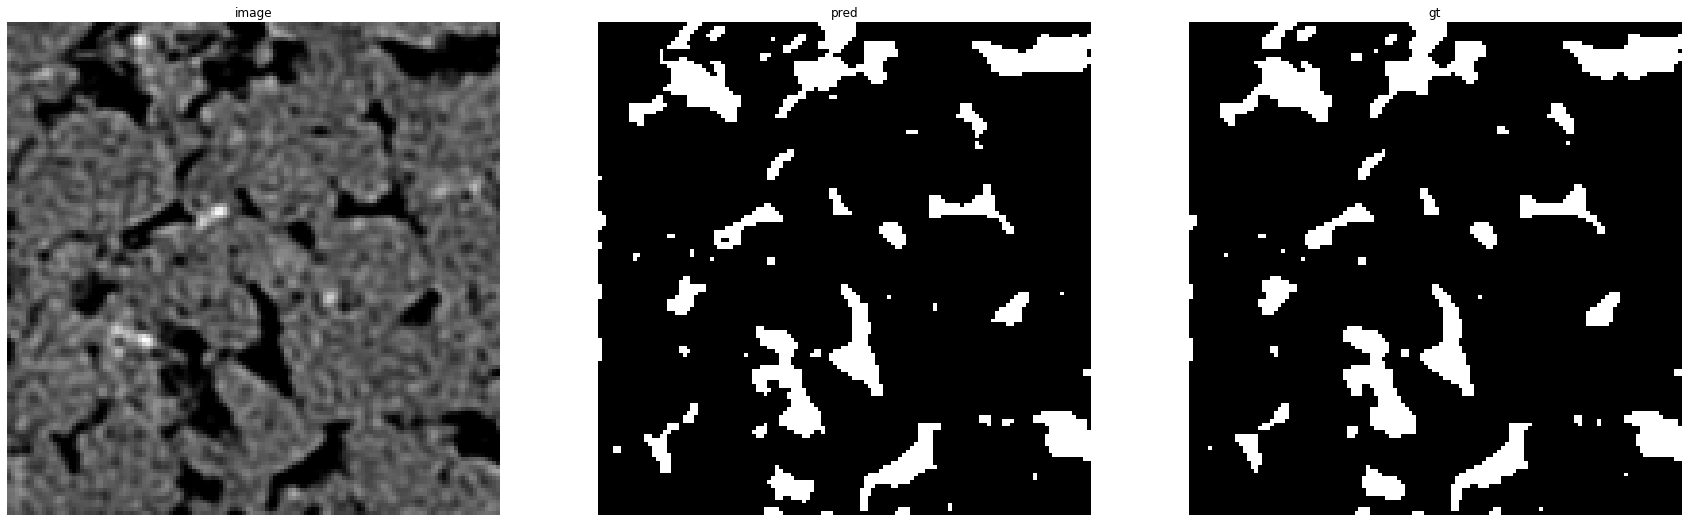

accuracy    : 0.9852294921875
precision   : 0.9541062801932367
recall      : 0.9307257304429783
f1          : 0.9422709923664122
pr_auc      : 0.9916065676182091
iou         : 0.8908434821831304




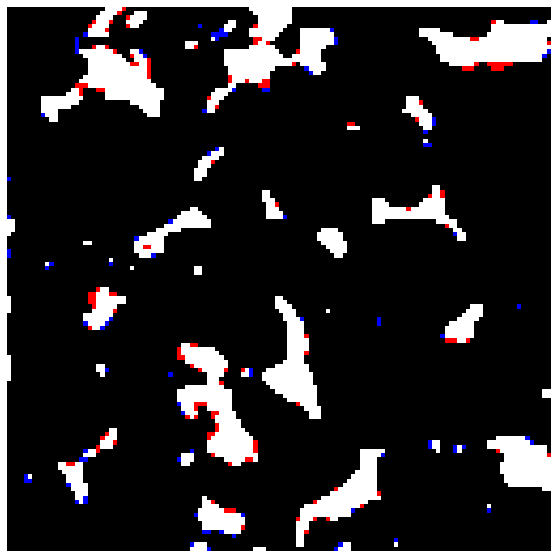

In [42]:
model.eval()

for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)

            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
            cnt -= 1
            
        if cnt ==0:
            break
    print('\n')

## Results

In [43]:
import pandas as pd

from visualization_utils import make_df

df = make_df(results, model_name=data_conf['conf_name'])
df

accuracy  precision    recall        f1    pr_auc       iou  \
0   0.996592   0.975469  0.978300  0.976882  0.998284  0.954809   
1   0.990011   0.942378  0.978262  0.959985  0.995095  0.923048   
2   0.979912   0.984668  0.856562  0.916158  0.988829  0.845288   
3   0.989262   0.999126  0.885952  0.939142  0.997723  0.885266   
4   0.988808   0.993421  0.880626  0.933629  0.994102  0.875520   
5   0.995427   0.988227  0.950022  0.968748  0.997605  0.939390   
6   0.986735   0.998128  0.919207  0.957043  0.998387  0.917625   
7   0.992864   0.997360  0.921893  0.958143  0.998162  0.919650   
8   0.993070   0.970164  0.973405  0.971782  0.997454  0.945112   
9   0.991730   0.972022  0.971753  0.971887  0.997751  0.945312   
10  0.985758   0.956636  0.936112  0.946262  0.991739  0.898006   

                 stack              model  
0            carb96558  carb96558_Urna_22  
1               carb71  carb96558_Urna_22  
2              carbRNF  carb96558_Urna_22  
3   SPE_carb10_58_box3  carb96558_Urna_22  
4             SoilAh-1  carb96558_Urna_22  
5              SoilB-2  carb96558_Urna_22  
6       TeTree_subset1  carb96558_Urna_22  
7       TiTree_subset2  carb96558_Urna_22  
8              Urna_22  carb96558_Urna_22  
9              Urna_30  carb96558_Urna_22  
10             Urna_34  carb96558_Urna_22

In [45]:
df.to_html('{}.html'.format(data_conf['conf_name'].replace('-', '_')))
s = (
    'wkhtmltoimage -f png --width 0' 
    ' {exp_name}_exp/{exp_name}.html' 
    ' {exp_name}_exp/{exp_name}.png'.format(exp_name=data_conf['conf_name'].replace('-', '_'))
)
print(s)

wkhtmltoimage -f png --width 0 carb96558_Urna_22_exp/carb96558_Urna_22.html carb96558_Urna_22_exp/carb96558_Urna_22.png


## Make prediction for particular stack

In [28]:
stack_name = 'carbRNF'

In [29]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 688.33it/s]
100%|██████████| 700/700 [00:07<00:00, 97.11it/s] 


In [30]:
predicted_stack = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 241701.30it/s]
25200it [02:03, 204.55it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3233.36it/s]


In [31]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack.preds, 
                                    mode='stack')))

accuracy    : 0.977205
precision   : 0.865103
recall      : 0.947591
f1          : 0.904470
pr_auc      : 0.979691
iou         : 0.825600
